In [1]:
# Tutorial from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
from keras.models import Sequential
from keras.layers import Dense
import numpy

Using TensorFlow backend.


$\Large\textbf{1. Load Data}$

Whenever we work with machine learning algorithms that use a stochastic process (e.g. random numbers), it is a good idea to set the random number seed.

This is so that you can run the same code again and again and get the same result. This is useful if you need to demonstrate a result, compare algorithms using the same source of randomness or to debug a part of your code.

You can initialize the random number generator with any seed you like.

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

Now we can load our data.

In this tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

You can now load the file directly using the NumPy function **loadtxt()**. There are eight input variables and one output variable (the last column). Once loaded we can split the dataset into input variables (X) and the output class variable (Y).

In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

$\Large\textbf{2. Define Model}$

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

The first thing to get right is to ensure the input layer has the right number of inputs. This can be specified when creating the first layer with the **input_dim** argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their structures?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem if that helps at all.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as **init** and specify the activation function using the activation argument.

In this case, we initialize the network weights to a small random number generated from a uniform distribution (‘uniform‘), in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras. Another traditional alternative would be ‘normal’ for small random numbers generated from a Gaussian distribution.

We will use the rectifier (**‘relu‘**) activation function on the first two layers and the sigmoid function in the output layer. It used to be the case that sigmoid and tanh activation functions were preferred for all layers. These days, better performance is achieved using the rectifier activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer. The first layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally, the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [4]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

$\Large\textbf{3. Compile Model}$

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for this problem.

We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use logarithmic loss, which for a binary classification problem is defined in Keras as **“binary_crossentropy”**. We will also use the efficient gradient descent algorithm **“adam”** for no other reason that it is an efficient default. Learn more about the Adam optimization algorithm in the paper [“Adam: A Method for Stochastic Optimization”](https://arxiv.org/abs/1412.6980).

Finally, because it is a classification problem, we will collect and report the classification accuracy as the metric.

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

$\Large\textbf{4. Fit Model}$

We have defined our model and compiled it ready for efficient computation. This is where the work happens on your CPU or GPU.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the **fit()** function on the model.

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the **epochs** argument. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size and set using the **batch_size** argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10. Again, these can be chosen experimentally by trial and error.

**Note:** If you try running this example in an IPython or Jupyter notebook you may get an error. The reason is the output progress bars during training. You can easily turn these off by setting **verbose=0** in the call to **model.fit()**.

In [6]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 347us/step - loss: 0.6771 - acc: 0.6510
Epoch 2/150
768/768 [==============================] - 0s 120us/step - loss: 0.6592 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 124us/step - loss: 0.6479 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 128us/step - loss: 0.6392 - acc: 0.6510
Epoch 5/150
768/768 [==============================] - 0s 126us/step - loss: 0.6339 - acc: 0.6510
Epoch 6/150
768/768 [==============================] - 0s 106us/step - loss: 0.6199 - acc: 0.6510
Epoch 7/150
768/768 [==============================] - 0s 124us/step - loss: 0.6182 - acc: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 125us/step - loss: 0.6165 - acc: 0.6510
Epoch 9/150
768/768 [==============================] - 0s 116us/step - loss: 0.6090 - acc: 0.6510
Epoch 10/150
768/768 [==============================] - 0s 120us/step - loss: 0.6164 - acc: 0.6510
Epoch 11/150
768/76

768/768 [==============================] - 0s 100us/step - loss: 0.5538 - acc: 0.7057
Epoch 84/150
768/768 [==============================] - 0s 102us/step - loss: 0.5471 - acc: 0.7201
Epoch 85/150
768/768 [==============================] - 0s 117us/step - loss: 0.5546 - acc: 0.7031
Epoch 86/150
768/768 [==============================] - 0s 113us/step - loss: 0.5533 - acc: 0.7135
Epoch 87/150
768/768 [==============================] - 0s 118us/step - loss: 0.5469 - acc: 0.7148
Epoch 88/150
768/768 [==============================] - 0s 121us/step - loss: 0.5447 - acc: 0.7188
Epoch 89/150
768/768 [==============================] - 0s 110us/step - loss: 0.5601 - acc: 0.7201
Epoch 90/150
768/768 [==============================] - 0s 115us/step - loss: 0.5460 - acc: 0.7174
Epoch 91/150
768/768 [==============================] - 0s 118us/step - loss: 0.5427 - acc: 0.7174
Epoch 92/150
768/768 [==============================] - 0s 115us/step - loss: 0.5403 - acc: 0.7214
Epoch 93/150
768/768 [=

In the neural network terminology:

**one epoch** = one forward pass and one backward pass of all the training examples.

**batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

**number of iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

Neural networks are typically trained using an iterative optimization method (most of the time, gradient descent), which often needs to perform several passes on the training set to obtain good results. After only one iteration, all of the weights of a neural netwok model will have been updated once. At this point they will still be very close to their initialized weights, which are very unlikely to to be the optimal weights. At each iteration, gradient descent takes one step closer to a local optimum. But to ensure convergence, these steps are usually set to a very small distance (taken in the gradient direction). 

$\Large\textbf{5. Evaluate Model}$

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the **evaluate()** function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

In [7]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 59us/step

acc: 75.52%


The score of your model may vary. Neural networks are a stochastic algorithm, meaning that the same algorithm on the same data can train a different model with different score. This is a feature, not a bug. 

$\Large\textbf{6. Make Predictions}$

We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before.

Making predictions is as easy as calling **model.predict()**. We are using a sigmoid activation function on the output layer, so the predictions will be in the range between $0$ and $1$. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

Running this modified example now prints the predictions for each input pattern. We could use these predictions directly in our application if needed.

In [8]:
# calculate predictions
predictions = model.predict(X)

In [9]:
# round predictions
rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 

$\Large\textbf{7. Testing Models}$

We can test several models in order to get better predictions. Below we consider the first and second hidden layers with the same number of neurons. Let **num_neurons** be the number of neurons. We test the models for **num_neurons** $=10 \ldots 199$. After that we plot the accuracy of all models in terms of the number of neurons used in each model.

In [10]:
performances = numpy.zeros(190)
i = 0
for num_neurons in range(10,200):
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(num_neurons, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(X, Y, epochs=150, batch_size=10)

    # evaluate the model
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    performances[i] = scores[1]*100
    i += 1

Epoch 1/150
768/768 [==============================] - 0s 364us/step - loss: 0.6800 - acc: 0.6510
Epoch 2/150
768/768 [==============================] - 0s 122us/step - loss: 0.6632 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 118us/step - loss: 0.6555 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 115us/step - loss: 0.6472 - acc: 0.6510
Epoch 5/150
768/768 [==============================] - 0s 123us/step - loss: 0.6392 - acc: 0.6510
Epoch 6/150
768/768 [==============================] - 0s 118us/step - loss: 0.6307 - acc: 0.6510
Epoch 7/150
768/768 [==============================] - 0s 119us/step - loss: 0.6283 - acc: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 108us/step - loss: 0.6181 - acc: 0.6510
Epoch 9/150
768/768 [==============================] - 0s 106us/step - loss: 0.6152 - acc: 0.6510
Epoch 10/150
768/768 [==============================] - 0s 104us/step - loss: 0.6079 - acc: 0.6510
Epoch 11/150
768/76

768/768 [==============================] - 0s 124us/step - loss: 0.5164 - acc: 0.7552
Epoch 84/150
768/768 [==============================] - 0s 111us/step - loss: 0.5188 - acc: 0.7565
Epoch 85/150
768/768 [==============================] - 0s 109us/step - loss: 0.5076 - acc: 0.7578
Epoch 86/150
768/768 [==============================] - 0s 113us/step - loss: 0.5082 - acc: 0.7617
Epoch 87/150
768/768 [==============================] - 0s 109us/step - loss: 0.5036 - acc: 0.7604
Epoch 88/150
768/768 [==============================] - 0s 109us/step - loss: 0.5140 - acc: 0.7513
Epoch 89/150
768/768 [==============================] - 0s 106us/step - loss: 0.5098 - acc: 0.7630
Epoch 90/150
768/768 [==============================] - 0s 113us/step - loss: 0.5056 - acc: 0.7552
Epoch 91/150
768/768 [==============================] - 0s 107us/step - loss: 0.5050 - acc: 0.7513
Epoch 92/150
768/768 [==============================] - 0s 113us/step - loss: 0.5188 - acc: 0.7604
Epoch 93/150
768/768 [=

768/768 [==============================] - 0s 127us/step - loss: 0.5878 - acc: 0.6966
Epoch 15/150
768/768 [==============================] - 0s 112us/step - loss: 0.5811 - acc: 0.6888
Epoch 16/150
768/768 [==============================] - 0s 102us/step - loss: 0.5847 - acc: 0.6888
Epoch 17/150
768/768 [==============================] - 0s 116us/step - loss: 0.5788 - acc: 0.7018
Epoch 18/150
768/768 [==============================] - 0s 115us/step - loss: 0.5795 - acc: 0.6979
Epoch 19/150
768/768 [==============================] - 0s 115us/step - loss: 0.5747 - acc: 0.7122
Epoch 20/150
768/768 [==============================] - 0s 114us/step - loss: 0.5700 - acc: 0.7044
Epoch 21/150
768/768 [==============================] - 0s 110us/step - loss: 0.5737 - acc: 0.6992
Epoch 22/150
768/768 [==============================] - 0s 116us/step - loss: 0.5719 - acc: 0.7057
Epoch 23/150
768/768 [==============================] - 0s 106us/step - loss: 0.5622 - acc: 0.6979
Epoch 24/150
768/768 [=

768/768 [==============================] - 0s 120us/step - loss: 0.4892 - acc: 0.7487
Epoch 97/150
768/768 [==============================] - 0s 111us/step - loss: 0.4762 - acc: 0.7799
Epoch 98/150
768/768 [==============================] - 0s 114us/step - loss: 0.4842 - acc: 0.7565
Epoch 99/150
768/768 [==============================] - 0s 113us/step - loss: 0.4710 - acc: 0.7812
Epoch 100/150
768/768 [==============================] - 0s 114us/step - loss: 0.4812 - acc: 0.7773
Epoch 101/150
768/768 [==============================] - 0s 118us/step - loss: 0.4789 - acc: 0.7812
Epoch 102/150
768/768 [==============================] - 0s 116us/step - loss: 0.4762 - acc: 0.7565
Epoch 103/150
768/768 [==============================] - 0s 120us/step - loss: 0.4849 - acc: 0.7604
Epoch 104/150
768/768 [==============================] - 0s 120us/step - loss: 0.4785 - acc: 0.7617
Epoch 105/150
768/768 [==============================] - 0s 103us/step - loss: 0.4856 - acc: 0.7539
Epoch 106/150
768

768/768 [==============================] - 0s 126us/step - loss: 0.5558 - acc: 0.7201
Epoch 28/150
768/768 [==============================] - 0s 105us/step - loss: 0.5499 - acc: 0.7318
Epoch 29/150
768/768 [==============================] - 0s 116us/step - loss: 0.5639 - acc: 0.7214
Epoch 30/150
768/768 [==============================] - 0s 111us/step - loss: 0.5516 - acc: 0.7305
Epoch 31/150
768/768 [==============================] - 0s 109us/step - loss: 0.5468 - acc: 0.7305
Epoch 32/150
768/768 [==============================] - 0s 117us/step - loss: 0.5473 - acc: 0.7305
Epoch 33/150
768/768 [==============================] - 0s 118us/step - loss: 0.5475 - acc: 0.7344
Epoch 34/150
768/768 [==============================] - 0s 121us/step - loss: 0.5435 - acc: 0.7344
Epoch 35/150
768/768 [==============================] - 0s 117us/step - loss: 0.5408 - acc: 0.7474
Epoch 36/150
768/768 [==============================] - 0s 96us/step - loss: 0.5369 - acc: 0.7422
Epoch 37/150
768/768 [==

768/768 [==============================] - 0s 120us/step - loss: 0.4804 - acc: 0.7526
Epoch 110/150
768/768 [==============================] - 0s 116us/step - loss: 0.4830 - acc: 0.7643
Epoch 111/150
768/768 [==============================] - 0s 106us/step - loss: 0.4705 - acc: 0.7852
Epoch 112/150
768/768 [==============================] - 0s 115us/step - loss: 0.4743 - acc: 0.7721
Epoch 113/150
768/768 [==============================] - 0s 102us/step - loss: 0.4706 - acc: 0.7669
Epoch 114/150
768/768 [==============================] - 0s 121us/step - loss: 0.4732 - acc: 0.7812
Epoch 115/150
768/768 [==============================] - 0s 115us/step - loss: 0.4696 - acc: 0.7773
Epoch 116/150
768/768 [==============================] - 0s 121us/step - loss: 0.4701 - acc: 0.7812
Epoch 117/150
768/768 [==============================] - 0s 124us/step - loss: 0.4647 - acc: 0.7812
Epoch 118/150
768/768 [==============================] - 0s 109us/step - loss: 0.4660 - acc: 0.7786
Epoch 119/150


768/768 [==============================] - 0s 115us/step - loss: 0.5342 - acc: 0.7370
Epoch 41/150
768/768 [==============================] - 0s 117us/step - loss: 0.5362 - acc: 0.7435
Epoch 42/150
768/768 [==============================] - 0s 119us/step - loss: 0.5358 - acc: 0.7487
Epoch 43/150
768/768 [==============================] - 0s 124us/step - loss: 0.5326 - acc: 0.7448
Epoch 44/150
768/768 [==============================] - 0s 122us/step - loss: 0.5296 - acc: 0.7292
Epoch 45/150
768/768 [==============================] - 0s 114us/step - loss: 0.5292 - acc: 0.7409
Epoch 46/150
768/768 [==============================] - 0s 118us/step - loss: 0.5284 - acc: 0.7526
Epoch 47/150
768/768 [==============================] - 0s 107us/step - loss: 0.5330 - acc: 0.7526
Epoch 48/150
768/768 [==============================] - 0s 105us/step - loss: 0.5222 - acc: 0.7513
Epoch 49/150
768/768 [==============================] - 0s 114us/step - loss: 0.5226 - acc: 0.7435
Epoch 50/150
768/768 [=

768/768 [==============================] - 0s 144us/step - loss: 0.4666 - acc: 0.7695
Epoch 123/150
768/768 [==============================] - 0s 116us/step - loss: 0.4548 - acc: 0.7773
Epoch 124/150
768/768 [==============================] - 0s 116us/step - loss: 0.4615 - acc: 0.7682
Epoch 125/150
768/768 [==============================] - 0s 118us/step - loss: 0.4494 - acc: 0.8073
Epoch 126/150
768/768 [==============================] - 0s 116us/step - loss: 0.4573 - acc: 0.7786
Epoch 127/150
768/768 [==============================] - 0s 114us/step - loss: 0.4672 - acc: 0.7839
Epoch 128/150
768/768 [==============================] - 0s 120us/step - loss: 0.4610 - acc: 0.7760
Epoch 129/150
768/768 [==============================] - 0s 124us/step - loss: 0.4619 - acc: 0.7682
Epoch 130/150
768/768 [==============================] - 0s 116us/step - loss: 0.4528 - acc: 0.7799
Epoch 131/150
768/768 [==============================] - 0s 104us/step - loss: 0.4459 - acc: 0.7786
Epoch 132/150


Epoch 54/150
768/768 [==============================] - 0s 125us/step - loss: 0.5256 - acc: 0.7448
Epoch 55/150
768/768 [==============================] - 0s 119us/step - loss: 0.5179 - acc: 0.7578
Epoch 56/150
768/768 [==============================] - 0s 106us/step - loss: 0.5171 - acc: 0.7409
Epoch 57/150
768/768 [==============================] - 0s 121us/step - loss: 0.5161 - acc: 0.7461
Epoch 58/150
768/768 [==============================] - 0s 121us/step - loss: 0.5201 - acc: 0.7526
Epoch 59/150
768/768 [==============================] - 0s 125us/step - loss: 0.5115 - acc: 0.7526
Epoch 60/150
768/768 [==============================] - 0s 124us/step - loss: 0.5088 - acc: 0.7474
Epoch 61/150
768/768 [==============================] - 0s 106us/step - loss: 0.5086 - acc: 0.7552
Epoch 62/150
768/768 [==============================] - 0s 119us/step - loss: 0.5062 - acc: 0.7565
Epoch 63/150
768/768 [==============================] - 0s 124us/step - loss: 0.5113 - acc: 0.7513
Epoch 64/1

768/768 [==============================] - 0s 121us/step - loss: 0.4587 - acc: 0.7812
Epoch 137/150
768/768 [==============================] - 0s 120us/step - loss: 0.4589 - acc: 0.7839
Epoch 138/150
768/768 [==============================] - 0s 120us/step - loss: 0.4436 - acc: 0.7904
Epoch 139/150
768/768 [==============================] - 0s 120us/step - loss: 0.4516 - acc: 0.7839
Epoch 140/150
768/768 [==============================] - 0s 121us/step - loss: 0.4472 - acc: 0.7917
Epoch 141/150
768/768 [==============================] - 0s 126us/step - loss: 0.4430 - acc: 0.7943
Epoch 142/150
768/768 [==============================] - 0s 125us/step - loss: 0.4434 - acc: 0.8047
Epoch 143/150
768/768 [==============================] - 0s 127us/step - loss: 0.4528 - acc: 0.7904
Epoch 144/150
768/768 [==============================] - 0s 113us/step - loss: 0.4438 - acc: 0.8112
Epoch 145/150
768/768 [==============================] - 0s 125us/step - loss: 0.4473 - acc: 0.7904
Epoch 146/150


768/768 [==============================] - 0s 116us/step - loss: 0.5102 - acc: 0.7500
Epoch 69/150
768/768 [==============================] - 0s 120us/step - loss: 0.5052 - acc: 0.7500
Epoch 70/150
768/768 [==============================] - 0s 107us/step - loss: 0.5071 - acc: 0.7448
Epoch 71/150
768/768 [==============================] - 0s 118us/step - loss: 0.4990 - acc: 0.7578
Epoch 72/150
768/768 [==============================] - 0s 119us/step - loss: 0.5032 - acc: 0.7513
Epoch 73/150
768/768 [==============================] - 0s 117us/step - loss: 0.5020 - acc: 0.7604
Epoch 74/150
768/768 [==============================] - 0s 112us/step - loss: 0.4971 - acc: 0.7487
Epoch 75/150
768/768 [==============================] - 0s 111us/step - loss: 0.4942 - acc: 0.7565
Epoch 76/150
768/768 [==============================] - 0s 122us/step - loss: 0.4928 - acc: 0.7682
Epoch 77/150
768/768 [==============================] - 0s 123us/step - loss: 0.4988 - acc: 0.7513
Epoch 78/150
768/768 [=

768/768 [==============================] - 0s 149us/step

acc: 75.65%
Epoch 1/150
768/768 [==============================] - 0s 565us/step - loss: 0.6772 - acc: 0.6341
Epoch 2/150
768/768 [==============================] - 0s 122us/step - loss: 0.6609 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 121us/step - loss: 0.6532 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 118us/step - loss: 0.6397 - acc: 0.6549
Epoch 5/150
768/768 [==============================] - 0s 121us/step - loss: 0.6252 - acc: 0.6615
Epoch 6/150
768/768 [==============================] - 0s 123us/step - loss: 0.6135 - acc: 0.6719
Epoch 7/150
768/768 [==============================] - 0s 120us/step - loss: 0.6030 - acc: 0.6862
Epoch 8/150
768/768 [==============================] - 0s 122us/step - loss: 0.5971 - acc: 0.6901
Epoch 9/150
768/768 [==============================] - 0s 124us/step - loss: 0.5943 - acc: 0.6992
Epoch 10/150
768/768 [==========================

768/768 [==============================] - 0s 126us/step - loss: 0.4698 - acc: 0.7786
Epoch 83/150
768/768 [==============================] - 0s 124us/step - loss: 0.4807 - acc: 0.7734
Epoch 84/150
768/768 [==============================] - 0s 107us/step - loss: 0.4692 - acc: 0.7799
Epoch 85/150
768/768 [==============================] - 0s 113us/step - loss: 0.4728 - acc: 0.7747
Epoch 86/150
768/768 [==============================] - 0s 122us/step - loss: 0.4668 - acc: 0.7839
Epoch 87/150
768/768 [==============================] - 0s 120us/step - loss: 0.4626 - acc: 0.7865
Epoch 88/150
768/768 [==============================] - 0s 123us/step - loss: 0.4639 - acc: 0.7852
Epoch 89/150
768/768 [==============================] - 0s 123us/step - loss: 0.4689 - acc: 0.7747
Epoch 90/150
768/768 [==============================] - 0s 117us/step - loss: 0.4644 - acc: 0.7669
Epoch 91/150
768/768 [==============================] - 0s 120us/step - loss: 0.4673 - acc: 0.7721
Epoch 92/150
768/768 [=

768/768 [==============================] - 0s 126us/step - loss: 0.5704 - acc: 0.7161
Epoch 14/150
768/768 [==============================] - 0s 124us/step - loss: 0.5635 - acc: 0.7188
Epoch 15/150
768/768 [==============================] - 0s 122us/step - loss: 0.5627 - acc: 0.7188
Epoch 16/150
768/768 [==============================] - 0s 124us/step - loss: 0.5487 - acc: 0.7227
Epoch 17/150
768/768 [==============================] - 0s 123us/step - loss: 0.5556 - acc: 0.7227
Epoch 18/150
768/768 [==============================] - 0s 122us/step - loss: 0.5517 - acc: 0.7201
Epoch 19/150
768/768 [==============================] - 0s 125us/step - loss: 0.5437 - acc: 0.7344
Epoch 20/150
768/768 [==============================] - 0s 123us/step - loss: 0.5508 - acc: 0.7344
Epoch 21/150
768/768 [==============================] - 0s 126us/step - loss: 0.5408 - acc: 0.7396
Epoch 22/150
768/768 [==============================] - 0s 118us/step - loss: 0.5398 - acc: 0.7383
Epoch 23/150
768/768 [=

768/768 [==============================] - 0s 117us/step - loss: 0.4528 - acc: 0.7760
Epoch 96/150
768/768 [==============================] - 0s 130us/step - loss: 0.4505 - acc: 0.7826
Epoch 97/150
768/768 [==============================] - 0s 125us/step - loss: 0.4485 - acc: 0.7799
Epoch 98/150
768/768 [==============================] - 0s 124us/step - loss: 0.4524 - acc: 0.7773
Epoch 99/150
768/768 [==============================] - 0s 109us/step - loss: 0.4434 - acc: 0.7878
Epoch 100/150
768/768 [==============================] - 0s 128us/step - loss: 0.4548 - acc: 0.7773
Epoch 101/150
768/768 [==============================] - 0s 124us/step - loss: 0.4487 - acc: 0.7891
Epoch 102/150
768/768 [==============================] - 0s 128us/step - loss: 0.4411 - acc: 0.7799
Epoch 103/150
768/768 [==============================] - 0s 129us/step - loss: 0.4432 - acc: 0.7904
Epoch 104/150
768/768 [==============================] - 0s 128us/step - loss: 0.4424 - acc: 0.7747
Epoch 105/150
768/

768/768 [==============================] - 0s 152us/step - loss: 0.5423 - acc: 0.7396
Epoch 27/150
768/768 [==============================] - 0s 110us/step - loss: 0.5307 - acc: 0.7422
Epoch 28/150
768/768 [==============================] - 0s 127us/step - loss: 0.5403 - acc: 0.7370
Epoch 29/150
768/768 [==============================] - 0s 131us/step - loss: 0.5281 - acc: 0.7253
Epoch 30/150
768/768 [==============================] - 0s 120us/step - loss: 0.5273 - acc: 0.7487
Epoch 31/150
768/768 [==============================] - 0s 128us/step - loss: 0.5252 - acc: 0.7370
Epoch 32/150
768/768 [==============================] - 0s 125us/step - loss: 0.5222 - acc: 0.7435
Epoch 33/150
768/768 [==============================] - 0s 131us/step - loss: 0.5244 - acc: 0.7487
Epoch 34/150
768/768 [==============================] - 0s 129us/step - loss: 0.5171 - acc: 0.7409
Epoch 35/150
768/768 [==============================] - 0s 120us/step - loss: 0.5114 - acc: 0.7487
Epoch 36/150
768/768 [=

768/768 [==============================] - 0s 140us/step - loss: 0.4447 - acc: 0.7969
Epoch 109/150
768/768 [==============================] - 0s 137us/step - loss: 0.4430 - acc: 0.7930
Epoch 110/150
768/768 [==============================] - 0s 131us/step - loss: 0.4539 - acc: 0.7826
Epoch 111/150
768/768 [==============================] - 0s 128us/step - loss: 0.4350 - acc: 0.7943
Epoch 112/150
768/768 [==============================] - 0s 132us/step - loss: 0.4363 - acc: 0.7812
Epoch 113/150
768/768 [==============================] - 0s 133us/step - loss: 0.4480 - acc: 0.7878
Epoch 114/150
768/768 [==============================] - 0s 133us/step - loss: 0.4449 - acc: 0.7826
Epoch 115/150
768/768 [==============================] - 0s 116us/step - loss: 0.4496 - acc: 0.7852
Epoch 116/150
768/768 [==============================] - 0s 141us/step - loss: 0.4428 - acc: 0.7826
Epoch 117/150
768/768 [==============================] - 0s 116us/step - loss: 0.4471 - acc: 0.7917
Epoch 118/150


768/768 [==============================] - 0s 166us/step - loss: 0.5165 - acc: 0.7474
Epoch 40/150
768/768 [==============================] - 0s 119us/step - loss: 0.5160 - acc: 0.7526
Epoch 41/150
768/768 [==============================] - 0s 129us/step - loss: 0.5162 - acc: 0.7591
Epoch 42/150
768/768 [==============================] - 0s 128us/step - loss: 0.5129 - acc: 0.7565
Epoch 43/150
768/768 [==============================] - 0s 129us/step - loss: 0.5156 - acc: 0.7539
Epoch 44/150
768/768 [==============================] - 0s 118us/step - loss: 0.5033 - acc: 0.7552
Epoch 45/150
768/768 [==============================] - 0s 132us/step - loss: 0.5109 - acc: 0.7591
Epoch 46/150
768/768 [==============================] - 0s 130us/step - loss: 0.5045 - acc: 0.7630
Epoch 47/150
768/768 [==============================] - 0s 130us/step - loss: 0.5062 - acc: 0.7695
Epoch 48/150
768/768 [==============================] - 0s 135us/step - loss: 0.5016 - acc: 0.7526
Epoch 49/150
768/768 [=

768/768 [==============================] - 0s 129us/step - loss: 0.4309 - acc: 0.8086
Epoch 122/150
768/768 [==============================] - 0s 112us/step - loss: 0.4533 - acc: 0.7852
Epoch 123/150
768/768 [==============================] - 0s 127us/step - loss: 0.4356 - acc: 0.7839
Epoch 124/150
768/768 [==============================] - 0s 125us/step - loss: 0.4341 - acc: 0.7917
Epoch 125/150
768/768 [==============================] - 0s 125us/step - loss: 0.4365 - acc: 0.7865
Epoch 126/150
768/768 [==============================] - 0s 129us/step - loss: 0.4440 - acc: 0.7891
Epoch 127/150
768/768 [==============================] - 0s 139us/step - loss: 0.4326 - acc: 0.7982
Epoch 128/150
768/768 [==============================] - 0s 128us/step - loss: 0.4380 - acc: 0.7956
Epoch 129/150
768/768 [==============================] - 0s 124us/step - loss: 0.4377 - acc: 0.7917
Epoch 130/150
768/768 [==============================] - 0s 130us/step - loss: 0.4381 - acc: 0.7852
Epoch 131/150


Epoch 53/150
768/768 [==============================] - 0s 131us/step - loss: 0.5118 - acc: 0.7669
Epoch 54/150
768/768 [==============================] - 0s 131us/step - loss: 0.5064 - acc: 0.7578
Epoch 55/150
768/768 [==============================] - 0s 131us/step - loss: 0.5055 - acc: 0.7617
Epoch 56/150
768/768 [==============================] - 0s 134us/step - loss: 0.5175 - acc: 0.7656
Epoch 57/150
768/768 [==============================] - 0s 131us/step - loss: 0.5042 - acc: 0.7617
Epoch 58/150
768/768 [==============================] - 0s 132us/step - loss: 0.5034 - acc: 0.7604
Epoch 59/150
768/768 [==============================] - 0s 125us/step - loss: 0.4938 - acc: 0.7669
Epoch 60/150
768/768 [==============================] - 0s 128us/step - loss: 0.5121 - acc: 0.7604
Epoch 61/150
768/768 [==============================] - 0s 129us/step - loss: 0.4973 - acc: 0.7630
Epoch 62/150
768/768 [==============================] - 0s 129us/step - loss: 0.5096 - acc: 0.7669
Epoch 63/1

768/768 [==============================] - 0s 128us/step - loss: 0.4383 - acc: 0.7904
Epoch 136/150
768/768 [==============================] - 0s 133us/step - loss: 0.4347 - acc: 0.7760
Epoch 137/150
768/768 [==============================] - 0s 130us/step - loss: 0.4596 - acc: 0.7695
Epoch 138/150
768/768 [==============================] - 0s 127us/step - loss: 0.4350 - acc: 0.7917
Epoch 139/150
768/768 [==============================] - 0s 127us/step - loss: 0.4332 - acc: 0.7878
Epoch 140/150
768/768 [==============================] - 0s 119us/step - loss: 0.4426 - acc: 0.7812
Epoch 141/150
768/768 [==============================] - 0s 127us/step - loss: 0.4326 - acc: 0.7891
Epoch 142/150
768/768 [==============================] - 0s 132us/step - loss: 0.4492 - acc: 0.7878
Epoch 143/150
768/768 [==============================] - 0s 128us/step - loss: 0.4249 - acc: 0.8021
Epoch 144/150
768/768 [==============================] - 0s 133us/step - loss: 0.4318 - acc: 0.7969
Epoch 145/150


768/768 [==============================] - 0s 118us/step - loss: 0.4952 - acc: 0.7643
Epoch 68/150
768/768 [==============================] - 0s 129us/step - loss: 0.5022 - acc: 0.7578
Epoch 69/150
768/768 [==============================] - 0s 156us/step - loss: 0.4955 - acc: 0.7760
Epoch 70/150
768/768 [==============================] - 0s 162us/step - loss: 0.4917 - acc: 0.7773
Epoch 71/150
768/768 [==============================] - 0s 119us/step - loss: 0.4941 - acc: 0.7643
Epoch 72/150
768/768 [==============================] - 0s 133us/step - loss: 0.4895 - acc: 0.7643
Epoch 73/150
768/768 [==============================] - 0s 131us/step - loss: 0.4815 - acc: 0.7682
Epoch 74/150
768/768 [==============================] - 0s 127us/step - loss: 0.4881 - acc: 0.7617
Epoch 75/150
768/768 [==============================] - 0s 118us/step - loss: 0.4813 - acc: 0.7734
Epoch 76/150
768/768 [==============================] - 0s 130us/step - loss: 0.4778 - acc: 0.7721
Epoch 77/150
768/768 [=

768/768 [==============================] - 0s 115us/step - loss: 0.4193 - acc: 0.8060
Epoch 150/150
768/768 [==============================] - 0s 240us/step

acc: 78.65%
Epoch 1/150
768/768 [==============================] - 1s 789us/step - loss: 0.6706 - acc: 0.6406
Epoch 2/150
768/768 [==============================] - 0s 122us/step - loss: 0.6384 - acc: 0.6576
Epoch 3/150
768/768 [==============================] - 0s 122us/step - loss: 0.6199 - acc: 0.6667
Epoch 4/150
768/768 [==============================] - 0s 120us/step - loss: 0.6071 - acc: 0.6784
Epoch 5/150
768/768 [==============================] - 0s 132us/step - loss: 0.6009 - acc: 0.6745
Epoch 6/150
768/768 [==============================] - 0s 133us/step - loss: 0.5932 - acc: 0.6914
Epoch 7/150
768/768 [==============================] - 0s 133us/step - loss: 0.5868 - acc: 0.6849
Epoch 8/150
768/768 [==============================] - 0s 129us/step - loss: 0.5840 - acc: 0.7031
Epoch 9/150
768/768 [=========================

768/768 [==============================] - 0s 135us/step - loss: 0.4625 - acc: 0.7773
Epoch 82/150
768/768 [==============================] - 0s 129us/step - loss: 0.4628 - acc: 0.7786
Epoch 83/150
768/768 [==============================] - 0s 133us/step - loss: 0.4642 - acc: 0.7773
Epoch 84/150
768/768 [==============================] - 0s 132us/step - loss: 0.4929 - acc: 0.7461
Epoch 85/150
768/768 [==============================] - 0s 134us/step - loss: 0.4640 - acc: 0.7734
Epoch 86/150
768/768 [==============================] - 0s 139us/step - loss: 0.4590 - acc: 0.7786
Epoch 87/150
768/768 [==============================] - 0s 140us/step - loss: 0.4642 - acc: 0.7760
Epoch 88/150
768/768 [==============================] - 0s 135us/step - loss: 0.4557 - acc: 0.7878
Epoch 89/150
768/768 [==============================] - 0s 131us/step - loss: 0.4519 - acc: 0.7799
Epoch 90/150
768/768 [==============================] - 0s 131us/step - loss: 0.4539 - acc: 0.7826
Epoch 91/150
768/768 [=

768/768 [==============================] - 0s 144us/step - loss: 0.5758 - acc: 0.7109
Epoch 13/150
768/768 [==============================] - 0s 129us/step - loss: 0.5690 - acc: 0.7109
Epoch 14/150
768/768 [==============================] - 0s 131us/step - loss: 0.5660 - acc: 0.7070
Epoch 15/150
768/768 [==============================] - 0s 131us/step - loss: 0.5649 - acc: 0.7187
Epoch 16/150
768/768 [==============================] - 0s 129us/step - loss: 0.5616 - acc: 0.7083
Epoch 17/150
768/768 [==============================] - 0s 129us/step - loss: 0.5615 - acc: 0.7018
Epoch 18/150
768/768 [==============================] - 0s 138us/step - loss: 0.5564 - acc: 0.7227
Epoch 19/150
768/768 [==============================] - 0s 134us/step - loss: 0.5457 - acc: 0.7201
Epoch 20/150
768/768 [==============================] - 0s 140us/step - loss: 0.5467 - acc: 0.7344
Epoch 21/150
768/768 [==============================] - 0s 143us/step - loss: 0.5422 - acc: 0.7331
Epoch 22/150
768/768 [=

768/768 [==============================] - 0s 166us/step - loss: 0.4552 - acc: 0.7956
Epoch 95/150
768/768 [==============================] - 0s 122us/step - loss: 0.4556 - acc: 0.7852
Epoch 96/150
768/768 [==============================] - 0s 143us/step - loss: 0.4653 - acc: 0.7734
Epoch 97/150
768/768 [==============================] - 0s 143us/step - loss: 0.4479 - acc: 0.7956
Epoch 98/150
768/768 [==============================] - 0s 130us/step - loss: 0.4581 - acc: 0.7799
Epoch 99/150
768/768 [==============================] - 0s 134us/step - loss: 0.4499 - acc: 0.7812
Epoch 100/150
768/768 [==============================] - 0s 122us/step - loss: 0.4470 - acc: 0.7982
Epoch 101/150
768/768 [==============================] - 0s 128us/step - loss: 0.4436 - acc: 0.7839
Epoch 102/150
768/768 [==============================] - 0s 134us/step - loss: 0.4367 - acc: 0.7969
Epoch 103/150
768/768 [==============================] - 0s 133us/step - loss: 0.4636 - acc: 0.7773
Epoch 104/150
768/7

768/768 [==============================] - 0s 128us/step - loss: 0.5401 - acc: 0.7253
Epoch 26/150
768/768 [==============================] - 0s 130us/step - loss: 0.5398 - acc: 0.7383
Epoch 27/150
768/768 [==============================] - 0s 144us/step - loss: 0.5482 - acc: 0.7279
Epoch 28/150
768/768 [==============================] - 0s 134us/step - loss: 0.5299 - acc: 0.7383
Epoch 29/150
768/768 [==============================] - 0s 135us/step - loss: 0.5364 - acc: 0.7370
Epoch 30/150
768/768 [==============================] - 0s 142us/step - loss: 0.5313 - acc: 0.7422
Epoch 31/150
768/768 [==============================] - 0s 134us/step - loss: 0.5320 - acc: 0.7279
Epoch 32/150
768/768 [==============================] - 0s 141us/step - loss: 0.5311 - acc: 0.7435
Epoch 33/150
768/768 [==============================] - 0s 131us/step - loss: 0.5376 - acc: 0.7305
Epoch 34/150
768/768 [==============================] - 0s 117us/step - loss: 0.5342 - acc: 0.7474
Epoch 35/150
768/768 [=

768/768 [==============================] - 0s 133us/step - loss: 0.4390 - acc: 0.7930
Epoch 108/150
768/768 [==============================] - 0s 138us/step - loss: 0.4392 - acc: 0.7891
Epoch 109/150
768/768 [==============================] - 0s 147us/step - loss: 0.4515 - acc: 0.7812
Epoch 110/150
768/768 [==============================] - 0s 133us/step - loss: 0.4455 - acc: 0.7930
Epoch 111/150
768/768 [==============================] - 0s 123us/step - loss: 0.4404 - acc: 0.8047
Epoch 112/150
768/768 [==============================] - 0s 139us/step - loss: 0.4283 - acc: 0.7969
Epoch 113/150
768/768 [==============================] - 0s 135us/step - loss: 0.4354 - acc: 0.7852
Epoch 114/150
768/768 [==============================] - 0s 138us/step - loss: 0.4422 - acc: 0.7930
Epoch 115/150
768/768 [==============================] - 0s 135us/step - loss: 0.4424 - acc: 0.7956
Epoch 116/150
768/768 [==============================] - 0s 142us/step - loss: 0.4491 - acc: 0.7786
Epoch 117/150


768/768 [==============================] - 0s 126us/step - loss: 0.5125 - acc: 0.7669
Epoch 39/150
768/768 [==============================] - 0s 132us/step - loss: 0.5217 - acc: 0.7474
Epoch 40/150
768/768 [==============================] - 0s 139us/step - loss: 0.5137 - acc: 0.7539
Epoch 41/150
768/768 [==============================] - 0s 132us/step - loss: 0.5088 - acc: 0.7461
Epoch 42/150
768/768 [==============================] - 0s 144us/step - loss: 0.5091 - acc: 0.7565
Epoch 43/150
768/768 [==============================] - 0s 137us/step - loss: 0.5081 - acc: 0.7435
Epoch 44/150
768/768 [==============================] - 0s 145us/step - loss: 0.5041 - acc: 0.7487
Epoch 45/150
768/768 [==============================] - 0s 132us/step - loss: 0.5017 - acc: 0.7526
Epoch 46/150
768/768 [==============================] - 0s 122us/step - loss: 0.4980 - acc: 0.7669
Epoch 47/150
768/768 [==============================] - 0s 133us/step - loss: 0.4949 - acc: 0.7708
Epoch 48/150
768/768 [=

768/768 [==============================] - 0s 158us/step - loss: 0.4339 - acc: 0.7865
Epoch 121/150
768/768 [==============================] - 0s 127us/step - loss: 0.4383 - acc: 0.7852
Epoch 122/150
768/768 [==============================] - 0s 141us/step - loss: 0.4450 - acc: 0.7878
Epoch 123/150
768/768 [==============================] - 0s 132us/step - loss: 0.4473 - acc: 0.7891
Epoch 124/150
768/768 [==============================] - 0s 133us/step - loss: 0.4337 - acc: 0.7904
Epoch 125/150
768/768 [==============================] - 0s 141us/step - loss: 0.4409 - acc: 0.7786
Epoch 126/150
768/768 [==============================] - 0s 131us/step - loss: 0.4391 - acc: 0.7839
Epoch 127/150
768/768 [==============================] - 0s 148us/step - loss: 0.4351 - acc: 0.7891
Epoch 128/150
768/768 [==============================] - 0s 137us/step - loss: 0.4365 - acc: 0.7839
Epoch 129/150
768/768 [==============================] - 0s 143us/step - loss: 0.4306 - acc: 0.7891
Epoch 130/150


Epoch 52/150
768/768 [==============================] - 0s 137us/step - loss: 0.5010 - acc: 0.7565
Epoch 53/150
768/768 [==============================] - 0s 144us/step - loss: 0.5011 - acc: 0.7500
Epoch 54/150
768/768 [==============================] - 0s 156us/step - loss: 0.4899 - acc: 0.7708
Epoch 55/150
768/768 [==============================] - 0s 137us/step - loss: 0.4985 - acc: 0.7513
Epoch 56/150
768/768 [==============================] - 0s 151us/step - loss: 0.4898 - acc: 0.7526
Epoch 57/150
768/768 [==============================] - 0s 147us/step - loss: 0.4910 - acc: 0.7630
Epoch 58/150
768/768 [==============================] - 0s 136us/step - loss: 0.4797 - acc: 0.7708
Epoch 59/150
768/768 [==============================] - 0s 140us/step - loss: 0.4840 - acc: 0.7617
Epoch 60/150
768/768 [==============================] - 0s 134us/step - loss: 0.4877 - acc: 0.7526
Epoch 61/150
768/768 [==============================] - 0s 162us/step - loss: 0.4815 - acc: 0.7669
Epoch 62/1

768/768 [==============================] - 0s 171us/step - loss: 0.4269 - acc: 0.7943
Epoch 135/150
768/768 [==============================] - 0s 123us/step - loss: 0.4203 - acc: 0.8008
Epoch 136/150
768/768 [==============================] - 0s 163us/step - loss: 0.4236 - acc: 0.7969
Epoch 137/150
768/768 [==============================] - 0s 134us/step - loss: 0.4225 - acc: 0.7995
Epoch 138/150
768/768 [==============================] - 0s 136us/step - loss: 0.4171 - acc: 0.7995
Epoch 139/150
768/768 [==============================] - 0s 141us/step - loss: 0.4254 - acc: 0.7904
Epoch 140/150
768/768 [==============================] - 0s 144us/step - loss: 0.4219 - acc: 0.7969
Epoch 141/150
768/768 [==============================] - 0s 141us/step - loss: 0.4141 - acc: 0.8021
Epoch 142/150
768/768 [==============================] - 0s 141us/step - loss: 0.4300 - acc: 0.7891
Epoch 143/150
768/768 [==============================] - 0s 156us/step - loss: 0.4087 - acc: 0.8086
Epoch 144/150


768/768 [==============================] - 0s 125us/step - loss: 0.4842 - acc: 0.7617
Epoch 67/150
768/768 [==============================] - 0s 130us/step - loss: 0.4690 - acc: 0.7695
Epoch 68/150
768/768 [==============================] - 0s 123us/step - loss: 0.4787 - acc: 0.7734
Epoch 69/150
768/768 [==============================] - 0s 132us/step - loss: 0.4893 - acc: 0.7708
Epoch 70/150
768/768 [==============================] - 0s 141us/step - loss: 0.4820 - acc: 0.7630
Epoch 71/150
768/768 [==============================] - 0s 137us/step - loss: 0.4843 - acc: 0.7786
Epoch 72/150
768/768 [==============================] - 0s 124us/step - loss: 0.4773 - acc: 0.7786
Epoch 73/150
768/768 [==============================] - 0s 133us/step - loss: 0.4675 - acc: 0.7786
Epoch 74/150
768/768 [==============================] - 0s 143us/step - loss: 0.4707 - acc: 0.7565
Epoch 75/150
768/768 [==============================] - 0s 128us/step - loss: 0.4674 - acc: 0.7695
Epoch 76/150
768/768 [=

768/768 [==============================] - 0s 129us/step - loss: 0.4239 - acc: 0.8034
Epoch 149/150
768/768 [==============================] - 0s 136us/step - loss: 0.4269 - acc: 0.8008
Epoch 150/150
768/768 [==============================] - 0s 329us/step

acc: 80.21%
Epoch 1/150
768/768 [==============================] - 1s 993us/step - loss: 0.6734 - acc: 0.6211
Epoch 2/150
768/768 [==============================] - 0s 132us/step - loss: 0.6524 - acc: 0.6393
Epoch 3/150
768/768 [==============================] - 0s 130us/step - loss: 0.6385 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 128us/step - loss: 0.6408 - acc: 0.6615
Epoch 5/150
768/768 [==============================] - 0s 121us/step - loss: 0.6098 - acc: 0.6797
Epoch 6/150
768/768 [==============================] - 0s 138us/step - loss: 0.6067 - acc: 0.6758
Epoch 7/150
768/768 [==============================] - 0s 133us/step - loss: 0.5951 - acc: 0.6901
Epoch 8/150
768/768 [=======================

768/768 [==============================] - 0s 157us/step - loss: 0.4628 - acc: 0.7878
Epoch 81/150
768/768 [==============================] - 0s 124us/step - loss: 0.4625 - acc: 0.7839
Epoch 82/150
768/768 [==============================] - 0s 134us/step - loss: 0.4670 - acc: 0.7786
Epoch 83/150
768/768 [==============================] - 0s 131us/step - loss: 0.4631 - acc: 0.7786
Epoch 84/150
768/768 [==============================] - 0s 134us/step - loss: 0.4664 - acc: 0.7826
Epoch 85/150
768/768 [==============================] - 0s 136us/step - loss: 0.4614 - acc: 0.7852
Epoch 86/150
768/768 [==============================] - 0s 134us/step - loss: 0.4713 - acc: 0.7682
Epoch 87/150
768/768 [==============================] - 0s 141us/step - loss: 0.4562 - acc: 0.7826
Epoch 88/150
768/768 [==============================] - 0s 136us/step - loss: 0.4668 - acc: 0.7747
Epoch 89/150
768/768 [==============================] - 0s 133us/step - loss: 0.4520 - acc: 0.7839
Epoch 90/150
768/768 [=

768/768 [==============================] - 0s 161us/step - loss: 0.5855 - acc: 0.6927
Epoch 12/150
768/768 [==============================] - 0s 126us/step - loss: 0.5816 - acc: 0.6927
Epoch 13/150
768/768 [==============================] - 0s 145us/step - loss: 0.5789 - acc: 0.7057
Epoch 14/150
768/768 [==============================] - 0s 135us/step - loss: 0.5740 - acc: 0.6940
Epoch 15/150
768/768 [==============================] - 0s 140us/step - loss: 0.5703 - acc: 0.6992
Epoch 16/150
768/768 [==============================] - 0s 143us/step - loss: 0.5777 - acc: 0.6914
Epoch 17/150
768/768 [==============================] - 0s 140us/step - loss: 0.5678 - acc: 0.6953
Epoch 18/150
768/768 [==============================] - 0s 141us/step - loss: 0.5619 - acc: 0.7018
Epoch 19/150
768/768 [==============================] - 0s 133us/step - loss: 0.5612 - acc: 0.6992
Epoch 20/150
768/768 [==============================] - 0s 134us/step - loss: 0.5670 - acc: 0.7005
Epoch 21/150
768/768 [=

768/768 [==============================] - 0s 160us/step - loss: 0.4729 - acc: 0.7669
Epoch 94/150
768/768 [==============================] - 0s 134us/step - loss: 0.4687 - acc: 0.7839
Epoch 95/150
768/768 [==============================] - 0s 140us/step - loss: 0.4526 - acc: 0.7734
Epoch 96/150
768/768 [==============================] - 0s 158us/step - loss: 0.4565 - acc: 0.7852
Epoch 97/150
768/768 [==============================] - 0s 145us/step - loss: 0.4410 - acc: 0.7826
Epoch 98/150
768/768 [==============================] - 0s 159us/step - loss: 0.4550 - acc: 0.7826
Epoch 99/150
768/768 [==============================] - 0s 125us/step - loss: 0.4462 - acc: 0.7799
Epoch 100/150
768/768 [==============================] - 0s 160us/step - loss: 0.4460 - acc: 0.7852
Epoch 101/150
768/768 [==============================] - 0s 153us/step - loss: 0.4511 - acc: 0.7904
Epoch 102/150
768/768 [==============================] - 0s 148us/step - loss: 0.4424 - acc: 0.7760
Epoch 103/150
768/76

768/768 [==============================] - 0s 125us/step - loss: 0.5485 - acc: 0.7279
Epoch 25/150
768/768 [==============================] - 0s 135us/step - loss: 0.5422 - acc: 0.7344
Epoch 26/150
768/768 [==============================] - 0s 133us/step - loss: 0.5423 - acc: 0.7396
Epoch 27/150
768/768 [==============================] - 0s 125us/step - loss: 0.5433 - acc: 0.7383
Epoch 28/150
768/768 [==============================] - 0s 156us/step - loss: 0.5338 - acc: 0.7344
Epoch 29/150
768/768 [==============================] - 0s 128us/step - loss: 0.5346 - acc: 0.7266
Epoch 30/150
768/768 [==============================] - 0s 142us/step - loss: 0.5401 - acc: 0.7318
Epoch 31/150
768/768 [==============================] - 0s 134us/step - loss: 0.5306 - acc: 0.7396
Epoch 32/150
768/768 [==============================] - 0s 130us/step - loss: 0.5316 - acc: 0.7409
Epoch 33/150
768/768 [==============================] - 0s 134us/step - loss: 0.5309 - acc: 0.7318
Epoch 34/150
768/768 [=

768/768 [==============================] - 0s 147us/step - loss: 0.4422 - acc: 0.7930
Epoch 107/150
768/768 [==============================] - 0s 130us/step - loss: 0.4490 - acc: 0.7865
Epoch 108/150
768/768 [==============================] - 0s 140us/step - loss: 0.4424 - acc: 0.7891
Epoch 109/150
768/768 [==============================] - 0s 143us/step - loss: 0.4424 - acc: 0.7773
Epoch 110/150
768/768 [==============================] - 0s 135us/step - loss: 0.4396 - acc: 0.8008
Epoch 111/150
768/768 [==============================] - 0s 136us/step - loss: 0.4298 - acc: 0.7943
Epoch 112/150
768/768 [==============================] - 0s 138us/step - loss: 0.4357 - acc: 0.7917
Epoch 113/150
768/768 [==============================] - 0s 133us/step - loss: 0.4456 - acc: 0.7682
Epoch 114/150
768/768 [==============================] - 0s 143us/step - loss: 0.4361 - acc: 0.7943
Epoch 115/150
768/768 [==============================] - 0s 164us/step - loss: 0.4274 - acc: 0.8047
Epoch 116/150


768/768 [==============================] - 0s 144us/step - loss: 0.5142 - acc: 0.7578
Epoch 38/150
768/768 [==============================] - 0s 135us/step - loss: 0.5160 - acc: 0.7331
Epoch 39/150
768/768 [==============================] - 0s 136us/step - loss: 0.5125 - acc: 0.7435
Epoch 40/150
768/768 [==============================] - 0s 132us/step - loss: 0.5237 - acc: 0.7422
Epoch 41/150
768/768 [==============================] - 0s 133us/step - loss: 0.5140 - acc: 0.7474
Epoch 42/150
768/768 [==============================] - 0s 142us/step - loss: 0.5070 - acc: 0.7630
Epoch 43/150
768/768 [==============================] - 0s 129us/step - loss: 0.5092 - acc: 0.7578
Epoch 44/150
768/768 [==============================] - 0s 147us/step - loss: 0.5078 - acc: 0.7513
Epoch 45/150
768/768 [==============================] - 0s 143us/step - loss: 0.5042 - acc: 0.7513
Epoch 46/150
768/768 [==============================] - 0s 143us/step - loss: 0.5073 - acc: 0.7487
Epoch 47/150
768/768 [=

768/768 [==============================] - 0s 147us/step - loss: 0.4229 - acc: 0.8073
Epoch 120/150
768/768 [==============================] - 0s 138us/step - loss: 0.4226 - acc: 0.7982
Epoch 121/150
768/768 [==============================] - 0s 148us/step - loss: 0.4370 - acc: 0.7865
Epoch 122/150
768/768 [==============================] - 0s 139us/step - loss: 0.4245 - acc: 0.7969
Epoch 123/150
768/768 [==============================] - 0s 144us/step - loss: 0.4460 - acc: 0.7786
Epoch 124/150
768/768 [==============================] - 0s 142us/step - loss: 0.4261 - acc: 0.7969
Epoch 125/150
768/768 [==============================] - 0s 147us/step - loss: 0.4220 - acc: 0.7969
Epoch 126/150
768/768 [==============================] - 0s 166us/step - loss: 0.4213 - acc: 0.8008
Epoch 127/150
768/768 [==============================] - 0s 129us/step - loss: 0.4189 - acc: 0.8073
Epoch 128/150
768/768 [==============================] - 0s 149us/step - loss: 0.4143 - acc: 0.7982
Epoch 129/150


Epoch 51/150
768/768 [==============================] - 0s 129us/step - loss: 0.4953 - acc: 0.7643
Epoch 52/150
768/768 [==============================] - 0s 151us/step - loss: 0.5007 - acc: 0.7578
Epoch 53/150
768/768 [==============================] - 0s 132us/step - loss: 0.5071 - acc: 0.7409
Epoch 54/150
768/768 [==============================] - 0s 140us/step - loss: 0.4967 - acc: 0.7669
Epoch 55/150
768/768 [==============================] - 0s 139us/step - loss: 0.4953 - acc: 0.7500
Epoch 56/150
768/768 [==============================] - 0s 146us/step - loss: 0.4982 - acc: 0.7630
Epoch 57/150
768/768 [==============================] - 0s 134us/step - loss: 0.4943 - acc: 0.7617
Epoch 58/150
768/768 [==============================] - 0s 142us/step - loss: 0.4879 - acc: 0.7826
Epoch 59/150
768/768 [==============================] - 0s 151us/step - loss: 0.4834 - acc: 0.7669
Epoch 60/150
768/768 [==============================] - 0s 156us/step - loss: 0.4977 - acc: 0.7604
Epoch 61/1

768/768 [==============================] - 0s 180us/step - loss: 0.4317 - acc: 0.8008
Epoch 134/150
768/768 [==============================] - 0s 129us/step - loss: 0.4295 - acc: 0.7930
Epoch 135/150
768/768 [==============================] - 0s 157us/step - loss: 0.4315 - acc: 0.7917
Epoch 136/150
768/768 [==============================] - 0s 130us/step - loss: 0.4256 - acc: 0.8008
Epoch 137/150
768/768 [==============================] - 0s 133us/step - loss: 0.4285 - acc: 0.7891
Epoch 138/150
768/768 [==============================] - 0s 142us/step - loss: 0.4292 - acc: 0.7865
Epoch 139/150
768/768 [==============================] - 0s 150us/step - loss: 0.4165 - acc: 0.7982
Epoch 140/150
768/768 [==============================] - 0s 139us/step - loss: 0.4183 - acc: 0.8112
Epoch 141/150
768/768 [==============================] - 0s 144us/step - loss: 0.4312 - acc: 0.8086
Epoch 142/150
768/768 [==============================] - 0s 173us/step - loss: 0.4220 - acc: 0.7982
Epoch 143/150


768/768 [==============================] - 0s 174us/step - loss: 0.4721 - acc: 0.7708
Epoch 66/150
768/768 [==============================] - 0s 138us/step - loss: 0.4721 - acc: 0.7656
Epoch 67/150
768/768 [==============================] - 0s 164us/step - loss: 0.4652 - acc: 0.7839
Epoch 68/150
768/768 [==============================] - 0s 133us/step - loss: 0.4623 - acc: 0.7760
Epoch 69/150
768/768 [==============================] - 0s 163us/step - loss: 0.4730 - acc: 0.7734
Epoch 70/150
768/768 [==============================] - 0s 139us/step - loss: 0.4667 - acc: 0.7604
Epoch 71/150
768/768 [==============================] - 0s 163us/step - loss: 0.4552 - acc: 0.7786
Epoch 72/150
768/768 [==============================] - 0s 130us/step - loss: 0.4701 - acc: 0.7695
Epoch 73/150
768/768 [==============================] - 0s 150us/step - loss: 0.4577 - acc: 0.7852
Epoch 74/150
768/768 [==============================] - 0s 129us/step - loss: 0.4595 - acc: 0.7813
Epoch 75/150
768/768 [=

768/768 [==============================] - 0s 167us/step - loss: 0.4026 - acc: 0.8099
Epoch 148/150
768/768 [==============================] - 0s 131us/step - loss: 0.3865 - acc: 0.8164
Epoch 149/150
768/768 [==============================] - 0s 176us/step - loss: 0.4211 - acc: 0.7891
Epoch 150/150
768/768 [==============================] - 0s 426us/step

acc: 81.90%
Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6670 - acc: 0.6237
Epoch 2/150
768/768 [==============================] - 0s 149us/step - loss: 0.6516 - acc: 0.6615
Epoch 3/150
768/768 [==============================] - 0s 164us/step - loss: 0.6312 - acc: 0.6406
Epoch 4/150
768/768 [==============================] - 0s 162us/step - loss: 0.6217 - acc: 0.6797
Epoch 5/150
768/768 [==============================] - 0s 164us/step - loss: 0.6051 - acc: 0.6862
Epoch 6/150
768/768 [==============================] - 0s 127us/step - loss: 0.6022 - acc: 0.6706
Epoch 7/150
768/768 [=======================

768/768 [==============================] - 0s 150us/step - loss: 0.4583 - acc: 0.7695
Epoch 80/150
768/768 [==============================] - 0s 136us/step - loss: 0.4641 - acc: 0.7786
Epoch 81/150
768/768 [==============================] - 0s 147us/step - loss: 0.4660 - acc: 0.7786
Epoch 82/150
768/768 [==============================] - 0s 150us/step - loss: 0.4638 - acc: 0.7695
Epoch 83/150
768/768 [==============================] - 0s 136us/step - loss: 0.4581 - acc: 0.7617
Epoch 84/150
768/768 [==============================] - 0s 161us/step - loss: 0.4526 - acc: 0.7995
Epoch 85/150
768/768 [==============================] - 0s 135us/step - loss: 0.4694 - acc: 0.7604
Epoch 86/150
768/768 [==============================] - 0s 168us/step - loss: 0.4564 - acc: 0.7734
Epoch 87/150
768/768 [==============================] - 0s 132us/step - loss: 0.4488 - acc: 0.7708
Epoch 88/150
768/768 [==============================] - 0s 160us/step - loss: 0.4496 - acc: 0.7799
Epoch 89/150
768/768 [=

768/768 [==============================] - 0s 137us/step - loss: 0.5822 - acc: 0.7070
Epoch 11/150
768/768 [==============================] - 0s 151us/step - loss: 0.5694 - acc: 0.7227
Epoch 12/150
768/768 [==============================] - 0s 136us/step - loss: 0.5679 - acc: 0.7188
Epoch 13/150
768/768 [==============================] - 0s 160us/step - loss: 0.5669 - acc: 0.7240
Epoch 14/150
768/768 [==============================] - 0s 134us/step - loss: 0.5568 - acc: 0.7122
Epoch 15/150
768/768 [==============================] - 0s 159us/step - loss: 0.5536 - acc: 0.7318
Epoch 16/150
768/768 [==============================] - 0s 138us/step - loss: 0.5477 - acc: 0.7357
Epoch 17/150
768/768 [==============================] - 0s 162us/step - loss: 0.5428 - acc: 0.7227
Epoch 18/150
768/768 [==============================] - 0s 135us/step - loss: 0.5427 - acc: 0.7331
Epoch 19/150
768/768 [==============================] - 0s 164us/step - loss: 0.5629 - acc: 0.7187
Epoch 20/150
768/768 [=

768/768 [==============================] - 0s 155us/step - loss: 0.4444 - acc: 0.7734
Epoch 93/150
768/768 [==============================] - 0s 132us/step - loss: 0.4504 - acc: 0.7917
Epoch 94/150
768/768 [==============================] - 0s 157us/step - loss: 0.4627 - acc: 0.7917
Epoch 95/150
768/768 [==============================] - 0s 143us/step - loss: 0.4287 - acc: 0.7995
Epoch 96/150
768/768 [==============================] - 0s 162us/step - loss: 0.4331 - acc: 0.7969
Epoch 97/150
768/768 [==============================] - 0s 132us/step - loss: 0.4351 - acc: 0.7826
Epoch 98/150
768/768 [==============================] - 0s 147us/step - loss: 0.4249 - acc: 0.7995
Epoch 99/150
768/768 [==============================] - 0s 153us/step - loss: 0.4422 - acc: 0.7839
Epoch 100/150
768/768 [==============================] - 0s 159us/step - loss: 0.4405 - acc: 0.7799
Epoch 101/150
768/768 [==============================] - 0s 136us/step - loss: 0.4345 - acc: 0.7904
Epoch 102/150
768/768

768/768 [==============================] - 0s 143us/step - loss: 0.5606 - acc: 0.7214
Epoch 24/150
768/768 [==============================] - 0s 160us/step - loss: 0.5629 - acc: 0.7135
Epoch 25/150
768/768 [==============================] - 0s 132us/step - loss: 0.5540 - acc: 0.7083
Epoch 26/150
768/768 [==============================] - 0s 172us/step - loss: 0.5489 - acc: 0.7253
Epoch 27/150
768/768 [==============================] - 0s 132us/step - loss: 0.5416 - acc: 0.7370
Epoch 28/150
768/768 [==============================] - 0s 159us/step - loss: 0.5406 - acc: 0.7292
Epoch 29/150
768/768 [==============================] - 0s 143us/step - loss: 0.5403 - acc: 0.7344
Epoch 30/150
768/768 [==============================] - 0s 159us/step - loss: 0.5410 - acc: 0.7409
Epoch 31/150
768/768 [==============================] - 0s 134us/step - loss: 0.5342 - acc: 0.7305
Epoch 32/150
768/768 [==============================] - 0s 162us/step - loss: 0.5307 - acc: 0.7422
Epoch 33/150
768/768 [=

768/768 [==============================] - 0s 144us/step - loss: 0.4460 - acc: 0.7891
Epoch 106/150
768/768 [==============================] - 0s 148us/step - loss: 0.4487 - acc: 0.7995
Epoch 107/150
768/768 [==============================] - 0s 146us/step - loss: 0.4401 - acc: 0.7878
Epoch 108/150
768/768 [==============================] - 0s 138us/step - loss: 0.4444 - acc: 0.7852
Epoch 109/150
768/768 [==============================] - 0s 166us/step - loss: 0.4396 - acc: 0.7891
Epoch 110/150
768/768 [==============================] - 0s 151us/step - loss: 0.4436 - acc: 0.7812
Epoch 111/150
768/768 [==============================] - 0s 134us/step - loss: 0.4328 - acc: 0.7995
Epoch 112/150
768/768 [==============================] - 0s 163us/step - loss: 0.4414 - acc: 0.7891
Epoch 113/150
768/768 [==============================] - 0s 140us/step - loss: 0.4342 - acc: 0.7995
Epoch 114/150
768/768 [==============================] - 0s 153us/step - loss: 0.4513 - acc: 0.7839
Epoch 115/150


768/768 [==============================] - 0s 168us/step - loss: 0.5196 - acc: 0.7396
Epoch 37/150
768/768 [==============================] - 0s 132us/step - loss: 0.5110 - acc: 0.7435
Epoch 38/150
768/768 [==============================] - 0s 156us/step - loss: 0.5225 - acc: 0.7383
Epoch 39/150
768/768 [==============================] - 0s 162us/step - loss: 0.5164 - acc: 0.7422
Epoch 40/150
768/768 [==============================] - 0s 142us/step - loss: 0.5131 - acc: 0.7422
Epoch 41/150
768/768 [==============================] - 0s 162us/step - loss: 0.5129 - acc: 0.7435
Epoch 42/150
768/768 [==============================] - 0s 128us/step - loss: 0.5116 - acc: 0.7669
Epoch 43/150
768/768 [==============================] - 0s 162us/step - loss: 0.5043 - acc: 0.7539
Epoch 44/150
768/768 [==============================] - 0s 140us/step - loss: 0.5045 - acc: 0.7565
Epoch 45/150
768/768 [==============================] - 0s 147us/step - loss: 0.4980 - acc: 0.7474
Epoch 46/150
768/768 [=

768/768 [==============================] - 0s 156us/step - loss: 0.4335 - acc: 0.7812
Epoch 119/150
768/768 [==============================] - 0s 135us/step - loss: 0.4122 - acc: 0.8021
Epoch 120/150
768/768 [==============================] - 0s 160us/step - loss: 0.4227 - acc: 0.7904
Epoch 121/150
768/768 [==============================] - 0s 128us/step - loss: 0.4164 - acc: 0.8047
Epoch 122/150
768/768 [==============================] - 0s 169us/step - loss: 0.4218 - acc: 0.7995
Epoch 123/150
768/768 [==============================] - 0s 145us/step - loss: 0.4199 - acc: 0.7865
Epoch 124/150
768/768 [==============================] - 0s 145us/step - loss: 0.4095 - acc: 0.8073
Epoch 125/150
768/768 [==============================] - 0s 163us/step - loss: 0.4150 - acc: 0.7995
Epoch 126/150
768/768 [==============================] - 0s 165us/step - loss: 0.4078 - acc: 0.8099
Epoch 127/150
768/768 [==============================] - 0s 143us/step - loss: 0.4123 - acc: 0.8047
Epoch 128/150


Epoch 50/150
768/768 [==============================] - 0s 168us/step - loss: 0.5023 - acc: 0.7760
Epoch 51/150
768/768 [==============================] - 0s 141us/step - loss: 0.4873 - acc: 0.7552
Epoch 52/150
768/768 [==============================] - 0s 187us/step - loss: 0.4905 - acc: 0.7630
Epoch 53/150
768/768 [==============================] - 0s 161us/step - loss: 0.4985 - acc: 0.7591
Epoch 54/150
768/768 [==============================] - 0s 162us/step - loss: 0.4897 - acc: 0.7682
Epoch 55/150
768/768 [==============================] - 0s 147us/step - loss: 0.4886 - acc: 0.7604
Epoch 56/150
768/768 [==============================] - 0s 165us/step - loss: 0.4860 - acc: 0.7734
Epoch 57/150
768/768 [==============================] - 0s 140us/step - loss: 0.4850 - acc: 0.7682
Epoch 58/150
768/768 [==============================] - 0s 205us/step - loss: 0.4912 - acc: 0.7552
Epoch 59/150
768/768 [==============================] - 0s 166us/step - loss: 0.4760 - acc: 0.7695
Epoch 60/1

768/768 [==============================] - 0s 146us/step - loss: 0.4161 - acc: 0.7995
Epoch 133/150
768/768 [==============================] - 0s 175us/step - loss: 0.4148 - acc: 0.8073
Epoch 134/150
768/768 [==============================] - 0s 151us/step - loss: 0.4280 - acc: 0.8047
Epoch 135/150
768/768 [==============================] - 0s 144us/step - loss: 0.4229 - acc: 0.8112
Epoch 136/150
768/768 [==============================] - 0s 162us/step - loss: 0.4243 - acc: 0.7969
Epoch 137/150
768/768 [==============================] - 0s 144us/step - loss: 0.4144 - acc: 0.7969
Epoch 138/150
768/768 [==============================] - 0s 169us/step - loss: 0.4147 - acc: 0.8073
Epoch 139/150
768/768 [==============================] - 0s 142us/step - loss: 0.4265 - acc: 0.7839
Epoch 140/150
768/768 [==============================] - 0s 173us/step - loss: 0.4303 - acc: 0.7943
Epoch 141/150
768/768 [==============================] - 0s 149us/step - loss: 0.4176 - acc: 0.8125
Epoch 142/150


768/768 [==============================] - 0s 152us/step - loss: 0.4742 - acc: 0.7695
Epoch 65/150
768/768 [==============================] - 0s 166us/step - loss: 0.4740 - acc: 0.7839
Epoch 66/150
768/768 [==============================] - 0s 136us/step - loss: 0.4585 - acc: 0.7773
Epoch 67/150
768/768 [==============================] - 0s 172us/step - loss: 0.4631 - acc: 0.7630
Epoch 68/150
768/768 [==============================] - 0s 158us/step - loss: 0.4679 - acc: 0.7760
Epoch 69/150
768/768 [==============================] - 0s 143us/step - loss: 0.4636 - acc: 0.7643
Epoch 70/150
768/768 [==============================] - 0s 167us/step - loss: 0.4528 - acc: 0.7956
Epoch 71/150
768/768 [==============================] - 0s 154us/step - loss: 0.4581 - acc: 0.7656
Epoch 72/150
768/768 [==============================] - 0s 157us/step - loss: 0.4608 - acc: 0.7656
Epoch 73/150
768/768 [==============================] - 0s 154us/step - loss: 0.4700 - acc: 0.7656
Epoch 74/150
768/768 [=

768/768 [==============================] - 0s 167us/step - loss: 0.3905 - acc: 0.8060
Epoch 147/150
768/768 [==============================] - 0s 153us/step - loss: 0.3889 - acc: 0.8164
Epoch 148/150
768/768 [==============================] - 0s 164us/step - loss: 0.3942 - acc: 0.8125
Epoch 149/150
768/768 [==============================] - 0s 145us/step - loss: 0.3980 - acc: 0.8151
Epoch 150/150
768/768 [==============================] - 0s 520us/step

acc: 79.30%
Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6707 - acc: 0.6471
Epoch 2/150
768/768 [==============================] - 0s 164us/step - loss: 0.6458 - acc: 0.6615
Epoch 3/150
768/768 [==============================] - 0s 157us/step - loss: 0.6230 - acc: 0.6732
Epoch 4/150
768/768 [==============================] - 0s 165us/step - loss: 0.6078 - acc: 0.6875
Epoch 5/150
768/768 [==============================] - 0s 169us/step - loss: 0.6072 - acc: 0.6888
Epoch 6/150
768/768 [=====================

768/768 [==============================] - 0s 156us/step - loss: 0.4728 - acc: 0.7786
Epoch 79/150
768/768 [==============================] - 0s 140us/step - loss: 0.4555 - acc: 0.7708
Epoch 80/150
768/768 [==============================] - 0s 165us/step - loss: 0.4502 - acc: 0.7878
Epoch 81/150
768/768 [==============================] - 0s 135us/step - loss: 0.4684 - acc: 0.7708
Epoch 82/150
768/768 [==============================] - 0s 167us/step - loss: 0.4475 - acc: 0.7891
Epoch 83/150
768/768 [==============================] - 0s 154us/step - loss: 0.4487 - acc: 0.7865
Epoch 84/150
768/768 [==============================] - 0s 145us/step - loss: 0.4602 - acc: 0.7786
Epoch 85/150
768/768 [==============================] - 0s 158us/step - loss: 0.4526 - acc: 0.7930
Epoch 86/150
768/768 [==============================] - 0s 146us/step - loss: 0.4446 - acc: 0.7878
Epoch 87/150
768/768 [==============================] - 0s 162us/step - loss: 0.4595 - acc: 0.7760
Epoch 88/150
768/768 [=

768/768 [==============================] - 0s 208us/step - loss: 0.5758 - acc: 0.6953
Epoch 10/150
768/768 [==============================] - 0s 170us/step - loss: 0.5693 - acc: 0.7031
Epoch 11/150
768/768 [==============================] - 0s 145us/step - loss: 0.5698 - acc: 0.7135
Epoch 12/150
768/768 [==============================] - 0s 171us/step - loss: 0.5586 - acc: 0.7214
Epoch 13/150
768/768 [==============================] - 0s 150us/step - loss: 0.5736 - acc: 0.6940
Epoch 14/150
768/768 [==============================] - 0s 160us/step - loss: 0.5628 - acc: 0.7161
Epoch 15/150
768/768 [==============================] - 0s 164us/step - loss: 0.5514 - acc: 0.7383
Epoch 16/150
768/768 [==============================] - 0s 390us/step - loss: 0.5520 - acc: 0.7305
Epoch 17/150
768/768 [==============================] - 0s 167us/step - loss: 0.5605 - acc: 0.7161
Epoch 18/150
768/768 [==============================] - 0s 160us/step - loss: 0.5478 - acc: 0.7292
Epoch 19/150
768/768 [=

768/768 [==============================] - 0s 166us/step - loss: 0.4462 - acc: 0.7747
Epoch 92/150
768/768 [==============================] - 0s 148us/step - loss: 0.4493 - acc: 0.7812
Epoch 93/150
768/768 [==============================] - 0s 155us/step - loss: 0.4434 - acc: 0.7891
Epoch 94/150
768/768 [==============================] - 0s 374us/step - loss: 0.4510 - acc: 0.7734
Epoch 95/150
768/768 [==============================] - 0s 169us/step - loss: 0.4426 - acc: 0.7904
Epoch 96/150
768/768 [==============================] - 0s 140us/step - loss: 0.4383 - acc: 0.7904
Epoch 97/150
768/768 [==============================] - 0s 170us/step - loss: 0.4498 - acc: 0.7826
Epoch 98/150
768/768 [==============================] - 0s 143us/step - loss: 0.4451 - acc: 0.7865
Epoch 99/150
768/768 [==============================] - 0s 163us/step - loss: 0.4446 - acc: 0.7891
Epoch 100/150
768/768 [==============================] - 0s 151us/step - loss: 0.4331 - acc: 0.7917
Epoch 101/150
768/768 

768/768 [==============================] - 0s 203us/step - loss: 0.5439 - acc: 0.7305
Epoch 23/150
768/768 [==============================] - 0s 173us/step - loss: 0.5436 - acc: 0.7318
Epoch 24/150
768/768 [==============================] - 0s 167us/step - loss: 0.5417 - acc: 0.7487
Epoch 25/150
768/768 [==============================] - 0s 143us/step - loss: 0.5509 - acc: 0.7227
Epoch 26/150
768/768 [==============================] - 0s 179us/step - loss: 0.5471 - acc: 0.7331
Epoch 27/150
768/768 [==============================] - 0s 178us/step - loss: 0.5441 - acc: 0.7187
Epoch 28/150
768/768 [==============================] - 0s 167us/step - loss: 0.5317 - acc: 0.7331
Epoch 29/150
768/768 [==============================] - 0s 175us/step - loss: 0.5315 - acc: 0.7383
Epoch 30/150
768/768 [==============================] - 0s 160us/step - loss: 0.5294 - acc: 0.7474
Epoch 31/150
768/768 [==============================] - 0s 156us/step - loss: 0.5315 - acc: 0.7357
Epoch 32/150
768/768 [=

768/768 [==============================] - 0s 230us/step - loss: 0.4374 - acc: 0.7917
Epoch 105/150
768/768 [==============================] - 0s 167us/step - loss: 0.4347 - acc: 0.8008
Epoch 106/150
768/768 [==============================] - 0s 141us/step - loss: 0.4247 - acc: 0.8047
Epoch 107/150
768/768 [==============================] - 0s 192us/step - loss: 0.4334 - acc: 0.7930
Epoch 108/150
768/768 [==============================] - 0s 176us/step - loss: 0.4415 - acc: 0.7917
Epoch 109/150
768/768 [==============================] - 0s 148us/step - loss: 0.4260 - acc: 0.7917
Epoch 110/150
768/768 [==============================] - 0s 166us/step - loss: 0.4224 - acc: 0.8047
Epoch 111/150
768/768 [==============================] - 0s 143us/step - loss: 0.4372 - acc: 0.8021
Epoch 112/150
768/768 [==============================] - 0s 168us/step - loss: 0.4074 - acc: 0.8255
Epoch 113/150
768/768 [==============================] - 0s 147us/step - loss: 0.4286 - acc: 0.7917
Epoch 114/150


768/768 [==============================] - 0s 177us/step - loss: 0.5171 - acc: 0.7383
Epoch 36/150
768/768 [==============================] - 0s 141us/step - loss: 0.5169 - acc: 0.7487
Epoch 37/150
768/768 [==============================] - 0s 164us/step - loss: 0.5232 - acc: 0.7448
Epoch 38/150
768/768 [==============================] - 0s 166us/step - loss: 0.5099 - acc: 0.7630
Epoch 39/150
768/768 [==============================] - 0s 164us/step - loss: 0.5043 - acc: 0.7643
Epoch 40/150
768/768 [==============================] - 0s 152us/step - loss: 0.5033 - acc: 0.7565
Epoch 41/150
768/768 [==============================] - 0s 173us/step - loss: 0.5189 - acc: 0.7448
Epoch 42/150
768/768 [==============================] - 0s 159us/step - loss: 0.5052 - acc: 0.7643
Epoch 43/150
768/768 [==============================] - 0s 174us/step - loss: 0.5053 - acc: 0.7591
Epoch 44/150
768/768 [==============================] - 0s 176us/step - loss: 0.5042 - acc: 0.7630
Epoch 45/150
768/768 [=

768/768 [==============================] - 0s 174us/step - loss: 0.4236 - acc: 0.7956
Epoch 118/150
768/768 [==============================] - 0s 139us/step - loss: 0.4217 - acc: 0.8034
Epoch 119/150
768/768 [==============================] - 0s 179us/step - loss: 0.4419 - acc: 0.7956
Epoch 120/150
768/768 [==============================] - 0s 162us/step - loss: 0.4213 - acc: 0.7943
Epoch 121/150
768/768 [==============================] - 0s 149us/step - loss: 0.4157 - acc: 0.8112
Epoch 122/150
768/768 [==============================] - 0s 147us/step - loss: 0.4139 - acc: 0.8060
Epoch 123/150
768/768 [==============================] - 0s 166us/step - loss: 0.4190 - acc: 0.7969
Epoch 124/150
768/768 [==============================] - 0s 152us/step - loss: 0.4301 - acc: 0.7943
Epoch 125/150
768/768 [==============================] - 0s 162us/step - loss: 0.4240 - acc: 0.8086
Epoch 126/150
768/768 [==============================] - 0s 160us/step - loss: 0.4278 - acc: 0.7943
Epoch 127/150


Epoch 49/150
768/768 [==============================] - 0s 114us/step - loss: 0.4929 - acc: 0.7669
Epoch 50/150
768/768 [==============================] - 0s 116us/step - loss: 0.4915 - acc: 0.7565
Epoch 51/150
768/768 [==============================] - 0s 120us/step - loss: 0.5042 - acc: 0.7552
Epoch 52/150
768/768 [==============================] - 0s 123us/step - loss: 0.4967 - acc: 0.7552
Epoch 53/150
768/768 [==============================] - 0s 131us/step - loss: 0.4930 - acc: 0.7773
Epoch 54/150
768/768 [==============================] - 0s 158us/step - loss: 0.4956 - acc: 0.7643
Epoch 55/150
768/768 [==============================] - 0s 148us/step - loss: 0.4841 - acc: 0.7578
Epoch 56/150
768/768 [==============================] - 0s 162us/step - loss: 0.4905 - acc: 0.7630
Epoch 57/150
768/768 [==============================] - 0s 166us/step - loss: 0.4855 - acc: 0.7708
Epoch 58/150
768/768 [==============================] - 0s 140us/step - loss: 0.4822 - acc: 0.7708
Epoch 59/1

768/768 [==============================] - 0s 116us/step - loss: 0.4195 - acc: 0.8021
Epoch 132/150
768/768 [==============================] - 0s 122us/step - loss: 0.4080 - acc: 0.8112
Epoch 133/150
768/768 [==============================] - 0s 114us/step - loss: 0.4214 - acc: 0.7865
Epoch 134/150
768/768 [==============================] - 0s 116us/step - loss: 0.4047 - acc: 0.8112
Epoch 135/150
768/768 [==============================] - 0s 123us/step - loss: 0.4206 - acc: 0.8034
Epoch 136/150
768/768 [==============================] - 0s 119us/step - loss: 0.4166 - acc: 0.7982
Epoch 137/150
768/768 [==============================] - 0s 111us/step - loss: 0.4099 - acc: 0.8060
Epoch 138/150
768/768 [==============================] - 0s 116us/step - loss: 0.4189 - acc: 0.8008
Epoch 139/150
768/768 [==============================] - 0s 116us/step - loss: 0.4140 - acc: 0.8021
Epoch 140/150
768/768 [==============================] - 0s 114us/step - loss: 0.4130 - acc: 0.7995
Epoch 141/150


768/768 [==============================] - 0s 123us/step - loss: 0.4741 - acc: 0.7630
Epoch 64/150
768/768 [==============================] - 0s 118us/step - loss: 0.4744 - acc: 0.7682
Epoch 65/150
768/768 [==============================] - 0s 121us/step - loss: 0.4727 - acc: 0.7760
Epoch 66/150
768/768 [==============================] - 0s 120us/step - loss: 0.4719 - acc: 0.7786
Epoch 67/150
768/768 [==============================] - 0s 120us/step - loss: 0.4808 - acc: 0.7786
Epoch 68/150
768/768 [==============================] - 0s 116us/step - loss: 0.4725 - acc: 0.7773
Epoch 69/150
768/768 [==============================] - 0s 122us/step - loss: 0.4757 - acc: 0.7669
Epoch 70/150
768/768 [==============================] - 0s 132us/step - loss: 0.4641 - acc: 0.7656
Epoch 71/150
768/768 [==============================] - 0s 271us/step - loss: 0.4710 - acc: 0.7669
Epoch 72/150
768/768 [==============================] - 0s 236us/step - loss: 0.4696 - acc: 0.7760
Epoch 73/150
768/768 [=

768/768 [==============================] - 0s 120us/step - loss: 0.4019 - acc: 0.8125
Epoch 146/150
768/768 [==============================] - 0s 121us/step - loss: 0.4216 - acc: 0.7839
Epoch 147/150
768/768 [==============================] - 0s 124us/step - loss: 0.4109 - acc: 0.7982
Epoch 148/150
768/768 [==============================] - 0s 122us/step - loss: 0.4003 - acc: 0.8047
Epoch 149/150
768/768 [==============================] - 0s 117us/step - loss: 0.4073 - acc: 0.7956
Epoch 150/150
768/768 [==============================] - 0s 581us/step

acc: 81.77%
Epoch 1/150
768/768 [==============================] - 1s 2ms/step - loss: 0.6669 - acc: 0.6354
Epoch 2/150
768/768 [==============================] - 0s 120us/step - loss: 0.6490 - acc: 0.6497
Epoch 3/150
768/768 [==============================] - 0s 116us/step - loss: 0.6294 - acc: 0.6576
Epoch 4/150
768/768 [==============================] - 0s 118us/step - loss: 0.6101 - acc: 0.6693
Epoch 5/150
768/768 [===================

768/768 [==============================] - 0s 196us/step - loss: 0.4610 - acc: 0.7721
Epoch 78/150
768/768 [==============================] - 0s 154us/step - loss: 0.4595 - acc: 0.7865
Epoch 79/150
768/768 [==============================] - 0s 173us/step - loss: 0.4609 - acc: 0.7721
Epoch 80/150
768/768 [==============================] - 0s 134us/step - loss: 0.4668 - acc: 0.7617
Epoch 81/150
768/768 [==============================] - 0s 122us/step - loss: 0.4678 - acc: 0.7656
Epoch 82/150
768/768 [==============================] - 0s 122us/step - loss: 0.4590 - acc: 0.7773
Epoch 83/150
768/768 [==============================] - 0s 115us/step - loss: 0.4707 - acc: 0.7669
Epoch 84/150
768/768 [==============================] - 0s 115us/step - loss: 0.4562 - acc: 0.7826
Epoch 85/150
768/768 [==============================] - 0s 122us/step - loss: 0.4528 - acc: 0.7917
Epoch 86/150
768/768 [==============================] - 0s 119us/step - loss: 0.4530 - acc: 0.7852
Epoch 87/150
768/768 [=

768/768 [==============================] - 0s 121us/step - loss: 0.5870 - acc: 0.6810
Epoch 9/150
768/768 [==============================] - 0s 338us/step - loss: 0.5856 - acc: 0.6953
Epoch 10/150
768/768 [==============================] - 0s 120us/step - loss: 0.5844 - acc: 0.7070
Epoch 11/150
768/768 [==============================] - 0s 119us/step - loss: 0.5697 - acc: 0.7161
Epoch 12/150
768/768 [==============================] - 0s 119us/step - loss: 0.5729 - acc: 0.7005
Epoch 13/150
768/768 [==============================] - 0s 118us/step - loss: 0.5656 - acc: 0.7135
Epoch 14/150
768/768 [==============================] - 0s 122us/step - loss: 0.5710 - acc: 0.7109
Epoch 15/150
768/768 [==============================] - 0s 346us/step - loss: 0.5567 - acc: 0.7227
Epoch 16/150
768/768 [==============================] - 0s 117us/step - loss: 0.5552 - acc: 0.7174
Epoch 17/150
768/768 [==============================] - 0s 122us/step - loss: 0.5470 - acc: 0.7279
Epoch 18/150
768/768 [==

768/768 [==============================] - 0s 122us/step - loss: 0.4273 - acc: 0.7891
Epoch 91/150
768/768 [==============================] - 0s 121us/step - loss: 0.4411 - acc: 0.8021
Epoch 92/150
768/768 [==============================] - 0s 117us/step - loss: 0.4397 - acc: 0.7930
Epoch 93/150
768/768 [==============================] - 0s 120us/step - loss: 0.4295 - acc: 0.7930
Epoch 94/150
768/768 [==============================] - 0s 122us/step - loss: 0.4289 - acc: 0.7995
Epoch 95/150
768/768 [==============================] - 0s 122us/step - loss: 0.4238 - acc: 0.7904
Epoch 96/150
768/768 [==============================] - 0s 119us/step - loss: 0.4305 - acc: 0.7812
Epoch 97/150
768/768 [==============================] - 0s 119us/step - loss: 0.4318 - acc: 0.7995
Epoch 98/150
768/768 [==============================] - 0s 122us/step - loss: 0.4308 - acc: 0.8008
Epoch 99/150
768/768 [==============================] - 0s 118us/step - loss: 0.4308 - acc: 0.7930
Epoch 100/150
768/768 [

768/768 [==============================] - 0s 121us/step - loss: 0.5483 - acc: 0.7370
Epoch 22/150
768/768 [==============================] - 0s 150us/step - loss: 0.5475 - acc: 0.7174
Epoch 23/150
768/768 [==============================] - 0s 125us/step - loss: 0.5428 - acc: 0.7357
Epoch 24/150
768/768 [==============================] - 0s 124us/step - loss: 0.5385 - acc: 0.7370
Epoch 25/150
768/768 [==============================] - 0s 154us/step - loss: 0.5290 - acc: 0.7422
Epoch 26/150
768/768 [==============================] - 0s 121us/step - loss: 0.5268 - acc: 0.7370
Epoch 27/150
768/768 [==============================] - 0s 122us/step - loss: 0.5316 - acc: 0.7331
Epoch 28/150
768/768 [==============================] - 0s 119us/step - loss: 0.5255 - acc: 0.7487
Epoch 29/150
768/768 [==============================] - 0s 124us/step - loss: 0.5208 - acc: 0.7409
Epoch 30/150
768/768 [==============================] - 0s 133us/step - loss: 0.5240 - acc: 0.7396
Epoch 31/150
768/768 [=

768/768 [==============================] - 0s 121us/step - loss: 0.4131 - acc: 0.8125
Epoch 104/150
768/768 [==============================] - 0s 122us/step - loss: 0.4220 - acc: 0.7904
Epoch 105/150
768/768 [==============================] - 0s 124us/step - loss: 0.4317 - acc: 0.7917
Epoch 106/150
768/768 [==============================] - 0s 121us/step - loss: 0.4161 - acc: 0.8047
Epoch 107/150
768/768 [==============================] - 0s 120us/step - loss: 0.4181 - acc: 0.8008
Epoch 108/150
768/768 [==============================] - 0s 124us/step - loss: 0.4214 - acc: 0.8008
Epoch 109/150
768/768 [==============================] - 0s 123us/step - loss: 0.4269 - acc: 0.7917
Epoch 110/150
768/768 [==============================] - 0s 120us/step - loss: 0.4135 - acc: 0.8099
Epoch 111/150
768/768 [==============================] - 0s 120us/step - loss: 0.4137 - acc: 0.8086
Epoch 112/150
768/768 [==============================] - 0s 121us/step - loss: 0.4334 - acc: 0.7891
Epoch 113/150


768/768 [==============================] - 0s 127us/step - loss: 0.5135 - acc: 0.7422
Epoch 35/150
768/768 [==============================] - 0s 126us/step - loss: 0.5176 - acc: 0.7487
Epoch 36/150
768/768 [==============================] - 0s 125us/step - loss: 0.5210 - acc: 0.7396
Epoch 37/150
768/768 [==============================] - 0s 124us/step - loss: 0.5129 - acc: 0.7500
Epoch 38/150
768/768 [==============================] - 0s 125us/step - loss: 0.5116 - acc: 0.7474
Epoch 39/150
768/768 [==============================] - 0s 125us/step - loss: 0.5083 - acc: 0.7552
Epoch 40/150
768/768 [==============================] - 0s 125us/step - loss: 0.5065 - acc: 0.7422
Epoch 41/150
768/768 [==============================] - 0s 123us/step - loss: 0.5050 - acc: 0.7474
Epoch 42/150
768/768 [==============================] - 0s 123us/step - loss: 0.5201 - acc: 0.7474
Epoch 43/150
768/768 [==============================] - 0s 128us/step - loss: 0.5110 - acc: 0.7474
Epoch 44/150
768/768 [=

768/768 [==============================] - 0s 128us/step - loss: 0.4203 - acc: 0.8021
Epoch 117/150
768/768 [==============================] - 0s 119us/step - loss: 0.4179 - acc: 0.8138
Epoch 118/150
768/768 [==============================] - 0s 126us/step - loss: 0.4149 - acc: 0.8021
Epoch 119/150
768/768 [==============================] - 0s 131us/step - loss: 0.4145 - acc: 0.8190
Epoch 120/150
768/768 [==============================] - 0s 145us/step - loss: 0.4294 - acc: 0.8047
Epoch 121/150
768/768 [==============================] - 0s 134us/step - loss: 0.4156 - acc: 0.8099
Epoch 122/150
768/768 [==============================] - 0s 135us/step - loss: 0.4117 - acc: 0.8008
Epoch 123/150
768/768 [==============================] - 0s 133us/step - loss: 0.4110 - acc: 0.8060
Epoch 124/150
768/768 [==============================] - 0s 129us/step - loss: 0.3994 - acc: 0.8112
Epoch 125/150
768/768 [==============================] - 0s 132us/step - loss: 0.4073 - acc: 0.8112
Epoch 126/150


Epoch 48/150
768/768 [==============================] - 0s 124us/step - loss: 0.4912 - acc: 0.7669
Epoch 49/150
768/768 [==============================] - 0s 122us/step - loss: 0.4830 - acc: 0.7708
Epoch 50/150
768/768 [==============================] - 0s 124us/step - loss: 0.4900 - acc: 0.7630
Epoch 51/150
768/768 [==============================] - 0s 127us/step - loss: 0.4826 - acc: 0.7682
Epoch 52/150
768/768 [==============================] - 0s 130us/step - loss: 0.4906 - acc: 0.7656
Epoch 53/150
768/768 [==============================] - 0s 132us/step - loss: 0.4925 - acc: 0.7656
Epoch 54/150
768/768 [==============================] - 0s 119us/step - loss: 0.4796 - acc: 0.7852
Epoch 55/150
768/768 [==============================] - 0s 123us/step - loss: 0.4876 - acc: 0.7630
Epoch 56/150
768/768 [==============================] - 0s 121us/step - loss: 0.4791 - acc: 0.7721
Epoch 57/150
768/768 [==============================] - 0s 126us/step - loss: 0.4786 - acc: 0.7682
Epoch 58/1

768/768 [==============================] - 0s 126us/step - loss: 0.4089 - acc: 0.8008
Epoch 131/150
768/768 [==============================] - 0s 122us/step - loss: 0.4194 - acc: 0.7943
Epoch 132/150
768/768 [==============================] - 0s 119us/step - loss: 0.4086 - acc: 0.7969
Epoch 133/150
768/768 [==============================] - 0s 120us/step - loss: 0.4232 - acc: 0.7982
Epoch 134/150
768/768 [==============================] - 0s 120us/step - loss: 0.4149 - acc: 0.8008
Epoch 135/150
768/768 [==============================] - 0s 123us/step - loss: 0.4083 - acc: 0.8047
Epoch 136/150
768/768 [==============================] - 0s 122us/step - loss: 0.4165 - acc: 0.8008
Epoch 137/150
768/768 [==============================] - 0s 125us/step - loss: 0.4016 - acc: 0.8151
Epoch 138/150
768/768 [==============================] - 0s 121us/step - loss: 0.4024 - acc: 0.8255
Epoch 139/150
768/768 [==============================] - 0s 122us/step - loss: 0.3902 - acc: 0.8099
Epoch 140/150


768/768 [==============================] - 0s 135us/step - loss: 0.4885 - acc: 0.7630
Epoch 63/150
768/768 [==============================] - 0s 127us/step - loss: 0.4756 - acc: 0.7708
Epoch 64/150
768/768 [==============================] - 0s 126us/step - loss: 0.4724 - acc: 0.7669
Epoch 65/150
768/768 [==============================] - 0s 126us/step - loss: 0.4675 - acc: 0.7695
Epoch 66/150
768/768 [==============================] - 0s 127us/step - loss: 0.4740 - acc: 0.7695
Epoch 67/150
768/768 [==============================] - 0s 127us/step - loss: 0.4626 - acc: 0.7917
Epoch 68/150
768/768 [==============================] - 0s 128us/step - loss: 0.4648 - acc: 0.7904
Epoch 69/150
768/768 [==============================] - 0s 124us/step - loss: 0.4709 - acc: 0.7708
Epoch 70/150
768/768 [==============================] - 0s 133us/step - loss: 0.4696 - acc: 0.7708
Epoch 71/150
768/768 [==============================] - 0s 128us/step - loss: 0.4661 - acc: 0.7826
Epoch 72/150
768/768 [=

768/768 [==============================] - 0s 134us/step - loss: 0.3888 - acc: 0.8177
Epoch 145/150
768/768 [==============================] - 0s 130us/step - loss: 0.3889 - acc: 0.8242
Epoch 146/150
768/768 [==============================] - 0s 140us/step - loss: 0.3922 - acc: 0.8190
Epoch 147/150
768/768 [==============================] - 0s 128us/step - loss: 0.4055 - acc: 0.8112
Epoch 148/150
768/768 [==============================] - 0s 166us/step - loss: 0.3921 - acc: 0.8281
Epoch 149/150
768/768 [==============================] - 0s 372us/step - loss: 0.3937 - acc: 0.8346
Epoch 150/150
768/768 [==============================] - 1s 677us/step

acc: 83.46%
Epoch 1/150
768/768 [==============================] - 1s 2ms/step - loss: 0.6686 - acc: 0.6523
Epoch 2/150
768/768 [==============================] - 0s 135us/step - loss: 0.6560 - acc: 0.6549
Epoch 3/150
768/768 [==============================] - 0s 126us/step - loss: 0.6282 - acc: 0.6576
Epoch 4/150
768/768 [=================

768/768 [==============================] - 0s 128us/step - loss: 0.4411 - acc: 0.7943
Epoch 77/150
768/768 [==============================] - 0s 141us/step - loss: 0.4583 - acc: 0.7760
Epoch 78/150
768/768 [==============================] - 0s 125us/step - loss: 0.4524 - acc: 0.7669
Epoch 79/150
768/768 [==============================] - 0s 128us/step - loss: 0.4542 - acc: 0.7852
Epoch 80/150
768/768 [==============================] - 0s 130us/step - loss: 0.4611 - acc: 0.7747
Epoch 81/150
768/768 [==============================] - 0s 128us/step - loss: 0.4512 - acc: 0.7786
Epoch 82/150
768/768 [==============================] - 0s 130us/step - loss: 0.4475 - acc: 0.7917
Epoch 83/150
768/768 [==============================] - 0s 275us/step - loss: 0.4551 - acc: 0.7812
Epoch 84/150
768/768 [==============================] - 0s 247us/step - loss: 0.4498 - acc: 0.7826
Epoch 85/150
768/768 [==============================] - 0s 134us/step - loss: 0.4516 - acc: 0.7812
Epoch 86/150
768/768 [=

768/768 [==============================] - 0s 131us/step - loss: 0.5897 - acc: 0.6836
Epoch 8/150
768/768 [==============================] - 0s 129us/step - loss: 0.5869 - acc: 0.7070
Epoch 9/150
768/768 [==============================] - 0s 135us/step - loss: 0.5809 - acc: 0.7188
Epoch 10/150
768/768 [==============================] - 0s 128us/step - loss: 0.5853 - acc: 0.7096
Epoch 11/150
768/768 [==============================] - 0s 130us/step - loss: 0.5726 - acc: 0.7005
Epoch 12/150
768/768 [==============================] - 0s 135us/step - loss: 0.5867 - acc: 0.6992
Epoch 13/150
768/768 [==============================] - 0s 126us/step - loss: 0.5695 - acc: 0.7161
Epoch 14/150
768/768 [==============================] - 0s 124us/step - loss: 0.5692 - acc: 0.7148
Epoch 15/150
768/768 [==============================] - 0s 127us/step - loss: 0.5591 - acc: 0.7253
Epoch 16/150
768/768 [==============================] - 0s 125us/step - loss: 0.5532 - acc: 0.7240
Epoch 17/150
768/768 [===

768/768 [==============================] - 0s 137us/step - loss: 0.4444 - acc: 0.7839
Epoch 90/150
768/768 [==============================] - 0s 155us/step - loss: 0.4347 - acc: 0.7760
Epoch 91/150
768/768 [==============================] - 0s 191us/step - loss: 0.4337 - acc: 0.7865
Epoch 92/150
768/768 [==============================] - 0s 222us/step - loss: 0.4298 - acc: 0.7969
Epoch 93/150
768/768 [==============================] - 0s 188us/step - loss: 0.4475 - acc: 0.7878
Epoch 94/150
768/768 [==============================] - 0s 312us/step - loss: 0.4305 - acc: 0.7891
Epoch 95/150
768/768 [==============================] - 0s 214us/step - loss: 0.4367 - acc: 0.7930
Epoch 96/150
768/768 [==============================] - 0s 213us/step - loss: 0.4241 - acc: 0.7930
Epoch 97/150
768/768 [==============================] - 0s 186us/step - loss: 0.4272 - acc: 0.7852
Epoch 98/150
768/768 [==============================] - 0s 183us/step - loss: 0.4218 - acc: 0.8021
Epoch 99/150
768/768 [=

768/768 [==============================] - 0s 196us/step - loss: 0.5433 - acc: 0.7370
Epoch 21/150
768/768 [==============================] - 0s 189us/step - loss: 0.5390 - acc: 0.7383
Epoch 22/150
768/768 [==============================] - 0s 222us/step - loss: 0.5343 - acc: 0.7279
Epoch 23/150
768/768 [==============================] - 0s 379us/step - loss: 0.5326 - acc: 0.7474
Epoch 24/150
768/768 [==============================] - 0s 175us/step - loss: 0.5371 - acc: 0.7487
Epoch 25/150
768/768 [==============================] - 0s 182us/step - loss: 0.5341 - acc: 0.7318
Epoch 26/150
768/768 [==============================] - 0s 187us/step - loss: 0.5307 - acc: 0.7409
Epoch 27/150
768/768 [==============================] - 0s 192us/step - loss: 0.5259 - acc: 0.7461
Epoch 28/150
768/768 [==============================] - 0s 188us/step - loss: 0.5255 - acc: 0.7552
Epoch 29/150
768/768 [==============================] - 0s 187us/step - loss: 0.5591 - acc: 0.7214
Epoch 30/150
768/768 [=

768/768 [==============================] - 0s 189us/step - loss: 0.4391 - acc: 0.7852
Epoch 103/150
768/768 [==============================] - 0s 195us/step - loss: 0.4236 - acc: 0.7930
Epoch 104/150
768/768 [==============================] - 0s 186us/step - loss: 0.4229 - acc: 0.7995
Epoch 105/150
768/768 [==============================] - 0s 189us/step - loss: 0.4290 - acc: 0.7969
Epoch 106/150
768/768 [==============================] - 0s 193us/step - loss: 0.4354 - acc: 0.7891
Epoch 107/150
768/768 [==============================] - 0s 187us/step - loss: 0.4268 - acc: 0.7982
Epoch 108/150
768/768 [==============================] - 0s 193us/step - loss: 0.4249 - acc: 0.7812
Epoch 109/150
768/768 [==============================] - 0s 179us/step - loss: 0.4300 - acc: 0.7930
Epoch 110/150
768/768 [==============================] - 0s 189us/step - loss: 0.4118 - acc: 0.8008
Epoch 111/150
768/768 [==============================] - 0s 191us/step - loss: 0.4162 - acc: 0.8060
Epoch 112/150


768/768 [==============================] - 0s 178us/step - loss: 0.5191 - acc: 0.7656
Epoch 34/150
768/768 [==============================] - 0s 173us/step - loss: 0.5196 - acc: 0.7578
Epoch 35/150
768/768 [==============================] - 0s 173us/step - loss: 0.5163 - acc: 0.7474
Epoch 36/150
768/768 [==============================] - 0s 174us/step - loss: 0.5236 - acc: 0.7487
Epoch 37/150
768/768 [==============================] - 0s 176us/step - loss: 0.5166 - acc: 0.7578
Epoch 38/150
768/768 [==============================] - 0s 177us/step - loss: 0.5154 - acc: 0.7435
Epoch 39/150
768/768 [==============================] - 0s 176us/step - loss: 0.5133 - acc: 0.7357
Epoch 40/150
768/768 [==============================] - 0s 177us/step - loss: 0.5057 - acc: 0.7630
Epoch 41/150
768/768 [==============================] - 0s 182us/step - loss: 0.5061 - acc: 0.7500
Epoch 42/150
768/768 [==============================] - 0s 191us/step - loss: 0.5044 - acc: 0.7500
Epoch 43/150
768/768 [=

768/768 [==============================] - 0s 201us/step - loss: 0.4117 - acc: 0.8021
Epoch 116/150
768/768 [==============================] - 0s 187us/step - loss: 0.4134 - acc: 0.7995
Epoch 117/150
768/768 [==============================] - 0s 191us/step - loss: 0.4224 - acc: 0.7826
Epoch 118/150
768/768 [==============================] - 0s 184us/step - loss: 0.4245 - acc: 0.7943
Epoch 119/150
768/768 [==============================] - 0s 183us/step - loss: 0.4389 - acc: 0.7839
Epoch 120/150
768/768 [==============================] - 0s 182us/step - loss: 0.4185 - acc: 0.7917
Epoch 121/150
768/768 [==============================] - 0s 180us/step - loss: 0.4137 - acc: 0.8086
Epoch 122/150
768/768 [==============================] - 0s 173us/step - loss: 0.4145 - acc: 0.8047
Epoch 123/150
768/768 [==============================] - 0s 180us/step - loss: 0.4089 - acc: 0.8099
Epoch 124/150
768/768 [==============================] - 0s 188us/step - loss: 0.4172 - acc: 0.7917
Epoch 125/150


Epoch 47/150
768/768 [==============================] - 0s 195us/step - loss: 0.4926 - acc: 0.7708
Epoch 48/150
768/768 [==============================] - 0s 187us/step - loss: 0.4896 - acc: 0.7578
Epoch 49/150
768/768 [==============================] - 0s 188us/step - loss: 0.4988 - acc: 0.7656
Epoch 50/150
768/768 [==============================] - 0s 188us/step - loss: 0.5001 - acc: 0.7617
Epoch 51/150
768/768 [==============================] - 0s 191us/step - loss: 0.5248 - acc: 0.7448
Epoch 52/150
768/768 [==============================] - 0s 192us/step - loss: 0.4983 - acc: 0.7552
Epoch 53/150
768/768 [==============================] - 0s 190us/step - loss: 0.4924 - acc: 0.7630
Epoch 54/150
768/768 [==============================] - 0s 186us/step - loss: 0.4913 - acc: 0.7617
Epoch 55/150
768/768 [==============================] - 0s 186us/step - loss: 0.4895 - acc: 0.7539
Epoch 56/150
768/768 [==============================] - 0s 192us/step - loss: 0.4871 - acc: 0.7760
Epoch 57/1

768/768 [==============================] - 0s 196us/step - loss: 0.4004 - acc: 0.8138
Epoch 130/150
768/768 [==============================] - 0s 185us/step - loss: 0.4012 - acc: 0.8008
Epoch 131/150
768/768 [==============================] - 0s 190us/step - loss: 0.4016 - acc: 0.8177
Epoch 132/150
768/768 [==============================] - 0s 186us/step - loss: 0.4053 - acc: 0.8125
Epoch 133/150
768/768 [==============================] - 0s 172us/step - loss: 0.3936 - acc: 0.8203
Epoch 134/150
768/768 [==============================] - 0s 192us/step - loss: 0.4047 - acc: 0.8164
Epoch 135/150
768/768 [==============================] - 0s 185us/step - loss: 0.3908 - acc: 0.8203
Epoch 136/150
768/768 [==============================] - 0s 174us/step - loss: 0.3922 - acc: 0.8151
Epoch 137/150
768/768 [==============================] - 0s 179us/step - loss: 0.3993 - acc: 0.8203
Epoch 138/150
768/768 [==============================] - 0s 171us/step - loss: 0.3969 - acc: 0.8255
Epoch 139/150


768/768 [==============================] - 0s 216us/step - loss: 0.4826 - acc: 0.7630
Epoch 62/150
768/768 [==============================] - 0s 190us/step - loss: 0.4667 - acc: 0.7708
Epoch 63/150
768/768 [==============================] - 0s 185us/step - loss: 0.4719 - acc: 0.7630
Epoch 64/150
768/768 [==============================] - 0s 189us/step - loss: 0.4694 - acc: 0.7760
Epoch 65/150
768/768 [==============================] - 0s 192us/step - loss: 0.4657 - acc: 0.7799
Epoch 66/150
768/768 [==============================] - 0s 190us/step - loss: 0.4578 - acc: 0.7865
Epoch 67/150
768/768 [==============================] - 0s 189us/step - loss: 0.4618 - acc: 0.7773
Epoch 68/150
768/768 [==============================] - 0s 192us/step - loss: 0.4591 - acc: 0.7812
Epoch 69/150
768/768 [==============================] - 0s 191us/step - loss: 0.4782 - acc: 0.7643
Epoch 70/150
768/768 [==============================] - 0s 190us/step - loss: 0.4625 - acc: 0.7891
Epoch 71/150
768/768 [=

768/768 [==============================] - 0s 196us/step - loss: 0.4057 - acc: 0.8151
Epoch 144/150
768/768 [==============================] - 0s 193us/step - loss: 0.4106 - acc: 0.8112
Epoch 145/150
768/768 [==============================] - 0s 202us/step - loss: 0.4127 - acc: 0.8086
Epoch 146/150
768/768 [==============================] - 0s 192us/step - loss: 0.4089 - acc: 0.8138
Epoch 147/150
768/768 [==============================] - 0s 191us/step - loss: 0.4005 - acc: 0.8177
Epoch 148/150
768/768 [==============================] - 0s 193us/step - loss: 0.3949 - acc: 0.8151
Epoch 149/150
768/768 [==============================] - 0s 189us/step - loss: 0.4154 - acc: 0.7969
Epoch 150/150
768/768 [==============================] - 1s 843us/step

acc: 80.21%
Epoch 1/150
768/768 [==============================] - 2s 2ms/step - loss: 0.6629 - acc: 0.6497
Epoch 2/150
768/768 [==============================] - 0s 197us/step - loss: 0.6416 - acc: 0.6367
Epoch 3/150
768/768 [===============

768/768 [==============================] - 0s 207us/step - loss: 0.4529 - acc: 0.7826
Epoch 76/150
768/768 [==============================] - 0s 195us/step - loss: 0.4532 - acc: 0.7760
Epoch 77/150
768/768 [==============================] - 0s 195us/step - loss: 0.4522 - acc: 0.7786
Epoch 78/150
768/768 [==============================] - 0s 188us/step - loss: 0.4444 - acc: 0.7956
Epoch 79/150
768/768 [==============================] - 0s 198us/step - loss: 0.4636 - acc: 0.7669
Epoch 80/150
768/768 [==============================] - 0s 200us/step - loss: 0.4482 - acc: 0.7917
Epoch 81/150
768/768 [==============================] - 0s 192us/step - loss: 0.4524 - acc: 0.7773
Epoch 82/150
768/768 [==============================] - 0s 198us/step - loss: 0.4505 - acc: 0.7904
Epoch 83/150
768/768 [==============================] - 0s 200us/step - loss: 0.4455 - acc: 0.7956
Epoch 84/150
768/768 [==============================] - 0s 199us/step - loss: 0.4478 - acc: 0.7799
Epoch 85/150
768/768 [=

768/768 [==============================] - 0s 193us/step - loss: 0.6027 - acc: 0.6940
Epoch 7/150
768/768 [==============================] - 0s 192us/step - loss: 0.6031 - acc: 0.6875
Epoch 8/150
768/768 [==============================] - 0s 195us/step - loss: 0.5891 - acc: 0.6927
Epoch 9/150
768/768 [==============================] - 0s 195us/step - loss: 0.5911 - acc: 0.7005
Epoch 10/150
768/768 [==============================] - 0s 195us/step - loss: 0.5744 - acc: 0.7044
Epoch 11/150
768/768 [==============================] - 0s 195us/step - loss: 0.5775 - acc: 0.7070
Epoch 12/150
768/768 [==============================] - 0s 202us/step - loss: 0.5747 - acc: 0.6888
Epoch 13/150
768/768 [==============================] - 0s 200us/step - loss: 0.5719 - acc: 0.7148
Epoch 14/150
768/768 [==============================] - 0s 196us/step - loss: 0.5629 - acc: 0.7161
Epoch 15/150
768/768 [==============================] - 0s 196us/step - loss: 0.5624 - acc: 0.7135
Epoch 16/150
768/768 [====

768/768 [==============================] - 0s 213us/step - loss: 0.4390 - acc: 0.7917
Epoch 89/150
768/768 [==============================] - 0s 199us/step - loss: 0.4459 - acc: 0.7839
Epoch 90/150
768/768 [==============================] - 0s 203us/step - loss: 0.4406 - acc: 0.8047
Epoch 91/150
768/768 [==============================] - 0s 194us/step - loss: 0.4453 - acc: 0.7865
Epoch 92/150
768/768 [==============================] - 0s 199us/step - loss: 0.4587 - acc: 0.7721
Epoch 93/150
768/768 [==============================] - 0s 196us/step - loss: 0.4364 - acc: 0.8008
Epoch 94/150
768/768 [==============================] - 0s 207us/step - loss: 0.4303 - acc: 0.7982
Epoch 95/150
768/768 [==============================] - 0s 197us/step - loss: 0.4453 - acc: 0.7812
Epoch 96/150
768/768 [==============================] - 0s 194us/step - loss: 0.4372 - acc: 0.7826
Epoch 97/150
768/768 [==============================] - 0s 197us/step - loss: 0.4419 - acc: 0.7930
Epoch 98/150
768/768 [=

768/768 [==============================] - 0s 233us/step - loss: 0.5606 - acc: 0.7188
Epoch 20/150
768/768 [==============================] - 0s 185us/step - loss: 0.5632 - acc: 0.7135
Epoch 21/150
768/768 [==============================] - 0s 198us/step - loss: 0.5549 - acc: 0.7201
Epoch 22/150
768/768 [==============================] - 0s 194us/step - loss: 0.5484 - acc: 0.7448
Epoch 23/150
768/768 [==============================] - 0s 199us/step - loss: 0.5380 - acc: 0.7305
Epoch 24/150
768/768 [==============================] - 0s 200us/step - loss: 0.5557 - acc: 0.7305
Epoch 25/150
768/768 [==============================] - 0s 197us/step - loss: 0.5339 - acc: 0.7435
Epoch 26/150
768/768 [==============================] - 0s 196us/step - loss: 0.5491 - acc: 0.7331
Epoch 27/150
768/768 [==============================] - 0s 194us/step - loss: 0.5460 - acc: 0.7357
Epoch 28/150
768/768 [==============================] - 0s 227us/step - loss: 0.5439 - acc: 0.7461
Epoch 29/150
768/768 [=

768/768 [==============================] - 0s 208us/step - loss: 0.4132 - acc: 0.8008
Epoch 102/150
768/768 [==============================] - 0s 198us/step - loss: 0.4221 - acc: 0.8034
Epoch 103/150
768/768 [==============================] - 0s 199us/step - loss: 0.4339 - acc: 0.7943
Epoch 104/150
768/768 [==============================] - 0s 197us/step - loss: 0.4205 - acc: 0.8060
Epoch 105/150
768/768 [==============================] - 0s 205us/step - loss: 0.4271 - acc: 0.8021
Epoch 106/150
768/768 [==============================] - 0s 197us/step - loss: 0.4293 - acc: 0.7878
Epoch 107/150
768/768 [==============================] - 0s 197us/step - loss: 0.4138 - acc: 0.8034
Epoch 108/150
768/768 [==============================] - 0s 203us/step - loss: 0.4167 - acc: 0.8021
Epoch 109/150
768/768 [==============================] - 0s 193us/step - loss: 0.4074 - acc: 0.8047
Epoch 110/150
768/768 [==============================] - 0s 197us/step - loss: 0.4208 - acc: 0.8099
Epoch 111/150


768/768 [==============================] - 0s 241us/step - loss: 0.5171 - acc: 0.7435
Epoch 33/150
768/768 [==============================] - 0s 193us/step - loss: 0.5043 - acc: 0.7500
Epoch 34/150
768/768 [==============================] - 0s 208us/step - loss: 0.5090 - acc: 0.7474
Epoch 35/150
768/768 [==============================] - 0s 199us/step - loss: 0.5088 - acc: 0.7461
Epoch 36/150
768/768 [==============================] - 0s 202us/step - loss: 0.5214 - acc: 0.7500
Epoch 37/150
768/768 [==============================] - 0s 197us/step - loss: 0.5033 - acc: 0.7617
Epoch 38/150
768/768 [==============================] - 0s 201us/step - loss: 0.5142 - acc: 0.7526
Epoch 39/150
768/768 [==============================] - 0s 203us/step - loss: 0.5121 - acc: 0.7565
Epoch 40/150
768/768 [==============================] - 0s 210us/step - loss: 0.4956 - acc: 0.7604
Epoch 41/150
768/768 [==============================] - 0s 208us/step - loss: 0.5005 - acc: 0.7461
Epoch 42/150
768/768 [=

768/768 [==============================] - 0s 232us/step - loss: 0.4194 - acc: 0.8086
Epoch 115/150
768/768 [==============================] - 0s 192us/step - loss: 0.4206 - acc: 0.8034
Epoch 116/150
768/768 [==============================] - 0s 204us/step - loss: 0.4232 - acc: 0.8073
Epoch 117/150
768/768 [==============================] - 0s 196us/step - loss: 0.4116 - acc: 0.8099
Epoch 118/150
768/768 [==============================] - 0s 204us/step - loss: 0.4093 - acc: 0.8073
Epoch 119/150
768/768 [==============================] - 0s 198us/step - loss: 0.4088 - acc: 0.8034
Epoch 120/150
768/768 [==============================] - 0s 200us/step - loss: 0.4125 - acc: 0.8047
Epoch 121/150
768/768 [==============================] - 0s 204us/step - loss: 0.4059 - acc: 0.8151
Epoch 122/150
768/768 [==============================] - 0s 202us/step - loss: 0.4062 - acc: 0.8047
Epoch 123/150
768/768 [==============================] - 0s 203us/step - loss: 0.3981 - acc: 0.8138
Epoch 124/150


768/768 [==============================] - 0s 200us/step - loss: 0.4871 - acc: 0.7773
Epoch 46/150
768/768 [==============================] - 0s 228us/step - loss: 0.4899 - acc: 0.7604
Epoch 47/150
768/768 [==============================] - 0s 200us/step - loss: 0.4815 - acc: 0.7734
Epoch 48/150
768/768 [==============================] - 0s 212us/step - loss: 0.4789 - acc: 0.7799
Epoch 49/150
768/768 [==============================] - 0s 210us/step - loss: 0.4951 - acc: 0.7461
Epoch 50/150
768/768 [==============================] - 0s 204us/step - loss: 0.4986 - acc: 0.7526
Epoch 51/150
768/768 [==============================] - 0s 203us/step - loss: 0.4769 - acc: 0.7617
Epoch 52/150
768/768 [==============================] - 0s 205us/step - loss: 0.4697 - acc: 0.7682
Epoch 53/150
768/768 [==============================] - 0s 213us/step - loss: 0.4693 - acc: 0.7734
Epoch 54/150
768/768 [==============================] - 0s 200us/step - loss: 0.4640 - acc: 0.7695
Epoch 55/150
768/768 [=

768/768 [==============================] - 0s 231us/step - loss: 0.3981 - acc: 0.8229
Epoch 128/150
768/768 [==============================] - 0s 194us/step - loss: 0.4085 - acc: 0.8047
Epoch 129/150
768/768 [==============================] - 0s 200us/step - loss: 0.4142 - acc: 0.7917
Epoch 130/150
768/768 [==============================] - 0s 296us/step - loss: 0.4093 - acc: 0.8125
Epoch 131/150
768/768 [==============================] - 0s 232us/step - loss: 0.4073 - acc: 0.8034
Epoch 132/150
768/768 [==============================] - 0s 193us/step - loss: 0.4005 - acc: 0.8034
Epoch 133/150
768/768 [==============================] - 0s 198us/step - loss: 0.4127 - acc: 0.8099
Epoch 134/150
768/768 [==============================] - 0s 202us/step - loss: 0.4099 - acc: 0.8021
Epoch 135/150
768/768 [==============================] - 0s 216us/step - loss: 0.4023 - acc: 0.8021
Epoch 136/150
768/768 [==============================] - 0s 205us/step - loss: 0.3994 - acc: 0.8125
Epoch 137/150


768/768 [==============================] - 0s 194us/step - loss: 0.4779 - acc: 0.7721
Epoch 60/150
768/768 [==============================] - 0s 245us/step - loss: 0.4959 - acc: 0.7565
Epoch 61/150
768/768 [==============================] - 0s 218us/step - loss: 0.4681 - acc: 0.7812
Epoch 62/150
768/768 [==============================] - 0s 207us/step - loss: 0.4843 - acc: 0.7708
Epoch 63/150
768/768 [==============================] - 0s 218us/step - loss: 0.4716 - acc: 0.7565
Epoch 64/150
768/768 [==============================] - 0s 229us/step - loss: 0.4616 - acc: 0.8034
Epoch 65/150
768/768 [==============================] - 0s 200us/step - loss: 0.4547 - acc: 0.7943
Epoch 66/150
768/768 [==============================] - 0s 228us/step - loss: 0.4686 - acc: 0.7786
Epoch 67/150
768/768 [==============================] - 0s 204us/step - loss: 0.4590 - acc: 0.7669
Epoch 68/150
768/768 [==============================] - 0s 211us/step - loss: 0.4552 - acc: 0.7852
Epoch 69/150
768/768 [=

768/768 [==============================] - 0s 217us/step - loss: 0.4100 - acc: 0.7943
Epoch 142/150
768/768 [==============================] - 0s 199us/step - loss: 0.4309 - acc: 0.7904
Epoch 143/150
768/768 [==============================] - 0s 209us/step - loss: 0.4207 - acc: 0.7943
Epoch 144/150
768/768 [==============================] - 0s 239us/step - loss: 0.4067 - acc: 0.8021
Epoch 145/150
768/768 [==============================] - 0s 211us/step - loss: 0.4101 - acc: 0.8073
Epoch 146/150
768/768 [==============================] - 0s 229us/step - loss: 0.4004 - acc: 0.8073
Epoch 147/150
768/768 [==============================] - 0s 201us/step - loss: 0.4094 - acc: 0.8086
Epoch 148/150
768/768 [==============================] - 0s 218us/step - loss: 0.4068 - acc: 0.8073
Epoch 149/150
768/768 [==============================] - 0s 201us/step - loss: 0.4090 - acc: 0.8151
Epoch 150/150
768/768 [==============================] - 1s 931us/step

acc: 82.68%
Epoch 1/150
768/768 [=========

768/768 [==============================] - 0s 248us/step - loss: 0.4547 - acc: 0.7812
Epoch 74/150
768/768 [==============================] - 0s 198us/step - loss: 0.4501 - acc: 0.7786
Epoch 75/150
768/768 [==============================] - 0s 209us/step - loss: 0.4472 - acc: 0.7943
Epoch 76/150
768/768 [==============================] - 0s 202us/step - loss: 0.4574 - acc: 0.7734
Epoch 77/150
768/768 [==============================] - 0s 212us/step - loss: 0.4446 - acc: 0.7943
Epoch 78/150
768/768 [==============================] - 0s 218us/step - loss: 0.4523 - acc: 0.7799
Epoch 79/150
768/768 [==============================] - 0s 199us/step - loss: 0.4624 - acc: 0.7786
Epoch 80/150
768/768 [==============================] - 0s 206us/step - loss: 0.4511 - acc: 0.7852
Epoch 81/150
768/768 [==============================] - 0s 213us/step - loss: 0.4470 - acc: 0.7813
Epoch 82/150
768/768 [==============================] - 0s 223us/step - loss: 0.4422 - acc: 0.7865
Epoch 83/150
768/768 [=

768/768 [==============================] - 0s 235us/step - loss: 0.6073 - acc: 0.6875
Epoch 5/150
768/768 [==============================] - 0s 200us/step - loss: 0.5991 - acc: 0.6810
Epoch 6/150
768/768 [==============================] - 0s 207us/step - loss: 0.6070 - acc: 0.6667
Epoch 7/150
768/768 [==============================] - 0s 210us/step - loss: 0.5920 - acc: 0.6966
Epoch 8/150
768/768 [==============================] - 0s 220us/step - loss: 0.5939 - acc: 0.6901
Epoch 9/150
768/768 [==============================] - 0s 201us/step - loss: 0.5940 - acc: 0.6745
Epoch 10/150
768/768 [==============================] - 0s 213us/step - loss: 0.5891 - acc: 0.7070
Epoch 11/150
768/768 [==============================] - 0s 214us/step - loss: 0.5752 - acc: 0.7096
Epoch 12/150
768/768 [==============================] - 0s 203us/step - loss: 0.5788 - acc: 0.7005
Epoch 13/150
768/768 [==============================] - 0s 230us/step - loss: 0.5721 - acc: 0.7096
Epoch 14/150
768/768 [======

Epoch 87/150
768/768 [==============================] - 0s 213us/step - loss: 0.4641 - acc: 0.7826
Epoch 88/150
768/768 [==============================] - 0s 205us/step - loss: 0.4475 - acc: 0.7760
Epoch 89/150
768/768 [==============================] - 0s 207us/step - loss: 0.4299 - acc: 0.7917
Epoch 90/150
768/768 [==============================] - 0s 205us/step - loss: 0.4350 - acc: 0.7956
Epoch 91/150
768/768 [==============================] - 0s 222us/step - loss: 0.4336 - acc: 0.7969
Epoch 92/150
768/768 [==============================] - 0s 202us/step - loss: 0.4221 - acc: 0.7930
Epoch 93/150
768/768 [==============================] - 0s 234us/step - loss: 0.4340 - acc: 0.7865
Epoch 94/150
768/768 [==============================] - 0s 200us/step - loss: 0.4351 - acc: 0.7904
Epoch 95/150
768/768 [==============================] - 0s 237us/step - loss: 0.4413 - acc: 0.7904
Epoch 96/150
768/768 [==============================] - 0s 208us/step - loss: 0.4413 - acc: 0.7786
Epoch 97/1

768/768 [==============================] - 0s 246us/step - loss: 0.5531 - acc: 0.7292
Epoch 19/150
768/768 [==============================] - 0s 212us/step - loss: 0.5534 - acc: 0.7188
Epoch 20/150
768/768 [==============================] - 0s 238us/step - loss: 0.5481 - acc: 0.7318
Epoch 21/150
768/768 [==============================] - 0s 213us/step - loss: 0.5361 - acc: 0.7409
Epoch 22/150
768/768 [==============================] - 0s 212us/step - loss: 0.5411 - acc: 0.7357
Epoch 23/150
768/768 [==============================] - 0s 233us/step - loss: 0.5370 - acc: 0.7370
Epoch 24/150
768/768 [==============================] - 0s 199us/step - loss: 0.5420 - acc: 0.7435
Epoch 25/150
768/768 [==============================] - 0s 251us/step - loss: 0.5277 - acc: 0.7513
Epoch 26/150
768/768 [==============================] - 0s 221us/step - loss: 0.5351 - acc: 0.7370
Epoch 27/150
768/768 [==============================] - 0s 203us/step - loss: 0.5241 - acc: 0.7526
Epoch 28/150
768/768 [=

768/768 [==============================] - 0s 235us/step - loss: 0.4238 - acc: 0.7878
Epoch 101/150
768/768 [==============================] - 0s 198us/step - loss: 0.4315 - acc: 0.7969
Epoch 102/150
768/768 [==============================] - 0s 234us/step - loss: 0.4191 - acc: 0.8008
Epoch 103/150
768/768 [==============================] - 0s 197us/step - loss: 0.4251 - acc: 0.8125
Epoch 104/150
768/768 [==============================] - 0s 215us/step - loss: 0.4185 - acc: 0.8151
Epoch 105/150
768/768 [==============================] - 0s 206us/step - loss: 0.4199 - acc: 0.7904
Epoch 106/150
768/768 [==============================] - 0s 234us/step - loss: 0.4252 - acc: 0.8073
Epoch 107/150
768/768 [==============================] - 0s 209us/step - loss: 0.4146 - acc: 0.8164
Epoch 108/150
768/768 [==============================] - 0s 232us/step - loss: 0.4198 - acc: 0.8073
Epoch 109/150
768/768 [==============================] - 0s 210us/step - loss: 0.4278 - acc: 0.7982
Epoch 110/150


768/768 [==============================] - 0s 233us/step - loss: 0.5199 - acc: 0.7461
Epoch 32/150
768/768 [==============================] - 0s 225us/step - loss: 0.5156 - acc: 0.7500
Epoch 33/150
768/768 [==============================] - 0s 208us/step - loss: 0.5159 - acc: 0.7344
Epoch 34/150
768/768 [==============================] - 0s 225us/step - loss: 0.5136 - acc: 0.7435
Epoch 35/150
768/768 [==============================] - 0s 225us/step - loss: 0.5162 - acc: 0.7526
Epoch 36/150
768/768 [==============================] - 0s 235us/step - loss: 0.5244 - acc: 0.7422
Epoch 37/150
768/768 [==============================] - 0s 200us/step - loss: 0.5064 - acc: 0.7422
Epoch 38/150
768/768 [==============================] - 0s 244us/step - loss: 0.5129 - acc: 0.7448
Epoch 39/150
768/768 [==============================] - 0s 233us/step - loss: 0.5143 - acc: 0.7604
Epoch 40/150
768/768 [==============================] - 0s 201us/step - loss: 0.4994 - acc: 0.7630
Epoch 41/150
768/768 [=

768/768 [==============================] - 0s 238us/step - loss: 0.4146 - acc: 0.8216
Epoch 114/150
768/768 [==============================] - 0s 210us/step - loss: 0.4145 - acc: 0.8073
Epoch 115/150
768/768 [==============================] - 0s 237us/step - loss: 0.4088 - acc: 0.8060
Epoch 116/150
768/768 [==============================] - 0s 211us/step - loss: 0.4203 - acc: 0.8073
Epoch 117/150
768/768 [==============================] - 0s 215us/step - loss: 0.4152 - acc: 0.8034
Epoch 118/150
768/768 [==============================] - 0s 226us/step - loss: 0.4217 - acc: 0.8060
Epoch 119/150
768/768 [==============================] - 0s 225us/step - loss: 0.4150 - acc: 0.8151
Epoch 120/150
768/768 [==============================] - 0s 225us/step - loss: 0.4194 - acc: 0.7956
Epoch 121/150
768/768 [==============================] - 0s 223us/step - loss: 0.4383 - acc: 0.7917
Epoch 122/150
768/768 [==============================] - 0s 208us/step - loss: 0.4239 - acc: 0.7865
Epoch 123/150


Epoch 45/150
768/768 [==============================] - 0s 225us/step - loss: 0.5154 - acc: 0.7539
Epoch 46/150
768/768 [==============================] - 0s 238us/step - loss: 0.5086 - acc: 0.7461
Epoch 47/150
768/768 [==============================] - 0s 214us/step - loss: 0.4980 - acc: 0.7669
Epoch 48/150
768/768 [==============================] - 0s 222us/step - loss: 0.5086 - acc: 0.7617
Epoch 49/150
768/768 [==============================] - 0s 259us/step - loss: 0.4936 - acc: 0.7578
Epoch 50/150
768/768 [==============================] - 0s 243us/step - loss: 0.5030 - acc: 0.7539
Epoch 51/150
768/768 [==============================] - 0s 216us/step - loss: 0.4913 - acc: 0.7669
Epoch 52/150
768/768 [==============================] - 0s 252us/step - loss: 0.4978 - acc: 0.7500
Epoch 53/150
768/768 [==============================] - 0s 224us/step - loss: 0.4832 - acc: 0.7734
Epoch 54/150
768/768 [==============================] - 0s 238us/step - loss: 0.4894 - acc: 0.7565
Epoch 55/1

768/768 [==============================] - 0s 250us/step - loss: 0.4139 - acc: 0.8047
Epoch 128/150
768/768 [==============================] - 0s 216us/step - loss: 0.4022 - acc: 0.8125
Epoch 129/150
768/768 [==============================] - 0s 220us/step - loss: 0.4258 - acc: 0.7995
Epoch 130/150
768/768 [==============================] - 0s 244us/step - loss: 0.4006 - acc: 0.8177
Epoch 131/150
768/768 [==============================] - 0s 221us/step - loss: 0.3990 - acc: 0.8177
Epoch 132/150
768/768 [==============================] - 0s 211us/step - loss: 0.4003 - acc: 0.8112
Epoch 133/150
768/768 [==============================] - 0s 240us/step - loss: 0.4000 - acc: 0.8151
Epoch 134/150
768/768 [==============================] - 0s 217us/step - loss: 0.4080 - acc: 0.8203
Epoch 135/150
768/768 [==============================] - 0s 248us/step - loss: 0.3935 - acc: 0.8125
Epoch 136/150
768/768 [==============================] - 0s 231us/step - loss: 0.3891 - acc: 0.8346
Epoch 137/150


768/768 [==============================] - 0s 239us/step - loss: 0.4890 - acc: 0.7552
Epoch 60/150
768/768 [==============================] - 0s 210us/step - loss: 0.4845 - acc: 0.7643
Epoch 61/150
768/768 [==============================] - 0s 236us/step - loss: 0.4789 - acc: 0.7721
Epoch 62/150
768/768 [==============================] - 0s 202us/step - loss: 0.4738 - acc: 0.7878
Epoch 63/150
768/768 [==============================] - 0s 241us/step - loss: 0.4738 - acc: 0.7747
Epoch 64/150
768/768 [==============================] - 0s 220us/step - loss: 0.4639 - acc: 0.7721
Epoch 65/150
768/768 [==============================] - 0s 212us/step - loss: 0.4632 - acc: 0.7747
Epoch 66/150
768/768 [==============================] - 0s 233us/step - loss: 0.4710 - acc: 0.7904
Epoch 67/150
768/768 [==============================] - 0s 206us/step - loss: 0.4621 - acc: 0.7721
Epoch 68/150
768/768 [==============================] - 0s 229us/step - loss: 0.4706 - acc: 0.7630
Epoch 69/150
768/768 [=

768/768 [==============================] - 0s 247us/step - loss: 0.4003 - acc: 0.8190
Epoch 142/150
768/768 [==============================] - 0s 201us/step - loss: 0.4042 - acc: 0.8216
Epoch 143/150
768/768 [==============================] - 0s 232us/step - loss: 0.4069 - acc: 0.8073
Epoch 144/150
768/768 [==============================] - 0s 234us/step - loss: 0.4027 - acc: 0.8021
Epoch 145/150
768/768 [==============================] - 0s 220us/step - loss: 0.4032 - acc: 0.8112
Epoch 146/150
768/768 [==============================] - 0s 219us/step - loss: 0.3941 - acc: 0.8164
Epoch 147/150
768/768 [==============================] - 0s 230us/step - loss: 0.4070 - acc: 0.8112
Epoch 148/150
768/768 [==============================] - 0s 204us/step - loss: 0.3903 - acc: 0.8216
Epoch 149/150
768/768 [==============================] - 0s 237us/step - loss: 0.4053 - acc: 0.8008
Epoch 150/150
768/768 [==============================] - 1s 1ms/step

acc: 82.68%
Epoch 1/150
768/768 [===========

768/768 [==============================] - 0s 243us/step - loss: 0.4654 - acc: 0.7786
Epoch 74/150
768/768 [==============================] - 0s 212us/step - loss: 0.4385 - acc: 0.7969
Epoch 75/150
768/768 [==============================] - 0s 224us/step - loss: 0.4743 - acc: 0.7630
Epoch 76/150
768/768 [==============================] - 0s 230us/step - loss: 0.4601 - acc: 0.7917
Epoch 77/150
768/768 [==============================] - 0s 219us/step - loss: 0.4504 - acc: 0.7799
Epoch 78/150
768/768 [==============================] - 0s 215us/step - loss: 0.4510 - acc: 0.7747
Epoch 79/150
768/768 [==============================] - 0s 236us/step - loss: 0.4455 - acc: 0.7943
Epoch 80/150
768/768 [==============================] - 0s 230us/step - loss: 0.4483 - acc: 0.7878
Epoch 81/150
768/768 [==============================] - 0s 214us/step - loss: 0.4404 - acc: 0.7943
Epoch 82/150
768/768 [==============================] - 0s 235us/step - loss: 0.4425 - acc: 0.7799
Epoch 83/150
768/768 [=

768/768 [==============================] - 0s 249us/step - loss: 0.6062 - acc: 0.6654
Epoch 5/150
768/768 [==============================] - 0s 207us/step - loss: 0.6051 - acc: 0.6888
Epoch 6/150
768/768 [==============================] - 0s 247us/step - loss: 0.5961 - acc: 0.6875
Epoch 7/150
768/768 [==============================] - 0s 209us/step - loss: 0.5966 - acc: 0.7031
Epoch 8/150
768/768 [==============================] - 0s 254us/step - loss: 0.5937 - acc: 0.6927
Epoch 9/150
768/768 [==============================] - 0s 259us/step - loss: 0.5931 - acc: 0.6992
Epoch 10/150
768/768 [==============================] - 0s 228us/step - loss: 0.5830 - acc: 0.7083
Epoch 11/150
768/768 [==============================] - 0s 238us/step - loss: 0.5760 - acc: 0.7109
Epoch 12/150
768/768 [==============================] - 0s 215us/step - loss: 0.5702 - acc: 0.7096
Epoch 13/150
768/768 [==============================] - 0s 223us/step - loss: 0.5792 - acc: 0.7083
Epoch 14/150
768/768 [======

Epoch 87/150
768/768 [==============================] - 0s 232us/step - loss: 0.4465 - acc: 0.7852
Epoch 88/150
768/768 [==============================] - 0s 215us/step - loss: 0.4380 - acc: 0.7891
Epoch 89/150
768/768 [==============================] - 0s 240us/step - loss: 0.4352 - acc: 0.7995
Epoch 90/150
768/768 [==============================] - 0s 218us/step - loss: 0.4424 - acc: 0.7826
Epoch 91/150
768/768 [==============================] - 0s 206us/step - loss: 0.4405 - acc: 0.7956
Epoch 92/150
768/768 [==============================] - 0s 243us/step - loss: 0.4385 - acc: 0.7878
Epoch 93/150
768/768 [==============================] - 0s 215us/step - loss: 0.4375 - acc: 0.7708
Epoch 94/150
768/768 [==============================] - 0s 229us/step - loss: 0.4378 - acc: 0.7773
Epoch 95/150
768/768 [==============================] - 0s 213us/step - loss: 0.4278 - acc: 0.7969
Epoch 96/150
768/768 [==============================] - 0s 225us/step - loss: 0.4245 - acc: 0.8021
Epoch 97/1

768/768 [==============================] - 0s 253us/step - loss: 0.5564 - acc: 0.7344
Epoch 19/150
768/768 [==============================] - 0s 252us/step - loss: 0.5379 - acc: 0.7500
Epoch 20/150
768/768 [==============================] - 0s 242us/step - loss: 0.5446 - acc: 0.7409
Epoch 21/150
768/768 [==============================] - 0s 235us/step - loss: 0.5530 - acc: 0.7188
Epoch 22/150
768/768 [==============================] - 0s 238us/step - loss: 0.5404 - acc: 0.7174
Epoch 23/150
768/768 [==============================] - 0s 242us/step - loss: 0.5353 - acc: 0.7448
Epoch 24/150
768/768 [==============================] - 0s 242us/step - loss: 0.5364 - acc: 0.7474
Epoch 25/150
768/768 [==============================] - 0s 239us/step - loss: 0.5316 - acc: 0.7448
Epoch 26/150
768/768 [==============================] - 0s 240us/step - loss: 0.5498 - acc: 0.7240
Epoch 27/150
768/768 [==============================] - 0s 235us/step - loss: 0.5341 - acc: 0.7292
Epoch 28/150
768/768 [=

768/768 [==============================] - 0s 261us/step - loss: 0.4348 - acc: 0.7982
Epoch 101/150
768/768 [==============================] - 0s 260us/step - loss: 0.4231 - acc: 0.7943
Epoch 102/150
768/768 [==============================] - 0s 269us/step - loss: 0.4224 - acc: 0.8034
Epoch 103/150
768/768 [==============================] - 0s 341us/step - loss: 0.4076 - acc: 0.8047
Epoch 104/150
768/768 [==============================] - 0s 246us/step - loss: 0.4191 - acc: 0.7982
Epoch 105/150
768/768 [==============================] - 0s 242us/step - loss: 0.4277 - acc: 0.7917
Epoch 106/150
768/768 [==============================] - 0s 234us/step - loss: 0.4284 - acc: 0.7878
Epoch 107/150
768/768 [==============================] - 0s 234us/step - loss: 0.4280 - acc: 0.7904
Epoch 108/150
768/768 [==============================] - 0s 239us/step - loss: 0.4205 - acc: 0.8112
Epoch 109/150
768/768 [==============================] - 0s 304us/step - loss: 0.4249 - acc: 0.7943
Epoch 110/150


768/768 [==============================] - 0s 319us/step - loss: 0.5291 - acc: 0.7435
Epoch 32/150
768/768 [==============================] - 0s 234us/step - loss: 0.5200 - acc: 0.7500
Epoch 33/150
768/768 [==============================] - 0s 315us/step - loss: 0.5163 - acc: 0.7344
Epoch 34/150
768/768 [==============================] - 0s 263us/step - loss: 0.5228 - acc: 0.7396
Epoch 35/150
768/768 [==============================] - 0s 225us/step - loss: 0.5169 - acc: 0.7396
Epoch 36/150
768/768 [==============================] - 0s 337us/step - loss: 0.5124 - acc: 0.7591
Epoch 37/150
768/768 [==============================] - 0s 296us/step - loss: 0.5099 - acc: 0.7526
Epoch 38/150
768/768 [==============================] - 0s 271us/step - loss: 0.5134 - acc: 0.7539
Epoch 39/150
768/768 [==============================] - 0s 294us/step - loss: 0.5011 - acc: 0.7435
Epoch 40/150
768/768 [==============================] - 0s 238us/step - loss: 0.5087 - acc: 0.7448
Epoch 41/150
768/768 [=

768/768 [==============================] - 0s 220us/step - loss: 0.4203 - acc: 0.8060
Epoch 114/150
768/768 [==============================] - 0s 225us/step - loss: 0.4199 - acc: 0.8047
Epoch 115/150
768/768 [==============================] - 0s 226us/step - loss: 0.4117 - acc: 0.7969
Epoch 116/150
768/768 [==============================] - 0s 234us/step - loss: 0.4204 - acc: 0.8021
Epoch 117/150
768/768 [==============================] - 0s 226us/step - loss: 0.4095 - acc: 0.8099
Epoch 118/150
768/768 [==============================] - 0s 220us/step - loss: 0.4283 - acc: 0.8060
Epoch 119/150
768/768 [==============================] - 0s 235us/step - loss: 0.4045 - acc: 0.8112
Epoch 120/150
768/768 [==============================] - 0s 227us/step - loss: 0.4188 - acc: 0.8177
Epoch 121/150
768/768 [==============================] - 0s 216us/step - loss: 0.4210 - acc: 0.7878
Epoch 122/150
768/768 [==============================] - 0s 228us/step - loss: 0.4144 - acc: 0.8047
Epoch 123/150


Epoch 45/150
768/768 [==============================] - 0s 240us/step - loss: 0.4986 - acc: 0.7565
Epoch 46/150
768/768 [==============================] - 0s 233us/step - loss: 0.4913 - acc: 0.7565
Epoch 47/150
768/768 [==============================] - 0s 236us/step - loss: 0.4966 - acc: 0.7474
Epoch 48/150
768/768 [==============================] - 0s 235us/step - loss: 0.4890 - acc: 0.7526
Epoch 49/150
768/768 [==============================] - 0s 240us/step - loss: 0.4857 - acc: 0.7669
Epoch 50/150
768/768 [==============================] - 0s 226us/step - loss: 0.4948 - acc: 0.7656
Epoch 51/150
768/768 [==============================] - 0s 238us/step - loss: 0.4815 - acc: 0.7643
Epoch 52/150
768/768 [==============================] - 0s 226us/step - loss: 0.4791 - acc: 0.7656
Epoch 53/150
768/768 [==============================] - 0s 239us/step - loss: 0.4878 - acc: 0.7591
Epoch 54/150
768/768 [==============================] - 0s 220us/step - loss: 0.4776 - acc: 0.7708
Epoch 55/1

768/768 [==============================] - 0s 388us/step - loss: 0.3831 - acc: 0.8190
Epoch 128/150
768/768 [==============================] - 0s 346us/step - loss: 0.3728 - acc: 0.8255
Epoch 129/150
768/768 [==============================] - 0s 368us/step - loss: 0.3762 - acc: 0.8164
Epoch 130/150
768/768 [==============================] - 0s 316us/step - loss: 0.3956 - acc: 0.8164
Epoch 131/150
768/768 [==============================] - 0s 341us/step - loss: 0.3837 - acc: 0.8268
Epoch 132/150
768/768 [==============================] - 0s 327us/step - loss: 0.3932 - acc: 0.8281
Epoch 133/150
768/768 [==============================] - 0s 354us/step - loss: 0.3804 - acc: 0.8203
Epoch 134/150
768/768 [==============================] - 0s 339us/step - loss: 0.3779 - acc: 0.8268
Epoch 135/150
768/768 [==============================] - 0s 367us/step - loss: 0.3682 - acc: 0.8307
Epoch 136/150
768/768 [==============================] - 0s 313us/step - loss: 0.3720 - acc: 0.8281
Epoch 137/150


768/768 [==============================] - 0s 273us/step - loss: 0.4727 - acc: 0.7695
Epoch 60/150
768/768 [==============================] - 0s 253us/step - loss: 0.4780 - acc: 0.7721
Epoch 61/150
768/768 [==============================] - 0s 312us/step - loss: 0.4776 - acc: 0.7578
Epoch 62/150
768/768 [==============================] - 0s 264us/step - loss: 0.4641 - acc: 0.7734
Epoch 63/150
768/768 [==============================] - 0s 393us/step - loss: 0.4595 - acc: 0.7760
Epoch 64/150
768/768 [==============================] - 0s 307us/step - loss: 0.4623 - acc: 0.7773
Epoch 65/150
768/768 [==============================] - 0s 237us/step - loss: 0.4706 - acc: 0.7695
Epoch 66/150
768/768 [==============================] - 0s 218us/step - loss: 0.4597 - acc: 0.7786
Epoch 67/150
768/768 [==============================] - 0s 242us/step - loss: 0.4609 - acc: 0.7708
Epoch 68/150
768/768 [==============================] - 0s 363us/step - loss: 0.4527 - acc: 0.7682
Epoch 69/150
768/768 [=

768/768 [==============================] - 0s 171us/step - loss: 0.3719 - acc: 0.8333
Epoch 142/150
768/768 [==============================] - 0s 175us/step - loss: 0.3761 - acc: 0.8333
Epoch 143/150
768/768 [==============================] - 0s 266us/step - loss: 0.3726 - acc: 0.8203
Epoch 144/150
768/768 [==============================] - 0s 190us/step - loss: 0.3791 - acc: 0.8190
Epoch 145/150
768/768 [==============================] - 0s 193us/step - loss: 0.4116 - acc: 0.8086
Epoch 146/150
768/768 [==============================] - 0s 175us/step - loss: 0.3686 - acc: 0.8346
Epoch 147/150
768/768 [==============================] - 0s 179us/step - loss: 0.3720 - acc: 0.8346
Epoch 148/150
768/768 [==============================] - 0s 236us/step - loss: 0.3692 - acc: 0.8255
Epoch 149/150
768/768 [==============================] - 0s 189us/step - loss: 0.3606 - acc: 0.8424
Epoch 150/150
768/768 [==============================] - 1s 1ms/step

acc: 85.81%
Epoch 1/150
768/768 [===========

768/768 [==============================] - 0s 183us/step - loss: 0.4497 - acc: 0.7812
Epoch 74/150
768/768 [==============================] - 0s 186us/step - loss: 0.4447 - acc: 0.7852
Epoch 75/150
768/768 [==============================] - 0s 182us/step - loss: 0.4421 - acc: 0.7812
Epoch 76/150
768/768 [==============================] - 0s 179us/step - loss: 0.4437 - acc: 0.7943
Epoch 77/150
768/768 [==============================] - 0s 177us/step - loss: 0.4433 - acc: 0.7865
Epoch 78/150
768/768 [==============================] - 0s 177us/step - loss: 0.4523 - acc: 0.7773
Epoch 79/150
768/768 [==============================] - 0s 180us/step - loss: 0.4428 - acc: 0.7904
Epoch 80/150
768/768 [==============================] - 0s 184us/step - loss: 0.4409 - acc: 0.7969
Epoch 81/150
768/768 [==============================] - 0s 179us/step - loss: 0.4520 - acc: 0.7773
Epoch 82/150
768/768 [==============================] - 0s 189us/step - loss: 0.4442 - acc: 0.7852
Epoch 83/150
768/768 [=

768/768 [==============================] - 0s 183us/step - loss: 0.6095 - acc: 0.6693
Epoch 5/150
768/768 [==============================] - 0s 174us/step - loss: 0.6185 - acc: 0.6706
Epoch 6/150
768/768 [==============================] - 0s 177us/step - loss: 0.5889 - acc: 0.6797
Epoch 7/150
768/768 [==============================] - 0s 175us/step - loss: 0.5949 - acc: 0.6823
Epoch 8/150
768/768 [==============================] - 0s 211us/step - loss: 0.5980 - acc: 0.6732
Epoch 9/150
768/768 [==============================] - 0s 182us/step - loss: 0.6006 - acc: 0.6784
Epoch 10/150
768/768 [==============================] - 0s 169us/step - loss: 0.5859 - acc: 0.7005
Epoch 11/150
768/768 [==============================] - 0s 190us/step - loss: 0.5847 - acc: 0.6914
Epoch 12/150
768/768 [==============================] - 0s 192us/step - loss: 0.5847 - acc: 0.7044
Epoch 13/150
768/768 [==============================] - 0s 186us/step - loss: 0.5689 - acc: 0.7031
Epoch 14/150
768/768 [======

Epoch 87/150
768/768 [==============================] - 0s 220us/step - loss: 0.4458 - acc: 0.7943
Epoch 88/150
768/768 [==============================] - 0s 307us/step - loss: 0.4314 - acc: 0.7891
Epoch 89/150
768/768 [==============================] - 0s 181us/step - loss: 0.4481 - acc: 0.7956
Epoch 90/150
768/768 [==============================] - 0s 195us/step - loss: 0.4337 - acc: 0.7930
Epoch 91/150
768/768 [==============================] - 0s 195us/step - loss: 0.4376 - acc: 0.7852
Epoch 92/150
768/768 [==============================] - 0s 194us/step - loss: 0.4336 - acc: 0.7930
Epoch 93/150
768/768 [==============================] - 0s 173us/step - loss: 0.4396 - acc: 0.7969
Epoch 94/150
768/768 [==============================] - 0s 235us/step - loss: 0.4361 - acc: 0.7839
Epoch 95/150
768/768 [==============================] - 0s 186us/step - loss: 0.4309 - acc: 0.7943
Epoch 96/150
768/768 [==============================] - 0s 187us/step - loss: 0.4351 - acc: 0.7917
Epoch 97/1

768/768 [==============================] - 0s 198us/step - loss: 0.5543 - acc: 0.7227
Epoch 19/150
768/768 [==============================] - 0s 180us/step - loss: 0.5451 - acc: 0.7096
Epoch 20/150
768/768 [==============================] - 0s 189us/step - loss: 0.5448 - acc: 0.7344
Epoch 21/150
768/768 [==============================] - 0s 193us/step - loss: 0.5514 - acc: 0.7422
Epoch 22/150
768/768 [==============================] - 0s 190us/step - loss: 0.5544 - acc: 0.7135
Epoch 23/150
768/768 [==============================] - 0s 183us/step - loss: 0.5510 - acc: 0.7227
Epoch 24/150
768/768 [==============================] - 0s 191us/step - loss: 0.5393 - acc: 0.7279
Epoch 25/150
768/768 [==============================] - 0s 187us/step - loss: 0.5348 - acc: 0.7370
Epoch 26/150
768/768 [==============================] - 0s 196us/step - loss: 0.5374 - acc: 0.7292
Epoch 27/150
768/768 [==============================] - 0s 200us/step - loss: 0.5273 - acc: 0.7487
Epoch 28/150
768/768 [=

768/768 [==============================] - 0s 178us/step - loss: 0.4139 - acc: 0.8021
Epoch 101/150
768/768 [==============================] - 0s 181us/step - loss: 0.4049 - acc: 0.8151
Epoch 102/150
768/768 [==============================] - 0s 191us/step - loss: 0.4031 - acc: 0.8125
Epoch 103/150
768/768 [==============================] - 0s 185us/step - loss: 0.4008 - acc: 0.8060
Epoch 104/150
768/768 [==============================] - 0s 182us/step - loss: 0.4021 - acc: 0.8138
Epoch 105/150
768/768 [==============================] - 0s 183us/step - loss: 0.4002 - acc: 0.8073
Epoch 106/150
768/768 [==============================] - 0s 197us/step - loss: 0.4108 - acc: 0.8099
Epoch 107/150
768/768 [==============================] - 0s 186us/step - loss: 0.4074 - acc: 0.8164
Epoch 108/150
768/768 [==============================] - 0s 188us/step - loss: 0.4206 - acc: 0.7982
Epoch 109/150
768/768 [==============================] - 0s 186us/step - loss: 0.4012 - acc: 0.8060
Epoch 110/150


768/768 [==============================] - 0s 185us/step - loss: 0.5310 - acc: 0.7435
Epoch 32/150
768/768 [==============================] - 0s 182us/step - loss: 0.5206 - acc: 0.7461
Epoch 33/150
768/768 [==============================] - 0s 182us/step - loss: 0.5117 - acc: 0.7539
Epoch 34/150
768/768 [==============================] - 0s 180us/step - loss: 0.5088 - acc: 0.7565
Epoch 35/150
768/768 [==============================] - 0s 181us/step - loss: 0.5109 - acc: 0.7526
Epoch 36/150
768/768 [==============================] - 0s 178us/step - loss: 0.5087 - acc: 0.7487
Epoch 37/150
768/768 [==============================] - 0s 181us/step - loss: 0.5236 - acc: 0.7448
Epoch 38/150
768/768 [==============================] - 0s 182us/step - loss: 0.5039 - acc: 0.7630
Epoch 39/150
768/768 [==============================] - 0s 178us/step - loss: 0.5102 - acc: 0.7487
Epoch 40/150
768/768 [==============================] - 0s 178us/step - loss: 0.5007 - acc: 0.7513
Epoch 41/150
768/768 [=

768/768 [==============================] - 0s 179us/step - loss: 0.4048 - acc: 0.8099
Epoch 114/150
768/768 [==============================] - 0s 179us/step - loss: 0.4072 - acc: 0.8008
Epoch 115/150
768/768 [==============================] - 0s 181us/step - loss: 0.3982 - acc: 0.8164
Epoch 116/150
768/768 [==============================] - 0s 180us/step - loss: 0.4116 - acc: 0.7956
Epoch 117/150
768/768 [==============================] - 0s 178us/step - loss: 0.4112 - acc: 0.8021
Epoch 118/150
768/768 [==============================] - 0s 181us/step - loss: 0.3939 - acc: 0.8268
Epoch 119/150
768/768 [==============================] - 0s 189us/step - loss: 0.3867 - acc: 0.8242
Epoch 120/150
768/768 [==============================] - 0s 192us/step - loss: 0.3893 - acc: 0.8125
Epoch 121/150
768/768 [==============================] - 0s 180us/step - loss: 0.4043 - acc: 0.8047
Epoch 122/150
768/768 [==============================] - 0s 195us/step - loss: 0.4148 - acc: 0.7995
Epoch 123/150


Epoch 45/150
768/768 [==============================] - 0s 187us/step - loss: 0.5104 - acc: 0.7552
Epoch 46/150
768/768 [==============================] - 0s 179us/step - loss: 0.4924 - acc: 0.7513
Epoch 47/150
768/768 [==============================] - 0s 174us/step - loss: 0.5081 - acc: 0.7461
Epoch 48/150
768/768 [==============================] - 0s 187us/step - loss: 0.4970 - acc: 0.7682
Epoch 49/150
768/768 [==============================] - 0s 186us/step - loss: 0.5037 - acc: 0.7448
Epoch 50/150
768/768 [==============================] - 0s 191us/step - loss: 0.4937 - acc: 0.7578
Epoch 51/150
768/768 [==============================] - 0s 181us/step - loss: 0.4984 - acc: 0.7513
Epoch 52/150
768/768 [==============================] - 0s 177us/step - loss: 0.4888 - acc: 0.7708
Epoch 53/150
768/768 [==============================] - 0s 184us/step - loss: 0.4851 - acc: 0.7669
Epoch 54/150
768/768 [==============================] - 0s 179us/step - loss: 0.4766 - acc: 0.7708
Epoch 55/1

768/768 [==============================] - 0s 186us/step - loss: 0.3985 - acc: 0.8138
Epoch 128/150
768/768 [==============================] - 0s 247us/step - loss: 0.3906 - acc: 0.8216
Epoch 129/150
768/768 [==============================] - 0s 192us/step - loss: 0.3885 - acc: 0.8242
Epoch 130/150
768/768 [==============================] - 0s 180us/step - loss: 0.3944 - acc: 0.8151
Epoch 131/150
768/768 [==============================] - 0s 179us/step - loss: 0.3966 - acc: 0.8008
Epoch 132/150
768/768 [==============================] - 0s 179us/step - loss: 0.3954 - acc: 0.8164
Epoch 133/150
768/768 [==============================] - 0s 359us/step - loss: 0.4267 - acc: 0.7930
Epoch 134/150
768/768 [==============================] - 0s 182us/step - loss: 0.3893 - acc: 0.8190
Epoch 135/150
768/768 [==============================] - 0s 186us/step - loss: 0.3899 - acc: 0.8255
Epoch 136/150
768/768 [==============================] - 0s 185us/step - loss: 0.3826 - acc: 0.8229
Epoch 137/150


768/768 [==============================] - 0s 184us/step - loss: 0.4651 - acc: 0.7721
Epoch 60/150
768/768 [==============================] - 0s 255us/step - loss: 0.4661 - acc: 0.7656
Epoch 61/150
768/768 [==============================] - 0s 187us/step - loss: 0.4665 - acc: 0.7734
Epoch 62/150
768/768 [==============================] - 0s 187us/step - loss: 0.4680 - acc: 0.7513
Epoch 63/150
768/768 [==============================] - 0s 191us/step - loss: 0.4683 - acc: 0.7695
Epoch 64/150
768/768 [==============================] - 0s 185us/step - loss: 0.4545 - acc: 0.7878
Epoch 65/150
768/768 [==============================] - 0s 187us/step - loss: 0.4572 - acc: 0.7865
Epoch 66/150
768/768 [==============================] - 0s 185us/step - loss: 0.4517 - acc: 0.7878
Epoch 67/150
768/768 [==============================] - 0s 184us/step - loss: 0.4550 - acc: 0.7799
Epoch 68/150
768/768 [==============================] - 0s 179us/step - loss: 0.4475 - acc: 0.7904
Epoch 69/150
768/768 [=

768/768 [==============================] - 0s 199us/step - loss: 0.3908 - acc: 0.8112
Epoch 142/150
768/768 [==============================] - 0s 183us/step - loss: 0.3820 - acc: 0.8320
Epoch 143/150
768/768 [==============================] - 0s 192us/step - loss: 0.3871 - acc: 0.8229
Epoch 144/150
768/768 [==============================] - 0s 184us/step - loss: 0.3889 - acc: 0.8203
Epoch 145/150
768/768 [==============================] - 0s 188us/step - loss: 0.3813 - acc: 0.8203
Epoch 146/150
768/768 [==============================] - 0s 192us/step - loss: 0.3827 - acc: 0.8294
Epoch 147/150
768/768 [==============================] - 0s 186us/step - loss: 0.3893 - acc: 0.8216
Epoch 148/150
768/768 [==============================] - 0s 175us/step - loss: 0.3793 - acc: 0.8164
Epoch 149/150
768/768 [==============================] - 0s 188us/step - loss: 0.3941 - acc: 0.8268
Epoch 150/150
768/768 [==============================] - 1s 1ms/step

acc: 82.03%
Epoch 1/150
768/768 [===========

768/768 [==============================] - 0s 189us/step - loss: 0.4602 - acc: 0.7734
Epoch 73/150
768/768 [==============================] - 0s 204us/step - loss: 0.4404 - acc: 0.7969
Epoch 74/150
768/768 [==============================] - 0s 195us/step - loss: 0.4482 - acc: 0.7734
Epoch 75/150
768/768 [==============================] - 0s 198us/step - loss: 0.4603 - acc: 0.7943
Epoch 76/150
768/768 [==============================] - 0s 196us/step - loss: 0.4473 - acc: 0.7747
Epoch 77/150
768/768 [==============================] - 0s 196us/step - loss: 0.4490 - acc: 0.7734
Epoch 78/150
768/768 [==============================] - 0s 193us/step - loss: 0.4443 - acc: 0.7865
Epoch 79/150
768/768 [==============================] - 0s 193us/step - loss: 0.4434 - acc: 0.7891
Epoch 80/150
768/768 [==============================] - 0s 196us/step - loss: 0.4498 - acc: 0.7669
Epoch 81/150
768/768 [==============================] - 0s 195us/step - loss: 0.4433 - acc: 0.7982
Epoch 82/150
768/768 [=

768/768 [==============================] - 0s 181us/step - loss: 0.6136 - acc: 0.6615
Epoch 4/150
768/768 [==============================] - 0s 182us/step - loss: 0.6061 - acc: 0.6680
Epoch 5/150
768/768 [==============================] - 0s 197us/step - loss: 0.6034 - acc: 0.6654
Epoch 6/150
768/768 [==============================] - 0s 183us/step - loss: 0.6087 - acc: 0.6680
Epoch 7/150
768/768 [==============================] - 0s 192us/step - loss: 0.6072 - acc: 0.7005
Epoch 8/150
768/768 [==============================] - 0s 191us/step - loss: 0.5850 - acc: 0.6797
Epoch 9/150
768/768 [==============================] - 0s 186us/step - loss: 0.5886 - acc: 0.6927
Epoch 10/150
768/768 [==============================] - 0s 194us/step - loss: 0.5915 - acc: 0.6966
Epoch 11/150
768/768 [==============================] - 0s 187us/step - loss: 0.5869 - acc: 0.6758
Epoch 12/150
768/768 [==============================] - 0s 192us/step - loss: 0.5785 - acc: 0.6888
Epoch 13/150
768/768 [=======

Epoch 86/150
768/768 [==============================] - 0s 186us/step - loss: 0.4268 - acc: 0.7995
Epoch 87/150
768/768 [==============================] - 0s 190us/step - loss: 0.4410 - acc: 0.7839
Epoch 88/150
768/768 [==============================] - 0s 196us/step - loss: 0.4339 - acc: 0.7904
Epoch 89/150
768/768 [==============================] - 0s 188us/step - loss: 0.4285 - acc: 0.8034
Epoch 90/150
768/768 [==============================] - 0s 198us/step - loss: 0.4297 - acc: 0.8008
Epoch 91/150
768/768 [==============================] - 0s 186us/step - loss: 0.4308 - acc: 0.7995
Epoch 92/150
768/768 [==============================] - 0s 209us/step - loss: 0.4240 - acc: 0.7891
Epoch 93/150
768/768 [==============================] - 0s 194us/step - loss: 0.4139 - acc: 0.8008
Epoch 94/150
768/768 [==============================] - 0s 185us/step - loss: 0.4309 - acc: 0.7930
Epoch 95/150
768/768 [==============================] - 0s 185us/step - loss: 0.4327 - acc: 0.8021
Epoch 96/1

768/768 [==============================] - 0s 190us/step - loss: 0.5702 - acc: 0.7096
Epoch 18/150
768/768 [==============================] - 0s 183us/step - loss: 0.5613 - acc: 0.7240
Epoch 19/150
768/768 [==============================] - 0s 191us/step - loss: 0.5576 - acc: 0.7096
Epoch 20/150
768/768 [==============================] - 0s 192us/step - loss: 0.5451 - acc: 0.7305
Epoch 21/150
768/768 [==============================] - 0s 196us/step - loss: 0.5523 - acc: 0.7396
Epoch 22/150
768/768 [==============================] - 0s 194us/step - loss: 0.5386 - acc: 0.7409
Epoch 23/150
768/768 [==============================] - 0s 201us/step - loss: 0.5425 - acc: 0.7435
Epoch 24/150
768/768 [==============================] - 0s 194us/step - loss: 0.5408 - acc: 0.7422
Epoch 25/150
768/768 [==============================] - 0s 199us/step - loss: 0.5456 - acc: 0.7370
Epoch 26/150
768/768 [==============================] - 0s 203us/step - loss: 0.5438 - acc: 0.7487
Epoch 27/150
768/768 [=

768/768 [==============================] - 0s 198us/step - loss: 0.4330 - acc: 0.7917
Epoch 100/150
768/768 [==============================] - 0s 193us/step - loss: 0.4275 - acc: 0.8099
Epoch 101/150
768/768 [==============================] - 0s 192us/step - loss: 0.4291 - acc: 0.7995
Epoch 102/150
768/768 [==============================] - 0s 203us/step - loss: 0.4326 - acc: 0.7826
Epoch 103/150
768/768 [==============================] - 0s 189us/step - loss: 0.4291 - acc: 0.7878
Epoch 104/150
768/768 [==============================] - 0s 188us/step - loss: 0.4144 - acc: 0.7930
Epoch 105/150
768/768 [==============================] - 0s 200us/step - loss: 0.4265 - acc: 0.7865
Epoch 106/150
768/768 [==============================] - 0s 195us/step - loss: 0.4275 - acc: 0.7982
Epoch 107/150
768/768 [==============================] - 0s 192us/step - loss: 0.4484 - acc: 0.7695
Epoch 108/150
768/768 [==============================] - 0s 193us/step - loss: 0.4129 - acc: 0.8060
Epoch 109/150


768/768 [==============================] - 0s 218us/step - loss: 0.5297 - acc: 0.7383
Epoch 31/150
768/768 [==============================] - 0s 205us/step - loss: 0.5482 - acc: 0.7253
Epoch 32/150
768/768 [==============================] - 0s 213us/step - loss: 0.5278 - acc: 0.7383
Epoch 33/150
768/768 [==============================] - 0s 206us/step - loss: 0.5234 - acc: 0.7448
Epoch 34/150
768/768 [==============================] - 0s 213us/step - loss: 0.5148 - acc: 0.7422
Epoch 35/150
768/768 [==============================] - 0s 198us/step - loss: 0.5224 - acc: 0.7370
Epoch 36/150
768/768 [==============================] - 0s 202us/step - loss: 0.5254 - acc: 0.7422
Epoch 37/150
768/768 [==============================] - 0s 202us/step - loss: 0.5141 - acc: 0.7565
Epoch 38/150
768/768 [==============================] - 0s 200us/step - loss: 0.5070 - acc: 0.7500
Epoch 39/150
768/768 [==============================] - 0s 207us/step - loss: 0.5182 - acc: 0.7461
Epoch 40/150
768/768 [=

768/768 [==============================] - 0s 192us/step - loss: 0.3940 - acc: 0.7982
Epoch 113/150
768/768 [==============================] - 0s 197us/step - loss: 0.3804 - acc: 0.8164
Epoch 114/150
768/768 [==============================] - 0s 194us/step - loss: 0.3760 - acc: 0.8151
Epoch 115/150
768/768 [==============================] - 0s 198us/step - loss: 0.3934 - acc: 0.8060
Epoch 116/150
768/768 [==============================] - 0s 203us/step - loss: 0.3951 - acc: 0.8138
Epoch 117/150
768/768 [==============================] - 0s 197us/step - loss: 0.3815 - acc: 0.8229
Epoch 118/150
768/768 [==============================] - 0s 198us/step - loss: 0.3836 - acc: 0.8216
Epoch 119/150
768/768 [==============================] - 0s 202us/step - loss: 0.3813 - acc: 0.8203
Epoch 120/150
768/768 [==============================] - 0s 190us/step - loss: 0.3928 - acc: 0.8177
Epoch 121/150
768/768 [==============================] - 0s 189us/step - loss: 0.4188 - acc: 0.7995
Epoch 122/150


768/768 [==============================] - 0s 197us/step - loss: 0.4974 - acc: 0.7513
Epoch 44/150
768/768 [==============================] - 0s 199us/step - loss: 0.4925 - acc: 0.7617
Epoch 45/150
768/768 [==============================] - 0s 200us/step - loss: 0.5082 - acc: 0.7526
Epoch 46/150
768/768 [==============================] - 0s 193us/step - loss: 0.4989 - acc: 0.7630
Epoch 47/150
768/768 [==============================] - 0s 188us/step - loss: 0.5011 - acc: 0.7435
Epoch 48/150
768/768 [==============================] - 0s 213us/step - loss: 0.4885 - acc: 0.7565
Epoch 49/150
768/768 [==============================] - 0s 200us/step - loss: 0.4864 - acc: 0.7604
Epoch 50/150
768/768 [==============================] - 0s 194us/step - loss: 0.4881 - acc: 0.7565
Epoch 51/150
768/768 [==============================] - 0s 199us/step - loss: 0.4987 - acc: 0.7630
Epoch 52/150
768/768 [==============================] - 0s 214us/step - loss: 0.5074 - acc: 0.7435
Epoch 53/150
768/768 [=

768/768 [==============================] - 0s 191us/step - loss: 0.3986 - acc: 0.8177
Epoch 126/150
768/768 [==============================] - 0s 188us/step - loss: 0.3972 - acc: 0.8125
Epoch 127/150
768/768 [==============================] - 0s 192us/step - loss: 0.3900 - acc: 0.8125
Epoch 128/150
768/768 [==============================] - 0s 196us/step - loss: 0.3787 - acc: 0.8203
Epoch 129/150
768/768 [==============================] - 0s 198us/step - loss: 0.3706 - acc: 0.8281
Epoch 130/150
768/768 [==============================] - 0s 196us/step - loss: 0.3770 - acc: 0.8255
Epoch 131/150
768/768 [==============================] - 0s 198us/step - loss: 0.3998 - acc: 0.8242
Epoch 132/150
768/768 [==============================] - 0s 189us/step - loss: 0.3780 - acc: 0.8359
Epoch 133/150
768/768 [==============================] - 0s 191us/step - loss: 0.3735 - acc: 0.8294
Epoch 134/150
768/768 [==============================] - 0s 184us/step - loss: 0.3643 - acc: 0.8372
Epoch 135/150


768/768 [==============================] - 0s 205us/step - loss: 0.4748 - acc: 0.7669
Epoch 58/150
768/768 [==============================] - 0s 196us/step - loss: 0.4764 - acc: 0.7591
Epoch 59/150
768/768 [==============================] - 0s 192us/step - loss: 0.4807 - acc: 0.7656
Epoch 60/150
768/768 [==============================] - 0s 198us/step - loss: 0.4738 - acc: 0.7760
Epoch 61/150
768/768 [==============================] - 0s 196us/step - loss: 0.4682 - acc: 0.7760
Epoch 62/150
768/768 [==============================] - 0s 198us/step - loss: 0.4686 - acc: 0.7747
Epoch 63/150
768/768 [==============================] - 0s 201us/step - loss: 0.4664 - acc: 0.7630
Epoch 64/150
768/768 [==============================] - 0s 194us/step - loss: 0.4609 - acc: 0.7865
Epoch 65/150
768/768 [==============================] - 0s 195us/step - loss: 0.4712 - acc: 0.7695
Epoch 66/150
768/768 [==============================] - 0s 220us/step - loss: 0.4519 - acc: 0.7826
Epoch 67/150
768/768 [=

768/768 [==============================] - 0s 310us/step - loss: 0.3730 - acc: 0.8281
Epoch 140/150
768/768 [==============================] - 0s 284us/step - loss: 0.3720 - acc: 0.8177
Epoch 141/150
768/768 [==============================] - 0s 261us/step - loss: 0.3622 - acc: 0.8398
Epoch 142/150
768/768 [==============================] - 0s 269us/step - loss: 0.3651 - acc: 0.8307
Epoch 143/150
768/768 [==============================] - 0s 260us/step - loss: 0.3865 - acc: 0.8099
Epoch 144/150
768/768 [==============================] - 0s 264us/step - loss: 0.3706 - acc: 0.8229
Epoch 145/150
768/768 [==============================] - 0s 270us/step - loss: 0.3924 - acc: 0.8281
Epoch 146/150
768/768 [==============================] - 0s 278us/step - loss: 0.3628 - acc: 0.8372
Epoch 147/150
768/768 [==============================] - 0s 326us/step - loss: 0.3644 - acc: 0.8359
Epoch 148/150
768/768 [==============================] - 0s 307us/step - loss: 0.3514 - acc: 0.8372
Epoch 149/150


768/768 [==============================] - 0s 213us/step - loss: 0.4413 - acc: 0.7982
Epoch 72/150
768/768 [==============================] - 0s 209us/step - loss: 0.4400 - acc: 0.7904
Epoch 73/150
768/768 [==============================] - 0s 194us/step - loss: 0.4540 - acc: 0.7695
Epoch 74/150
768/768 [==============================] - 0s 198us/step - loss: 0.4480 - acc: 0.7799
Epoch 75/150
768/768 [==============================] - 0s 221us/step - loss: 0.4480 - acc: 0.7878
Epoch 76/150
768/768 [==============================] - 0s 200us/step - loss: 0.4357 - acc: 0.8021
Epoch 77/150
768/768 [==============================] - 0s 193us/step - loss: 0.4519 - acc: 0.7721
Epoch 78/150
768/768 [==============================] - 0s 199us/step - loss: 0.4556 - acc: 0.7747
Epoch 79/150
768/768 [==============================] - 0s 199us/step - loss: 0.4475 - acc: 0.7799
Epoch 80/150
768/768 [==============================] - 0s 214us/step - loss: 0.4553 - acc: 0.7695
Epoch 81/150
768/768 [=

768/768 [==============================] - 0s 187us/step - loss: 0.6302 - acc: 0.6563
Epoch 3/150
768/768 [==============================] - 0s 192us/step - loss: 0.6185 - acc: 0.6536
Epoch 4/150
768/768 [==============================] - 0s 202us/step - loss: 0.6083 - acc: 0.6875
Epoch 5/150
768/768 [==============================] - 0s 211us/step - loss: 0.6043 - acc: 0.6953
Epoch 6/150
768/768 [==============================] - 0s 212us/step - loss: 0.5912 - acc: 0.6862
Epoch 7/150
768/768 [==============================] - 0s 205us/step - loss: 0.5930 - acc: 0.6797
Epoch 8/150
768/768 [==============================] - 0s 216us/step - loss: 0.5956 - acc: 0.6875
Epoch 9/150
768/768 [==============================] - 0s 202us/step - loss: 0.5939 - acc: 0.6888
Epoch 10/150
768/768 [==============================] - 0s 191us/step - loss: 0.5967 - acc: 0.6940
Epoch 11/150
768/768 [==============================] - 0s 189us/step - loss: 0.5875 - acc: 0.7005
Epoch 12/150
768/768 [========

Epoch 85/150
768/768 [==============================] - 0s 201us/step - loss: 0.4311 - acc: 0.7956
Epoch 86/150
768/768 [==============================] - 0s 199us/step - loss: 0.4358 - acc: 0.7956
Epoch 87/150
768/768 [==============================] - 0s 206us/step - loss: 0.4350 - acc: 0.7943
Epoch 88/150
768/768 [==============================] - 0s 216us/step - loss: 0.4335 - acc: 0.7917
Epoch 89/150
768/768 [==============================] - 0s 200us/step - loss: 0.4384 - acc: 0.8034
Epoch 90/150
768/768 [==============================] - 0s 198us/step - loss: 0.4239 - acc: 0.7982
Epoch 91/150
768/768 [==============================] - 0s 198us/step - loss: 0.4322 - acc: 0.8060
Epoch 92/150
768/768 [==============================] - 0s 189us/step - loss: 0.4200 - acc: 0.8060
Epoch 93/150
768/768 [==============================] - 0s 197us/step - loss: 0.4249 - acc: 0.7904
Epoch 94/150
768/768 [==============================] - 0s 195us/step - loss: 0.4256 - acc: 0.8060
Epoch 95/1

768/768 [==============================] - 0s 188us/step - loss: 0.5659 - acc: 0.7266
Epoch 17/150
768/768 [==============================] - 0s 195us/step - loss: 0.5590 - acc: 0.7135
Epoch 18/150
768/768 [==============================] - 0s 190us/step - loss: 0.5524 - acc: 0.7227
Epoch 19/150
768/768 [==============================] - 0s 194us/step - loss: 0.5513 - acc: 0.7240
Epoch 20/150
768/768 [==============================] - 0s 199us/step - loss: 0.5514 - acc: 0.7279
Epoch 21/150
768/768 [==============================] - 0s 197us/step - loss: 0.5401 - acc: 0.7266
Epoch 22/150
768/768 [==============================] - 0s 192us/step - loss: 0.5502 - acc: 0.7318
Epoch 23/150
768/768 [==============================] - 0s 192us/step - loss: 0.5518 - acc: 0.7279
Epoch 24/150
768/768 [==============================] - 0s 211us/step - loss: 0.5409 - acc: 0.7344
Epoch 25/150
768/768 [==============================] - 0s 211us/step - loss: 0.5301 - acc: 0.7448
Epoch 26/150
768/768 [=

768/768 [==============================] - 0s 200us/step - loss: 0.4235 - acc: 0.7982
Epoch 99/150
768/768 [==============================] - 0s 191us/step - loss: 0.4128 - acc: 0.8125
Epoch 100/150
768/768 [==============================] - 0s 224us/step - loss: 0.4236 - acc: 0.8008
Epoch 101/150
768/768 [==============================] - 0s 197us/step - loss: 0.4260 - acc: 0.7956
Epoch 102/150
768/768 [==============================] - 0s 198us/step - loss: 0.4203 - acc: 0.8008
Epoch 103/150
768/768 [==============================] - 0s 217us/step - loss: 0.4134 - acc: 0.7995
Epoch 104/150
768/768 [==============================] - 0s 202us/step - loss: 0.4178 - acc: 0.8086
Epoch 105/150
768/768 [==============================] - 0s 196us/step - loss: 0.4220 - acc: 0.7930
Epoch 106/150
768/768 [==============================] - 0s 188us/step - loss: 0.4146 - acc: 0.7943
Epoch 107/150
768/768 [==============================] - 0s 222us/step - loss: 0.3995 - acc: 0.8034
Epoch 108/150
7

768/768 [==============================] - 0s 201us/step - loss: 0.5325 - acc: 0.7448
Epoch 30/150
768/768 [==============================] - 0s 194us/step - loss: 0.5269 - acc: 0.7448
Epoch 31/150
768/768 [==============================] - 0s 209us/step - loss: 0.5400 - acc: 0.7318
Epoch 32/150
768/768 [==============================] - 0s 198us/step - loss: 0.5176 - acc: 0.7409
Epoch 33/150
768/768 [==============================] - 0s 206us/step - loss: 0.5292 - acc: 0.7331
Epoch 34/150
768/768 [==============================] - 0s 202us/step - loss: 0.5083 - acc: 0.7448
Epoch 35/150
768/768 [==============================] - 0s 199us/step - loss: 0.5146 - acc: 0.7500
Epoch 36/150
768/768 [==============================] - 0s 202us/step - loss: 0.5150 - acc: 0.7500
Epoch 37/150
768/768 [==============================] - 0s 197us/step - loss: 0.5051 - acc: 0.7565
Epoch 38/150
768/768 [==============================] - 0s 200us/step - loss: 0.5045 - acc: 0.7500
Epoch 39/150
768/768 [=

768/768 [==============================] - 0s 200us/step - loss: 0.4042 - acc: 0.8047
Epoch 112/150
768/768 [==============================] - 0s 216us/step - loss: 0.4082 - acc: 0.7995
Epoch 113/150
768/768 [==============================] - 0s 205us/step - loss: 0.3958 - acc: 0.8125
Epoch 114/150
768/768 [==============================] - 0s 201us/step - loss: 0.4107 - acc: 0.8190
Epoch 115/150
768/768 [==============================] - 0s 201us/step - loss: 0.3893 - acc: 0.8216
Epoch 116/150
768/768 [==============================] - 0s 220us/step - loss: 0.3851 - acc: 0.8216
Epoch 117/150
768/768 [==============================] - 0s 195us/step - loss: 0.3899 - acc: 0.8151
Epoch 118/150
768/768 [==============================] - 0s 199us/step - loss: 0.3751 - acc: 0.8281
Epoch 119/150
768/768 [==============================] - 0s 194us/step - loss: 0.3911 - acc: 0.8151
Epoch 120/150
768/768 [==============================] - 0s 209us/step - loss: 0.3740 - acc: 0.8320
Epoch 121/150


768/768 [==============================] - 0s 278us/step - loss: 0.5102 - acc: 0.7435
Epoch 43/150
768/768 [==============================] - 0s 399us/step - loss: 0.4979 - acc: 0.7461
Epoch 44/150
768/768 [==============================] - 0s 328us/step - loss: 0.4964 - acc: 0.7604
Epoch 45/150
768/768 [==============================] - 0s 209us/step - loss: 0.4920 - acc: 0.7604
Epoch 46/150
768/768 [==============================] - 0s 196us/step - loss: 0.5011 - acc: 0.7474
Epoch 47/150
768/768 [==============================] - 0s 395us/step - loss: 0.5071 - acc: 0.7292
Epoch 48/150
768/768 [==============================] - 0s 399us/step - loss: 0.4899 - acc: 0.7409
Epoch 49/150
768/768 [==============================] - 0s 240us/step - loss: 0.4885 - acc: 0.7708
Epoch 50/150
768/768 [==============================] - 0s 219us/step - loss: 0.4840 - acc: 0.7552
Epoch 51/150
768/768 [==============================] - 0s 216us/step - loss: 0.4896 - acc: 0.7448
Epoch 52/150
768/768 [=

768/768 [==============================] - 0s 219us/step - loss: 0.3745 - acc: 0.8320
Epoch 125/150
768/768 [==============================] - 0s 201us/step - loss: 0.3674 - acc: 0.8268
Epoch 126/150
768/768 [==============================] - 0s 202us/step - loss: 0.3839 - acc: 0.8203
Epoch 127/150
768/768 [==============================] - 0s 203us/step - loss: 0.3935 - acc: 0.8164
Epoch 128/150
768/768 [==============================] - 0s 211us/step - loss: 0.3845 - acc: 0.8216
Epoch 129/150
768/768 [==============================] - 0s 201us/step - loss: 0.3681 - acc: 0.8359
Epoch 130/150
768/768 [==============================] - 0s 200us/step - loss: 0.3750 - acc: 0.8294
Epoch 131/150
768/768 [==============================] - 0s 197us/step - loss: 0.3793 - acc: 0.8164
Epoch 132/150
768/768 [==============================] - 0s 199us/step - loss: 0.3789 - acc: 0.8268
Epoch 133/150
768/768 [==============================] - 0s 198us/step - loss: 0.3764 - acc: 0.8268
Epoch 134/150


768/768 [==============================] - 0s 199us/step - loss: 0.4834 - acc: 0.7643
Epoch 57/150
768/768 [==============================] - 0s 209us/step - loss: 0.4849 - acc: 0.7617
Epoch 58/150
768/768 [==============================] - 0s 230us/step - loss: 0.4798 - acc: 0.7682
Epoch 59/150
768/768 [==============================] - 0s 230us/step - loss: 0.4716 - acc: 0.7604
Epoch 60/150
768/768 [==============================] - 0s 210us/step - loss: 0.4665 - acc: 0.7734
Epoch 61/150
768/768 [==============================] - 0s 200us/step - loss: 0.4658 - acc: 0.7669
Epoch 62/150
768/768 [==============================] - 0s 200us/step - loss: 0.4738 - acc: 0.7721
Epoch 63/150
768/768 [==============================] - 0s 227us/step - loss: 0.4740 - acc: 0.7669
Epoch 64/150
768/768 [==============================] - 0s 223us/step - loss: 0.4747 - acc: 0.7773
Epoch 65/150
768/768 [==============================] - 0s 223us/step - loss: 0.4637 - acc: 0.7708
Epoch 66/150
768/768 [=

768/768 [==============================] - 0s 223us/step - loss: 0.3748 - acc: 0.8203
Epoch 139/150
768/768 [==============================] - 0s 196us/step - loss: 0.3801 - acc: 0.8281
Epoch 140/150
768/768 [==============================] - 0s 222us/step - loss: 0.3843 - acc: 0.8281
Epoch 141/150
768/768 [==============================] - 0s 234us/step - loss: 0.3745 - acc: 0.8268
Epoch 142/150
768/768 [==============================] - 0s 205us/step - loss: 0.3758 - acc: 0.8268
Epoch 143/150
768/768 [==============================] - 0s 220us/step - loss: 0.3856 - acc: 0.8242
Epoch 144/150
768/768 [==============================] - 0s 211us/step - loss: 0.3725 - acc: 0.8203
Epoch 145/150
768/768 [==============================] - 0s 205us/step - loss: 0.3694 - acc: 0.8398
Epoch 146/150
768/768 [==============================] - 0s 197us/step - loss: 0.3665 - acc: 0.8385
Epoch 147/150
768/768 [==============================] - 0s 212us/step - loss: 0.3587 - acc: 0.8320
Epoch 148/150


768/768 [==============================] - 0s 217us/step - loss: 0.4413 - acc: 0.7943
Epoch 71/150
768/768 [==============================] - 0s 213us/step - loss: 0.4587 - acc: 0.7812
Epoch 72/150
768/768 [==============================] - 0s 209us/step - loss: 0.4518 - acc: 0.7878
Epoch 73/150
768/768 [==============================] - 0s 211us/step - loss: 0.4618 - acc: 0.7812
Epoch 74/150
768/768 [==============================] - 0s 228us/step - loss: 0.4513 - acc: 0.7930
Epoch 75/150
768/768 [==============================] - 0s 218us/step - loss: 0.4461 - acc: 0.7995
Epoch 76/150
768/768 [==============================] - 0s 222us/step - loss: 0.4507 - acc: 0.7839
Epoch 77/150
768/768 [==============================] - 0s 225us/step - loss: 0.4334 - acc: 0.7891
Epoch 78/150
768/768 [==============================] - 0s 223us/step - loss: 0.4466 - acc: 0.7708
Epoch 79/150
768/768 [==============================] - 0s 230us/step - loss: 0.4398 - acc: 0.7943
Epoch 80/150
768/768 [=

768/768 [==============================] - 3s 3ms/step - loss: 0.6543 - acc: 0.6497
Epoch 2/150
768/768 [==============================] - 0s 197us/step - loss: 0.6284 - acc: 0.6628
Epoch 3/150
768/768 [==============================] - 0s 227us/step - loss: 0.6164 - acc: 0.6628
Epoch 4/150
768/768 [==============================] - 0s 225us/step - loss: 0.6051 - acc: 0.6914
Epoch 5/150
768/768 [==============================] - 0s 227us/step - loss: 0.5947 - acc: 0.6745
Epoch 6/150
768/768 [==============================] - 0s 230us/step - loss: 0.5982 - acc: 0.6888
Epoch 7/150
768/768 [==============================] - 0s 200us/step - loss: 0.5891 - acc: 0.7070
Epoch 8/150
768/768 [==============================] - 0s 210us/step - loss: 0.5795 - acc: 0.6966
Epoch 9/150
768/768 [==============================] - 0s 220us/step - loss: 0.5746 - acc: 0.7031
Epoch 10/150
768/768 [==============================] - 0s 203us/step - loss: 0.5924 - acc: 0.7018
Epoch 11/150
768/768 [===========

Epoch 84/150
768/768 [==============================] - 0s 228us/step - loss: 0.4257 - acc: 0.7995
Epoch 85/150
768/768 [==============================] - 0s 220us/step - loss: 0.4399 - acc: 0.7995
Epoch 86/150
768/768 [==============================] - 0s 218us/step - loss: 0.4249 - acc: 0.7943
Epoch 87/150
768/768 [==============================] - 0s 216us/step - loss: 0.4300 - acc: 0.7956
Epoch 88/150
768/768 [==============================] - 0s 228us/step - loss: 0.4309 - acc: 0.7891
Epoch 89/150
768/768 [==============================] - 0s 226us/step - loss: 0.4322 - acc: 0.7917
Epoch 90/150
768/768 [==============================] - 0s 204us/step - loss: 0.4389 - acc: 0.7917
Epoch 91/150
768/768 [==============================] - 0s 204us/step - loss: 0.4320 - acc: 0.7969
Epoch 92/150
768/768 [==============================] - 0s 199us/step - loss: 0.4237 - acc: 0.8008
Epoch 93/150
768/768 [==============================] - 0s 221us/step - loss: 0.4310 - acc: 0.7878
Epoch 94/1

768/768 [==============================] - 0s 233us/step - loss: 0.5718 - acc: 0.7188
Epoch 16/150
768/768 [==============================] - 0s 263us/step - loss: 0.5675 - acc: 0.7135
Epoch 17/150
768/768 [==============================] - 0s 217us/step - loss: 0.5510 - acc: 0.7135
Epoch 18/150
768/768 [==============================] - 0s 203us/step - loss: 0.5469 - acc: 0.7331
Epoch 19/150
768/768 [==============================] - 0s 230us/step - loss: 0.5567 - acc: 0.7318
Epoch 20/150
768/768 [==============================] - 0s 252us/step - loss: 0.5444 - acc: 0.7292
Epoch 21/150
768/768 [==============================] - 0s 260us/step - loss: 0.5394 - acc: 0.7253
Epoch 22/150
768/768 [==============================] - 0s 251us/step - loss: 0.5455 - acc: 0.7174
Epoch 23/150
768/768 [==============================] - 0s 220us/step - loss: 0.5377 - acc: 0.7422
Epoch 24/150
768/768 [==============================] - 0s 215us/step - loss: 0.5372 - acc: 0.7357
Epoch 25/150
768/768 [=

768/768 [==============================] - 0s 315us/step - loss: 0.4306 - acc: 0.7943
Epoch 98/150
768/768 [==============================] - 0s 280us/step - loss: 0.4224 - acc: 0.7969
Epoch 99/150
768/768 [==============================] - 0s 277us/step - loss: 0.4216 - acc: 0.8047
Epoch 100/150
768/768 [==============================] - 0s 317us/step - loss: 0.4202 - acc: 0.8060
Epoch 101/150
768/768 [==============================] - 0s 316us/step - loss: 0.4158 - acc: 0.7969
Epoch 102/150
768/768 [==============================] - 0s 315us/step - loss: 0.4267 - acc: 0.7995
Epoch 103/150
768/768 [==============================] - 0s 317us/step - loss: 0.4134 - acc: 0.7969
Epoch 104/150
768/768 [==============================] - 0s 309us/step - loss: 0.4363 - acc: 0.8034
Epoch 105/150
768/768 [==============================] - 0s 267us/step - loss: 0.4247 - acc: 0.8047
Epoch 106/150
768/768 [==============================] - 0s 314us/step - loss: 0.4410 - acc: 0.7747
Epoch 107/150
76

768/768 [==============================] - 0s 295us/step - loss: 0.5301 - acc: 0.7383
Epoch 29/150
768/768 [==============================] - 0s 270us/step - loss: 0.5224 - acc: 0.7474
Epoch 30/150
768/768 [==============================] - 0s 301us/step - loss: 0.5318 - acc: 0.7357
Epoch 31/150
768/768 [==============================] - 0s 315us/step - loss: 0.5345 - acc: 0.7565
Epoch 32/150
768/768 [==============================] - 0s 290us/step - loss: 0.5165 - acc: 0.7448
Epoch 33/150
768/768 [==============================] - 0s 302us/step - loss: 0.5172 - acc: 0.7474
Epoch 34/150
768/768 [==============================] - 0s 256us/step - loss: 0.5096 - acc: 0.7513
Epoch 35/150
768/768 [==============================] - 0s 305us/step - loss: 0.5233 - acc: 0.7370
Epoch 36/150
768/768 [==============================] - 0s 266us/step - loss: 0.5192 - acc: 0.7461
Epoch 37/150
768/768 [==============================] - 0s 268us/step - loss: 0.5127 - acc: 0.7422
Epoch 38/150
768/768 [=

768/768 [==============================] - 0s 197us/step - loss: 0.3989 - acc: 0.8138
Epoch 111/150
768/768 [==============================] - 0s 353us/step - loss: 0.4255 - acc: 0.7995
Epoch 112/150
768/768 [==============================] - 0s 320us/step - loss: 0.4084 - acc: 0.8099
Epoch 113/150
768/768 [==============================] - 0s 224us/step - loss: 0.4018 - acc: 0.8047
Epoch 114/150
768/768 [==============================] - 0s 220us/step - loss: 0.4099 - acc: 0.8021
Epoch 115/150
768/768 [==============================] - 0s 232us/step - loss: 0.4019 - acc: 0.8151
Epoch 116/150
768/768 [==============================] - 0s 232us/step - loss: 0.3968 - acc: 0.8203
Epoch 117/150
768/768 [==============================] - 0s 200us/step - loss: 0.4058 - acc: 0.8034
Epoch 118/150
768/768 [==============================] - 0s 215us/step - loss: 0.4196 - acc: 0.8060
Epoch 119/150
768/768 [==============================] - 0s 201us/step - loss: 0.4073 - acc: 0.8021
Epoch 120/150


768/768 [==============================] - 0s 197us/step - loss: 0.5001 - acc: 0.7422
Epoch 42/150
768/768 [==============================] - 0s 196us/step - loss: 0.5018 - acc: 0.7604
Epoch 43/150
768/768 [==============================] - 0s 213us/step - loss: 0.5066 - acc: 0.7474
Epoch 44/150
768/768 [==============================] - 0s 198us/step - loss: 0.4956 - acc: 0.7604
Epoch 45/150
768/768 [==============================] - 0s 194us/step - loss: 0.4965 - acc: 0.7474
Epoch 46/150
768/768 [==============================] - 0s 213us/step - loss: 0.4948 - acc: 0.7591
Epoch 47/150
768/768 [==============================] - 0s 195us/step - loss: 0.4868 - acc: 0.7578
Epoch 48/150
768/768 [==============================] - 0s 197us/step - loss: 0.4993 - acc: 0.7552
Epoch 49/150
768/768 [==============================] - 0s 212us/step - loss: 0.5042 - acc: 0.7591
Epoch 50/150
768/768 [==============================] - 0s 225us/step - loss: 0.4898 - acc: 0.7708
Epoch 51/150
768/768 [=

768/768 [==============================] - 0s 201us/step - loss: 0.3873 - acc: 0.8073
Epoch 124/150
768/768 [==============================] - 0s 220us/step - loss: 0.3881 - acc: 0.8203
Epoch 125/150
768/768 [==============================] - 0s 197us/step - loss: 0.3938 - acc: 0.8190
Epoch 126/150
768/768 [==============================] - 0s 240us/step - loss: 0.3825 - acc: 0.8242
Epoch 127/150
768/768 [==============================] - 0s 237us/step - loss: 0.3854 - acc: 0.8073
Epoch 128/150
768/768 [==============================] - 0s 196us/step - loss: 0.4148 - acc: 0.7995
Epoch 129/150
768/768 [==============================] - 0s 220us/step - loss: 0.3878 - acc: 0.8125
Epoch 130/150
768/768 [==============================] - 0s 195us/step - loss: 0.4274 - acc: 0.7956
Epoch 131/150
768/768 [==============================] - 0s 198us/step - loss: 0.3830 - acc: 0.8034
Epoch 132/150
768/768 [==============================] - 0s 207us/step - loss: 0.3793 - acc: 0.8359
Epoch 133/150


768/768 [==============================] - 0s 239us/step - loss: 0.4850 - acc: 0.7669
Epoch 56/150
768/768 [==============================] - 0s 366us/step - loss: 0.4874 - acc: 0.7695
Epoch 57/150
768/768 [==============================] - 0s 299us/step - loss: 0.4737 - acc: 0.7773
Epoch 58/150
768/768 [==============================] - 0s 218us/step - loss: 0.4755 - acc: 0.7904
Epoch 59/150
768/768 [==============================] - 0s 222us/step - loss: 0.4812 - acc: 0.7656
Epoch 60/150
768/768 [==============================] - 0s 228us/step - loss: 0.4731 - acc: 0.7747
Epoch 61/150
768/768 [==============================] - 0s 220us/step - loss: 0.4674 - acc: 0.7682
Epoch 62/150
768/768 [==============================] - 0s 203us/step - loss: 0.4756 - acc: 0.7734
Epoch 63/150
768/768 [==============================] - 0s 218us/step - loss: 0.4673 - acc: 0.7721
Epoch 64/150
768/768 [==============================] - 0s 205us/step - loss: 0.4716 - acc: 0.7695
Epoch 65/150
768/768 [=

768/768 [==============================] - 0s 431us/step - loss: 0.4176 - acc: 0.8008
Epoch 138/150
768/768 [==============================] - 0s 269us/step - loss: 0.3963 - acc: 0.8138
Epoch 139/150
768/768 [==============================] - 0s 232us/step - loss: 0.3892 - acc: 0.8164
Epoch 140/150
768/768 [==============================] - 0s 324us/step - loss: 0.4110 - acc: 0.7839
Epoch 141/150
768/768 [==============================] - 0s 264us/step - loss: 0.3968 - acc: 0.8034
Epoch 142/150
768/768 [==============================] - 0s 223us/step - loss: 0.3989 - acc: 0.8060
Epoch 143/150
768/768 [==============================] - 0s 215us/step - loss: 0.4092 - acc: 0.8034
Epoch 144/150
768/768 [==============================] - 0s 220us/step - loss: 0.3857 - acc: 0.8164
Epoch 145/150
768/768 [==============================] - 0s 328us/step - loss: 0.3884 - acc: 0.8255
Epoch 146/150
768/768 [==============================] - 0s 238us/step - loss: 0.3993 - acc: 0.8138
Epoch 147/150


768/768 [==============================] - 0s 363us/step - loss: 0.4486 - acc: 0.7721
Epoch 70/150
768/768 [==============================] - 0s 338us/step - loss: 0.4543 - acc: 0.7747
Epoch 71/150
768/768 [==============================] - 0s 425us/step - loss: 0.4524 - acc: 0.7826
Epoch 72/150
768/768 [==============================] - 0s 438us/step - loss: 0.4559 - acc: 0.7786
Epoch 73/150
768/768 [==============================] - 0s 465us/step - loss: 0.4428 - acc: 0.8034
Epoch 74/150
768/768 [==============================] - 0s 477us/step - loss: 0.4446 - acc: 0.7943
Epoch 75/150
768/768 [==============================] - 0s 475us/step - loss: 0.4448 - acc: 0.7826
Epoch 76/150
768/768 [==============================] - 0s 456us/step - loss: 0.4431 - acc: 0.7826
Epoch 77/150
768/768 [==============================] - 0s 538us/step - loss: 0.4486 - acc: 0.7930
Epoch 78/150
768/768 [==============================] - 0s 277us/step - loss: 0.4448 - acc: 0.7943
Epoch 79/150
768/768 [=

768/768 [==============================] - 1s 2ms/step

acc: 81.90%
Epoch 1/150
768/768 [==============================] - 3s 4ms/step - loss: 0.6607 - acc: 0.6393
Epoch 2/150
768/768 [==============================] - 0s 291us/step - loss: 0.6441 - acc: 0.6563
Epoch 3/150
768/768 [==============================] - 0s 317us/step - loss: 0.6175 - acc: 0.6732
Epoch 4/150
768/768 [==============================] - 0s 302us/step - loss: 0.6108 - acc: 0.6810
Epoch 5/150
768/768 [==============================] - 0s 290us/step - loss: 0.6049 - acc: 0.6901
Epoch 6/150
768/768 [==============================] - 0s 321us/step - loss: 0.5931 - acc: 0.6979
Epoch 7/150
768/768 [==============================] - 0s 353us/step - loss: 0.5895 - acc: 0.6927
Epoch 8/150
768/768 [==============================] - 0s 380us/step - loss: 0.5859 - acc: 0.7018
Epoch 9/150
768/768 [==============================] - 0s 299us/step - loss: 0.5796 - acc: 0.7018
Epoch 10/150
768/768 [==============================

768/768 [==============================] - 0s 315us/step - loss: 0.4486 - acc: 0.7773
Epoch 84/150
768/768 [==============================] - 0s 268us/step - loss: 0.4437 - acc: 0.7747
Epoch 85/150
768/768 [==============================] - 0s 308us/step - loss: 0.4362 - acc: 0.7904
Epoch 86/150
768/768 [==============================] - 0s 268us/step - loss: 0.4338 - acc: 0.7982
Epoch 87/150
768/768 [==============================] - 0s 302us/step - loss: 0.4392 - acc: 0.8021
Epoch 88/150
768/768 [==============================] - 0s 287us/step - loss: 0.4363 - acc: 0.7786
Epoch 89/150
768/768 [==============================] - 0s 317us/step - loss: 0.4398 - acc: 0.7852
Epoch 90/150
768/768 [==============================] - 0s 273us/step - loss: 0.4206 - acc: 0.8021
Epoch 91/150
768/768 [==============================] - 0s 291us/step - loss: 0.4293 - acc: 0.8034
Epoch 92/150
768/768 [==============================] - 0s 304us/step - loss: 0.4161 - acc: 0.8034
Epoch 93/150
768/768 [=

768/768 [==============================] - 0s 330us/step - loss: 0.5556 - acc: 0.7174
Epoch 15/150
768/768 [==============================] - 0s 312us/step - loss: 0.5567 - acc: 0.7240
Epoch 16/150
768/768 [==============================] - 0s 314us/step - loss: 0.5483 - acc: 0.7266
Epoch 17/150
768/768 [==============================] - 0s 292us/step - loss: 0.5597 - acc: 0.7201
Epoch 18/150
768/768 [==============================] - 0s 302us/step - loss: 0.5461 - acc: 0.7474
Epoch 19/150
768/768 [==============================] - 0s 280us/step - loss: 0.5521 - acc: 0.7331
Epoch 20/150
768/768 [==============================] - 0s 307us/step - loss: 0.5421 - acc: 0.7370
Epoch 21/150
768/768 [==============================] - 0s 290us/step - loss: 0.5412 - acc: 0.7344
Epoch 22/150
768/768 [==============================] - 0s 324us/step - loss: 0.5339 - acc: 0.7435
Epoch 23/150
768/768 [==============================] - 0s 318us/step - loss: 0.5432 - acc: 0.7161
Epoch 24/150
768/768 [=

768/768 [==============================] - 0s 319us/step - loss: 0.4198 - acc: 0.8008
Epoch 97/150
768/768 [==============================] - 0s 304us/step - loss: 0.4275 - acc: 0.7917
Epoch 98/150
768/768 [==============================] - 0s 297us/step - loss: 0.4263 - acc: 0.7799
Epoch 99/150
768/768 [==============================] - 0s 299us/step - loss: 0.4125 - acc: 0.8073
Epoch 100/150
768/768 [==============================] - 0s 270us/step - loss: 0.4309 - acc: 0.7891
Epoch 101/150
768/768 [==============================] - 0s 302us/step - loss: 0.4066 - acc: 0.7995
Epoch 102/150
768/768 [==============================] - 0s 299us/step - loss: 0.4126 - acc: 0.7982
Epoch 103/150
768/768 [==============================] - 0s 302us/step - loss: 0.4240 - acc: 0.7826
Epoch 104/150
768/768 [==============================] - 0s 304us/step - loss: 0.4023 - acc: 0.8177
Epoch 105/150
768/768 [==============================] - 0s 285us/step - loss: 0.4127 - acc: 0.8021
Epoch 106/150
768

768/768 [==============================] - 0s 305us/step - loss: 0.5256 - acc: 0.7396
Epoch 28/150
768/768 [==============================] - 0s 304us/step - loss: 0.5315 - acc: 0.7487
Epoch 29/150
768/768 [==============================] - 0s 297us/step - loss: 0.5302 - acc: 0.7292
Epoch 30/150
768/768 [==============================] - 0s 267us/step - loss: 0.5317 - acc: 0.7409
Epoch 31/150
768/768 [==============================] - 0s 310us/step - loss: 0.5242 - acc: 0.7487
Epoch 32/150
768/768 [==============================] - 0s 277us/step - loss: 0.5303 - acc: 0.7331
Epoch 33/150
768/768 [==============================] - 0s 298us/step - loss: 0.5176 - acc: 0.7552
Epoch 34/150
768/768 [==============================] - 0s 269us/step - loss: 0.5250 - acc: 0.7344
Epoch 35/150
768/768 [==============================] - 0s 317us/step - loss: 0.5260 - acc: 0.7318
Epoch 36/150
768/768 [==============================] - 0s 282us/step - loss: 0.5133 - acc: 0.7448
Epoch 37/150
768/768 [=

768/768 [==============================] - 0s 308us/step - loss: 0.3932 - acc: 0.8125
Epoch 110/150
768/768 [==============================] - 0s 307us/step - loss: 0.4013 - acc: 0.8086
Epoch 111/150
768/768 [==============================] - 0s 295us/step - loss: 0.3984 - acc: 0.8125
Epoch 112/150
768/768 [==============================] - 0s 282us/step - loss: 0.3985 - acc: 0.8151
Epoch 113/150
768/768 [==============================] - 0s 301us/step - loss: 0.3950 - acc: 0.8138
Epoch 114/150
768/768 [==============================] - 0s 299us/step - loss: 0.4008 - acc: 0.8164
Epoch 115/150
768/768 [==============================] - 0s 272us/step - loss: 0.3790 - acc: 0.8203
Epoch 116/150
768/768 [==============================] - 0s 312us/step - loss: 0.3908 - acc: 0.8177
Epoch 117/150
768/768 [==============================] - 0s 301us/step - loss: 0.4042 - acc: 0.8099
Epoch 118/150
768/768 [==============================] - 0s 286us/step - loss: 0.4043 - acc: 0.8073
Epoch 119/150


768/768 [==============================] - 0s 329us/step - loss: 0.5091 - acc: 0.7526
Epoch 41/150
768/768 [==============================] - 0s 306us/step - loss: 0.5103 - acc: 0.7357
Epoch 42/150
768/768 [==============================] - 0s 285us/step - loss: 0.4992 - acc: 0.7513
Epoch 43/150
768/768 [==============================] - 0s 317us/step - loss: 0.4989 - acc: 0.7604
Epoch 44/150
768/768 [==============================] - 0s 322us/step - loss: 0.4896 - acc: 0.7552
Epoch 45/150
768/768 [==============================] - 0s 320us/step - loss: 0.4898 - acc: 0.7526
Epoch 46/150
768/768 [==============================] - 0s 296us/step - loss: 0.4943 - acc: 0.7656
Epoch 47/150
768/768 [==============================] - 0s 305us/step - loss: 0.4951 - acc: 0.7682
Epoch 48/150
768/768 [==============================] - 0s 306us/step - loss: 0.4893 - acc: 0.7630
Epoch 49/150
768/768 [==============================] - 0s 304us/step - loss: 0.4822 - acc: 0.7656
Epoch 50/150
768/768 [=

768/768 [==============================] - 0s 332us/step - loss: 0.3921 - acc: 0.8125
Epoch 123/150
768/768 [==============================] - 0s 308us/step - loss: 0.3588 - acc: 0.8333
Epoch 124/150
768/768 [==============================] - 0s 273us/step - loss: 0.3705 - acc: 0.8255
Epoch 125/150
768/768 [==============================] - 0s 289us/step - loss: 0.3591 - acc: 0.8216
Epoch 126/150
768/768 [==============================] - 0s 298us/step - loss: 0.3700 - acc: 0.8359
Epoch 127/150
768/768 [==============================] - 0s 295us/step - loss: 0.3628 - acc: 0.8346
Epoch 128/150
768/768 [==============================] - 0s 309us/step - loss: 0.3559 - acc: 0.8294
Epoch 129/150
768/768 [==============================] - 0s 280us/step - loss: 0.3625 - acc: 0.8346
Epoch 130/150
768/768 [==============================] - 0s 302us/step - loss: 0.3692 - acc: 0.8229
Epoch 131/150
768/768 [==============================] - 0s 301us/step - loss: 0.3721 - acc: 0.8177
Epoch 132/150


768/768 [==============================] - 0s 319us/step - loss: 0.4893 - acc: 0.7565
Epoch 55/150
768/768 [==============================] - 0s 306us/step - loss: 0.5058 - acc: 0.7474
Epoch 56/150
768/768 [==============================] - 0s 287us/step - loss: 0.4757 - acc: 0.7656
Epoch 57/150
768/768 [==============================] - 0s 312us/step - loss: 0.4734 - acc: 0.7721
Epoch 58/150
768/768 [==============================] - 0s 310us/step - loss: 0.4747 - acc: 0.7734
Epoch 59/150
768/768 [==============================] - 0s 289us/step - loss: 0.4819 - acc: 0.7630
Epoch 60/150
768/768 [==============================] - 0s 300us/step - loss: 0.4739 - acc: 0.7669
Epoch 61/150
768/768 [==============================] - 0s 315us/step - loss: 0.4696 - acc: 0.7773
Epoch 62/150
768/768 [==============================] - 0s 286us/step - loss: 0.4718 - acc: 0.7826
Epoch 63/150
768/768 [==============================] - 0s 306us/step - loss: 0.4703 - acc: 0.7747
Epoch 64/150
768/768 [=

768/768 [==============================] - 0s 326us/step - loss: 0.3719 - acc: 0.8151
Epoch 137/150
768/768 [==============================] - 0s 323us/step - loss: 0.3775 - acc: 0.8268
Epoch 138/150
768/768 [==============================] - 0s 319us/step - loss: 0.3773 - acc: 0.8203
Epoch 139/150
768/768 [==============================] - 0s 276us/step - loss: 0.3764 - acc: 0.8112
Epoch 140/150
768/768 [==============================] - 0s 316us/step - loss: 0.3793 - acc: 0.8320
Epoch 141/150
768/768 [==============================] - 0s 332us/step - loss: 0.3893 - acc: 0.8151
Epoch 142/150
768/768 [==============================] - 0s 325us/step - loss: 0.3833 - acc: 0.8177
Epoch 143/150
768/768 [==============================] - 0s 322us/step - loss: 0.3786 - acc: 0.8138
Epoch 144/150
768/768 [==============================] - 0s 338us/step - loss: 0.3779 - acc: 0.8125
Epoch 145/150
768/768 [==============================] - 0s 342us/step - loss: 0.3793 - acc: 0.8307
Epoch 146/150


768/768 [==============================] - 0s 336us/step - loss: 0.4483 - acc: 0.7643
Epoch 69/150
768/768 [==============================] - 0s 331us/step - loss: 0.4526 - acc: 0.7852
Epoch 70/150
768/768 [==============================] - 0s 329us/step - loss: 0.4493 - acc: 0.7904
Epoch 71/150
768/768 [==============================] - 0s 335us/step - loss: 0.4463 - acc: 0.7943
Epoch 72/150
768/768 [==============================] - 0s 324us/step - loss: 0.4375 - acc: 0.7865
Epoch 73/150
768/768 [==============================] - 0s 322us/step - loss: 0.4491 - acc: 0.7786
Epoch 74/150
768/768 [==============================] - 0s 315us/step - loss: 0.4494 - acc: 0.7799
Epoch 75/150
768/768 [==============================] - 0s 326us/step - loss: 0.4497 - acc: 0.7826
Epoch 76/150
768/768 [==============================] - 0s 325us/step - loss: 0.4358 - acc: 0.7917
Epoch 77/150
768/768 [==============================] - 0s 320us/step - loss: 0.4335 - acc: 0.7982
Epoch 78/150
768/768 [=

768/768 [==============================] - 1s 2ms/step

acc: 82.94%
Epoch 1/150
768/768 [==============================] - 3s 4ms/step - loss: 0.6632 - acc: 0.6263
Epoch 2/150
768/768 [==============================] - 0s 331us/step - loss: 0.6236 - acc: 0.6602
Epoch 3/150
768/768 [==============================] - 0s 328us/step - loss: 0.6127 - acc: 0.6797
Epoch 4/150
768/768 [==============================] - 0s 336us/step - loss: 0.6181 - acc: 0.6693
Epoch 5/150
768/768 [==============================] - 0s 345us/step - loss: 0.5997 - acc: 0.6953
Epoch 6/150
768/768 [==============================] - 0s 323us/step - loss: 0.5869 - acc: 0.6966
Epoch 7/150
768/768 [==============================] - 0s 322us/step - loss: 0.5960 - acc: 0.6771
Epoch 8/150
768/768 [==============================] - 0s 329us/step - loss: 0.5777 - acc: 0.6979
Epoch 9/150
768/768 [==============================] - 0s 341us/step - loss: 0.5911 - acc: 0.7005
Epoch 10/150
768/768 [==============================

768/768 [==============================] - 0s 361us/step - loss: 0.4276 - acc: 0.7917
Epoch 83/150
768/768 [==============================] - 0s 331us/step - loss: 0.4401 - acc: 0.7878
Epoch 84/150
768/768 [==============================] - 0s 355us/step - loss: 0.4333 - acc: 0.7956
Epoch 85/150
768/768 [==============================] - 0s 341us/step - loss: 0.4337 - acc: 0.7982
Epoch 86/150
768/768 [==============================] - 0s 352us/step - loss: 0.4346 - acc: 0.7813
Epoch 87/150
768/768 [==============================] - 0s 331us/step - loss: 0.4343 - acc: 0.7917
Epoch 88/150
768/768 [==============================] - 0s 370us/step - loss: 0.4258 - acc: 0.8047
Epoch 89/150
768/768 [==============================] - 0s 346us/step - loss: 0.4140 - acc: 0.8151
Epoch 90/150
768/768 [==============================] - 0s 351us/step - loss: 0.4297 - acc: 0.7904
Epoch 91/150
768/768 [==============================] - 0s 345us/step - loss: 0.4260 - acc: 0.8112
Epoch 92/150
768/768 [=

768/768 [==============================] - 0s 309us/step - loss: 0.5666 - acc: 0.7122
Epoch 14/150
768/768 [==============================] - 0s 297us/step - loss: 0.5690 - acc: 0.7044
Epoch 15/150
768/768 [==============================] - 0s 308us/step - loss: 0.5599 - acc: 0.7135
Epoch 16/150
768/768 [==============================] - 0s 303us/step - loss: 0.5539 - acc: 0.7188
Epoch 17/150
768/768 [==============================] - 0s 302us/step - loss: 0.5558 - acc: 0.7253
Epoch 18/150
768/768 [==============================] - 0s 302us/step - loss: 0.5424 - acc: 0.7318
Epoch 19/150
768/768 [==============================] - 0s 299us/step - loss: 0.5557 - acc: 0.7201
Epoch 20/150
768/768 [==============================] - 0s 306us/step - loss: 0.5486 - acc: 0.7474
Epoch 21/150
768/768 [==============================] - 0s 310us/step - loss: 0.5434 - acc: 0.7396
Epoch 22/150
768/768 [==============================] - 0s 300us/step - loss: 0.5562 - acc: 0.7214
Epoch 23/150
768/768 [=

768/768 [==============================] - 0s 325us/step - loss: 0.4246 - acc: 0.7943
Epoch 96/150
768/768 [==============================] - 0s 320us/step - loss: 0.4110 - acc: 0.8060
Epoch 97/150
768/768 [==============================] - 0s 304us/step - loss: 0.4197 - acc: 0.8008
Epoch 98/150
768/768 [==============================] - 0s 304us/step - loss: 0.4245 - acc: 0.7878
Epoch 99/150
768/768 [==============================] - 0s 318us/step - loss: 0.4139 - acc: 0.8099
Epoch 100/150
768/768 [==============================] - 0s 315us/step - loss: 0.4087 - acc: 0.8086
Epoch 101/150
768/768 [==============================] - 0s 313us/step - loss: 0.4188 - acc: 0.7982
Epoch 102/150
768/768 [==============================] - 0s 303us/step - loss: 0.4308 - acc: 0.7904
Epoch 103/150
768/768 [==============================] - 0s 303us/step - loss: 0.4133 - acc: 0.8086
Epoch 104/150
768/768 [==============================] - 0s 310us/step - loss: 0.4175 - acc: 0.7995
Epoch 105/150
768/

768/768 [==============================] - 0s 343us/step - loss: 0.5380 - acc: 0.7279
Epoch 27/150
768/768 [==============================] - 0s 331us/step - loss: 0.5320 - acc: 0.7383
Epoch 28/150
768/768 [==============================] - 0s 335us/step - loss: 0.5243 - acc: 0.7500
Epoch 29/150
768/768 [==============================] - 0s 338us/step - loss: 0.5251 - acc: 0.7500
Epoch 30/150
768/768 [==============================] - 0s 327us/step - loss: 0.5252 - acc: 0.7305
Epoch 31/150
768/768 [==============================] - 0s 321us/step - loss: 0.5201 - acc: 0.7409
Epoch 32/150
768/768 [==============================] - 0s 333us/step - loss: 0.5159 - acc: 0.7448
Epoch 33/150
768/768 [==============================] - 0s 349us/step - loss: 0.5078 - acc: 0.7526
Epoch 34/150
768/768 [==============================] - 0s 331us/step - loss: 0.5213 - acc: 0.7422
Epoch 35/150
768/768 [==============================] - 0s 337us/step - loss: 0.5152 - acc: 0.7448
Epoch 36/150
768/768 [=

768/768 [==============================] - 0s 373us/step - loss: 0.4127 - acc: 0.7982
Epoch 109/150
768/768 [==============================] - 0s 321us/step - loss: 0.4169 - acc: 0.8073
Epoch 110/150
768/768 [==============================] - 0s 336us/step - loss: 0.4076 - acc: 0.8138
Epoch 111/150
768/768 [==============================] - 0s 342us/step - loss: 0.4160 - acc: 0.8021
Epoch 112/150
768/768 [==============================] - 0s 330us/step - loss: 0.4057 - acc: 0.8034
Epoch 113/150
768/768 [==============================] - 0s 349us/step - loss: 0.4159 - acc: 0.8034
Epoch 114/150
768/768 [==============================] - 0s 327us/step - loss: 0.3960 - acc: 0.8086
Epoch 115/150
768/768 [==============================] - 0s 342us/step - loss: 0.3987 - acc: 0.8229
Epoch 116/150
768/768 [==============================] - 0s 337us/step - loss: 0.3994 - acc: 0.8099
Epoch 117/150
768/768 [==============================] - 0s 351us/step - loss: 0.3916 - acc: 0.8177
Epoch 118/150


768/768 [==============================] - 0s 330us/step - loss: 0.5202 - acc: 0.7539
Epoch 40/150
768/768 [==============================] - 0s 359us/step - loss: 0.5046 - acc: 0.7487
Epoch 41/150
768/768 [==============================] - 0s 321us/step - loss: 0.5164 - acc: 0.7487
Epoch 42/150
768/768 [==============================] - 0s 317us/step - loss: 0.5197 - acc: 0.7305
Epoch 43/150
768/768 [==============================] - 0s 320us/step - loss: 0.5040 - acc: 0.7513
Epoch 44/150
768/768 [==============================] - 0s 332us/step - loss: 0.5030 - acc: 0.7565
Epoch 45/150
768/768 [==============================] - 0s 328us/step - loss: 0.4989 - acc: 0.7357
Epoch 46/150
768/768 [==============================] - 0s 378us/step - loss: 0.5124 - acc: 0.7526
Epoch 47/150
768/768 [==============================] - 0s 318us/step - loss: 0.4989 - acc: 0.7539
Epoch 48/150
768/768 [==============================] - 0s 328us/step - loss: 0.4961 - acc: 0.7565
Epoch 49/150
768/768 [=

768/768 [==============================] - 0s 318us/step - loss: 0.3913 - acc: 0.8112
Epoch 122/150
768/768 [==============================] - 0s 352us/step - loss: 0.3782 - acc: 0.8138
Epoch 123/150
768/768 [==============================] - 0s 340us/step - loss: 0.3866 - acc: 0.8203
Epoch 124/150
768/768 [==============================] - 0s 325us/step - loss: 0.3964 - acc: 0.7943
Epoch 125/150
768/768 [==============================] - 0s 333us/step - loss: 0.3886 - acc: 0.8268
Epoch 126/150
768/768 [==============================] - 0s 348us/step - loss: 0.3870 - acc: 0.8190
Epoch 127/150
768/768 [==============================] - 0s 322us/step - loss: 0.3879 - acc: 0.8073
Epoch 128/150
768/768 [==============================] - 0s 333us/step - loss: 0.3928 - acc: 0.8203
Epoch 129/150
768/768 [==============================] - 0s 329us/step - loss: 0.3715 - acc: 0.8190
Epoch 130/150
768/768 [==============================] - 0s 342us/step - loss: 0.3625 - acc: 0.8281
Epoch 131/150


768/768 [==============================] - 0s 338us/step - loss: 0.5071 - acc: 0.7461
Epoch 54/150
768/768 [==============================] - 0s 332us/step - loss: 0.4800 - acc: 0.7682
Epoch 55/150
768/768 [==============================] - 0s 329us/step - loss: 0.4775 - acc: 0.7721
Epoch 56/150
768/768 [==============================] - 0s 333us/step - loss: 0.4651 - acc: 0.7812
Epoch 57/150
768/768 [==============================] - 0s 326us/step - loss: 0.4731 - acc: 0.7773
Epoch 58/150
768/768 [==============================] - 0s 323us/step - loss: 0.4723 - acc: 0.7826
Epoch 59/150
768/768 [==============================] - 0s 319us/step - loss: 0.4663 - acc: 0.7734
Epoch 60/150
768/768 [==============================] - 0s 312us/step - loss: 0.4710 - acc: 0.7799
Epoch 61/150
768/768 [==============================] - 0s 319us/step - loss: 0.4716 - acc: 0.7682
Epoch 62/150
768/768 [==============================] - 0s 345us/step - loss: 0.4679 - acc: 0.7747
Epoch 63/150
768/768 [=

768/768 [==============================] - 0s 346us/step - loss: 0.4019 - acc: 0.8073
Epoch 136/150
768/768 [==============================] - 0s 324us/step - loss: 0.3893 - acc: 0.8307
Epoch 137/150
768/768 [==============================] - 0s 326us/step - loss: 0.4218 - acc: 0.8112
Epoch 138/150
768/768 [==============================] - 0s 338us/step - loss: 0.4071 - acc: 0.8073
Epoch 139/150
768/768 [==============================] - 0s 333us/step - loss: 0.4247 - acc: 0.7917
Epoch 140/150
768/768 [==============================] - 0s 321us/step - loss: 0.4021 - acc: 0.8086
Epoch 141/150
768/768 [==============================] - 0s 320us/step - loss: 0.4052 - acc: 0.8229
Epoch 142/150
768/768 [==============================] - 0s 332us/step - loss: 0.4179 - acc: 0.8047
Epoch 143/150
768/768 [==============================] - 0s 335us/step - loss: 0.4025 - acc: 0.8073
Epoch 144/150
768/768 [==============================] - 0s 334us/step - loss: 0.3965 - acc: 0.8099
Epoch 145/150


768/768 [==============================] - 0s 341us/step - loss: 0.4607 - acc: 0.7721
Epoch 68/150
768/768 [==============================] - 0s 328us/step - loss: 0.4625 - acc: 0.7721
Epoch 69/150
768/768 [==============================] - 0s 335us/step - loss: 0.4595 - acc: 0.7930
Epoch 70/150
768/768 [==============================] - 0s 337us/step - loss: 0.4551 - acc: 0.7839
Epoch 71/150
768/768 [==============================] - 0s 338us/step - loss: 0.4494 - acc: 0.7878
Epoch 72/150
768/768 [==============================] - 0s 353us/step - loss: 0.4603 - acc: 0.7891
Epoch 73/150
768/768 [==============================] - 0s 335us/step - loss: 0.4513 - acc: 0.7734
Epoch 74/150
768/768 [==============================] - 0s 325us/step - loss: 0.4607 - acc: 0.7721
Epoch 75/150
768/768 [==============================] - 0s 330us/step - loss: 0.4506 - acc: 0.7773
Epoch 76/150
768/768 [==============================] - 0s 337us/step - loss: 0.4504 - acc: 0.7839
Epoch 77/150
768/768 [=

768/768 [==============================] - 0s 329us/step - loss: 0.3500 - acc: 0.8398
Epoch 150/150
768/768 [==============================] - 1s 2ms/step

acc: 85.03%
Epoch 1/150
768/768 [==============================] - 3s 4ms/step - loss: 0.6602 - acc: 0.6107
Epoch 2/150
768/768 [==============================] - 0s 323us/step - loss: 0.6214 - acc: 0.6706
Epoch 3/150
768/768 [==============================] - 0s 331us/step - loss: 0.6182 - acc: 0.6654
Epoch 4/150
768/768 [==============================] - 0s 342us/step - loss: 0.6202 - acc: 0.6706
Epoch 5/150
768/768 [==============================] - 0s 322us/step - loss: 0.6034 - acc: 0.6875
Epoch 6/150
768/768 [==============================] - 0s 332us/step - loss: 0.5987 - acc: 0.6940
Epoch 7/150
768/768 [==============================] - 0s 340us/step - loss: 0.5873 - acc: 0.6875
Epoch 8/150
768/768 [==============================] - 0s 336us/step - loss: 0.5893 - acc: 0.6966
Epoch 9/150
768/768 [=============================

768/768 [==============================] - 0s 328us/step - loss: 0.4732 - acc: 0.7604
Epoch 82/150
768/768 [==============================] - 0s 335us/step - loss: 0.4342 - acc: 0.7956
Epoch 83/150
768/768 [==============================] - 0s 337us/step - loss: 0.4540 - acc: 0.7826
Epoch 84/150
768/768 [==============================] - 0s 325us/step - loss: 0.4247 - acc: 0.8047
Epoch 85/150
768/768 [==============================] - 0s 332us/step - loss: 0.4327 - acc: 0.7878
Epoch 86/150
768/768 [==============================] - 0s 331us/step - loss: 0.4158 - acc: 0.8060
Epoch 87/150
768/768 [==============================] - 0s 334us/step - loss: 0.4171 - acc: 0.7956
Epoch 88/150
768/768 [==============================] - 0s 334us/step - loss: 0.4310 - acc: 0.8060
Epoch 89/150
768/768 [==============================] - 0s 334us/step - loss: 0.4244 - acc: 0.8021
Epoch 90/150
768/768 [==============================] - 0s 338us/step - loss: 0.4184 - acc: 0.8034
Epoch 91/150
768/768 [=

768/768 [==============================] - 0s 334us/step - loss: 0.5702 - acc: 0.7122
Epoch 13/150
768/768 [==============================] - 0s 336us/step - loss: 0.5609 - acc: 0.7135
Epoch 14/150
768/768 [==============================] - 0s 333us/step - loss: 0.5745 - acc: 0.7018
Epoch 15/150
768/768 [==============================] - 0s 336us/step - loss: 0.5561 - acc: 0.7240
Epoch 16/150
768/768 [==============================] - 0s 333us/step - loss: 0.5505 - acc: 0.7214
Epoch 17/150
768/768 [==============================] - 0s 330us/step - loss: 0.5697 - acc: 0.7044
Epoch 18/150
768/768 [==============================] - 0s 328us/step - loss: 0.5555 - acc: 0.7214
Epoch 19/150
768/768 [==============================] - 0s 328us/step - loss: 0.5495 - acc: 0.7292
Epoch 20/150
768/768 [==============================] - 0s 342us/step - loss: 0.5364 - acc: 0.7370
Epoch 21/150
768/768 [==============================] - 0s 326us/step - loss: 0.5529 - acc: 0.7174
Epoch 22/150
768/768 [=

768/768 [==============================] - 0s 340us/step - loss: 0.4200 - acc: 0.8125
Epoch 95/150
768/768 [==============================] - 0s 327us/step - loss: 0.4197 - acc: 0.7995
Epoch 96/150
768/768 [==============================] - 0s 330us/step - loss: 0.4269 - acc: 0.8034
Epoch 97/150
768/768 [==============================] - 0s 338us/step - loss: 0.4165 - acc: 0.7969
Epoch 98/150
768/768 [==============================] - 0s 360us/step - loss: 0.4174 - acc: 0.8034
Epoch 99/150
768/768 [==============================] - 0s 327us/step - loss: 0.4170 - acc: 0.8099
Epoch 100/150
768/768 [==============================] - 0s 334us/step - loss: 0.4043 - acc: 0.8203
Epoch 101/150
768/768 [==============================] - 0s 338us/step - loss: 0.4266 - acc: 0.7943
Epoch 102/150
768/768 [==============================] - 0s 340us/step - loss: 0.4145 - acc: 0.8047
Epoch 103/150
768/768 [==============================] - 0s 335us/step - loss: 0.4041 - acc: 0.8034
Epoch 104/150
768/7

768/768 [==============================] - 0s 344us/step - loss: 0.5358 - acc: 0.7344
Epoch 26/150
768/768 [==============================] - 0s 337us/step - loss: 0.5392 - acc: 0.7448
Epoch 27/150
768/768 [==============================] - 0s 328us/step - loss: 0.5338 - acc: 0.7344
Epoch 28/150
768/768 [==============================] - 0s 334us/step - loss: 0.5267 - acc: 0.7422
Epoch 29/150
768/768 [==============================] - 0s 340us/step - loss: 0.5353 - acc: 0.7409
Epoch 30/150
768/768 [==============================] - 0s 334us/step - loss: 0.5352 - acc: 0.7240
Epoch 31/150
768/768 [==============================] - 0s 341us/step - loss: 0.5292 - acc: 0.7383
Epoch 32/150
768/768 [==============================] - 0s 340us/step - loss: 0.5425 - acc: 0.7422
Epoch 33/150
768/768 [==============================] - 0s 345us/step - loss: 0.5152 - acc: 0.7513
Epoch 34/150
768/768 [==============================] - 0s 346us/step - loss: 0.5191 - acc: 0.7513
Epoch 35/150
768/768 [=

768/768 [==============================] - 0s 348us/step - loss: 0.4071 - acc: 0.8086
Epoch 108/150
768/768 [==============================] - 0s 328us/step - loss: 0.3970 - acc: 0.8112
Epoch 109/150
768/768 [==============================] - 0s 339us/step - loss: 0.3881 - acc: 0.8307
Epoch 110/150
768/768 [==============================] - 0s 345us/step - loss: 0.3946 - acc: 0.8047
Epoch 111/150
768/768 [==============================] - 0s 334us/step - loss: 0.3895 - acc: 0.8203
Epoch 112/150
768/768 [==============================] - 0s 338us/step - loss: 0.3824 - acc: 0.8229
Epoch 113/150
768/768 [==============================] - 0s 338us/step - loss: 0.3824 - acc: 0.8190
Epoch 114/150
768/768 [==============================] - 0s 337us/step - loss: 0.3720 - acc: 0.8242
Epoch 115/150
768/768 [==============================] - 0s 337us/step - loss: 0.3840 - acc: 0.8203
Epoch 116/150
768/768 [==============================] - 0s 338us/step - loss: 0.3899 - acc: 0.8099
Epoch 117/150


768/768 [==============================] - 0s 356us/step - loss: 0.4944 - acc: 0.7578
Epoch 39/150
768/768 [==============================] - 0s 344us/step - loss: 0.5054 - acc: 0.7474
Epoch 40/150
768/768 [==============================] - 0s 350us/step - loss: 0.5022 - acc: 0.7539
Epoch 41/150
768/768 [==============================] - 0s 350us/step - loss: 0.5031 - acc: 0.7591
Epoch 42/150
768/768 [==============================] - 0s 351us/step - loss: 0.4978 - acc: 0.7630
Epoch 43/150
768/768 [==============================] - 0s 351us/step - loss: 0.4996 - acc: 0.7500
Epoch 44/150
768/768 [==============================] - 0s 407us/step - loss: 0.4829 - acc: 0.7578
Epoch 45/150
768/768 [==============================] - 0s 327us/step - loss: 0.4973 - acc: 0.7578
Epoch 46/150
768/768 [==============================] - 0s 411us/step - loss: 0.4935 - acc: 0.7539
Epoch 47/150
768/768 [==============================] - 0s 340us/step - loss: 0.4908 - acc: 0.7591
Epoch 48/150
768/768 [=

768/768 [==============================] - 0s 368us/step - loss: 0.4077 - acc: 0.8021
Epoch 121/150
768/768 [==============================] - 0s 341us/step - loss: 0.3974 - acc: 0.8099
Epoch 122/150
768/768 [==============================] - 0s 348us/step - loss: 0.3971 - acc: 0.8229
Epoch 123/150
768/768 [==============================] - 0s 358us/step - loss: 0.4006 - acc: 0.8086
Epoch 124/150
768/768 [==============================] - 0s 352us/step - loss: 0.4009 - acc: 0.8125
Epoch 125/150
768/768 [==============================] - 0s 359us/step - loss: 0.3867 - acc: 0.8216
Epoch 126/150
768/768 [==============================] - 0s 368us/step - loss: 0.4100 - acc: 0.8060
Epoch 127/150
768/768 [==============================] - 0s 337us/step - loss: 0.3889 - acc: 0.8242
Epoch 128/150
768/768 [==============================] - 0s 372us/step - loss: 0.4046 - acc: 0.7982
Epoch 129/150
768/768 [==============================] - 0s 356us/step - loss: 0.3867 - acc: 0.8125
Epoch 130/150


768/768 [==============================] - 0s 369us/step - loss: 0.4840 - acc: 0.7656
Epoch 53/150
768/768 [==============================] - 0s 337us/step - loss: 0.4939 - acc: 0.7448
Epoch 54/150
768/768 [==============================] - 0s 351us/step - loss: 0.4784 - acc: 0.7734
Epoch 55/150
768/768 [==============================] - 0s 371us/step - loss: 0.4905 - acc: 0.7630
Epoch 56/150
768/768 [==============================] - 0s 352us/step - loss: 0.4815 - acc: 0.7604
Epoch 57/150
768/768 [==============================] - 0s 354us/step - loss: 0.4770 - acc: 0.7630
Epoch 58/150
768/768 [==============================] - 0s 350us/step - loss: 0.4875 - acc: 0.7630
Epoch 59/150
768/768 [==============================] - 0s 344us/step - loss: 0.4700 - acc: 0.7656
Epoch 60/150
768/768 [==============================] - 0s 352us/step - loss: 0.4715 - acc: 0.7773
Epoch 61/150
768/768 [==============================] - 0s 360us/step - loss: 0.4766 - acc: 0.7682
Epoch 62/150
768/768 [=

768/768 [==============================] - 0s 371us/step - loss: 0.3981 - acc: 0.8073
Epoch 135/150
768/768 [==============================] - 0s 332us/step - loss: 0.4114 - acc: 0.8021
Epoch 136/150
768/768 [==============================] - 0s 392us/step - loss: 0.4118 - acc: 0.8047
Epoch 137/150
768/768 [==============================] - 0s 364us/step - loss: 0.3958 - acc: 0.8099
Epoch 138/150
768/768 [==============================] - 0s 368us/step - loss: 0.4001 - acc: 0.8086
Epoch 139/150
768/768 [==============================] - 0s 353us/step - loss: 0.3989 - acc: 0.8151
Epoch 140/150
768/768 [==============================] - 0s 386us/step - loss: 0.3971 - acc: 0.8151
Epoch 141/150
768/768 [==============================] - 0s 370us/step - loss: 0.4037 - acc: 0.8034
Epoch 142/150
768/768 [==============================] - 0s 349us/step - loss: 0.3911 - acc: 0.8151
Epoch 143/150
768/768 [==============================] - 0s 375us/step - loss: 0.3858 - acc: 0.8073
Epoch 144/150


768/768 [==============================] - 0s 381us/step - loss: 0.4739 - acc: 0.7656
Epoch 67/150
768/768 [==============================] - 0s 369us/step - loss: 0.4578 - acc: 0.7760
Epoch 68/150
768/768 [==============================] - 0s 340us/step - loss: 0.4593 - acc: 0.7812
Epoch 69/150
768/768 [==============================] - 0s 378us/step - loss: 0.4479 - acc: 0.7734
Epoch 70/150
768/768 [==============================] - 0s 351us/step - loss: 0.4455 - acc: 0.7682
Epoch 71/150
768/768 [==============================] - 0s 354us/step - loss: 0.4443 - acc: 0.7891
Epoch 72/150
768/768 [==============================] - 0s 376us/step - loss: 0.4516 - acc: 0.7865
Epoch 73/150
768/768 [==============================] - 0s 368us/step - loss: 0.4411 - acc: 0.7943
Epoch 74/150
768/768 [==============================] - 0s 336us/step - loss: 0.4645 - acc: 0.7760
Epoch 75/150
768/768 [==============================] - 0s 390us/step - loss: 0.4514 - acc: 0.7760
Epoch 76/150
768/768 [=

768/768 [==============================] - 0s 380us/step - loss: 0.3276 - acc: 0.8555
Epoch 149/150
768/768 [==============================] - 0s 372us/step - loss: 0.3495 - acc: 0.8359
Epoch 150/150
768/768 [==============================] - 1s 2ms/step

acc: 84.77%
Epoch 1/150
768/768 [==============================] - 3s 4ms/step - loss: 0.6548 - acc: 0.6445
Epoch 2/150
768/768 [==============================] - 0s 343us/step - loss: 0.6355 - acc: 0.6458
Epoch 3/150
768/768 [==============================] - 0s 370us/step - loss: 0.6217 - acc: 0.6849
Epoch 4/150
768/768 [==============================] - 0s 339us/step - loss: 0.6021 - acc: 0.6758
Epoch 5/150
768/768 [==============================] - 0s 376us/step - loss: 0.6141 - acc: 0.6667
Epoch 6/150
768/768 [==============================] - 0s 347us/step - loss: 0.6146 - acc: 0.6576
Epoch 7/150
768/768 [==============================] - 0s 364us/step - loss: 0.5901 - acc: 0.6901
Epoch 8/150
768/768 [===========================

768/768 [==============================] - 0s 381us/step - loss: 0.4660 - acc: 0.7721
Epoch 81/150
768/768 [==============================] - 0s 356us/step - loss: 0.4463 - acc: 0.7734
Epoch 82/150
768/768 [==============================] - 0s 349us/step - loss: 0.4350 - acc: 0.7865
Epoch 83/150
768/768 [==============================] - 0s 374us/step - loss: 0.4348 - acc: 0.7995
Epoch 84/150
768/768 [==============================] - 0s 357us/step - loss: 0.4489 - acc: 0.7799
Epoch 85/150
768/768 [==============================] - 0s 370us/step - loss: 0.4383 - acc: 0.7852
Epoch 86/150
768/768 [==============================] - 0s 351us/step - loss: 0.4400 - acc: 0.7891
Epoch 87/150
768/768 [==============================] - 0s 356us/step - loss: 0.4517 - acc: 0.7643
Epoch 88/150
768/768 [==============================] - 0s 359us/step - loss: 0.4352 - acc: 0.7891
Epoch 89/150
768/768 [==============================] - 0s 374us/step - loss: 0.4454 - acc: 0.7865
Epoch 90/150
768/768 [=

768/768 [==============================] - 0s 384us/step - loss: 0.5722 - acc: 0.7214
Epoch 12/150
768/768 [==============================] - 0s 348us/step - loss: 0.5628 - acc: 0.7083
Epoch 13/150
768/768 [==============================] - 0s 374us/step - loss: 0.5601 - acc: 0.7174
Epoch 14/150
768/768 [==============================] - 0s 352us/step - loss: 0.5556 - acc: 0.7188
Epoch 15/150
768/768 [==============================] - 0s 366us/step - loss: 0.5715 - acc: 0.7174
Epoch 16/150
768/768 [==============================] - 0s 382us/step - loss: 0.5785 - acc: 0.7109
Epoch 17/150
768/768 [==============================] - 0s 349us/step - loss: 0.5553 - acc: 0.7279
Epoch 18/150
768/768 [==============================] - 0s 353us/step - loss: 0.5531 - acc: 0.7096
Epoch 19/150
768/768 [==============================] - 0s 372us/step - loss: 0.5569 - acc: 0.7305
Epoch 20/150
768/768 [==============================] - 0s 339us/step - loss: 0.5405 - acc: 0.7305
Epoch 21/150
768/768 [=

768/768 [==============================] - 0s 357us/step - loss: 0.4273 - acc: 0.7930
Epoch 94/150
768/768 [==============================] - 0s 378us/step - loss: 0.4397 - acc: 0.7878
Epoch 95/150
768/768 [==============================] - 0s 339us/step - loss: 0.4219 - acc: 0.7917
Epoch 96/150
768/768 [==============================] - 0s 343us/step - loss: 0.4323 - acc: 0.7943
Epoch 97/150
768/768 [==============================] - 0s 370us/step - loss: 0.4286 - acc: 0.7917
Epoch 98/150
768/768 [==============================] - 0s 345us/step - loss: 0.4230 - acc: 0.8047
Epoch 99/150
768/768 [==============================] - 0s 376us/step - loss: 0.4263 - acc: 0.7917
Epoch 100/150
768/768 [==============================] - 0s 379us/step - loss: 0.4211 - acc: 0.7930
Epoch 101/150
768/768 [==============================] - 0s 382us/step - loss: 0.4128 - acc: 0.7943
Epoch 102/150
768/768 [==============================] - 0s 378us/step - loss: 0.4276 - acc: 0.8034
Epoch 103/150
768/76

768/768 [==============================] - 0s 363us/step - loss: 0.5358 - acc: 0.7396
Epoch 25/150
768/768 [==============================] - 0s 365us/step - loss: 0.5508 - acc: 0.7148
Epoch 26/150
768/768 [==============================] - 0s 384us/step - loss: 0.5409 - acc: 0.7227
Epoch 27/150
768/768 [==============================] - 0s 382us/step - loss: 0.5436 - acc: 0.7122
Epoch 28/150
768/768 [==============================] - 0s 374us/step - loss: 0.5353 - acc: 0.7240
Epoch 29/150
768/768 [==============================] - 0s 358us/step - loss: 0.5329 - acc: 0.7396
Epoch 30/150
768/768 [==============================] - 0s 386us/step - loss: 0.5459 - acc: 0.7461
Epoch 31/150
768/768 [==============================] - 0s 389us/step - loss: 0.5268 - acc: 0.7331
Epoch 32/150
768/768 [==============================] - 0s 386us/step - loss: 0.5374 - acc: 0.7331
Epoch 33/150
768/768 [==============================] - 0s 376us/step - loss: 0.5235 - acc: 0.7396
Epoch 34/150
768/768 [=

768/768 [==============================] - 0s 383us/step - loss: 0.4026 - acc: 0.8151
Epoch 107/150
768/768 [==============================] - 0s 371us/step - loss: 0.4248 - acc: 0.7956
Epoch 108/150
768/768 [==============================] - 0s 379us/step - loss: 0.4033 - acc: 0.8125
Epoch 109/150
768/768 [==============================] - 0s 342us/step - loss: 0.4046 - acc: 0.8073
Epoch 110/150
768/768 [==============================] - 0s 396us/step - loss: 0.4070 - acc: 0.8073
Epoch 111/150
768/768 [==============================] - 0s 396us/step - loss: 0.4193 - acc: 0.8021
Epoch 112/150
768/768 [==============================] - 0s 395us/step - loss: 0.4119 - acc: 0.8099
Epoch 113/150
768/768 [==============================] - 0s 388us/step - loss: 0.3900 - acc: 0.8151
Epoch 114/150
768/768 [==============================] - 0s 385us/step - loss: 0.3837 - acc: 0.8242
Epoch 115/150
768/768 [==============================] - 0s 392us/step - loss: 0.3998 - acc: 0.8112
Epoch 116/150


768/768 [==============================] - 0s 395us/step - loss: 0.5146 - acc: 0.7500
Epoch 38/150
768/768 [==============================] - 0s 368us/step - loss: 0.5112 - acc: 0.7539
Epoch 39/150
768/768 [==============================] - 0s 377us/step - loss: 0.5105 - acc: 0.7448
Epoch 40/150
768/768 [==============================] - 0s 369us/step - loss: 0.5133 - acc: 0.7383
Epoch 41/150
768/768 [==============================] - 0s 367us/step - loss: 0.5144 - acc: 0.7500
Epoch 42/150
768/768 [==============================] - 0s 366us/step - loss: 0.5095 - acc: 0.7526
Epoch 43/150
768/768 [==============================] - 0s 354us/step - loss: 0.5077 - acc: 0.7513
Epoch 44/150
768/768 [==============================] - 0s 360us/step - loss: 0.5104 - acc: 0.7474
Epoch 45/150
768/768 [==============================] - 0s 380us/step - loss: 0.5032 - acc: 0.7461
Epoch 46/150
768/768 [==============================] - 0s 355us/step - loss: 0.4985 - acc: 0.7617
Epoch 47/150
768/768 [=

768/768 [==============================] - 0s 385us/step - loss: 0.3976 - acc: 0.8203
Epoch 120/150
768/768 [==============================] - 0s 347us/step - loss: 0.4381 - acc: 0.7930
Epoch 121/150
768/768 [==============================] - 0s 377us/step - loss: 0.4148 - acc: 0.8047
Epoch 122/150
768/768 [==============================] - 0s 373us/step - loss: 0.4167 - acc: 0.8073
Epoch 123/150
768/768 [==============================] - 0s 350us/step - loss: 0.4128 - acc: 0.8112
Epoch 124/150
768/768 [==============================] - 0s 369us/step - loss: 0.3998 - acc: 0.8151
Epoch 125/150
768/768 [==============================] - 0s 353us/step - loss: 0.4014 - acc: 0.8060
Epoch 126/150
768/768 [==============================] - 0s 376us/step - loss: 0.3991 - acc: 0.8164
Epoch 127/150
768/768 [==============================] - 0s 353us/step - loss: 0.3900 - acc: 0.8203
Epoch 128/150
768/768 [==============================] - 0s 374us/step - loss: 0.4028 - acc: 0.8034
Epoch 129/150


Epoch 51/150
768/768 [==============================] - 0s 376us/step - loss: 0.4744 - acc: 0.7747
Epoch 52/150
768/768 [==============================] - 0s 361us/step - loss: 0.4737 - acc: 0.7617
Epoch 53/150
768/768 [==============================] - 0s 356us/step - loss: 0.4833 - acc: 0.7643
Epoch 54/150
768/768 [==============================] - 0s 377us/step - loss: 0.4795 - acc: 0.7773
Epoch 55/150
768/768 [==============================] - 0s 346us/step - loss: 0.4633 - acc: 0.7708
Epoch 56/150
768/768 [==============================] - 0s 379us/step - loss: 0.4876 - acc: 0.7591
Epoch 57/150
768/768 [==============================] - 0s 363us/step - loss: 0.4856 - acc: 0.7578
Epoch 58/150
768/768 [==============================] - 0s 352us/step - loss: 0.4686 - acc: 0.7760
Epoch 59/150
768/768 [==============================] - 0s 384us/step - loss: 0.4697 - acc: 0.7630
Epoch 60/150
768/768 [==============================] - 0s 350us/step - loss: 0.4761 - acc: 0.7630
Epoch 61/1

768/768 [==============================] - 0s 383us/step - loss: 0.3581 - acc: 0.8398
Epoch 134/150
768/768 [==============================] - 0s 377us/step - loss: 0.3665 - acc: 0.8216
Epoch 135/150
768/768 [==============================] - 0s 362us/step - loss: 0.3596 - acc: 0.8307
Epoch 136/150
768/768 [==============================] - 0s 355us/step - loss: 0.3552 - acc: 0.8359
Epoch 137/150
768/768 [==============================] - 0s 374us/step - loss: 0.3593 - acc: 0.8307
Epoch 138/150
768/768 [==============================] - 0s 370us/step - loss: 0.3547 - acc: 0.8411
Epoch 139/150
768/768 [==============================] - 0s 363us/step - loss: 0.3479 - acc: 0.8359
Epoch 140/150
768/768 [==============================] - 0s 371us/step - loss: 0.3567 - acc: 0.8307
Epoch 141/150
768/768 [==============================] - 0s 368us/step - loss: 0.3674 - acc: 0.8385
Epoch 142/150
768/768 [==============================] - 0s 354us/step - loss: 0.3478 - acc: 0.8424
Epoch 143/150


768/768 [==============================] - 0s 398us/step - loss: 0.4632 - acc: 0.7773
Epoch 66/150
768/768 [==============================] - 0s 381us/step - loss: 0.4659 - acc: 0.7812
Epoch 67/150
768/768 [==============================] - 0s 376us/step - loss: 0.4594 - acc: 0.7721
Epoch 68/150
768/768 [==============================] - 0s 370us/step - loss: 0.4560 - acc: 0.7891
Epoch 69/150
768/768 [==============================] - 0s 391us/step - loss: 0.4674 - acc: 0.7826
Epoch 70/150
768/768 [==============================] - 0s 391us/step - loss: 0.4606 - acc: 0.7878
Epoch 71/150
768/768 [==============================] - 0s 368us/step - loss: 0.4634 - acc: 0.7682
Epoch 72/150
768/768 [==============================] - 0s 385us/step - loss: 0.4460 - acc: 0.7826
Epoch 73/150
768/768 [==============================] - 0s 388us/step - loss: 0.4466 - acc: 0.7930
Epoch 74/150
768/768 [==============================] - 0s 396us/step - loss: 0.4512 - acc: 0.7826
Epoch 75/150
768/768 [=

768/768 [==============================] - 0s 391us/step - loss: 0.3598 - acc: 0.8294
Epoch 148/150
768/768 [==============================] - 0s 388us/step - loss: 0.3701 - acc: 0.8229
Epoch 149/150
768/768 [==============================] - 0s 391us/step - loss: 0.3631 - acc: 0.8333
Epoch 150/150
768/768 [==============================] - 2s 2ms/step

acc: 82.29%
Epoch 1/150
768/768 [==============================] - 4s 5ms/step - loss: 0.6510 - acc: 0.6432
Epoch 2/150
768/768 [==============================] - 0s 383us/step - loss: 0.6221 - acc: 0.6797
Epoch 3/150
768/768 [==============================] - 0s 383us/step - loss: 0.6038 - acc: 0.6888
Epoch 4/150
768/768 [==============================] - 0s 380us/step - loss: 0.6051 - acc: 0.6901
Epoch 5/150
768/768 [==============================] - 0s 356us/step - loss: 0.5914 - acc: 0.6927
Epoch 6/150
768/768 [==============================] - 0s 386us/step - loss: 0.5830 - acc: 0.6966
Epoch 7/150
768/768 [=========================

768/768 [==============================] - 0s 394us/step - loss: 0.4381 - acc: 0.8138
Epoch 80/150
768/768 [==============================] - 0s 370us/step - loss: 0.4492 - acc: 0.7852
Epoch 81/150
768/768 [==============================] - 0s 368us/step - loss: 0.4341 - acc: 0.7995
Epoch 82/150
768/768 [==============================] - 0s 374us/step - loss: 0.4356 - acc: 0.7943
Epoch 83/150
768/768 [==============================] - 0s 374us/step - loss: 0.4379 - acc: 0.8008
Epoch 84/150
768/768 [==============================] - 0s 371us/step - loss: 0.4399 - acc: 0.7943
Epoch 85/150
768/768 [==============================] - 0s 375us/step - loss: 0.4559 - acc: 0.7891
Epoch 86/150
768/768 [==============================] - 0s 377us/step - loss: 0.4342 - acc: 0.7878
Epoch 87/150
768/768 [==============================] - 0s 373us/step - loss: 0.4303 - acc: 0.7956
Epoch 88/150
768/768 [==============================] - 0s 380us/step - loss: 0.4337 - acc: 0.8034
Epoch 89/150
768/768 [=

768/768 [==============================] - 0s 401us/step - loss: 0.5656 - acc: 0.7201
Epoch 11/150
768/768 [==============================] - 0s 386us/step - loss: 0.5602 - acc: 0.7148
Epoch 12/150
768/768 [==============================] - 0s 378us/step - loss: 0.5662 - acc: 0.7279
Epoch 13/150
768/768 [==============================] - 0s 379us/step - loss: 0.5636 - acc: 0.7344
Epoch 14/150
768/768 [==============================] - 0s 374us/step - loss: 0.5500 - acc: 0.7292
Epoch 15/150
768/768 [==============================] - 0s 373us/step - loss: 0.5632 - acc: 0.7057
Epoch 16/150
768/768 [==============================] - 0s 378us/step - loss: 0.5591 - acc: 0.7135
Epoch 17/150
768/768 [==============================] - 0s 381us/step - loss: 0.5477 - acc: 0.7214
Epoch 18/150
768/768 [==============================] - 0s 374us/step - loss: 0.5507 - acc: 0.7279
Epoch 19/150
768/768 [==============================] - 0s 377us/step - loss: 0.5442 - acc: 0.7422
Epoch 20/150
768/768 [=

768/768 [==============================] - 0s 395us/step - loss: 0.4080 - acc: 0.8177
Epoch 93/150
768/768 [==============================] - 0s 387us/step - loss: 0.4100 - acc: 0.8034
Epoch 94/150
768/768 [==============================] - 0s 355us/step - loss: 0.4021 - acc: 0.8073
Epoch 95/150
768/768 [==============================] - 0s 393us/step - loss: 0.4123 - acc: 0.7969
Epoch 96/150
768/768 [==============================] - 0s 399us/step - loss: 0.4083 - acc: 0.7917
Epoch 97/150
768/768 [==============================] - 0s 388us/step - loss: 0.4052 - acc: 0.8073
Epoch 98/150
768/768 [==============================] - 0s 393us/step - loss: 0.4202 - acc: 0.8060
Epoch 99/150
768/768 [==============================] - 0s 393us/step - loss: 0.4020 - acc: 0.8125
Epoch 100/150
768/768 [==============================] - 0s 395us/step - loss: 0.4072 - acc: 0.8008
Epoch 101/150
768/768 [==============================] - 0s 380us/step - loss: 0.4008 - acc: 0.7995
Epoch 102/150
768/768

768/768 [==============================] - 0s 399us/step - loss: 0.5357 - acc: 0.7474
Epoch 24/150
768/768 [==============================] - 0s 389us/step - loss: 0.5410 - acc: 0.7409
Epoch 25/150
768/768 [==============================] - 0s 405us/step - loss: 0.5460 - acc: 0.7188
Epoch 26/150
768/768 [==============================] - 0s 391us/step - loss: 0.5336 - acc: 0.7435
Epoch 27/150
768/768 [==============================] - 0s 374us/step - loss: 0.5369 - acc: 0.7383
Epoch 28/150
768/768 [==============================] - 0s 386us/step - loss: 0.5318 - acc: 0.7461
Epoch 29/150
768/768 [==============================] - 0s 382us/step - loss: 0.5277 - acc: 0.7591
Epoch 30/150
768/768 [==============================] - 0s 375us/step - loss: 0.5303 - acc: 0.7461
Epoch 31/150
768/768 [==============================] - 0s 378us/step - loss: 0.5260 - acc: 0.7474
Epoch 32/150
768/768 [==============================] - 0s 400us/step - loss: 0.5248 - acc: 0.7487
Epoch 33/150
768/768 [=

768/768 [==============================] - 0s 388us/step - loss: 0.4221 - acc: 0.7956
Epoch 106/150
768/768 [==============================] - 0s 390us/step - loss: 0.4091 - acc: 0.7852
Epoch 107/150
768/768 [==============================] - 0s 392us/step - loss: 0.3919 - acc: 0.8138
Epoch 108/150
768/768 [==============================] - 0s 381us/step - loss: 0.4070 - acc: 0.8125
Epoch 109/150
768/768 [==============================] - 0s 375us/step - loss: 0.4018 - acc: 0.8021
Epoch 110/150
768/768 [==============================] - 0s 379us/step - loss: 0.3948 - acc: 0.8216
Epoch 111/150
768/768 [==============================] - 0s 382us/step - loss: 0.4062 - acc: 0.8073
Epoch 112/150
768/768 [==============================] - 0s 363us/step - loss: 0.3936 - acc: 0.8073
Epoch 113/150
768/768 [==============================] - 0s 388us/step - loss: 0.4147 - acc: 0.8216
Epoch 114/150
768/768 [==============================] - 0s 421us/step - loss: 0.4083 - acc: 0.8216
Epoch 115/150


768/768 [==============================] - 0s 410us/step - loss: 0.5249 - acc: 0.7305
Epoch 37/150
768/768 [==============================] - 0s 394us/step - loss: 0.5153 - acc: 0.7565
Epoch 38/150
768/768 [==============================] - 0s 401us/step - loss: 0.5058 - acc: 0.7734
Epoch 39/150
768/768 [==============================] - 0s 428us/step - loss: 0.5093 - acc: 0.7513
Epoch 40/150
768/768 [==============================] - 0s 406us/step - loss: 0.5052 - acc: 0.7617
Epoch 41/150
768/768 [==============================] - 0s 419us/step - loss: 0.4991 - acc: 0.7513
Epoch 42/150
768/768 [==============================] - 0s 447us/step - loss: 0.5022 - acc: 0.7591
Epoch 43/150
768/768 [==============================] - 0s 391us/step - loss: 0.4962 - acc: 0.7500
Epoch 44/150
768/768 [==============================] - 0s 403us/step - loss: 0.5032 - acc: 0.7435
Epoch 45/150
768/768 [==============================] - 0s 411us/step - loss: 0.4928 - acc: 0.7604
Epoch 46/150
768/768 [=

768/768 [==============================] - 0s 431us/step - loss: 0.3823 - acc: 0.8203
Epoch 119/150
768/768 [==============================] - 0s 396us/step - loss: 0.3650 - acc: 0.8268
Epoch 120/150
768/768 [==============================] - 0s 415us/step - loss: 0.3719 - acc: 0.8281
Epoch 121/150
768/768 [==============================] - 0s 434us/step - loss: 0.4034 - acc: 0.8190
Epoch 122/150
768/768 [==============================] - 0s 419us/step - loss: 0.3698 - acc: 0.8190
Epoch 123/150
768/768 [==============================] - 0s 413us/step - loss: 0.3651 - acc: 0.8372
Epoch 124/150
768/768 [==============================] - 0s 423us/step - loss: 0.3714 - acc: 0.8216
Epoch 125/150
768/768 [==============================] - 0s 415us/step - loss: 0.3590 - acc: 0.8242
Epoch 126/150
768/768 [==============================] - 0s 443us/step - loss: 0.3537 - acc: 0.8229
Epoch 127/150
768/768 [==============================] - 0s 404us/step - loss: 0.3717 - acc: 0.8216
Epoch 128/150


Epoch 50/150
768/768 [==============================] - 0s 395us/step - loss: 0.4977 - acc: 0.7591
Epoch 51/150
768/768 [==============================] - 0s 410us/step - loss: 0.4854 - acc: 0.7591
Epoch 52/150
768/768 [==============================] - 0s 390us/step - loss: 0.4873 - acc: 0.7721
Epoch 53/150
768/768 [==============================] - 0s 392us/step - loss: 0.4866 - acc: 0.7552
Epoch 54/150
768/768 [==============================] - 0s 401us/step - loss: 0.5007 - acc: 0.7461
Epoch 55/150
768/768 [==============================] - 0s 393us/step - loss: 0.4841 - acc: 0.7669
Epoch 56/150
768/768 [==============================] - 0s 393us/step - loss: 0.4880 - acc: 0.7500
Epoch 57/150
768/768 [==============================] - 0s 397us/step - loss: 0.4739 - acc: 0.7656
Epoch 58/150
768/768 [==============================] - 0s 397us/step - loss: 0.4789 - acc: 0.7734
Epoch 59/150
768/768 [==============================] - 0s 401us/step - loss: 0.4697 - acc: 0.7669
Epoch 60/1

768/768 [==============================] - 0s 406us/step - loss: 0.3876 - acc: 0.8125
Epoch 133/150
768/768 [==============================] - 0s 398us/step - loss: 0.3736 - acc: 0.8242
Epoch 134/150
768/768 [==============================] - 0s 402us/step - loss: 0.3771 - acc: 0.8125
Epoch 135/150
768/768 [==============================] - 0s 400us/step - loss: 0.3961 - acc: 0.8177
Epoch 136/150
768/768 [==============================] - 0s 394us/step - loss: 0.3791 - acc: 0.8255
Epoch 137/150
768/768 [==============================] - 0s 391us/step - loss: 0.3806 - acc: 0.8268
Epoch 138/150
768/768 [==============================] - 0s 399us/step - loss: 0.3836 - acc: 0.8229
Epoch 139/150
768/768 [==============================] - 0s 394us/step - loss: 0.3887 - acc: 0.8164
Epoch 140/150
768/768 [==============================] - 0s 402us/step - loss: 0.3773 - acc: 0.8203
Epoch 141/150
768/768 [==============================] - 0s 391us/step - loss: 0.3669 - acc: 0.8177
Epoch 142/150


768/768 [==============================] - 0s 445us/step - loss: 0.4598 - acc: 0.7917
Epoch 65/150
768/768 [==============================] - 0s 405us/step - loss: 0.4618 - acc: 0.7760
Epoch 66/150
768/768 [==============================] - 0s 439us/step - loss: 0.4536 - acc: 0.7799
Epoch 67/150
768/768 [==============================] - 0s 407us/step - loss: 0.4463 - acc: 0.7930
Epoch 68/150
768/768 [==============================] - 0s 439us/step - loss: 0.4561 - acc: 0.7786
Epoch 69/150
768/768 [==============================] - 0s 425us/step - loss: 0.4574 - acc: 0.7708
Epoch 70/150
768/768 [==============================] - 0s 415us/step - loss: 0.4693 - acc: 0.7773
Epoch 71/150
768/768 [==============================] - 0s 427us/step - loss: 0.4547 - acc: 0.7812
Epoch 72/150
768/768 [==============================] - 0s 443us/step - loss: 0.4424 - acc: 0.7799
Epoch 73/150
768/768 [==============================] - 0s 422us/step - loss: 0.4457 - acc: 0.7891
Epoch 74/150
768/768 [=

768/768 [==============================] - 0s 449us/step - loss: 0.3601 - acc: 0.8242
Epoch 147/150
768/768 [==============================] - 0s 399us/step - loss: 0.3450 - acc: 0.8437
Epoch 148/150
768/768 [==============================] - 0s 441us/step - loss: 0.3466 - acc: 0.8398
Epoch 149/150
768/768 [==============================] - 0s 422us/step - loss: 0.3387 - acc: 0.8568
Epoch 150/150
768/768 [==============================] - 2s 2ms/step

acc: 86.46%
Epoch 1/150
768/768 [==============================] - 4s 5ms/step - loss: 0.6746 - acc: 0.6263
Epoch 2/150
768/768 [==============================] - 0s 397us/step - loss: 0.6337 - acc: 0.6615
Epoch 3/150
768/768 [==============================] - 0s 399us/step - loss: 0.6106 - acc: 0.6745
Epoch 4/150
768/768 [==============================] - 0s 399us/step - loss: 0.6068 - acc: 0.6862
Epoch 5/150
768/768 [==============================] - 0s 410us/step - loss: 0.6089 - acc: 0.6849
Epoch 6/150
768/768 [=======================

768/768 [==============================] - 0s 425us/step - loss: 0.4392 - acc: 0.7852
Epoch 79/150
768/768 [==============================] - 0s 438us/step - loss: 0.4448 - acc: 0.7839
Epoch 80/150
768/768 [==============================] - 0s 401us/step - loss: 0.4346 - acc: 0.7917
Epoch 81/150
768/768 [==============================] - 0s 427us/step - loss: 0.4332 - acc: 0.7943
Epoch 82/150
768/768 [==============================] - 0s 421us/step - loss: 0.4362 - acc: 0.7904
Epoch 83/150
768/768 [==============================] - 0s 405us/step - loss: 0.4373 - acc: 0.7878
Epoch 84/150
768/768 [==============================] - 0s 416us/step - loss: 0.4287 - acc: 0.7969
Epoch 85/150
768/768 [==============================] - 0s 410us/step - loss: 0.4374 - acc: 0.7904
Epoch 86/150
768/768 [==============================] - 0s 422us/step - loss: 0.4268 - acc: 0.7956
Epoch 87/150
768/768 [==============================] - 0s 421us/step - loss: 0.4317 - acc: 0.8021
Epoch 88/150
768/768 [=

768/768 [==============================] - 0s 424us/step - loss: 0.5711 - acc: 0.7148
Epoch 10/150
768/768 [==============================] - 0s 421us/step - loss: 0.5744 - acc: 0.6979
Epoch 11/150
768/768 [==============================] - 0s 423us/step - loss: 0.5691 - acc: 0.7031
Epoch 12/150
768/768 [==============================] - 0s 448us/step - loss: 0.5575 - acc: 0.7070
Epoch 13/150
768/768 [==============================] - 0s 411us/step - loss: 0.5547 - acc: 0.7161
Epoch 14/150
768/768 [==============================] - 0s 410us/step - loss: 0.5522 - acc: 0.7292
Epoch 15/150
768/768 [==============================] - 0s 414us/step - loss: 0.5628 - acc: 0.7096
Epoch 16/150
768/768 [==============================] - 0s 418us/step - loss: 0.5571 - acc: 0.7109
Epoch 17/150
768/768 [==============================] - 0s 421us/step - loss: 0.5571 - acc: 0.7148
Epoch 18/150
768/768 [==============================] - 0s 418us/step - loss: 0.5447 - acc: 0.7357
Epoch 19/150
768/768 [=

768/768 [==============================] - 0s 457us/step - loss: 0.4176 - acc: 0.7930
Epoch 92/150
768/768 [==============================] - 0s 433us/step - loss: 0.4279 - acc: 0.7982
Epoch 93/150
768/768 [==============================] - 0s 448us/step - loss: 0.4149 - acc: 0.8008
Epoch 94/150
768/768 [==============================] - 0s 419us/step - loss: 0.4306 - acc: 0.7865
Epoch 95/150
768/768 [==============================] - 0s 438us/step - loss: 0.4295 - acc: 0.7812
Epoch 96/150
768/768 [==============================] - 0s 422us/step - loss: 0.4308 - acc: 0.8047
Epoch 97/150
768/768 [==============================] - 0s 430us/step - loss: 0.4188 - acc: 0.7969
Epoch 98/150
768/768 [==============================] - 0s 433us/step - loss: 0.4129 - acc: 0.7969
Epoch 99/150
768/768 [==============================] - 0s 403us/step - loss: 0.4161 - acc: 0.7930
Epoch 100/150
768/768 [==============================] - 0s 445us/step - loss: 0.4130 - acc: 0.8021
Epoch 101/150
768/768 

768/768 [==============================] - 0s 451us/step - loss: 0.5395 - acc: 0.7448
Epoch 23/150
768/768 [==============================] - 0s 416us/step - loss: 0.5288 - acc: 0.7383
Epoch 24/150
768/768 [==============================] - 0s 437us/step - loss: 0.5331 - acc: 0.7331
Epoch 25/150
768/768 [==============================] - 0s 412us/step - loss: 0.5334 - acc: 0.7396
Epoch 26/150
768/768 [==============================] - 0s 447us/step - loss: 0.5325 - acc: 0.7279
Epoch 27/150
768/768 [==============================] - 0s 420us/step - loss: 0.5276 - acc: 0.7357
Epoch 28/150
768/768 [==============================] - 0s 441us/step - loss: 0.5211 - acc: 0.7435
Epoch 29/150
768/768 [==============================] - 0s 448us/step - loss: 0.5212 - acc: 0.7500
Epoch 30/150
768/768 [==============================] - 0s 440us/step - loss: 0.5214 - acc: 0.7409
Epoch 31/150
768/768 [==============================] - 0s 441us/step - loss: 0.5281 - acc: 0.7422
Epoch 32/150
768/768 [=

768/768 [==============================] - 0s 547us/step - loss: 0.4127 - acc: 0.8099
Epoch 105/150
768/768 [==============================] - 0s 552us/step - loss: 0.4242 - acc: 0.7982
Epoch 106/150
768/768 [==============================] - 0s 519us/step - loss: 0.4156 - acc: 0.8047
Epoch 107/150
768/768 [==============================] - 0s 440us/step - loss: 0.4113 - acc: 0.8047
Epoch 108/150
768/768 [==============================] - 0s 481us/step - loss: 0.4079 - acc: 0.7982
Epoch 109/150
768/768 [==============================] - 0s 532us/step - loss: 0.4099 - acc: 0.8060
Epoch 110/150
768/768 [==============================] - 0s 450us/step - loss: 0.4174 - acc: 0.7956
Epoch 111/150
768/768 [==============================] - 0s 414us/step - loss: 0.4026 - acc: 0.8099
Epoch 112/150
768/768 [==============================] - 0s 461us/step - loss: 0.4082 - acc: 0.8138
Epoch 113/150
768/768 [==============================] - 0s 452us/step - loss: 0.3992 - acc: 0.8073
Epoch 114/150


768/768 [==============================] - 0s 472us/step - loss: 0.5171 - acc: 0.7331
Epoch 36/150
768/768 [==============================] - 0s 448us/step - loss: 0.5159 - acc: 0.7435
Epoch 37/150
768/768 [==============================] - 0s 431us/step - loss: 0.5181 - acc: 0.7513
Epoch 38/150
768/768 [==============================] - 0s 471us/step - loss: 0.5210 - acc: 0.7487
Epoch 39/150
768/768 [==============================] - 0s 452us/step - loss: 0.5045 - acc: 0.7448
Epoch 40/150
768/768 [==============================] - 0s 435us/step - loss: 0.5037 - acc: 0.7500
Epoch 41/150
768/768 [==============================] - 0s 431us/step - loss: 0.5032 - acc: 0.7591
Epoch 42/150
768/768 [==============================] - 0s 439us/step - loss: 0.5010 - acc: 0.7578
Epoch 43/150
768/768 [==============================] - 0s 446us/step - loss: 0.4965 - acc: 0.7578
Epoch 44/150
768/768 [==============================] - 0s 448us/step - loss: 0.5034 - acc: 0.7435
Epoch 45/150
768/768 [=

768/768 [==============================] - 0s 463us/step - loss: 0.3891 - acc: 0.8190
Epoch 118/150
768/768 [==============================] - 0s 447us/step - loss: 0.3961 - acc: 0.8099
Epoch 119/150
768/768 [==============================] - 0s 419us/step - loss: 0.3866 - acc: 0.8151
Epoch 120/150
768/768 [==============================] - 0s 446us/step - loss: 0.3866 - acc: 0.8255
Epoch 121/150
768/768 [==============================] - 0s 436us/step - loss: 0.4103 - acc: 0.8034
Epoch 122/150
768/768 [==============================] - 0s 418us/step - loss: 0.4040 - acc: 0.8164
Epoch 123/150
768/768 [==============================] - 0s 420us/step - loss: 0.3883 - acc: 0.8112
Epoch 124/150
768/768 [==============================] - 0s 449us/step - loss: 0.3807 - acc: 0.8151
Epoch 125/150
768/768 [==============================] - 0s 456us/step - loss: 0.3905 - acc: 0.8125
Epoch 126/150
768/768 [==============================] - 0s 349us/step - loss: 0.3800 - acc: 0.8268
Epoch 127/150


Epoch 49/150
768/768 [==============================] - 0s 468us/step - loss: 0.4946 - acc: 0.7669
Epoch 50/150
768/768 [==============================] - 0s 484us/step - loss: 0.5010 - acc: 0.7448
Epoch 51/150
768/768 [==============================] - 0s 469us/step - loss: 0.4795 - acc: 0.7669
Epoch 52/150
768/768 [==============================] - 0s 455us/step - loss: 0.4906 - acc: 0.7500
Epoch 53/150
768/768 [==============================] - 0s 444us/step - loss: 0.4754 - acc: 0.7839
Epoch 54/150
768/768 [==============================] - 0s 619us/step - loss: 0.4908 - acc: 0.7617
Epoch 55/150
768/768 [==============================] - 0s 467us/step - loss: 0.4950 - acc: 0.7552
Epoch 56/150
768/768 [==============================] - 0s 468us/step - loss: 0.4816 - acc: 0.7695
Epoch 57/150
768/768 [==============================] - 0s 500us/step - loss: 0.4714 - acc: 0.7773
Epoch 58/150
768/768 [==============================] - 0s 481us/step - loss: 0.4685 - acc: 0.7669
Epoch 59/1

768/768 [==============================] - 0s 454us/step - loss: 0.3544 - acc: 0.8411
Epoch 132/150
768/768 [==============================] - 0s 422us/step - loss: 0.3785 - acc: 0.8242
Epoch 133/150
768/768 [==============================] - 0s 450us/step - loss: 0.3894 - acc: 0.8099
Epoch 134/150
768/768 [==============================] - 0s 443us/step - loss: 0.3578 - acc: 0.8320
Epoch 135/150
768/768 [==============================] - 0s 439us/step - loss: 0.3743 - acc: 0.8190
Epoch 136/150
768/768 [==============================] - 0s 419us/step - loss: 0.3642 - acc: 0.8268
Epoch 137/150
768/768 [==============================] - 0s 459us/step - loss: 0.3689 - acc: 0.8242
Epoch 138/150
768/768 [==============================] - 0s 454us/step - loss: 0.3436 - acc: 0.8451
Epoch 139/150
768/768 [==============================] - 0s 413us/step - loss: 0.3500 - acc: 0.8385
Epoch 140/150
768/768 [==============================] - 0s 452us/step - loss: 0.3673 - acc: 0.8398
Epoch 141/150


768/768 [==============================] - 0s 474us/step - loss: 0.4668 - acc: 0.7682
Epoch 64/150
768/768 [==============================] - 0s 435us/step - loss: 0.4627 - acc: 0.7826
Epoch 65/150
768/768 [==============================] - 0s 448us/step - loss: 0.4672 - acc: 0.7734
Epoch 66/150
768/768 [==============================] - 0s 453us/step - loss: 0.4524 - acc: 0.7826
Epoch 67/150
768/768 [==============================] - 0s 469us/step - loss: 0.4519 - acc: 0.7852
Epoch 68/150
768/768 [==============================] - 0s 484us/step - loss: 0.4553 - acc: 0.7826
Epoch 69/150
768/768 [==============================] - 0s 472us/step - loss: 0.4614 - acc: 0.7813
Epoch 70/150
768/768 [==============================] - 0s 474us/step - loss: 0.4449 - acc: 0.7930
Epoch 71/150
768/768 [==============================] - 0s 461us/step - loss: 0.4510 - acc: 0.7643
Epoch 72/150
768/768 [==============================] - 0s 485us/step - loss: 0.4471 - acc: 0.7839
Epoch 73/150
768/768 [=

768/768 [==============================] - 0s 463us/step - loss: 0.3467 - acc: 0.8594
Epoch 146/150
768/768 [==============================] - 0s 449us/step - loss: 0.3471 - acc: 0.8451
Epoch 147/150
768/768 [==============================] - 0s 456us/step - loss: 0.3530 - acc: 0.8451
Epoch 148/150
768/768 [==============================] - 0s 453us/step - loss: 0.3488 - acc: 0.8359
Epoch 149/150
768/768 [==============================] - 0s 417us/step - loss: 0.3405 - acc: 0.8424
Epoch 150/150
768/768 [==============================] - 2s 2ms/step

acc: 87.24%
Epoch 1/150
768/768 [==============================] - 4s 5ms/step - loss: 0.6851 - acc: 0.6276
Epoch 2/150
768/768 [==============================] - 0s 450us/step - loss: 0.6476 - acc: 0.6315
Epoch 3/150
768/768 [==============================] - 0s 451us/step - loss: 0.6216 - acc: 0.6927
Epoch 4/150
768/768 [==============================] - 0s 455us/step - loss: 0.6170 - acc: 0.6784
Epoch 5/150
768/768 [=====================

768/768 [==============================] - 0s 464us/step - loss: 0.4506 - acc: 0.7812
Epoch 78/150
768/768 [==============================] - 0s 474us/step - loss: 0.4558 - acc: 0.7799
Epoch 79/150
768/768 [==============================] - 0s 470us/step - loss: 0.4385 - acc: 0.7969
Epoch 80/150
768/768 [==============================] - 0s 443us/step - loss: 0.4436 - acc: 0.7878
Epoch 81/150
768/768 [==============================] - 0s 443us/step - loss: 0.4387 - acc: 0.7917
Epoch 82/150
768/768 [==============================] - 0s 438us/step - loss: 0.4353 - acc: 0.7852
Epoch 83/150
768/768 [==============================] - 0s 452us/step - loss: 0.4591 - acc: 0.7682
Epoch 84/150
768/768 [==============================] - 0s 468us/step - loss: 0.4387 - acc: 0.8021
Epoch 85/150
768/768 [==============================] - 0s 464us/step - loss: 0.4295 - acc: 0.7982
Epoch 86/150
768/768 [==============================] - 0s 468us/step - loss: 0.4356 - acc: 0.8034
Epoch 87/150
768/768 [=

768/768 [==============================] - 0s 451us/step - loss: 0.5876 - acc: 0.7031
Epoch 9/150
768/768 [==============================] - 0s 439us/step - loss: 0.5842 - acc: 0.7083
Epoch 10/150
768/768 [==============================] - 0s 414us/step - loss: 0.5756 - acc: 0.7057
Epoch 11/150
768/768 [==============================] - 0s 438us/step - loss: 0.5717 - acc: 0.7227
Epoch 12/150
768/768 [==============================] - 0s 435us/step - loss: 0.5735 - acc: 0.7070
Epoch 13/150
768/768 [==============================] - 0s 411us/step - loss: 0.5669 - acc: 0.7031
Epoch 14/150
768/768 [==============================] - 0s 458us/step - loss: 0.5655 - acc: 0.7188
Epoch 15/150
768/768 [==============================] - 0s 444us/step - loss: 0.5604 - acc: 0.7174
Epoch 16/150
768/768 [==============================] - 0s 425us/step - loss: 0.5508 - acc: 0.7187
Epoch 17/150
768/768 [==============================] - 0s 471us/step - loss: 0.5520 - acc: 0.7174
Epoch 18/150
768/768 [==

768/768 [==============================] - 0s 457us/step - loss: 0.4205 - acc: 0.8034
Epoch 91/150
768/768 [==============================] - 0s 421us/step - loss: 0.4244 - acc: 0.8034
Epoch 92/150
768/768 [==============================] - 0s 441us/step - loss: 0.4248 - acc: 0.7995
Epoch 93/150
768/768 [==============================] - 0s 421us/step - loss: 0.4226 - acc: 0.7943
Epoch 94/150
768/768 [==============================] - 0s 451us/step - loss: 0.4196 - acc: 0.7956
Epoch 95/150
768/768 [==============================] - 0s 438us/step - loss: 0.4258 - acc: 0.7995
Epoch 96/150
768/768 [==============================] - 0s 421us/step - loss: 0.4158 - acc: 0.8073
Epoch 97/150
768/768 [==============================] - 0s 458us/step - loss: 0.4264 - acc: 0.8034
Epoch 98/150
768/768 [==============================] - 0s 411us/step - loss: 0.4189 - acc: 0.8021
Epoch 99/150
768/768 [==============================] - 0s 456us/step - loss: 0.4173 - acc: 0.8086
Epoch 100/150
768/768 [

768/768 [==============================] - 0s 457us/step - loss: 0.5458 - acc: 0.7357
Epoch 22/150
768/768 [==============================] - 0s 447us/step - loss: 0.5435 - acc: 0.7409
Epoch 23/150
768/768 [==============================] - 0s 445us/step - loss: 0.5445 - acc: 0.7344
Epoch 24/150
768/768 [==============================] - 0s 448us/step - loss: 0.5377 - acc: 0.7422
Epoch 25/150
768/768 [==============================] - 0s 426us/step - loss: 0.5473 - acc: 0.7292
Epoch 26/150
768/768 [==============================] - 0s 433us/step - loss: 0.5275 - acc: 0.7448
Epoch 27/150
768/768 [==============================] - 0s 449us/step - loss: 0.5397 - acc: 0.7513
Epoch 28/150
768/768 [==============================] - 0s 425us/step - loss: 0.5350 - acc: 0.7318
Epoch 29/150
768/768 [==============================] - 0s 455us/step - loss: 0.5280 - acc: 0.7344
Epoch 30/150
768/768 [==============================] - 0s 435us/step - loss: 0.5294 - acc: 0.7435
Epoch 31/150
768/768 [=

768/768 [==============================] - 0s 456us/step - loss: 0.4321 - acc: 0.7904
Epoch 104/150
768/768 [==============================] - 0s 447us/step - loss: 0.4179 - acc: 0.8047
Epoch 105/150
768/768 [==============================] - 0s 410us/step - loss: 0.4164 - acc: 0.8151
Epoch 106/150
768/768 [==============================] - 0s 435us/step - loss: 0.4138 - acc: 0.7995
Epoch 107/150
768/768 [==============================] - 0s 443us/step - loss: 0.4147 - acc: 0.8021
Epoch 108/150
768/768 [==============================] - 0s 427us/step - loss: 0.4196 - acc: 0.8138
Epoch 109/150
768/768 [==============================] - 0s 460us/step - loss: 0.4000 - acc: 0.8151
Epoch 110/150
768/768 [==============================] - 0s 448us/step - loss: 0.4259 - acc: 0.7865
Epoch 111/150
768/768 [==============================] - 0s 469us/step - loss: 0.4267 - acc: 0.7878
Epoch 112/150
768/768 [==============================] - 0s 450us/step - loss: 0.4129 - acc: 0.7917
Epoch 113/150


768/768 [==============================] - 0s 473us/step - loss: 0.5198 - acc: 0.7500
Epoch 35/150
768/768 [==============================] - 0s 421us/step - loss: 0.5114 - acc: 0.7435
Epoch 36/150
768/768 [==============================] - 0s 485us/step - loss: 0.5142 - acc: 0.7487
Epoch 37/150
768/768 [==============================] - 0s 455us/step - loss: 0.5039 - acc: 0.7500
Epoch 38/150
768/768 [==============================] - 0s 474us/step - loss: 0.5129 - acc: 0.7513
Epoch 39/150
768/768 [==============================] - 0s 458us/step - loss: 0.5098 - acc: 0.7526
Epoch 40/150
768/768 [==============================] - 0s 470us/step - loss: 0.5143 - acc: 0.7357
Epoch 41/150
768/768 [==============================] - 0s 466us/step - loss: 0.5021 - acc: 0.7474
Epoch 42/150
768/768 [==============================] - 0s 496us/step - loss: 0.4979 - acc: 0.7526
Epoch 43/150
768/768 [==============================] - 0s 427us/step - loss: 0.4927 - acc: 0.7604
Epoch 44/150
768/768 [=

768/768 [==============================] - 0s 476us/step - loss: 0.4012 - acc: 0.8125
Epoch 117/150
768/768 [==============================] - 0s 445us/step - loss: 0.3759 - acc: 0.8203
Epoch 118/150
768/768 [==============================] - 0s 429us/step - loss: 0.3730 - acc: 0.8281
Epoch 119/150
768/768 [==============================] - 0s 447us/step - loss: 0.3940 - acc: 0.8112
Epoch 120/150
768/768 [==============================] - 0s 426us/step - loss: 0.3609 - acc: 0.8190
Epoch 121/150
768/768 [==============================] - 0s 442us/step - loss: 0.3820 - acc: 0.8216
Epoch 122/150
768/768 [==============================] - 0s 421us/step - loss: 0.3724 - acc: 0.8255
Epoch 123/150
768/768 [==============================] - 0s 454us/step - loss: 0.3738 - acc: 0.8281
Epoch 124/150
768/768 [==============================] - 0s 436us/step - loss: 0.3679 - acc: 0.8229
Epoch 125/150
768/768 [==============================] - 0s 490us/step - loss: 0.3531 - acc: 0.8464
Epoch 126/150


Epoch 48/150
768/768 [==============================] - 0s 467us/step - loss: 0.4948 - acc: 0.7630
Epoch 49/150
768/768 [==============================] - 0s 465us/step - loss: 0.4938 - acc: 0.7630
Epoch 50/150
768/768 [==============================] - 0s 451us/step - loss: 0.4946 - acc: 0.7591
Epoch 51/150
768/768 [==============================] - 0s 432us/step - loss: 0.4951 - acc: 0.7461
Epoch 52/150
768/768 [==============================] - 0s 438us/step - loss: 0.4958 - acc: 0.7630
Epoch 53/150
768/768 [==============================] - 0s 450us/step - loss: 0.4772 - acc: 0.7656
Epoch 54/150
768/768 [==============================] - 0s 417us/step - loss: 0.4729 - acc: 0.7734
Epoch 55/150
768/768 [==============================] - 0s 437us/step - loss: 0.4684 - acc: 0.7643
Epoch 56/150
768/768 [==============================] - 0s 432us/step - loss: 0.4772 - acc: 0.7669
Epoch 57/150
768/768 [==============================] - 0s 441us/step - loss: 0.4791 - acc: 0.7526
Epoch 58/1

768/768 [==============================] - 0s 447us/step - loss: 0.3554 - acc: 0.8333
Epoch 131/150
768/768 [==============================] - 0s 445us/step - loss: 0.3657 - acc: 0.8411
Epoch 132/150
768/768 [==============================] - 0s 426us/step - loss: 0.3643 - acc: 0.8164
Epoch 133/150
768/768 [==============================] - 0s 443us/step - loss: 0.3564 - acc: 0.8346
Epoch 134/150
768/768 [==============================] - 0s 428us/step - loss: 0.3492 - acc: 0.8451
Epoch 135/150
768/768 [==============================] - 0s 421us/step - loss: 0.3525 - acc: 0.8437
Epoch 136/150
768/768 [==============================] - 0s 453us/step - loss: 0.3559 - acc: 0.8099
Epoch 137/150
768/768 [==============================] - 0s 433us/step - loss: 0.3910 - acc: 0.8177
Epoch 138/150
768/768 [==============================] - 0s 420us/step - loss: 0.3618 - acc: 0.8372
Epoch 139/150
768/768 [==============================] - 0s 423us/step - loss: 0.3566 - acc: 0.8255
Epoch 140/150


768/768 [==============================] - 0s 452us/step - loss: 0.4616 - acc: 0.7721
Epoch 63/150
768/768 [==============================] - 0s 469us/step - loss: 0.4668 - acc: 0.7617
Epoch 64/150
768/768 [==============================] - 0s 449us/step - loss: 0.4606 - acc: 0.7773
Epoch 65/150
768/768 [==============================] - 0s 450us/step - loss: 0.4722 - acc: 0.7799
Epoch 66/150
768/768 [==============================] - 0s 462us/step - loss: 0.4565 - acc: 0.7760
Epoch 67/150
768/768 [==============================] - 0s 450us/step - loss: 0.4661 - acc: 0.7708
Epoch 68/150
768/768 [==============================] - 0s 452us/step - loss: 0.4495 - acc: 0.7878
Epoch 69/150
768/768 [==============================] - 0s 466us/step - loss: 0.4527 - acc: 0.7852
Epoch 70/150
768/768 [==============================] - 0s 466us/step - loss: 0.4544 - acc: 0.7786
Epoch 71/150
768/768 [==============================] - 0s 477us/step - loss: 0.4561 - acc: 0.7695
Epoch 72/150
768/768 [=

768/768 [==============================] - 0s 478us/step - loss: 0.3463 - acc: 0.8359
Epoch 145/150
768/768 [==============================] - 0s 475us/step - loss: 0.3361 - acc: 0.8464
Epoch 146/150
768/768 [==============================] - 0s 473us/step - loss: 0.3394 - acc: 0.8477
Epoch 147/150
768/768 [==============================] - 0s 463us/step - loss: 0.3359 - acc: 0.8581
Epoch 148/150
768/768 [==============================] - 0s 468us/step - loss: 0.3092 - acc: 0.8724
Epoch 149/150
768/768 [==============================] - 0s 471us/step - loss: 0.3304 - acc: 0.8568
Epoch 150/150
768/768 [==============================] - 2s 2ms/step

acc: 85.03%
Epoch 1/150
768/768 [==============================] - 4s 6ms/step - loss: 0.6529 - acc: 0.6406
Epoch 2/150
768/768 [==============================] - 0s 467us/step - loss: 0.6164 - acc: 0.6719
Epoch 3/150
768/768 [==============================] - 0s 465us/step - loss: 0.6139 - acc: 0.6693
Epoch 4/150
768/768 [===================

768/768 [==============================] - 0s 457us/step - loss: 0.4636 - acc: 0.7604
Epoch 77/150
768/768 [==============================] - 0s 443us/step - loss: 0.4317 - acc: 0.7904
Epoch 78/150
768/768 [==============================] - 0s 451us/step - loss: 0.4281 - acc: 0.8008
Epoch 79/150
768/768 [==============================] - 0s 456us/step - loss: 0.4440 - acc: 0.7747
Epoch 80/150
768/768 [==============================] - 0s 459us/step - loss: 0.4294 - acc: 0.7943
Epoch 81/150
768/768 [==============================] - 0s 452us/step - loss: 0.4458 - acc: 0.7969
Epoch 82/150
768/768 [==============================] - 0s 463us/step - loss: 0.4251 - acc: 0.8021
Epoch 83/150
768/768 [==============================] - 0s 464us/step - loss: 0.4420 - acc: 0.7917
Epoch 84/150
768/768 [==============================] - 0s 459us/step - loss: 0.4361 - acc: 0.8021
Epoch 85/150
768/768 [==============================] - 0s 454us/step - loss: 0.4320 - acc: 0.7956
Epoch 86/150
768/768 [=

768/768 [==============================] - 0s 498us/step - loss: 0.5770 - acc: 0.7096
Epoch 8/150
768/768 [==============================] - 0s 465us/step - loss: 0.5878 - acc: 0.6771
Epoch 9/150
768/768 [==============================] - 0s 488us/step - loss: 0.5825 - acc: 0.7083
Epoch 10/150
768/768 [==============================] - 0s 479us/step - loss: 0.5818 - acc: 0.6927
Epoch 11/150
768/768 [==============================] - 0s 467us/step - loss: 0.5950 - acc: 0.6953
Epoch 12/150
768/768 [==============================] - 0s 500us/step - loss: 0.5638 - acc: 0.7201
Epoch 13/150
768/768 [==============================] - 0s 464us/step - loss: 0.5523 - acc: 0.7370
Epoch 14/150
768/768 [==============================] - 0s 473us/step - loss: 0.5681 - acc: 0.7187
Epoch 15/150
768/768 [==============================] - 0s 461us/step - loss: 0.5591 - acc: 0.7214
Epoch 16/150
768/768 [==============================] - 0s 471us/step - loss: 0.5582 - acc: 0.7240
Epoch 17/150
768/768 [===

768/768 [==============================] - 0s 471us/step - loss: 0.4150 - acc: 0.8060
Epoch 90/150
768/768 [==============================] - 0s 479us/step - loss: 0.4218 - acc: 0.8047
Epoch 91/150
768/768 [==============================] - 0s 477us/step - loss: 0.4182 - acc: 0.7995
Epoch 92/150
768/768 [==============================] - 0s 465us/step - loss: 0.4168 - acc: 0.7969
Epoch 93/150
768/768 [==============================] - 0s 459us/step - loss: 0.4218 - acc: 0.7982
Epoch 94/150
768/768 [==============================] - 0s 454us/step - loss: 0.4080 - acc: 0.8138
Epoch 95/150
768/768 [==============================] - 0s 490us/step - loss: 0.4096 - acc: 0.8099
Epoch 96/150
768/768 [==============================] - 0s 455us/step - loss: 0.4203 - acc: 0.7982
Epoch 97/150
768/768 [==============================] - 0s 474us/step - loss: 0.4113 - acc: 0.8112
Epoch 98/150
768/768 [==============================] - 0s 466us/step - loss: 0.3946 - acc: 0.8125
Epoch 99/150
768/768 [=

768/768 [==============================] - 0s 457us/step - loss: 0.5472 - acc: 0.7305
Epoch 21/150
768/768 [==============================] - 0s 473us/step - loss: 0.5357 - acc: 0.7318
Epoch 22/150
768/768 [==============================] - 0s 455us/step - loss: 0.5385 - acc: 0.7383
Epoch 23/150
768/768 [==============================] - 0s 457us/step - loss: 0.5339 - acc: 0.7474
Epoch 24/150
768/768 [==============================] - 0s 456us/step - loss: 0.5380 - acc: 0.7370
Epoch 25/150
768/768 [==============================] - 0s 454us/step - loss: 0.5368 - acc: 0.7253
Epoch 26/150
768/768 [==============================] - 0s 450us/step - loss: 0.5384 - acc: 0.7500
Epoch 27/150
768/768 [==============================] - 0s 450us/step - loss: 0.5268 - acc: 0.7409
Epoch 28/150
768/768 [==============================] - 0s 444us/step - loss: 0.5332 - acc: 0.7513
Epoch 29/150
768/768 [==============================] - 0s 447us/step - loss: 0.5320 - acc: 0.7383
Epoch 30/150
768/768 [=

768/768 [==============================] - 0s 467us/step - loss: 0.4047 - acc: 0.8060
Epoch 103/150
768/768 [==============================] - 0s 487us/step - loss: 0.3939 - acc: 0.8086
Epoch 104/150
768/768 [==============================] - 0s 474us/step - loss: 0.3973 - acc: 0.8164
Epoch 105/150
768/768 [==============================] - 0s 460us/step - loss: 0.3945 - acc: 0.8112
Epoch 106/150
768/768 [==============================] - 0s 465us/step - loss: 0.3964 - acc: 0.8086
Epoch 107/150
768/768 [==============================] - 0s 460us/step - loss: 0.3905 - acc: 0.8255
Epoch 108/150
768/768 [==============================] - 0s 428us/step - loss: 0.3861 - acc: 0.8047
Epoch 109/150
768/768 [==============================] - 0s 455us/step - loss: 0.3817 - acc: 0.8086
Epoch 110/150
768/768 [==============================] - 0s 442us/step - loss: 0.3839 - acc: 0.8216
Epoch 111/150
768/768 [==============================] - 0s 457us/step - loss: 0.3757 - acc: 0.8229
Epoch 112/150


768/768 [==============================] - 0s 467us/step - loss: 0.5257 - acc: 0.7396
Epoch 34/150
768/768 [==============================] - 0s 471us/step - loss: 0.5181 - acc: 0.7487
Epoch 35/150
768/768 [==============================] - 0s 464us/step - loss: 0.5119 - acc: 0.7435
Epoch 36/150
768/768 [==============================] - 0s 471us/step - loss: 0.5192 - acc: 0.7357
Epoch 37/150
768/768 [==============================] - 0s 481us/step - loss: 0.5272 - acc: 0.7370
Epoch 38/150
768/768 [==============================] - 0s 485us/step - loss: 0.5006 - acc: 0.7526
Epoch 39/150
768/768 [==============================] - 0s 479us/step - loss: 0.5027 - acc: 0.7578
Epoch 40/150
768/768 [==============================] - 0s 473us/step - loss: 0.5005 - acc: 0.7591
Epoch 41/150
768/768 [==============================] - 0s 470us/step - loss: 0.4964 - acc: 0.7487
Epoch 42/150
768/768 [==============================] - 0s 477us/step - loss: 0.5013 - acc: 0.7539
Epoch 43/150
768/768 [=

768/768 [==============================] - 0s 486us/step - loss: 0.4006 - acc: 0.8099
Epoch 116/150
768/768 [==============================] - 0s 471us/step - loss: 0.4055 - acc: 0.8112
Epoch 117/150
768/768 [==============================] - 0s 478us/step - loss: 0.4018 - acc: 0.8125
Epoch 118/150
768/768 [==============================] - 0s 477us/step - loss: 0.4002 - acc: 0.8177
Epoch 119/150
768/768 [==============================] - 0s 486us/step - loss: 0.3917 - acc: 0.8255
Epoch 120/150
768/768 [==============================] - 0s 493us/step - loss: 0.4075 - acc: 0.7917
Epoch 121/150
768/768 [==============================] - 0s 493us/step - loss: 0.3935 - acc: 0.8177
Epoch 122/150
768/768 [==============================] - 0s 478us/step - loss: 0.3851 - acc: 0.8229
Epoch 123/150
768/768 [==============================] - 0s 477us/step - loss: 0.3990 - acc: 0.8138
Epoch 124/150
768/768 [==============================] - 0s 470us/step - loss: 0.4222 - acc: 0.8021
Epoch 125/150


Epoch 47/150
768/768 [==============================] - 0s 445us/step - loss: 0.4911 - acc: 0.7617
Epoch 48/150
768/768 [==============================] - 0s 453us/step - loss: 0.4905 - acc: 0.7682
Epoch 49/150
768/768 [==============================] - 0s 451us/step - loss: 0.4927 - acc: 0.7565
Epoch 50/150
768/768 [==============================] - 0s 450us/step - loss: 0.4894 - acc: 0.7604
Epoch 51/150
768/768 [==============================] - 0s 451us/step - loss: 0.4920 - acc: 0.7591
Epoch 52/150
768/768 [==============================] - 0s 455us/step - loss: 0.4742 - acc: 0.7695
Epoch 53/150
768/768 [==============================] - 0s 461us/step - loss: 0.4818 - acc: 0.7630
Epoch 54/150
768/768 [==============================] - 0s 449us/step - loss: 0.4685 - acc: 0.7747
Epoch 55/150
768/768 [==============================] - 0s 446us/step - loss: 0.4922 - acc: 0.7578
Epoch 56/150
768/768 [==============================] - 0s 451us/step - loss: 0.4759 - acc: 0.7630
Epoch 57/1

768/768 [==============================] - 0s 458us/step - loss: 0.3725 - acc: 0.8359
Epoch 130/150
768/768 [==============================] - 0s 459us/step - loss: 0.3684 - acc: 0.8307
Epoch 131/150
768/768 [==============================] - 0s 437us/step - loss: 0.3462 - acc: 0.8333
Epoch 132/150
768/768 [==============================] - 0s 447us/step - loss: 0.4063 - acc: 0.8073
Epoch 133/150
768/768 [==============================] - 0s 449us/step - loss: 0.3896 - acc: 0.8112
Epoch 134/150
768/768 [==============================] - 0s 448us/step - loss: 0.3597 - acc: 0.8333
Epoch 135/150
768/768 [==============================] - 0s 446us/step - loss: 0.3491 - acc: 0.8255
Epoch 136/150
768/768 [==============================] - 0s 451us/step - loss: 0.3460 - acc: 0.8359
Epoch 137/150
768/768 [==============================] - 0s 465us/step - loss: 0.3489 - acc: 0.8333
Epoch 138/150
768/768 [==============================] - 0s 462us/step - loss: 0.3539 - acc: 0.8346
Epoch 139/150


768/768 [==============================] - 0s 477us/step - loss: 0.4577 - acc: 0.7695
Epoch 62/150
768/768 [==============================] - 0s 463us/step - loss: 0.4434 - acc: 0.7917
Epoch 63/150
768/768 [==============================] - 0s 463us/step - loss: 0.4595 - acc: 0.7839
Epoch 64/150
768/768 [==============================] - 0s 465us/step - loss: 0.4470 - acc: 0.7930
Epoch 65/150
768/768 [==============================] - 0s 469us/step - loss: 0.4580 - acc: 0.7799
Epoch 66/150
768/768 [==============================] - 0s 469us/step - loss: 0.4607 - acc: 0.7930
Epoch 67/150
768/768 [==============================] - 0s 461us/step - loss: 0.4458 - acc: 0.7839
Epoch 68/150
768/768 [==============================] - 0s 471us/step - loss: 0.4428 - acc: 0.7943
Epoch 69/150
768/768 [==============================] - 0s 467us/step - loss: 0.4520 - acc: 0.7878
Epoch 70/150
768/768 [==============================] - 0s 461us/step - loss: 0.4437 - acc: 0.7930
Epoch 71/150
768/768 [=

768/768 [==============================] - 0s 473us/step - loss: 0.3585 - acc: 0.8203
Epoch 144/150
768/768 [==============================] - 0s 474us/step - loss: 0.3343 - acc: 0.8385
Epoch 145/150
768/768 [==============================] - 0s 470us/step - loss: 0.3272 - acc: 0.8503
Epoch 146/150
768/768 [==============================] - 0s 469us/step - loss: 0.3616 - acc: 0.8464
Epoch 147/150
768/768 [==============================] - 0s 453us/step - loss: 0.3448 - acc: 0.8281
Epoch 148/150
768/768 [==============================] - 0s 455us/step - loss: 0.3390 - acc: 0.8398
Epoch 149/150
768/768 [==============================] - 0s 449us/step - loss: 0.3267 - acc: 0.8568
Epoch 150/150
768/768 [==============================] - 2s 3ms/step

acc: 86.33%
Epoch 1/150
768/768 [==============================] - 5s 6ms/step - loss: 0.6642 - acc: 0.6341
Epoch 2/150
768/768 [==============================] - 0s 481us/step - loss: 0.6341 - acc: 0.6549
Epoch 3/150
768/768 [=================

768/768 [==============================] - 0s 468us/step - loss: 0.4472 - acc: 0.7852
Epoch 76/150
768/768 [==============================] - 0s 484us/step - loss: 0.4582 - acc: 0.7656
Epoch 77/150
768/768 [==============================] - 0s 470us/step - loss: 0.4513 - acc: 0.7734
Epoch 78/150
768/768 [==============================] - 0s 486us/step - loss: 0.4415 - acc: 0.7917
Epoch 79/150
768/768 [==============================] - 0s 516us/step - loss: 0.4350 - acc: 0.7878
Epoch 80/150
768/768 [==============================] - 0s 527us/step - loss: 0.4340 - acc: 0.7956
Epoch 81/150
768/768 [==============================] - 0s 516us/step - loss: 0.4230 - acc: 0.7995
Epoch 82/150
768/768 [==============================] - 0s 469us/step - loss: 0.4296 - acc: 0.7904
Epoch 83/150
768/768 [==============================] - 0s 475us/step - loss: 0.4207 - acc: 0.8086
Epoch 84/150
768/768 [==============================] - 0s 481us/step - loss: 0.4247 - acc: 0.7995
Epoch 85/150
768/768 [=

768/768 [==============================] - 0s 487us/step - loss: 0.6231 - acc: 0.6536
Epoch 7/150
768/768 [==============================] - 0s 485us/step - loss: 0.5944 - acc: 0.6875
Epoch 8/150
768/768 [==============================] - 0s 467us/step - loss: 0.5798 - acc: 0.7083
Epoch 9/150
768/768 [==============================] - 0s 498us/step - loss: 0.5843 - acc: 0.6992
Epoch 10/150
768/768 [==============================] - 0s 473us/step - loss: 0.5741 - acc: 0.7161
Epoch 11/150
768/768 [==============================] - 0s 477us/step - loss: 0.5676 - acc: 0.7201
Epoch 12/150
768/768 [==============================] - 0s 481us/step - loss: 0.5900 - acc: 0.6888
Epoch 13/150
768/768 [==============================] - 0s 503us/step - loss: 0.5689 - acc: 0.7148
Epoch 14/150
768/768 [==============================] - 0s 522us/step - loss: 0.5682 - acc: 0.7161
Epoch 15/150
768/768 [==============================] - 0s 492us/step - loss: 0.5632 - acc: 0.7174
Epoch 16/150
768/768 [====

768/768 [==============================] - 0s 506us/step - loss: 0.4188 - acc: 0.8047
Epoch 89/150
768/768 [==============================] - 0s 470us/step - loss: 0.4136 - acc: 0.8138
Epoch 90/150
768/768 [==============================] - 0s 473us/step - loss: 0.4179 - acc: 0.7995
Epoch 91/150
768/768 [==============================] - 0s 476us/step - loss: 0.4103 - acc: 0.7995
Epoch 92/150
768/768 [==============================] - 0s 470us/step - loss: 0.4253 - acc: 0.7930
Epoch 93/150
768/768 [==============================] - 0s 489us/step - loss: 0.4063 - acc: 0.8086
Epoch 94/150
768/768 [==============================] - 0s 498us/step - loss: 0.4107 - acc: 0.8008
Epoch 95/150
768/768 [==============================] - 0s 485us/step - loss: 0.4115 - acc: 0.8060
Epoch 96/150
768/768 [==============================] - 0s 495us/step - loss: 0.4109 - acc: 0.8164
Epoch 97/150
768/768 [==============================] - 0s 486us/step - loss: 0.4129 - acc: 0.8047
Epoch 98/150
768/768 [=

768/768 [==============================] - 0s 520us/step - loss: 0.5467 - acc: 0.7422
Epoch 20/150
768/768 [==============================] - 0s 474us/step - loss: 0.5483 - acc: 0.7253
Epoch 21/150
768/768 [==============================] - 0s 492us/step - loss: 0.5428 - acc: 0.7227
Epoch 22/150
768/768 [==============================] - 0s 511us/step - loss: 0.5467 - acc: 0.7344
Epoch 23/150
768/768 [==============================] - 0s 468us/step - loss: 0.5441 - acc: 0.7500
Epoch 24/150
768/768 [==============================] - 0s 502us/step - loss: 0.5473 - acc: 0.7292
Epoch 25/150
768/768 [==============================] - 0s 516us/step - loss: 0.5352 - acc: 0.7461
Epoch 26/150
768/768 [==============================] - 0s 465us/step - loss: 0.5331 - acc: 0.7370
Epoch 27/150
768/768 [==============================] - 0s 502us/step - loss: 0.5371 - acc: 0.7331
Epoch 28/150
768/768 [==============================] - 0s 525us/step - loss: 0.5343 - acc: 0.7383
Epoch 29/150
768/768 [=

768/768 [==============================] - 0s 490us/step - loss: 0.4165 - acc: 0.7982
Epoch 102/150
768/768 [==============================] - 0s 511us/step - loss: 0.4150 - acc: 0.8021
Epoch 103/150
768/768 [==============================] - 0s 474us/step - loss: 0.4000 - acc: 0.8138
Epoch 104/150
768/768 [==============================] - 0s 524us/step - loss: 0.3985 - acc: 0.8203
Epoch 105/150
768/768 [==============================] - 0s 491us/step - loss: 0.4155 - acc: 0.8047
Epoch 106/150
768/768 [==============================] - 0s 491us/step - loss: 0.3921 - acc: 0.8177
Epoch 107/150
768/768 [==============================] - 0s 489us/step - loss: 0.4003 - acc: 0.8073
Epoch 108/150
768/768 [==============================] - 0s 506us/step - loss: 0.4047 - acc: 0.8034
Epoch 109/150
768/768 [==============================] - 0s 490us/step - loss: 0.4059 - acc: 0.8021
Epoch 110/150
768/768 [==============================] - 0s 511us/step - loss: 0.3996 - acc: 0.8125
Epoch 111/150


768/768 [==============================] - 0s 486us/step - loss: 0.5195 - acc: 0.7552
Epoch 33/150
768/768 [==============================] - 0s 477us/step - loss: 0.5381 - acc: 0.7344
Epoch 34/150
768/768 [==============================] - 0s 482us/step - loss: 0.5203 - acc: 0.7448
Epoch 35/150
768/768 [==============================] - 0s 523us/step - loss: 0.5189 - acc: 0.7409
Epoch 36/150
768/768 [==============================] - 0s 492us/step - loss: 0.5301 - acc: 0.7253
Epoch 37/150
768/768 [==============================] - 0s 496us/step - loss: 0.5244 - acc: 0.7474
Epoch 38/150
768/768 [==============================] - 0s 486us/step - loss: 0.5118 - acc: 0.7513
Epoch 39/150
768/768 [==============================] - 0s 487us/step - loss: 0.5049 - acc: 0.7513
Epoch 40/150
768/768 [==============================] - 0s 487us/step - loss: 0.5131 - acc: 0.7552
Epoch 41/150
768/768 [==============================] - 0s 480us/step - loss: 0.5020 - acc: 0.7539
Epoch 42/150
768/768 [=

768/768 [==============================] - 0s 536us/step - loss: 0.3650 - acc: 0.8281
Epoch 115/150
768/768 [==============================] - 0s 528us/step - loss: 0.4012 - acc: 0.7969
Epoch 116/150
768/768 [==============================] - 0s 478us/step - loss: 0.3774 - acc: 0.8281
Epoch 117/150
768/768 [==============================] - 0s 474us/step - loss: 0.3605 - acc: 0.8372
Epoch 118/150
768/768 [==============================] - 0s 491us/step - loss: 0.3875 - acc: 0.8099
Epoch 119/150
768/768 [==============================] - 0s 512us/step - loss: 0.3740 - acc: 0.8255
Epoch 120/150
768/768 [==============================] - 0s 506us/step - loss: 0.3577 - acc: 0.8385
Epoch 121/150
768/768 [==============================] - 0s 485us/step - loss: 0.3644 - acc: 0.8255
Epoch 122/150
768/768 [==============================] - 0s 478us/step - loss: 0.3662 - acc: 0.8112
Epoch 123/150
768/768 [==============================] - 0s 493us/step - loss: 0.3685 - acc: 0.8437
Epoch 124/150


Epoch 46/150
768/768 [==============================] - 0s 491us/step - loss: 0.4975 - acc: 0.7773
Epoch 47/150
768/768 [==============================] - 0s 513us/step - loss: 0.5037 - acc: 0.7539
Epoch 48/150
768/768 [==============================] - 0s 466us/step - loss: 0.5071 - acc: 0.7474
Epoch 49/150
768/768 [==============================] - 0s 515us/step - loss: 0.5011 - acc: 0.7552
Epoch 50/150
768/768 [==============================] - 0s 496us/step - loss: 0.4788 - acc: 0.7773
Epoch 51/150
768/768 [==============================] - 0s 493us/step - loss: 0.4967 - acc: 0.7630
Epoch 52/150
768/768 [==============================] - 0s 478us/step - loss: 0.4963 - acc: 0.7552
Epoch 53/150
768/768 [==============================] - 0s 527us/step - loss: 0.4858 - acc: 0.7747
Epoch 54/150
768/768 [==============================] - 0s 491us/step - loss: 0.4814 - acc: 0.7617
Epoch 55/150
768/768 [==============================] - 0s 497us/step - loss: 0.4848 - acc: 0.7526
Epoch 56/1

768/768 [==============================] - 0s 502us/step - loss: 0.3804 - acc: 0.8229
Epoch 129/150
768/768 [==============================] - 0s 484us/step - loss: 0.3703 - acc: 0.8268
Epoch 130/150
768/768 [==============================] - 0s 517us/step - loss: 0.3655 - acc: 0.8346
Epoch 131/150
768/768 [==============================] - 0s 468us/step - loss: 0.3549 - acc: 0.8359
Epoch 132/150
768/768 [==============================] - 0s 495us/step - loss: 0.3559 - acc: 0.8385
Epoch 133/150
768/768 [==============================] - 0s 508us/step - loss: 0.3624 - acc: 0.8307
Epoch 134/150
768/768 [==============================] - 0s 487us/step - loss: 0.3737 - acc: 0.8268
Epoch 135/150
768/768 [==============================] - 0s 510us/step - loss: 0.3918 - acc: 0.8034
Epoch 136/150
768/768 [==============================] - 0s 493us/step - loss: 0.3590 - acc: 0.8294
Epoch 137/150
768/768 [==============================] - 0s 482us/step - loss: 0.3476 - acc: 0.8424
Epoch 138/150


768/768 [==============================] - 0s 530us/step - loss: 0.4824 - acc: 0.7682
Epoch 61/150
768/768 [==============================] - 0s 532us/step - loss: 0.4683 - acc: 0.7604
Epoch 62/150
768/768 [==============================] - 0s 547us/step - loss: 0.4696 - acc: 0.7786
Epoch 63/150
768/768 [==============================] - 0s 528us/step - loss: 0.4727 - acc: 0.7513
Epoch 64/150
768/768 [==============================] - 0s 517us/step - loss: 0.4704 - acc: 0.7760
Epoch 65/150
768/768 [==============================] - 0s 514us/step - loss: 0.4764 - acc: 0.7500
Epoch 66/150
768/768 [==============================] - 0s 515us/step - loss: 0.4628 - acc: 0.7695
Epoch 67/150
768/768 [==============================] - 0s 544us/step - loss: 0.4676 - acc: 0.7773
Epoch 68/150
768/768 [==============================] - 0s 539us/step - loss: 0.4703 - acc: 0.7734
Epoch 69/150
768/768 [==============================] - 0s 549us/step - loss: 0.4603 - acc: 0.7956
Epoch 70/150
768/768 [=

768/768 [==============================] - 0s 513us/step - loss: 0.3450 - acc: 0.8464
Epoch 143/150
768/768 [==============================] - 0s 513us/step - loss: 0.3454 - acc: 0.8333
Epoch 144/150
768/768 [==============================] - 0s 513us/step - loss: 0.3534 - acc: 0.8385
Epoch 145/150
768/768 [==============================] - 0s 514us/step - loss: 0.3290 - acc: 0.8503
Epoch 146/150
768/768 [==============================] - 0s 526us/step - loss: 0.3474 - acc: 0.8359
Epoch 147/150
768/768 [==============================] - 0s 525us/step - loss: 0.3479 - acc: 0.8320
Epoch 148/150
768/768 [==============================] - 0s 522us/step - loss: 0.3526 - acc: 0.8229
Epoch 149/150
768/768 [==============================] - 0s 540us/step - loss: 0.3348 - acc: 0.8451
Epoch 150/150
768/768 [==============================] - 2s 3ms/step

acc: 87.11%
Epoch 1/150
768/768 [==============================] - 5s 6ms/step - loss: 0.6603 - acc: 0.6458
Epoch 2/150
768/768 [===============

768/768 [==============================] - 0s 536us/step - loss: 0.4472 - acc: 0.7799
Epoch 75/150
768/768 [==============================] - 0s 545us/step - loss: 0.4449 - acc: 0.7943
Epoch 76/150
768/768 [==============================] - 0s 540us/step - loss: 0.4456 - acc: 0.7943
Epoch 77/150
768/768 [==============================] - 0s 528us/step - loss: 0.4487 - acc: 0.7865
Epoch 78/150
768/768 [==============================] - 0s 523us/step - loss: 0.4610 - acc: 0.7812
Epoch 79/150
768/768 [==============================] - 0s 523us/step - loss: 0.4359 - acc: 0.8060
Epoch 80/150
768/768 [==============================] - 0s 519us/step - loss: 0.4578 - acc: 0.7747
Epoch 81/150
768/768 [==============================] - 0s 533us/step - loss: 0.4285 - acc: 0.8086
Epoch 82/150
768/768 [==============================] - 0s 534us/step - loss: 0.4442 - acc: 0.7865
Epoch 83/150
768/768 [==============================] - 0s 543us/step - loss: 0.4394 - acc: 0.7826
Epoch 84/150
768/768 [=

768/768 [==============================] - 0s 539us/step - loss: 0.6117 - acc: 0.6758
Epoch 6/150
768/768 [==============================] - 0s 521us/step - loss: 0.5922 - acc: 0.7005
Epoch 7/150
768/768 [==============================] - 0s 519us/step - loss: 0.5779 - acc: 0.7044
Epoch 8/150
768/768 [==============================] - 0s 518us/step - loss: 0.6088 - acc: 0.6758
Epoch 9/150
768/768 [==============================] - 0s 520us/step - loss: 0.5895 - acc: 0.7135
Epoch 10/150
768/768 [==============================] - 0s 528us/step - loss: 0.5738 - acc: 0.7148
Epoch 11/150
768/768 [==============================] - 0s 522us/step - loss: 0.5791 - acc: 0.7083
Epoch 12/150
768/768 [==============================] - 0s 506us/step - loss: 0.5675 - acc: 0.7174
Epoch 13/150
768/768 [==============================] - 0s 522us/step - loss: 0.5704 - acc: 0.7070
Epoch 14/150
768/768 [==============================] - 0s 489us/step - loss: 0.5684 - acc: 0.7161
Epoch 15/150
768/768 [=====

768/768 [==============================] - 0s 534us/step - loss: 0.4260 - acc: 0.8060
Epoch 88/150
768/768 [==============================] - 0s 524us/step - loss: 0.4159 - acc: 0.8047
Epoch 89/150
768/768 [==============================] - 0s 515us/step - loss: 0.4194 - acc: 0.7943
Epoch 90/150
768/768 [==============================] - 0s 485us/step - loss: 0.4161 - acc: 0.8021
Epoch 91/150
768/768 [==============================] - 0s 524us/step - loss: 0.4214 - acc: 0.8216
Epoch 92/150
768/768 [==============================] - 0s 525us/step - loss: 0.3986 - acc: 0.8177
Epoch 93/150
768/768 [==============================] - 0s 516us/step - loss: 0.3981 - acc: 0.8307
Epoch 94/150
768/768 [==============================] - 0s 488us/step - loss: 0.4087 - acc: 0.8203
Epoch 95/150
768/768 [==============================] - 0s 532us/step - loss: 0.3995 - acc: 0.8112
Epoch 96/150
768/768 [==============================] - 0s 525us/step - loss: 0.4096 - acc: 0.8112
Epoch 97/150
768/768 [=

768/768 [==============================] - 0s 519us/step - loss: 0.5439 - acc: 0.7396
Epoch 19/150
768/768 [==============================] - 0s 498us/step - loss: 0.5493 - acc: 0.7279
Epoch 20/150
768/768 [==============================] - 0s 498us/step - loss: 0.5502 - acc: 0.7096
Epoch 21/150
768/768 [==============================] - 0s 524us/step - loss: 0.5402 - acc: 0.7240
Epoch 22/150
768/768 [==============================] - 0s 522us/step - loss: 0.5633 - acc: 0.7096
Epoch 23/150
768/768 [==============================] - 0s 484us/step - loss: 0.5389 - acc: 0.7227
Epoch 24/150
768/768 [==============================] - 0s 519us/step - loss: 0.5240 - acc: 0.7318
Epoch 25/150
768/768 [==============================] - 0s 527us/step - loss: 0.5336 - acc: 0.7279
Epoch 26/150
768/768 [==============================] - 0s 495us/step - loss: 0.5274 - acc: 0.7318
Epoch 27/150
768/768 [==============================] - 0s 510us/step - loss: 0.5272 - acc: 0.7331
Epoch 28/150
768/768 [=

768/768 [==============================] - 0s 535us/step - loss: 0.4258 - acc: 0.8060
Epoch 101/150
768/768 [==============================] - 0s 511us/step - loss: 0.3974 - acc: 0.8203
Epoch 102/150
768/768 [==============================] - 0s 506us/step - loss: 0.4218 - acc: 0.7904
Epoch 103/150
768/768 [==============================] - 0s 489us/step - loss: 0.4105 - acc: 0.8047
Epoch 104/150
768/768 [==============================] - 0s 501us/step - loss: 0.4146 - acc: 0.7878
Epoch 105/150
768/768 [==============================] - 0s 479us/step - loss: 0.4179 - acc: 0.8021
Epoch 106/150
768/768 [==============================] - 0s 521us/step - loss: 0.4131 - acc: 0.7943
Epoch 107/150
768/768 [==============================] - 0s 506us/step - loss: 0.4121 - acc: 0.7930
Epoch 108/150
768/768 [==============================] - 0s 571us/step - loss: 0.4150 - acc: 0.8125
Epoch 109/150
768/768 [==============================] - 0s 409us/step - loss: 0.3899 - acc: 0.8203
Epoch 110/150


768/768 [==============================] - 0s 538us/step - loss: 0.5306 - acc: 0.7344
Epoch 32/150
768/768 [==============================] - 0s 522us/step - loss: 0.5195 - acc: 0.7409
Epoch 33/150
768/768 [==============================] - 0s 504us/step - loss: 0.5157 - acc: 0.7396
Epoch 34/150
768/768 [==============================] - 0s 510us/step - loss: 0.5157 - acc: 0.7513
Epoch 35/150
768/768 [==============================] - 0s 513us/step - loss: 0.5132 - acc: 0.7461
Epoch 36/150
768/768 [==============================] - 0s 524us/step - loss: 0.5177 - acc: 0.7474
Epoch 37/150
768/768 [==============================] - 0s 513us/step - loss: 0.5051 - acc: 0.7513
Epoch 38/150
768/768 [==============================] - 0s 513us/step - loss: 0.5105 - acc: 0.7461
Epoch 39/150
768/768 [==============================] - 0s 515us/step - loss: 0.5074 - acc: 0.7409
Epoch 40/150
768/768 [==============================] - 0s 513us/step - loss: 0.5001 - acc: 0.7539
Epoch 41/150
768/768 [=

768/768 [==============================] - 0s 555us/step - loss: 0.3963 - acc: 0.8099
Epoch 114/150
768/768 [==============================] - 0s 528us/step - loss: 0.3709 - acc: 0.8359
Epoch 115/150
768/768 [==============================] - 0s 531us/step - loss: 0.3764 - acc: 0.8281
Epoch 116/150
768/768 [==============================] - 0s 534us/step - loss: 0.3734 - acc: 0.8281
Epoch 117/150
768/768 [==============================] - 0s 529us/step - loss: 0.3905 - acc: 0.8047
Epoch 118/150
768/768 [==============================] - 0s 552us/step - loss: 0.3721 - acc: 0.8268
Epoch 119/150
768/768 [==============================] - 0s 516us/step - loss: 0.3683 - acc: 0.8216
Epoch 120/150
768/768 [==============================] - 0s 518us/step - loss: 0.3826 - acc: 0.8112
Epoch 121/150
768/768 [==============================] - 0s 527us/step - loss: 0.3851 - acc: 0.8164
Epoch 122/150
768/768 [==============================] - 0s 544us/step - loss: 0.3898 - acc: 0.8190
Epoch 123/150


768/768 [==============================] - 0s 550us/step - loss: 0.4850 - acc: 0.7565
Epoch 45/150
768/768 [==============================] - 0s 535us/step - loss: 0.4861 - acc: 0.7526
Epoch 46/150
768/768 [==============================] - 0s 547us/step - loss: 0.4791 - acc: 0.7708
Epoch 47/150
768/768 [==============================] - 0s 538us/step - loss: 0.5064 - acc: 0.7409
Epoch 48/150
768/768 [==============================] - 0s 526us/step - loss: 0.4962 - acc: 0.7578
Epoch 49/150
768/768 [==============================] - 0s 511us/step - loss: 0.4836 - acc: 0.7669
Epoch 50/150
768/768 [==============================] - 0s 528us/step - loss: 0.4837 - acc: 0.7656
Epoch 51/150
768/768 [==============================] - 0s 507us/step - loss: 0.4916 - acc: 0.7604
Epoch 52/150
768/768 [==============================] - 0s 539us/step - loss: 0.4845 - acc: 0.7604
Epoch 53/150
768/768 [==============================] - 0s 538us/step - loss: 0.4973 - acc: 0.7474
Epoch 54/150
768/768 [=

768/768 [==============================] - 0s 528us/step - loss: 0.3817 - acc: 0.8190
Epoch 127/150
768/768 [==============================] - 0s 508us/step - loss: 0.3724 - acc: 0.8346
Epoch 128/150
768/768 [==============================] - 0s 533us/step - loss: 0.3608 - acc: 0.8255
Epoch 129/150
768/768 [==============================] - 0s 522us/step - loss: 0.3595 - acc: 0.8320
Epoch 130/150
768/768 [==============================] - 0s 531us/step - loss: 0.3585 - acc: 0.8333
Epoch 131/150
768/768 [==============================] - 0s 541us/step - loss: 0.3615 - acc: 0.8255
Epoch 132/150
768/768 [==============================] - 0s 568us/step - loss: 0.3564 - acc: 0.8255
Epoch 133/150
768/768 [==============================] - 0s 545us/step - loss: 0.3433 - acc: 0.8464
Epoch 134/150
768/768 [==============================] - 0s 543us/step - loss: 0.3561 - acc: 0.8268
Epoch 135/150
768/768 [==============================] - 0s 547us/step - loss: 0.3794 - acc: 0.8216
Epoch 136/150


768/768 [==============================] - 0s 541us/step - loss: 0.4907 - acc: 0.7539
Epoch 59/150
768/768 [==============================] - 0s 549us/step - loss: 0.4798 - acc: 0.7617
Epoch 60/150
768/768 [==============================] - 0s 552us/step - loss: 0.4726 - acc: 0.7617
Epoch 61/150
768/768 [==============================] - 0s 552us/step - loss: 0.4831 - acc: 0.7643
Epoch 62/150
768/768 [==============================] - 0s 549us/step - loss: 0.4571 - acc: 0.7773
Epoch 63/150
768/768 [==============================] - 0s 542us/step - loss: 0.4683 - acc: 0.7643
Epoch 64/150
768/768 [==============================] - 0s 547us/step - loss: 0.4697 - acc: 0.7643
Epoch 65/150
768/768 [==============================] - 0s 531us/step - loss: 0.4805 - acc: 0.7643
Epoch 66/150
768/768 [==============================] - 0s 541us/step - loss: 0.4721 - acc: 0.7799
Epoch 67/150
768/768 [==============================] - 0s 541us/step - loss: 0.4639 - acc: 0.7734
Epoch 68/150
768/768 [=

768/768 [==============================] - 0s 543us/step - loss: 0.3772 - acc: 0.8177
Epoch 141/150
768/768 [==============================] - 0s 522us/step - loss: 0.3507 - acc: 0.8477
Epoch 142/150
768/768 [==============================] - 0s 529us/step - loss: 0.3571 - acc: 0.8281
Epoch 143/150
768/768 [==============================] - 0s 538us/step - loss: 0.3468 - acc: 0.8424
Epoch 144/150
768/768 [==============================] - 0s 520us/step - loss: 0.3559 - acc: 0.8294
Epoch 145/150
768/768 [==============================] - 0s 524us/step - loss: 0.3445 - acc: 0.8424
Epoch 146/150
768/768 [==============================] - 0s 538us/step - loss: 0.3457 - acc: 0.8490
Epoch 147/150
768/768 [==============================] - 0s 547us/step - loss: 0.3445 - acc: 0.8437
Epoch 148/150
768/768 [==============================] - 0s 545us/step - loss: 0.3556 - acc: 0.8307
Epoch 149/150
768/768 [==============================] - 0s 543us/step - loss: 0.3329 - acc: 0.8529
Epoch 150/150


768/768 [==============================] - 0s 573us/step - loss: 0.4467 - acc: 0.7682
Epoch 73/150
768/768 [==============================] - 0s 592us/step - loss: 0.4525 - acc: 0.7760
Epoch 74/150
768/768 [==============================] - 0s 551us/step - loss: 0.4475 - acc: 0.7852
Epoch 75/150
768/768 [==============================] - 1s 698us/step - loss: 0.4500 - acc: 0.7982
Epoch 76/150
768/768 [==============================] - 0s 537us/step - loss: 0.4500 - acc: 0.7826
Epoch 77/150
768/768 [==============================] - 0s 546us/step - loss: 0.4519 - acc: 0.7865
Epoch 78/150
768/768 [==============================] - 0s 559us/step - loss: 0.4486 - acc: 0.7852
Epoch 79/150
768/768 [==============================] - 0s 560us/step - loss: 0.4456 - acc: 0.7865
Epoch 80/150
768/768 [==============================] - 0s 562us/step - loss: 0.4415 - acc: 0.7865
Epoch 81/150
768/768 [==============================] - 0s 565us/step - loss: 0.4359 - acc: 0.7734
Epoch 82/150
768/768 [=

768/768 [==============================] - 0s 537us/step - loss: 0.6135 - acc: 0.6745
Epoch 4/150
768/768 [==============================] - 0s 557us/step - loss: 0.6059 - acc: 0.6706
Epoch 5/150
768/768 [==============================] - 0s 523us/step - loss: 0.5878 - acc: 0.7005
Epoch 6/150
768/768 [==============================] - 0s 538us/step - loss: 0.5976 - acc: 0.6940
Epoch 7/150
768/768 [==============================] - 0s 528us/step - loss: 0.5862 - acc: 0.6940
Epoch 8/150
768/768 [==============================] - 0s 526us/step - loss: 0.5767 - acc: 0.7031
Epoch 9/150
768/768 [==============================] - 0s 515us/step - loss: 0.5757 - acc: 0.7031
Epoch 10/150
768/768 [==============================] - 0s 534us/step - loss: 0.5755 - acc: 0.7070
Epoch 11/150
768/768 [==============================] - 0s 530us/step - loss: 0.5671 - acc: 0.7266
Epoch 12/150
768/768 [==============================] - 0s 534us/step - loss: 0.5683 - acc: 0.6992
Epoch 13/150
768/768 [=======

Epoch 86/150
768/768 [==============================] - 0s 547us/step - loss: 0.4456 - acc: 0.7878
Epoch 87/150
768/768 [==============================] - 0s 544us/step - loss: 0.4506 - acc: 0.7812
Epoch 88/150
768/768 [==============================] - 0s 539us/step - loss: 0.4314 - acc: 0.7995
Epoch 89/150
768/768 [==============================] - 0s 539us/step - loss: 0.4286 - acc: 0.7982
Epoch 90/150
768/768 [==============================] - 0s 531us/step - loss: 0.4169 - acc: 0.7943
Epoch 91/150
768/768 [==============================] - 0s 546us/step - loss: 0.4400 - acc: 0.7878
Epoch 92/150
768/768 [==============================] - 0s 549us/step - loss: 0.4312 - acc: 0.7930
Epoch 93/150
768/768 [==============================] - 0s 548us/step - loss: 0.4245 - acc: 0.7956
Epoch 94/150
768/768 [==============================] - 1s 666us/step - loss: 0.4214 - acc: 0.8164
Epoch 95/150
768/768 [==============================] - 0s 520us/step - loss: 0.4331 - acc: 0.7878
Epoch 96/1

768/768 [==============================] - 1s 767us/step - loss: 0.5442 - acc: 0.7383
Epoch 18/150
768/768 [==============================] - 1s 694us/step - loss: 0.5608 - acc: 0.7357
Epoch 19/150
768/768 [==============================] - 1s 691us/step - loss: 0.5488 - acc: 0.7357
Epoch 20/150
768/768 [==============================] - 1s 765us/step - loss: 0.5451 - acc: 0.7279
Epoch 21/150
768/768 [==============================] - 1s 700us/step - loss: 0.5442 - acc: 0.7318
Epoch 22/150
768/768 [==============================] - 0s 543us/step - loss: 0.5299 - acc: 0.7435
Epoch 23/150
768/768 [==============================] - 0s 548us/step - loss: 0.5466 - acc: 0.7318
Epoch 24/150
768/768 [==============================] - 0s 536us/step - loss: 0.5316 - acc: 0.7487
Epoch 25/150
768/768 [==============================] - 0s 626us/step - loss: 0.5338 - acc: 0.7474
Epoch 26/150
768/768 [==============================] - 1s 679us/step - loss: 0.5397 - acc: 0.7383
Epoch 27/150
768/768 [=

768/768 [==============================] - 0s 519us/step - loss: 0.3969 - acc: 0.8112
Epoch 100/150
768/768 [==============================] - 0s 516us/step - loss: 0.3913 - acc: 0.8242
Epoch 101/150
768/768 [==============================] - 0s 527us/step - loss: 0.3948 - acc: 0.8086
Epoch 102/150
768/768 [==============================] - 0s 529us/step - loss: 0.3836 - acc: 0.8320
Epoch 103/150
768/768 [==============================] - 0s 516us/step - loss: 0.3795 - acc: 0.8229
Epoch 104/150
768/768 [==============================] - 0s 526us/step - loss: 0.3793 - acc: 0.8242
Epoch 105/150
768/768 [==============================] - 0s 540us/step - loss: 0.4018 - acc: 0.8216
Epoch 106/150
768/768 [==============================] - 0s 535us/step - loss: 0.3911 - acc: 0.8060
Epoch 107/150
768/768 [==============================] - 0s 517us/step - loss: 0.3830 - acc: 0.8320
Epoch 108/150
768/768 [==============================] - 0s 526us/step - loss: 0.3924 - acc: 0.8177
Epoch 109/150


768/768 [==============================] - 0s 528us/step - loss: 0.5229 - acc: 0.7461
Epoch 31/150
768/768 [==============================] - 0s 529us/step - loss: 0.5366 - acc: 0.7344
Epoch 32/150
768/768 [==============================] - 0s 540us/step - loss: 0.5211 - acc: 0.7357
Epoch 33/150
768/768 [==============================] - 0s 557us/step - loss: 0.5242 - acc: 0.7344
Epoch 34/150
768/768 [==============================] - 0s 525us/step - loss: 0.5155 - acc: 0.7487
Epoch 35/150
768/768 [==============================] - 0s 524us/step - loss: 0.5114 - acc: 0.7448
Epoch 36/150
768/768 [==============================] - 0s 527us/step - loss: 0.5095 - acc: 0.7539
Epoch 37/150
768/768 [==============================] - 0s 513us/step - loss: 0.5099 - acc: 0.7643
Epoch 38/150
768/768 [==============================] - 0s 507us/step - loss: 0.5124 - acc: 0.7370
Epoch 39/150
768/768 [==============================] - 0s 525us/step - loss: 0.5062 - acc: 0.7578
Epoch 40/150
768/768 [=

768/768 [==============================] - 0s 545us/step - loss: 0.4140 - acc: 0.7995
Epoch 113/150
768/768 [==============================] - 0s 549us/step - loss: 0.3982 - acc: 0.8138
Epoch 114/150
768/768 [==============================] - 0s 546us/step - loss: 0.3931 - acc: 0.8268
Epoch 115/150
768/768 [==============================] - 0s 535us/step - loss: 0.3867 - acc: 0.8151
Epoch 116/150
768/768 [==============================] - 0s 546us/step - loss: 0.3946 - acc: 0.8112
Epoch 117/150
768/768 [==============================] - 0s 540us/step - loss: 0.3916 - acc: 0.8255
Epoch 118/150
768/768 [==============================] - 0s 553us/step - loss: 0.4006 - acc: 0.8073
Epoch 119/150
768/768 [==============================] - 0s 540us/step - loss: 0.3911 - acc: 0.8229
Epoch 120/150
768/768 [==============================] - 0s 578us/step - loss: 0.3949 - acc: 0.8073
Epoch 121/150
768/768 [==============================] - 0s 540us/step - loss: 0.3843 - acc: 0.8242
Epoch 122/150


768/768 [==============================] - 0s 534us/step - loss: 0.5057 - acc: 0.7513
Epoch 44/150
768/768 [==============================] - 0s 532us/step - loss: 0.5036 - acc: 0.7435
Epoch 45/150
768/768 [==============================] - 0s 536us/step - loss: 0.5009 - acc: 0.7565
Epoch 46/150
768/768 [==============================] - 0s 524us/step - loss: 0.4937 - acc: 0.7734
Epoch 47/150
768/768 [==============================] - 0s 526us/step - loss: 0.4956 - acc: 0.7552
Epoch 48/150
768/768 [==============================] - 0s 531us/step - loss: 0.4854 - acc: 0.7643
Epoch 49/150
768/768 [==============================] - 0s 539us/step - loss: 0.4925 - acc: 0.7617
Epoch 50/150
768/768 [==============================] - 0s 528us/step - loss: 0.4864 - acc: 0.7604
Epoch 51/150
768/768 [==============================] - 0s 538us/step - loss: 0.4828 - acc: 0.7552
Epoch 52/150
768/768 [==============================] - 0s 535us/step - loss: 0.4878 - acc: 0.7513
Epoch 53/150
768/768 [=

768/768 [==============================] - 0s 529us/step - loss: 0.3788 - acc: 0.8177
Epoch 126/150
768/768 [==============================] - 0s 529us/step - loss: 0.3695 - acc: 0.8125
Epoch 127/150
768/768 [==============================] - 0s 523us/step - loss: 0.3741 - acc: 0.8216
Epoch 128/150
768/768 [==============================] - 0s 528us/step - loss: 0.3568 - acc: 0.8229
Epoch 129/150
768/768 [==============================] - 0s 522us/step - loss: 0.3608 - acc: 0.8242
Epoch 130/150
768/768 [==============================] - 0s 544us/step - loss: 0.3604 - acc: 0.8385
Epoch 131/150
768/768 [==============================] - 0s 545us/step - loss: 0.3732 - acc: 0.8281
Epoch 132/150
768/768 [==============================] - 0s 532us/step - loss: 0.3756 - acc: 0.8151
Epoch 133/150
768/768 [==============================] - 0s 533us/step - loss: 0.3836 - acc: 0.8151
Epoch 134/150
768/768 [==============================] - 0s 541us/step - loss: 0.3726 - acc: 0.8099
Epoch 135/150


768/768 [==============================] - 0s 547us/step - loss: 0.4831 - acc: 0.7708
Epoch 58/150
768/768 [==============================] - 0s 548us/step - loss: 0.4650 - acc: 0.7812
Epoch 59/150
768/768 [==============================] - 0s 538us/step - loss: 0.4817 - acc: 0.7734
Epoch 60/150
768/768 [==============================] - 0s 545us/step - loss: 0.4753 - acc: 0.7760
Epoch 61/150
768/768 [==============================] - 0s 529us/step - loss: 0.4628 - acc: 0.7865
Epoch 62/150
768/768 [==============================] - 0s 541us/step - loss: 0.4669 - acc: 0.7878
Epoch 63/150
768/768 [==============================] - 0s 541us/step - loss: 0.5003 - acc: 0.7526
Epoch 64/150
768/768 [==============================] - 0s 537us/step - loss: 0.4723 - acc: 0.7747
Epoch 65/150
768/768 [==============================] - 0s 543us/step - loss: 0.4765 - acc: 0.7630
Epoch 66/150
768/768 [==============================] - 0s 540us/step - loss: 0.4681 - acc: 0.7721
Epoch 67/150
768/768 [=

768/768 [==============================] - 0s 553us/step - loss: 0.3413 - acc: 0.8451
Epoch 140/150
768/768 [==============================] - 0s 554us/step - loss: 0.3523 - acc: 0.8294
Epoch 141/150
768/768 [==============================] - 0s 570us/step - loss: 0.3639 - acc: 0.8255
Epoch 142/150
768/768 [==============================] - 0s 549us/step - loss: 0.3544 - acc: 0.8294
Epoch 143/150
768/768 [==============================] - 0s 553us/step - loss: 0.3545 - acc: 0.8359
Epoch 144/150
768/768 [==============================] - 1s 685us/step - loss: 0.3475 - acc: 0.8398
Epoch 145/150
768/768 [==============================] - 1s 798us/step - loss: 0.3424 - acc: 0.8490
Epoch 146/150
768/768 [==============================] - 1s 1ms/step - loss: 0.3423 - acc: 0.8398
Epoch 147/150
768/768 [==============================] - 0s 509us/step - loss: 0.3502 - acc: 0.8424
Epoch 148/150
768/768 [==============================] - 0s 452us/step - loss: 0.3615 - acc: 0.8346
Epoch 149/150
76

768/768 [==============================] - 0s 517us/step - loss: 0.4581 - acc: 0.7865
Epoch 72/150
768/768 [==============================] - 0s 536us/step - loss: 0.4455 - acc: 0.7956
Epoch 73/150
768/768 [==============================] - 0s 576us/step - loss: 0.4543 - acc: 0.7865
Epoch 74/150
768/768 [==============================] - 0s 477us/step - loss: 0.4650 - acc: 0.7721
Epoch 75/150
768/768 [==============================] - 0s 525us/step - loss: 0.4460 - acc: 0.7917
Epoch 76/150
768/768 [==============================] - 0s 487us/step - loss: 0.4504 - acc: 0.7904
Epoch 77/150
768/768 [==============================] - 0s 444us/step - loss: 0.4503 - acc: 0.7852
Epoch 78/150
768/768 [==============================] - 0s 452us/step - loss: 0.4319 - acc: 0.7943
Epoch 79/150
768/768 [==============================] - 0s 448us/step - loss: 0.4253 - acc: 0.7969
Epoch 80/150
768/768 [==============================] - 0s 471us/step - loss: 0.4317 - acc: 0.7917
Epoch 81/150
768/768 [=

768/768 [==============================] - 0s 448us/step - loss: 0.6263 - acc: 0.6471
Epoch 3/150
768/768 [==============================] - 0s 434us/step - loss: 0.6048 - acc: 0.6849
Epoch 4/150
768/768 [==============================] - 0s 475us/step - loss: 0.6049 - acc: 0.6797
Epoch 5/150
768/768 [==============================] - 0s 467us/step - loss: 0.5976 - acc: 0.6979
Epoch 6/150
768/768 [==============================] - 0s 458us/step - loss: 0.5851 - acc: 0.6914
Epoch 7/150
768/768 [==============================] - 0s 460us/step - loss: 0.5982 - acc: 0.6862
Epoch 8/150
768/768 [==============================] - 0s 506us/step - loss: 0.5861 - acc: 0.7031
Epoch 9/150
768/768 [==============================] - 0s 440us/step - loss: 0.5843 - acc: 0.6927
Epoch 10/150
768/768 [==============================] - 0s 481us/step - loss: 0.5816 - acc: 0.6875
Epoch 11/150
768/768 [==============================] - 0s 441us/step - loss: 0.5723 - acc: 0.6992
Epoch 12/150
768/768 [========

Epoch 85/150
768/768 [==============================] - 0s 478us/step - loss: 0.4394 - acc: 0.7839
Epoch 86/150
768/768 [==============================] - 0s 478us/step - loss: 0.4188 - acc: 0.7930
Epoch 87/150
768/768 [==============================] - 0s 440us/step - loss: 0.4296 - acc: 0.7969
Epoch 88/150
768/768 [==============================] - 0s 422us/step - loss: 0.4183 - acc: 0.8034
Epoch 89/150
768/768 [==============================] - 0s 470us/step - loss: 0.4268 - acc: 0.7969
Epoch 90/150
768/768 [==============================] - 0s 438us/step - loss: 0.4128 - acc: 0.8099
Epoch 91/150
768/768 [==============================] - 0s 442us/step - loss: 0.4205 - acc: 0.7995
Epoch 92/150
768/768 [==============================] - 0s 451us/step - loss: 0.4181 - acc: 0.7878
Epoch 93/150
768/768 [==============================] - 0s 447us/step - loss: 0.4241 - acc: 0.8047
Epoch 94/150
768/768 [==============================] - 0s 438us/step - loss: 0.4032 - acc: 0.8177
Epoch 95/1

768/768 [==============================] - 0s 450us/step - loss: 0.5646 - acc: 0.7161
Epoch 17/150
768/768 [==============================] - 0s 459us/step - loss: 0.5465 - acc: 0.7227
Epoch 18/150
768/768 [==============================] - 0s 454us/step - loss: 0.5551 - acc: 0.7422
Epoch 19/150
768/768 [==============================] - 0s 452us/step - loss: 0.5415 - acc: 0.7305
Epoch 20/150
768/768 [==============================] - 0s 444us/step - loss: 0.5429 - acc: 0.7279
Epoch 21/150
768/768 [==============================] - 0s 437us/step - loss: 0.5465 - acc: 0.7448
Epoch 22/150
768/768 [==============================] - 0s 436us/step - loss: 0.5530 - acc: 0.7344
Epoch 23/150
768/768 [==============================] - 0s 435us/step - loss: 0.5418 - acc: 0.7331
Epoch 24/150
768/768 [==============================] - 0s 443us/step - loss: 0.5417 - acc: 0.7318
Epoch 25/150
768/768 [==============================] - 0s 457us/step - loss: 0.5361 - acc: 0.7318
Epoch 26/150
768/768 [=

768/768 [==============================] - 0s 475us/step - loss: 0.4066 - acc: 0.8073
Epoch 99/150
768/768 [==============================] - 0s 474us/step - loss: 0.4102 - acc: 0.8008
Epoch 100/150
768/768 [==============================] - 0s 444us/step - loss: 0.4023 - acc: 0.8047
Epoch 101/150
768/768 [==============================] - 0s 448us/step - loss: 0.4086 - acc: 0.8060
Epoch 102/150
768/768 [==============================] - 0s 446us/step - loss: 0.4187 - acc: 0.7812
Epoch 103/150
768/768 [==============================] - 0s 457us/step - loss: 0.4045 - acc: 0.8021
Epoch 104/150
768/768 [==============================] - 0s 448us/step - loss: 0.3993 - acc: 0.7904
Epoch 105/150
768/768 [==============================] - 0s 472us/step - loss: 0.3949 - acc: 0.8099
Epoch 106/150
768/768 [==============================] - 0s 513us/step - loss: 0.3992 - acc: 0.8034
Epoch 107/150
768/768 [==============================] - 0s 453us/step - loss: 0.4207 - acc: 0.7930
Epoch 108/150
7

768/768 [==============================] - 0s 436us/step - loss: 0.5309 - acc: 0.7383
Epoch 30/150
768/768 [==============================] - 0s 463us/step - loss: 0.5231 - acc: 0.7331
Epoch 31/150
768/768 [==============================] - 0s 447us/step - loss: 0.5242 - acc: 0.7578
Epoch 32/150
768/768 [==============================] - 0s 456us/step - loss: 0.5280 - acc: 0.7409
Epoch 33/150
768/768 [==============================] - 0s 449us/step - loss: 0.5226 - acc: 0.7552
Epoch 34/150
768/768 [==============================] - 0s 457us/step - loss: 0.5306 - acc: 0.7305
Epoch 35/150
768/768 [==============================] - 0s 448us/step - loss: 0.5199 - acc: 0.7435
Epoch 36/150
768/768 [==============================] - 0s 439us/step - loss: 0.5117 - acc: 0.7396
Epoch 37/150
768/768 [==============================] - 0s 462us/step - loss: 0.5108 - acc: 0.7318
Epoch 38/150
768/768 [==============================] - 0s 452us/step - loss: 0.5110 - acc: 0.7422
Epoch 39/150
768/768 [=

768/768 [==============================] - 0s 465us/step - loss: 0.3851 - acc: 0.8242
Epoch 112/150
768/768 [==============================] - 0s 456us/step - loss: 0.4021 - acc: 0.8164
Epoch 113/150
768/768 [==============================] - 0s 451us/step - loss: 0.3913 - acc: 0.8138
Epoch 114/150
768/768 [==============================] - 0s 447us/step - loss: 0.3826 - acc: 0.8190
Epoch 115/150
768/768 [==============================] - 0s 445us/step - loss: 0.3933 - acc: 0.8034
Epoch 116/150
768/768 [==============================] - 0s 450us/step - loss: 0.3806 - acc: 0.7969
Epoch 117/150
768/768 [==============================] - 0s 439us/step - loss: 0.3816 - acc: 0.8164
Epoch 118/150
768/768 [==============================] - 0s 465us/step - loss: 0.3739 - acc: 0.8099
Epoch 119/150
768/768 [==============================] - 0s 453us/step - loss: 0.3919 - acc: 0.8086
Epoch 120/150
768/768 [==============================] - 0s 443us/step - loss: 0.3774 - acc: 0.8164
Epoch 121/150


768/768 [==============================] - 0s 447us/step - loss: 0.4981 - acc: 0.7526
Epoch 43/150
768/768 [==============================] - 0s 444us/step - loss: 0.5081 - acc: 0.7643
Epoch 44/150
768/768 [==============================] - 0s 455us/step - loss: 0.4948 - acc: 0.7383
Epoch 45/150
768/768 [==============================] - 0s 442us/step - loss: 0.4979 - acc: 0.7552
Epoch 46/150
768/768 [==============================] - 0s 428us/step - loss: 0.5019 - acc: 0.7539
Epoch 47/150
768/768 [==============================] - 0s 439us/step - loss: 0.4888 - acc: 0.7604
Epoch 48/150
768/768 [==============================] - 0s 446us/step - loss: 0.4884 - acc: 0.7617
Epoch 49/150
768/768 [==============================] - 0s 429us/step - loss: 0.4829 - acc: 0.7604
Epoch 50/150
768/768 [==============================] - 0s 450us/step - loss: 0.4910 - acc: 0.7539
Epoch 51/150
768/768 [==============================] - 0s 453us/step - loss: 0.4850 - acc: 0.7721
Epoch 52/150
768/768 [=

768/768 [==============================] - 0s 428us/step - loss: 0.3658 - acc: 0.8229
Epoch 125/150
768/768 [==============================] - 0s 421us/step - loss: 0.3766 - acc: 0.8307
Epoch 126/150
768/768 [==============================] - 0s 440us/step - loss: 0.3662 - acc: 0.8333
Epoch 127/150
768/768 [==============================] - 0s 440us/step - loss: 0.3630 - acc: 0.8320
Epoch 128/150
768/768 [==============================] - 0s 433us/step - loss: 0.3588 - acc: 0.8307
Epoch 129/150
768/768 [==============================] - 0s 438us/step - loss: 0.3682 - acc: 0.8359
Epoch 130/150
768/768 [==============================] - 0s 437us/step - loss: 0.3599 - acc: 0.8333
Epoch 131/150
768/768 [==============================] - 0s 423us/step - loss: 0.3635 - acc: 0.8268
Epoch 132/150
768/768 [==============================] - 0s 447us/step - loss: 0.3656 - acc: 0.8255
Epoch 133/150
768/768 [==============================] - 0s 450us/step - loss: 0.3750 - acc: 0.8229
Epoch 134/150


768/768 [==============================] - 0s 453us/step - loss: 0.4766 - acc: 0.7630
Epoch 57/150
768/768 [==============================] - 0s 444us/step - loss: 0.4801 - acc: 0.7591
Epoch 58/150
768/768 [==============================] - 0s 445us/step - loss: 0.4959 - acc: 0.7422
Epoch 59/150
768/768 [==============================] - 0s 439us/step - loss: 0.4788 - acc: 0.7695
Epoch 60/150
768/768 [==============================] - 0s 439us/step - loss: 0.4770 - acc: 0.7786
Epoch 61/150
768/768 [==============================] - 0s 445us/step - loss: 0.4664 - acc: 0.7812
Epoch 62/150
768/768 [==============================] - 0s 446us/step - loss: 0.4712 - acc: 0.7708
Epoch 63/150
768/768 [==============================] - 0s 446us/step - loss: 0.4689 - acc: 0.7812
Epoch 64/150
768/768 [==============================] - 0s 452us/step - loss: 0.4513 - acc: 0.7891
Epoch 65/150
768/768 [==============================] - 0s 456us/step - loss: 0.4576 - acc: 0.7708
Epoch 66/150
768/768 [=

768/768 [==============================] - 0s 560us/step - loss: 0.3888 - acc: 0.8099
Epoch 139/150
768/768 [==============================] - 0s 448us/step - loss: 0.4078 - acc: 0.8060
Epoch 140/150
768/768 [==============================] - 0s 454us/step - loss: 0.3989 - acc: 0.8086
Epoch 141/150
768/768 [==============================] - 0s 448us/step - loss: 0.3871 - acc: 0.8203
Epoch 142/150
768/768 [==============================] - 0s 443us/step - loss: 0.3823 - acc: 0.8281
Epoch 143/150
768/768 [==============================] - 0s 456us/step - loss: 0.3715 - acc: 0.8464
Epoch 144/150
768/768 [==============================] - 0s 445us/step - loss: 0.3677 - acc: 0.8464
Epoch 145/150
768/768 [==============================] - 0s 457us/step - loss: 0.3818 - acc: 0.8112
Epoch 146/150
768/768 [==============================] - 0s 456us/step - loss: 0.3643 - acc: 0.8385
Epoch 147/150
768/768 [==============================] - 0s 464us/step - loss: 0.3705 - acc: 0.8294
Epoch 148/150


768/768 [==============================] - 0s 467us/step - loss: 0.4630 - acc: 0.7826
Epoch 71/150
768/768 [==============================] - 0s 462us/step - loss: 0.4642 - acc: 0.7682
Epoch 72/150
768/768 [==============================] - 0s 449us/step - loss: 0.4576 - acc: 0.7799
Epoch 73/150
768/768 [==============================] - 0s 449us/step - loss: 0.4525 - acc: 0.7865
Epoch 74/150
768/768 [==============================] - 0s 445us/step - loss: 0.4627 - acc: 0.7799
Epoch 75/150
768/768 [==============================] - 0s 477us/step - loss: 0.4517 - acc: 0.7865
Epoch 76/150
768/768 [==============================] - 0s 462us/step - loss: 0.4422 - acc: 0.7799
Epoch 77/150
768/768 [==============================] - 0s 445us/step - loss: 0.4651 - acc: 0.7747
Epoch 78/150
768/768 [==============================] - 0s 452us/step - loss: 0.4489 - acc: 0.7826
Epoch 79/150
768/768 [==============================] - 0s 468us/step - loss: 0.4368 - acc: 0.7852
Epoch 80/150
768/768 [=

768/768 [==============================] - 5s 7ms/step - loss: 0.6870 - acc: 0.6172
Epoch 2/150
768/768 [==============================] - 0s 448us/step - loss: 0.6242 - acc: 0.6719
Epoch 3/150
768/768 [==============================] - 0s 451us/step - loss: 0.6256 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 445us/step - loss: 0.6147 - acc: 0.6836
Epoch 5/150
768/768 [==============================] - 0s 460us/step - loss: 0.6007 - acc: 0.6797
Epoch 6/150
768/768 [==============================] - 0s 452us/step - loss: 0.6125 - acc: 0.6810
Epoch 7/150
768/768 [==============================] - 0s 441us/step - loss: 0.5924 - acc: 0.6901
Epoch 8/150
768/768 [==============================] - 0s 440us/step - loss: 0.5881 - acc: 0.6888
Epoch 9/150
768/768 [==============================] - 0s 435us/step - loss: 0.5899 - acc: 0.7057
Epoch 10/150
768/768 [==============================] - 0s 451us/step - loss: 0.5809 - acc: 0.7083
Epoch 11/150
768/768 [===========

Epoch 84/150
768/768 [==============================] - 0s 447us/step - loss: 0.4080 - acc: 0.8164
Epoch 85/150
768/768 [==============================] - 0s 445us/step - loss: 0.4135 - acc: 0.8203
Epoch 86/150
768/768 [==============================] - 0s 451us/step - loss: 0.4100 - acc: 0.8008
Epoch 87/150
768/768 [==============================] - 0s 456us/step - loss: 0.4137 - acc: 0.8021
Epoch 88/150
768/768 [==============================] - 0s 436us/step - loss: 0.3937 - acc: 0.8112
Epoch 89/150
768/768 [==============================] - 0s 456us/step - loss: 0.4038 - acc: 0.8164
Epoch 90/150
768/768 [==============================] - 0s 452us/step - loss: 0.3888 - acc: 0.8112
Epoch 91/150
768/768 [==============================] - 0s 438us/step - loss: 0.3937 - acc: 0.8073
Epoch 92/150
768/768 [==============================] - 0s 452us/step - loss: 0.3918 - acc: 0.8294
Epoch 93/150
768/768 [==============================] - 0s 439us/step - loss: 0.3774 - acc: 0.8203
Epoch 94/1

768/768 [==============================] - 0s 475us/step - loss: 0.5574 - acc: 0.7070
Epoch 16/150
768/768 [==============================] - 0s 476us/step - loss: 0.5673 - acc: 0.7240
Epoch 17/150
768/768 [==============================] - 0s 467us/step - loss: 0.5585 - acc: 0.7240
Epoch 18/150
768/768 [==============================] - 0s 484us/step - loss: 0.5672 - acc: 0.6940
Epoch 19/150
768/768 [==============================] - 0s 472us/step - loss: 0.5507 - acc: 0.7201
Epoch 20/150
768/768 [==============================] - 0s 467us/step - loss: 0.5442 - acc: 0.7409
Epoch 21/150
768/768 [==============================] - 0s 471us/step - loss: 0.5433 - acc: 0.7344
Epoch 22/150
768/768 [==============================] - 0s 487us/step - loss: 0.5404 - acc: 0.7448
Epoch 23/150
768/768 [==============================] - 0s 485us/step - loss: 0.5430 - acc: 0.7279
Epoch 24/150
768/768 [==============================] - 0s 470us/step - loss: 0.5389 - acc: 0.7305
Epoch 25/150
768/768 [=

768/768 [==============================] - 0s 474us/step - loss: 0.4265 - acc: 0.7865
Epoch 98/150
768/768 [==============================] - 0s 475us/step - loss: 0.4134 - acc: 0.7956
Epoch 99/150
768/768 [==============================] - 0s 465us/step - loss: 0.4206 - acc: 0.7956
Epoch 100/150
768/768 [==============================] - 0s 468us/step - loss: 0.4014 - acc: 0.8138
Epoch 101/150
768/768 [==============================] - 0s 490us/step - loss: 0.4162 - acc: 0.8112
Epoch 102/150
768/768 [==============================] - 0s 471us/step - loss: 0.4136 - acc: 0.7982
Epoch 103/150
768/768 [==============================] - 0s 462us/step - loss: 0.4068 - acc: 0.8060
Epoch 104/150
768/768 [==============================] - 0s 472us/step - loss: 0.4094 - acc: 0.8112
Epoch 105/150
768/768 [==============================] - 0s 471us/step - loss: 0.4342 - acc: 0.7839
Epoch 106/150
768/768 [==============================] - 0s 471us/step - loss: 0.4180 - acc: 0.8060
Epoch 107/150
76

768/768 [==============================] - 0s 476us/step - loss: 0.5394 - acc: 0.7383
Epoch 29/150
768/768 [==============================] - 0s 484us/step - loss: 0.5351 - acc: 0.7174
Epoch 30/150
768/768 [==============================] - 0s 463us/step - loss: 0.5254 - acc: 0.7487
Epoch 31/150
768/768 [==============================] - 0s 468us/step - loss: 0.5268 - acc: 0.7318
Epoch 32/150
768/768 [==============================] - 0s 484us/step - loss: 0.5341 - acc: 0.7383
Epoch 33/150
768/768 [==============================] - 0s 478us/step - loss: 0.5230 - acc: 0.7383
Epoch 34/150
768/768 [==============================] - 0s 442us/step - loss: 0.5433 - acc: 0.7201
Epoch 35/150
768/768 [==============================] - 0s 468us/step - loss: 0.5242 - acc: 0.7318
Epoch 36/150
768/768 [==============================] - 0s 471us/step - loss: 0.5109 - acc: 0.7539
Epoch 37/150
768/768 [==============================] - 0s 476us/step - loss: 0.5126 - acc: 0.7617
Epoch 38/150
768/768 [=

768/768 [==============================] - 0s 458us/step - loss: 0.3707 - acc: 0.8333
Epoch 111/150
768/768 [==============================] - 0s 471us/step - loss: 0.3885 - acc: 0.8099
Epoch 112/150
768/768 [==============================] - 0s 475us/step - loss: 0.3898 - acc: 0.8151
Epoch 113/150
768/768 [==============================] - 0s 468us/step - loss: 0.3766 - acc: 0.8398
Epoch 114/150
768/768 [==============================] - 0s 458us/step - loss: 0.3824 - acc: 0.8294
Epoch 115/150
768/768 [==============================] - 0s 471us/step - loss: 0.3706 - acc: 0.8294
Epoch 116/150
768/768 [==============================] - 0s 465us/step - loss: 0.3787 - acc: 0.8229
Epoch 117/150
768/768 [==============================] - 0s 472us/step - loss: 0.3742 - acc: 0.8294
Epoch 118/150
768/768 [==============================] - 0s 477us/step - loss: 0.3762 - acc: 0.8242
Epoch 119/150
768/768 [==============================] - 0s 471us/step - loss: 0.3682 - acc: 0.8216
Epoch 120/150


768/768 [==============================] - 0s 436us/step - loss: 0.5315 - acc: 0.7500
Epoch 42/150
768/768 [==============================] - 0s 435us/step - loss: 0.5002 - acc: 0.7604
Epoch 43/150
768/768 [==============================] - 0s 440us/step - loss: 0.4950 - acc: 0.7708
Epoch 44/150
768/768 [==============================] - 0s 434us/step - loss: 0.4903 - acc: 0.7487
Epoch 45/150
768/768 [==============================] - 0s 436us/step - loss: 0.4923 - acc: 0.7669
Epoch 46/150
768/768 [==============================] - 0s 439us/step - loss: 0.4822 - acc: 0.7669
Epoch 47/150
768/768 [==============================] - 0s 433us/step - loss: 0.4933 - acc: 0.7565
Epoch 48/150
768/768 [==============================] - 0s 436us/step - loss: 0.4971 - acc: 0.7526
Epoch 49/150
768/768 [==============================] - 0s 434us/step - loss: 0.4745 - acc: 0.7656
Epoch 50/150
768/768 [==============================] - 0s 432us/step - loss: 0.4985 - acc: 0.7578
Epoch 51/150
768/768 [=

768/768 [==============================] - 0s 436us/step - loss: 0.3996 - acc: 0.8099
Epoch 124/150
768/768 [==============================] - 0s 433us/step - loss: 0.4056 - acc: 0.8151
Epoch 125/150
768/768 [==============================] - 0s 430us/step - loss: 0.3928 - acc: 0.8086
Epoch 126/150
768/768 [==============================] - 0s 438us/step - loss: 0.4092 - acc: 0.7995
Epoch 127/150
768/768 [==============================] - 0s 433us/step - loss: 0.3898 - acc: 0.8190
Epoch 128/150
768/768 [==============================] - 0s 441us/step - loss: 0.3906 - acc: 0.8268
Epoch 129/150
768/768 [==============================] - 0s 436us/step - loss: 0.3989 - acc: 0.8086
Epoch 130/150
768/768 [==============================] - 0s 445us/step - loss: 0.3784 - acc: 0.8281
Epoch 131/150
768/768 [==============================] - 0s 435us/step - loss: 0.4035 - acc: 0.8073
Epoch 132/150
768/768 [==============================] - 0s 438us/step - loss: 0.3918 - acc: 0.8177
Epoch 133/150


768/768 [==============================] - 0s 481us/step - loss: 0.4936 - acc: 0.7591
Epoch 56/150
768/768 [==============================] - 0s 491us/step - loss: 0.4822 - acc: 0.7669
Epoch 57/150
768/768 [==============================] - 0s 499us/step - loss: 0.4765 - acc: 0.7630
Epoch 58/150
768/768 [==============================] - 0s 476us/step - loss: 0.4781 - acc: 0.7552
Epoch 59/150
768/768 [==============================] - 0s 475us/step - loss: 0.4736 - acc: 0.7513
Epoch 60/150
768/768 [==============================] - 0s 495us/step - loss: 0.4733 - acc: 0.7773
Epoch 61/150
768/768 [==============================] - 0s 470us/step - loss: 0.4652 - acc: 0.7669
Epoch 62/150
768/768 [==============================] - 0s 488us/step - loss: 0.4498 - acc: 0.7865
Epoch 63/150
768/768 [==============================] - 0s 463us/step - loss: 0.4721 - acc: 0.7630
Epoch 64/150
768/768 [==============================] - 0s 505us/step - loss: 0.4897 - acc: 0.7643
Epoch 65/150
768/768 [=

768/768 [==============================] - 0s 507us/step - loss: 0.3754 - acc: 0.8190
Epoch 138/150
768/768 [==============================] - 0s 463us/step - loss: 0.3450 - acc: 0.8451
Epoch 139/150
768/768 [==============================] - 0s 493us/step - loss: 0.3437 - acc: 0.8411
Epoch 140/150
768/768 [==============================] - 0s 514us/step - loss: 0.3415 - acc: 0.8294
Epoch 141/150
768/768 [==============================] - 0s 467us/step - loss: 0.3357 - acc: 0.8398
Epoch 142/150
768/768 [==============================] - 0s 471us/step - loss: 0.3366 - acc: 0.8451
Epoch 143/150
768/768 [==============================] - 0s 460us/step - loss: 0.3511 - acc: 0.8333
Epoch 144/150
768/768 [==============================] - 0s 475us/step - loss: 0.3568 - acc: 0.8320
Epoch 145/150
768/768 [==============================] - 0s 485us/step - loss: 0.3522 - acc: 0.8268
Epoch 146/150
768/768 [==============================] - 0s 478us/step - loss: 0.3663 - acc: 0.8307
Epoch 147/150


768/768 [==============================] - 0s 464us/step - loss: 0.4531 - acc: 0.7721
Epoch 70/150
768/768 [==============================] - 0s 454us/step - loss: 0.4446 - acc: 0.7826
Epoch 71/150
768/768 [==============================] - 0s 468us/step - loss: 0.4500 - acc: 0.7813
Epoch 72/150
768/768 [==============================] - 0s 472us/step - loss: 0.4506 - acc: 0.7826
Epoch 73/150
768/768 [==============================] - 0s 471us/step - loss: 0.4394 - acc: 0.7839
Epoch 74/150
768/768 [==============================] - 0s 465us/step - loss: 0.4502 - acc: 0.7839
Epoch 75/150
768/768 [==============================] - 0s 466us/step - loss: 0.4479 - acc: 0.7747
Epoch 76/150
768/768 [==============================] - 0s 463us/step - loss: 0.4330 - acc: 0.7956
Epoch 77/150
768/768 [==============================] - 0s 470us/step - loss: 0.4494 - acc: 0.7930
Epoch 78/150
768/768 [==============================] - 0s 467us/step - loss: 0.4343 - acc: 0.7891
Epoch 79/150
768/768 [=

768/768 [==============================] - 2s 3ms/step

acc: 86.72%
Epoch 1/150
768/768 [==============================] - 5s 7ms/step - loss: 0.6757 - acc: 0.6224
Epoch 2/150
768/768 [==============================] - 0s 476us/step - loss: 0.6464 - acc: 0.6354
Epoch 3/150
768/768 [==============================] - 0s 458us/step - loss: 0.6205 - acc: 0.6602
Epoch 4/150
768/768 [==============================] - 0s 494us/step - loss: 0.6039 - acc: 0.6849
Epoch 5/150
768/768 [==============================] - 0s 483us/step - loss: 0.6059 - acc: 0.6914
Epoch 6/150
768/768 [==============================] - 0s 474us/step - loss: 0.6082 - acc: 0.6602
Epoch 7/150
768/768 [==============================] - 0s 476us/step - loss: 0.5903 - acc: 0.7005
Epoch 8/150
768/768 [==============================] - 0s 465us/step - loss: 0.6029 - acc: 0.6745
Epoch 9/150
768/768 [==============================] - 0s 461us/step - loss: 0.5914 - acc: 0.7018
Epoch 10/150
768/768 [==============================

768/768 [==============================] - 0s 607us/step - loss: 0.4189 - acc: 0.8086
Epoch 84/150
768/768 [==============================] - 1s 817us/step - loss: 0.4192 - acc: 0.8047
Epoch 85/150
768/768 [==============================] - 1s 800us/step - loss: 0.4227 - acc: 0.8164
Epoch 86/150
768/768 [==============================] - 1s 657us/step - loss: 0.4002 - acc: 0.8164
Epoch 87/150
768/768 [==============================] - 0s 528us/step - loss: 0.4211 - acc: 0.7917
Epoch 88/150
768/768 [==============================] - 0s 540us/step - loss: 0.4198 - acc: 0.8073
Epoch 89/150
768/768 [==============================] - 0s 496us/step - loss: 0.4107 - acc: 0.8060
Epoch 90/150
768/768 [==============================] - 0s 501us/step - loss: 0.4168 - acc: 0.7904
Epoch 91/150
768/768 [==============================] - 0s 486us/step - loss: 0.4109 - acc: 0.8073
Epoch 92/150
768/768 [==============================] - 0s 541us/step - loss: 0.4138 - acc: 0.7969
Epoch 93/150
768/768 [=

768/768 [==============================] - 1s 930us/step - loss: 0.5693 - acc: 0.7227
Epoch 15/150
768/768 [==============================] - 1s 863us/step - loss: 0.5525 - acc: 0.7188
Epoch 16/150
768/768 [==============================] - 0s 638us/step - loss: 0.5661 - acc: 0.7174
Epoch 17/150
768/768 [==============================] - 0s 616us/step - loss: 0.5549 - acc: 0.7266
Epoch 18/150
768/768 [==============================] - 0s 552us/step - loss: 0.5605 - acc: 0.7135
Epoch 19/150
768/768 [==============================] - 0s 552us/step - loss: 0.5588 - acc: 0.7070
Epoch 20/150
768/768 [==============================] - 0s 534us/step - loss: 0.5577 - acc: 0.7161
Epoch 21/150
768/768 [==============================] - 0s 539us/step - loss: 0.5491 - acc: 0.7279
Epoch 22/150
768/768 [==============================] - 0s 538us/step - loss: 0.5536 - acc: 0.7292
Epoch 23/150
768/768 [==============================] - 0s 513us/step - loss: 0.5675 - acc: 0.7031
Epoch 24/150
768/768 [=

768/768 [==============================] - 0s 486us/step - loss: 0.4212 - acc: 0.8060
Epoch 97/150
768/768 [==============================] - 0s 468us/step - loss: 0.4153 - acc: 0.7956
Epoch 98/150
768/768 [==============================] - 0s 496us/step - loss: 0.4217 - acc: 0.7865
Epoch 99/150
768/768 [==============================] - 0s 485us/step - loss: 0.4052 - acc: 0.8216
Epoch 100/150
768/768 [==============================] - 0s 504us/step - loss: 0.3986 - acc: 0.8268
Epoch 101/150
768/768 [==============================] - 0s 476us/step - loss: 0.4199 - acc: 0.7891
Epoch 102/150
768/768 [==============================] - 0s 470us/step - loss: 0.4105 - acc: 0.8034
Epoch 103/150
768/768 [==============================] - 0s 482us/step - loss: 0.4098 - acc: 0.8047
Epoch 104/150
768/768 [==============================] - 0s 473us/step - loss: 0.4151 - acc: 0.7956
Epoch 105/150
768/768 [==============================] - 0s 471us/step - loss: 0.4026 - acc: 0.8021
Epoch 106/150
768

768/768 [==============================] - 0s 494us/step - loss: 0.5325 - acc: 0.7383
Epoch 28/150
768/768 [==============================] - 0s 512us/step - loss: 0.5289 - acc: 0.7370
Epoch 29/150
768/768 [==============================] - 0s 514us/step - loss: 0.5289 - acc: 0.7396
Epoch 30/150
768/768 [==============================] - 0s 482us/step - loss: 0.5329 - acc: 0.7292
Epoch 31/150
768/768 [==============================] - 0s 505us/step - loss: 0.5239 - acc: 0.7513
Epoch 32/150
768/768 [==============================] - 0s 484us/step - loss: 0.5223 - acc: 0.7474
Epoch 33/150
768/768 [==============================] - 1s 703us/step - loss: 0.5269 - acc: 0.7448
Epoch 34/150
768/768 [==============================] - 1s 656us/step - loss: 0.5239 - acc: 0.7409
Epoch 35/150
768/768 [==============================] - 1s 707us/step - loss: 0.5072 - acc: 0.7474
Epoch 36/150
768/768 [==============================] - 1s 662us/step - loss: 0.5102 - acc: 0.7435
Epoch 37/150
768/768 [=

768/768 [==============================] - 1s 828us/step - loss: 0.3803 - acc: 0.8255
Epoch 110/150
768/768 [==============================] - 0s 557us/step - loss: 0.3887 - acc: 0.8242
Epoch 111/150
768/768 [==============================] - 0s 480us/step - loss: 0.4041 - acc: 0.8099
Epoch 112/150
768/768 [==============================] - 0s 492us/step - loss: 0.3986 - acc: 0.8151
Epoch 113/150
768/768 [==============================] - 0s 495us/step - loss: 0.3989 - acc: 0.8268
Epoch 114/150
768/768 [==============================] - 0s 493us/step - loss: 0.3831 - acc: 0.7995
Epoch 115/150
768/768 [==============================] - 0s 521us/step - loss: 0.3799 - acc: 0.8333
Epoch 116/150
768/768 [==============================] - 0s 499us/step - loss: 0.4062 - acc: 0.8073
Epoch 117/150
768/768 [==============================] - 0s 496us/step - loss: 0.3764 - acc: 0.8164
Epoch 118/150
768/768 [==============================] - 0s 488us/step - loss: 0.3753 - acc: 0.8255
Epoch 119/150


768/768 [==============================] - 0s 543us/step - loss: 0.4973 - acc: 0.7734
Epoch 41/150
768/768 [==============================] - 0s 495us/step - loss: 0.5200 - acc: 0.7357
Epoch 42/150
768/768 [==============================] - 0s 504us/step - loss: 0.5120 - acc: 0.7409
Epoch 43/150
768/768 [==============================] - 0s 590us/step - loss: 0.5048 - acc: 0.7513
Epoch 44/150
768/768 [==============================] - 0s 496us/step - loss: 0.4906 - acc: 0.7500
Epoch 45/150
768/768 [==============================] - 0s 480us/step - loss: 0.4963 - acc: 0.7552
Epoch 46/150
768/768 [==============================] - 1s 731us/step - loss: 0.5036 - acc: 0.7461
Epoch 47/150
768/768 [==============================] - 0s 525us/step - loss: 0.4953 - acc: 0.7656
Epoch 48/150
768/768 [==============================] - 0s 495us/step - loss: 0.4805 - acc: 0.7695
Epoch 49/150
768/768 [==============================] - 0s 492us/step - loss: 0.5027 - acc: 0.7461
Epoch 50/150
768/768 [=

768/768 [==============================] - 0s 471us/step - loss: 0.3810 - acc: 0.8060
Epoch 123/150
768/768 [==============================] - 0s 478us/step - loss: 0.3686 - acc: 0.8281
Epoch 124/150
768/768 [==============================] - 0s 489us/step - loss: 0.3811 - acc: 0.8047
Epoch 125/150
768/768 [==============================] - 0s 476us/step - loss: 0.3595 - acc: 0.8372
Epoch 126/150
768/768 [==============================] - 0s 473us/step - loss: 0.3570 - acc: 0.8398
Epoch 127/150
768/768 [==============================] - 0s 501us/step - loss: 0.3656 - acc: 0.8242
Epoch 128/150
768/768 [==============================] - 0s 464us/step - loss: 0.3499 - acc: 0.8437
Epoch 129/150
768/768 [==============================] - 0s 473us/step - loss: 0.3618 - acc: 0.8411
Epoch 130/150
768/768 [==============================] - 0s 480us/step - loss: 0.3452 - acc: 0.8424
Epoch 131/150
768/768 [==============================] - 0s 508us/step - loss: 0.3367 - acc: 0.8477
Epoch 132/150


768/768 [==============================] - 0s 479us/step - loss: 0.4962 - acc: 0.7630
Epoch 55/150
768/768 [==============================] - 0s 474us/step - loss: 0.4692 - acc: 0.7643
Epoch 56/150
768/768 [==============================] - 0s 477us/step - loss: 0.4887 - acc: 0.7760
Epoch 57/150
768/768 [==============================] - 0s 489us/step - loss: 0.4746 - acc: 0.7617
Epoch 58/150
768/768 [==============================] - 0s 472us/step - loss: 0.4770 - acc: 0.7617
Epoch 59/150
768/768 [==============================] - 0s 467us/step - loss: 0.4829 - acc: 0.7474
Epoch 60/150
768/768 [==============================] - 0s 475us/step - loss: 0.4778 - acc: 0.7734
Epoch 61/150
768/768 [==============================] - 0s 477us/step - loss: 0.4586 - acc: 0.7839
Epoch 62/150
768/768 [==============================] - 0s 490us/step - loss: 0.4603 - acc: 0.7826
Epoch 63/150
768/768 [==============================] - 0s 485us/step - loss: 0.4670 - acc: 0.7708
Epoch 64/150
768/768 [=

768/768 [==============================] - 0s 458us/step - loss: 0.3389 - acc: 0.8411
Epoch 137/150
768/768 [==============================] - 0s 466us/step - loss: 0.3804 - acc: 0.8242
Epoch 138/150
768/768 [==============================] - 0s 477us/step - loss: 0.3438 - acc: 0.8411
Epoch 139/150
768/768 [==============================] - 0s 478us/step - loss: 0.3547 - acc: 0.8359
Epoch 140/150
768/768 [==============================] - 0s 467us/step - loss: 0.3347 - acc: 0.8464
Epoch 141/150
768/768 [==============================] - 0s 457us/step - loss: 0.3420 - acc: 0.8359
Epoch 142/150
768/768 [==============================] - 0s 480us/step - loss: 0.3424 - acc: 0.8372
Epoch 143/150
768/768 [==============================] - 0s 485us/step - loss: 0.3405 - acc: 0.8477
Epoch 144/150
768/768 [==============================] - 0s 470us/step - loss: 0.3480 - acc: 0.8346
Epoch 145/150
768/768 [==============================] - 0s 500us/step - loss: 0.3578 - acc: 0.8320
Epoch 146/150


768/768 [==============================] - 0s 477us/step - loss: 0.4489 - acc: 0.7826
Epoch 69/150
768/768 [==============================] - 0s 485us/step - loss: 0.4634 - acc: 0.7773
Epoch 70/150
768/768 [==============================] - 0s 494us/step - loss: 0.4473 - acc: 0.7917
Epoch 71/150
768/768 [==============================] - 0s 482us/step - loss: 0.4454 - acc: 0.7773
Epoch 72/150
768/768 [==============================] - 0s 570us/step - loss: 0.4400 - acc: 0.7812
Epoch 73/150
768/768 [==============================] - 0s 483us/step - loss: 0.4683 - acc: 0.7747
Epoch 74/150
768/768 [==============================] - 0s 500us/step - loss: 0.4434 - acc: 0.7839
Epoch 75/150
768/768 [==============================] - 0s 498us/step - loss: 0.4578 - acc: 0.7773
Epoch 76/150
768/768 [==============================] - 0s 482us/step - loss: 0.4444 - acc: 0.7930
Epoch 77/150
768/768 [==============================] - 0s 517us/step - loss: 0.4436 - acc: 0.7969
Epoch 78/150
768/768 [=

768/768 [==============================] - 3s 3ms/step

acc: 82.16%
Epoch 1/150
768/768 [==============================] - 6s 8ms/step - loss: 0.6836 - acc: 0.6354
Epoch 2/150
768/768 [==============================] - 0s 514us/step - loss: 0.6200 - acc: 0.6680
Epoch 3/150
768/768 [==============================] - 0s 514us/step - loss: 0.6182 - acc: 0.6836
Epoch 4/150
768/768 [==============================] - 0s 496us/step - loss: 0.6074 - acc: 0.6953
Epoch 5/150
768/768 [==============================] - 0s 514us/step - loss: 0.6083 - acc: 0.6758
Epoch 6/150
768/768 [==============================] - 0s 541us/step - loss: 0.5999 - acc: 0.6901
Epoch 7/150
768/768 [==============================] - 0s 571us/step - loss: 0.6055 - acc: 0.6719
Epoch 8/150
768/768 [==============================] - 0s 519us/step - loss: 0.5885 - acc: 0.6992
Epoch 9/150
768/768 [==============================] - 0s 489us/step - loss: 0.5771 - acc: 0.7018
Epoch 10/150
768/768 [==============================

768/768 [==============================] - 0s 485us/step - loss: 0.4373 - acc: 0.7956
Epoch 83/150
768/768 [==============================] - 0s 492us/step - loss: 0.4318 - acc: 0.8060
Epoch 84/150
768/768 [==============================] - 0s 500us/step - loss: 0.4299 - acc: 0.7891
Epoch 85/150
768/768 [==============================] - 0s 478us/step - loss: 0.4397 - acc: 0.7930
Epoch 86/150
768/768 [==============================] - 0s 498us/step - loss: 0.4430 - acc: 0.7865
Epoch 87/150
768/768 [==============================] - 0s 506us/step - loss: 0.4325 - acc: 0.7865
Epoch 88/150
768/768 [==============================] - 0s 511us/step - loss: 0.4324 - acc: 0.7982
Epoch 89/150
768/768 [==============================] - 0s 498us/step - loss: 0.4442 - acc: 0.7904
Epoch 90/150
768/768 [==============================] - 0s 481us/step - loss: 0.4410 - acc: 0.7839
Epoch 91/150
768/768 [==============================] - 0s 492us/step - loss: 0.4411 - acc: 0.7813
Epoch 92/150
768/768 [=

768/768 [==============================] - 0s 503us/step - loss: 0.5599 - acc: 0.7188
Epoch 14/150
768/768 [==============================] - 0s 501us/step - loss: 0.5640 - acc: 0.7201
Epoch 15/150
768/768 [==============================] - 0s 493us/step - loss: 0.5683 - acc: 0.7044
Epoch 16/150
768/768 [==============================] - 0s 486us/step - loss: 0.5565 - acc: 0.7227
Epoch 17/150
768/768 [==============================] - 0s 498us/step - loss: 0.5634 - acc: 0.7083
Epoch 18/150
768/768 [==============================] - 0s 507us/step - loss: 0.5521 - acc: 0.7201
Epoch 19/150
768/768 [==============================] - 0s 518us/step - loss: 0.5544 - acc: 0.7279
Epoch 20/150
768/768 [==============================] - 0s 503us/step - loss: 0.5477 - acc: 0.7161
Epoch 21/150
768/768 [==============================] - 0s 503us/step - loss: 0.5485 - acc: 0.7279
Epoch 22/150
768/768 [==============================] - 0s 514us/step - loss: 0.5508 - acc: 0.7357
Epoch 23/150
768/768 [=

768/768 [==============================] - 0s 495us/step - loss: 0.4273 - acc: 0.7865
Epoch 96/150
768/768 [==============================] - 0s 505us/step - loss: 0.4214 - acc: 0.8086
Epoch 97/150
768/768 [==============================] - 0s 507us/step - loss: 0.4156 - acc: 0.7930
Epoch 98/150
768/768 [==============================] - 0s 498us/step - loss: 0.4253 - acc: 0.7917
Epoch 99/150
768/768 [==============================] - 0s 502us/step - loss: 0.4075 - acc: 0.8086
Epoch 100/150
768/768 [==============================] - 0s 504us/step - loss: 0.4144 - acc: 0.8112
Epoch 101/150
768/768 [==============================] - 0s 500us/step - loss: 0.4349 - acc: 0.7943
Epoch 102/150
768/768 [==============================] - 0s 505us/step - loss: 0.4232 - acc: 0.7930
Epoch 103/150
768/768 [==============================] - 0s 500us/step - loss: 0.4092 - acc: 0.7943
Epoch 104/150
768/768 [==============================] - 0s 499us/step - loss: 0.4208 - acc: 0.8021
Epoch 105/150
768/

768/768 [==============================] - 0s 498us/step - loss: 0.5364 - acc: 0.7266
Epoch 27/150
768/768 [==============================] - 0s 502us/step - loss: 0.5363 - acc: 0.7305
Epoch 28/150
768/768 [==============================] - 0s 495us/step - loss: 0.5344 - acc: 0.7331
Epoch 29/150
768/768 [==============================] - 0s 500us/step - loss: 0.5262 - acc: 0.7383
Epoch 30/150
768/768 [==============================] - 0s 527us/step - loss: 0.5386 - acc: 0.7448
Epoch 31/150
768/768 [==============================] - 0s 508us/step - loss: 0.5265 - acc: 0.7331
Epoch 32/150
768/768 [==============================] - 0s 503us/step - loss: 0.5226 - acc: 0.7383
Epoch 33/150
768/768 [==============================] - 0s 508us/step - loss: 0.5211 - acc: 0.7435
Epoch 34/150
768/768 [==============================] - 0s 514us/step - loss: 0.5115 - acc: 0.7448
Epoch 35/150
768/768 [==============================] - 0s 501us/step - loss: 0.5138 - acc: 0.7474
Epoch 36/150
768/768 [=

768/768 [==============================] - 0s 509us/step - loss: 0.4002 - acc: 0.7995
Epoch 109/150
768/768 [==============================] - 0s 498us/step - loss: 0.3969 - acc: 0.8073
Epoch 110/150
768/768 [==============================] - 0s 491us/step - loss: 0.4236 - acc: 0.7891
Epoch 111/150
768/768 [==============================] - 0s 507us/step - loss: 0.3996 - acc: 0.8138
Epoch 112/150
768/768 [==============================] - 0s 508us/step - loss: 0.3815 - acc: 0.8346
Epoch 113/150
768/768 [==============================] - 0s 504us/step - loss: 0.4108 - acc: 0.7930
Epoch 114/150
768/768 [==============================] - 0s 509us/step - loss: 0.3759 - acc: 0.8359
Epoch 115/150
768/768 [==============================] - 0s 516us/step - loss: 0.3917 - acc: 0.8177
Epoch 116/150
768/768 [==============================] - 0s 501us/step - loss: 0.3926 - acc: 0.8294
Epoch 117/150
768/768 [==============================] - 0s 506us/step - loss: 0.4183 - acc: 0.7943
Epoch 118/150


768/768 [==============================] - 0s 516us/step - loss: 0.5062 - acc: 0.7487
Epoch 40/150
768/768 [==============================] - 0s 507us/step - loss: 0.5278 - acc: 0.7565
Epoch 41/150
768/768 [==============================] - 0s 516us/step - loss: 0.5109 - acc: 0.7474
Epoch 42/150
768/768 [==============================] - 0s 510us/step - loss: 0.4981 - acc: 0.7539
Epoch 43/150
768/768 [==============================] - 0s 513us/step - loss: 0.5023 - acc: 0.7383
Epoch 44/150
768/768 [==============================] - 0s 515us/step - loss: 0.5012 - acc: 0.7474
Epoch 45/150
768/768 [==============================] - 0s 501us/step - loss: 0.4999 - acc: 0.7578
Epoch 46/150
768/768 [==============================] - 0s 514us/step - loss: 0.4924 - acc: 0.7565
Epoch 47/150
768/768 [==============================] - 0s 508us/step - loss: 0.4900 - acc: 0.7552
Epoch 48/150
768/768 [==============================] - 0s 516us/step - loss: 0.4929 - acc: 0.7539
Epoch 49/150
768/768 [=

768/768 [==============================] - 0s 519us/step - loss: 0.3772 - acc: 0.8268
Epoch 122/150
768/768 [==============================] - 0s 505us/step - loss: 0.3789 - acc: 0.8138
Epoch 123/150
768/768 [==============================] - 0s 502us/step - loss: 0.3839 - acc: 0.8177
Epoch 124/150
768/768 [==============================] - 0s 511us/step - loss: 0.3661 - acc: 0.8255
Epoch 125/150
768/768 [==============================] - 0s 502us/step - loss: 0.3665 - acc: 0.8242
Epoch 126/150
768/768 [==============================] - 0s 502us/step - loss: 0.3666 - acc: 0.8372
Epoch 127/150
768/768 [==============================] - 0s 501us/step - loss: 0.3508 - acc: 0.8437
Epoch 128/150
768/768 [==============================] - 0s 496us/step - loss: 0.3487 - acc: 0.8385
Epoch 129/150
768/768 [==============================] - 0s 508us/step - loss: 0.3652 - acc: 0.8177
Epoch 130/150
768/768 [==============================] - 0s 511us/step - loss: 0.3529 - acc: 0.8359
Epoch 131/150


768/768 [==============================] - 0s 523us/step - loss: 0.4799 - acc: 0.7708
Epoch 54/150
768/768 [==============================] - 0s 520us/step - loss: 0.4754 - acc: 0.7734
Epoch 55/150
768/768 [==============================] - 0s 513us/step - loss: 0.4797 - acc: 0.7591
Epoch 56/150
768/768 [==============================] - 0s 513us/step - loss: 0.4808 - acc: 0.7669
Epoch 57/150
768/768 [==============================] - 0s 516us/step - loss: 0.4800 - acc: 0.7617
Epoch 58/150
768/768 [==============================] - 0s 525us/step - loss: 0.4650 - acc: 0.7812
Epoch 59/150
768/768 [==============================] - 0s 535us/step - loss: 0.4675 - acc: 0.7682
Epoch 60/150
768/768 [==============================] - 0s 523us/step - loss: 0.4640 - acc: 0.7760
Epoch 61/150
768/768 [==============================] - 0s 526us/step - loss: 0.4578 - acc: 0.7760
Epoch 62/150
768/768 [==============================] - 0s 518us/step - loss: 0.4637 - acc: 0.7826
Epoch 63/150
768/768 [=

768/768 [==============================] - 0s 535us/step - loss: 0.3587 - acc: 0.8333
Epoch 136/150
768/768 [==============================] - 0s 540us/step - loss: 0.3425 - acc: 0.8424
Epoch 137/150
768/768 [==============================] - 0s 548us/step - loss: 0.3666 - acc: 0.8281
Epoch 138/150
768/768 [==============================] - 0s 533us/step - loss: 0.3613 - acc: 0.8307
Epoch 139/150
768/768 [==============================] - 0s 539us/step - loss: 0.3657 - acc: 0.8307
Epoch 140/150
768/768 [==============================] - 0s 518us/step - loss: 0.3407 - acc: 0.8398
Epoch 141/150
768/768 [==============================] - 0s 537us/step - loss: 0.3453 - acc: 0.8411
Epoch 142/150
768/768 [==============================] - 0s 550us/step - loss: 0.3474 - acc: 0.8346
Epoch 143/150
768/768 [==============================] - 0s 536us/step - loss: 0.3435 - acc: 0.8359
Epoch 144/150
768/768 [==============================] - 0s 530us/step - loss: 0.3502 - acc: 0.8346
Epoch 145/150


768/768 [==============================] - 0s 543us/step - loss: 0.4444 - acc: 0.7786
Epoch 68/150
768/768 [==============================] - 0s 550us/step - loss: 0.4544 - acc: 0.7734
Epoch 69/150
768/768 [==============================] - 0s 563us/step - loss: 0.4516 - acc: 0.7747
Epoch 70/150
768/768 [==============================] - 0s 535us/step - loss: 0.4552 - acc: 0.7786
Epoch 71/150
768/768 [==============================] - 0s 544us/step - loss: 0.4491 - acc: 0.7826
Epoch 72/150
768/768 [==============================] - 0s 530us/step - loss: 0.4398 - acc: 0.7995
Epoch 73/150
768/768 [==============================] - 0s 525us/step - loss: 0.4405 - acc: 0.7799
Epoch 74/150
768/768 [==============================] - 0s 531us/step - loss: 0.4499 - acc: 0.7826
Epoch 75/150
768/768 [==============================] - 0s 548us/step - loss: 0.4296 - acc: 0.8008
Epoch 76/150
768/768 [==============================] - 0s 539us/step - loss: 0.4317 - acc: 0.7878
Epoch 77/150
768/768 [=

768/768 [==============================] - 0s 595us/step - loss: 0.3550 - acc: 0.8398
Epoch 150/150
768/768 [==============================] - 3s 4ms/step

acc: 83.07%
Epoch 1/150
768/768 [==============================] - 6s 8ms/step - loss: 0.6561 - acc: 0.6484
Epoch 2/150
768/768 [==============================] - 0s 534us/step - loss: 0.6520 - acc: 0.6393
Epoch 3/150
768/768 [==============================] - 0s 541us/step - loss: 0.6182 - acc: 0.6706
Epoch 4/150
768/768 [==============================] - 0s 531us/step - loss: 0.6031 - acc: 0.6706
Epoch 5/150
768/768 [==============================] - 0s 536us/step - loss: 0.5959 - acc: 0.6901
Epoch 6/150
768/768 [==============================] - 0s 533us/step - loss: 0.6011 - acc: 0.6927
Epoch 7/150
768/768 [==============================] - 0s 524us/step - loss: 0.5888 - acc: 0.7083
Epoch 8/150
768/768 [==============================] - 0s 543us/step - loss: 0.5794 - acc: 0.6979
Epoch 9/150
768/768 [=============================

768/768 [==============================] - 0s 537us/step - loss: 0.4348 - acc: 0.8008
Epoch 82/150
768/768 [==============================] - 0s 579us/step - loss: 0.4457 - acc: 0.7826
Epoch 83/150
768/768 [==============================] - 0s 590us/step - loss: 0.4557 - acc: 0.7839
Epoch 84/150
768/768 [==============================] - 0s 568us/step - loss: 0.4219 - acc: 0.7995
Epoch 85/150
768/768 [==============================] - 0s 528us/step - loss: 0.4224 - acc: 0.7943
Epoch 86/150
768/768 [==============================] - 0s 530us/step - loss: 0.4221 - acc: 0.8008
Epoch 87/150
768/768 [==============================] - 0s 518us/step - loss: 0.4137 - acc: 0.7995
Epoch 88/150
768/768 [==============================] - 0s 530us/step - loss: 0.4281 - acc: 0.8034
Epoch 89/150
768/768 [==============================] - 0s 564us/step - loss: 0.4277 - acc: 0.7865
Epoch 90/150
768/768 [==============================] - 0s 580us/step - loss: 0.4088 - acc: 0.8151
Epoch 91/150
768/768 [=

768/768 [==============================] - 0s 628us/step - loss: 0.5582 - acc: 0.7083
Epoch 13/150
768/768 [==============================] - 1s 661us/step - loss: 0.5735 - acc: 0.7044
Epoch 14/150
768/768 [==============================] - 1s 662us/step - loss: 0.5581 - acc: 0.7188
Epoch 15/150
768/768 [==============================] - 1s 681us/step - loss: 0.5554 - acc: 0.7161
Epoch 16/150
768/768 [==============================] - 1s 655us/step - loss: 0.5576 - acc: 0.7188
Epoch 17/150
768/768 [==============================] - 1s 705us/step - loss: 0.5790 - acc: 0.6849
Epoch 18/150
768/768 [==============================] - 1s 653us/step - loss: 0.5529 - acc: 0.7253
Epoch 19/150
768/768 [==============================] - 1s 658us/step - loss: 0.5502 - acc: 0.7344
Epoch 20/150
768/768 [==============================] - 1s 655us/step - loss: 0.5453 - acc: 0.7240
Epoch 21/150
768/768 [==============================] - 1s 662us/step - loss: 0.5524 - acc: 0.7344
Epoch 22/150
768/768 [=

768/768 [==============================] - 1s 779us/step - loss: 0.4210 - acc: 0.8073
Epoch 96/150
768/768 [==============================] - 0s 650us/step - loss: 0.3922 - acc: 0.8216
Epoch 97/150
768/768 [==============================] - 0s 643us/step - loss: 0.3909 - acc: 0.8177
Epoch 98/150
768/768 [==============================] - 1s 656us/step - loss: 0.4303 - acc: 0.7904
Epoch 99/150
768/768 [==============================] - 0s 641us/step - loss: 0.4000 - acc: 0.8112
Epoch 100/150
768/768 [==============================] - 0s 635us/step - loss: 0.3858 - acc: 0.8099
Epoch 101/150
768/768 [==============================] - 0s 633us/step - loss: 0.3888 - acc: 0.8190
Epoch 102/150
768/768 [==============================] - 0s 643us/step - loss: 0.3805 - acc: 0.8203
Epoch 103/150
768/768 [==============================] - 0s 636us/step - loss: 0.4026 - acc: 0.8190
Epoch 104/150
768/768 [==============================] - 1s 657us/step - loss: 0.3807 - acc: 0.8294
Epoch 105/150
768/

768/768 [==============================] - 0s 538us/step - loss: 0.5335 - acc: 0.7461
Epoch 27/150
768/768 [==============================] - 0s 570us/step - loss: 0.5338 - acc: 0.7357
Epoch 28/150
768/768 [==============================] - 0s 581us/step - loss: 0.5370 - acc: 0.7331
Epoch 29/150
768/768 [==============================] - 0s 576us/step - loss: 0.5329 - acc: 0.7344
Epoch 30/150
768/768 [==============================] - 0s 570us/step - loss: 0.5236 - acc: 0.7370
Epoch 31/150
768/768 [==============================] - 0s 587us/step - loss: 0.5240 - acc: 0.7500
Epoch 32/150
768/768 [==============================] - 0s 569us/step - loss: 0.5169 - acc: 0.7422
Epoch 33/150
768/768 [==============================] - 0s 599us/step - loss: 0.5252 - acc: 0.7474
Epoch 34/150
768/768 [==============================] - 0s 559us/step - loss: 0.5140 - acc: 0.7526
Epoch 35/150
768/768 [==============================] - 0s 565us/step - loss: 0.5233 - acc: 0.7396
Epoch 36/150
768/768 [=

768/768 [==============================] - 0s 547us/step - loss: 0.4138 - acc: 0.8021
Epoch 109/150
768/768 [==============================] - 0s 550us/step - loss: 0.4189 - acc: 0.8034
Epoch 110/150
768/768 [==============================] - 0s 553us/step - loss: 0.3963 - acc: 0.8190
Epoch 111/150
768/768 [==============================] - 0s 539us/step - loss: 0.4110 - acc: 0.7956
Epoch 112/150
768/768 [==============================] - 0s 553us/step - loss: 0.4003 - acc: 0.8255
Epoch 113/150
768/768 [==============================] - 0s 556us/step - loss: 0.4059 - acc: 0.8125
Epoch 114/150
768/768 [==============================] - 0s 578us/step - loss: 0.3981 - acc: 0.8008
Epoch 115/150
768/768 [==============================] - 0s 556us/step - loss: 0.3989 - acc: 0.7930
Epoch 116/150
768/768 [==============================] - 0s 564us/step - loss: 0.4090 - acc: 0.8099
Epoch 117/150
768/768 [==============================] - 0s 578us/step - loss: 0.3970 - acc: 0.8073
Epoch 118/150


768/768 [==============================] - 0s 571us/step - loss: 0.5136 - acc: 0.7500
Epoch 40/150
768/768 [==============================] - 0s 521us/step - loss: 0.5177 - acc: 0.7279
Epoch 41/150
768/768 [==============================] - 0s 536us/step - loss: 0.5048 - acc: 0.7448
Epoch 42/150
768/768 [==============================] - 0s 543us/step - loss: 0.5081 - acc: 0.7487
Epoch 43/150
768/768 [==============================] - 0s 527us/step - loss: 0.4915 - acc: 0.7604
Epoch 44/150
768/768 [==============================] - 0s 574us/step - loss: 0.5039 - acc: 0.7305
Epoch 45/150
768/768 [==============================] - 1s 758us/step - loss: 0.4937 - acc: 0.7578
Epoch 46/150
768/768 [==============================] - 0s 621us/step - loss: 0.4919 - acc: 0.7539
Epoch 47/150
768/768 [==============================] - 1s 663us/step - loss: 0.5022 - acc: 0.7591
Epoch 48/150
768/768 [==============================] - 0s 549us/step - loss: 0.5010 - acc: 0.7565
Epoch 49/150
768/768 [=

768/768 [==============================] - 0s 588us/step - loss: 0.3764 - acc: 0.8138
Epoch 122/150
768/768 [==============================] - 0s 541us/step - loss: 0.3871 - acc: 0.8203
Epoch 123/150
768/768 [==============================] - 1s 662us/step - loss: 0.3869 - acc: 0.8255
Epoch 124/150
768/768 [==============================] - 0s 643us/step - loss: 0.4001 - acc: 0.7930
Epoch 125/150
768/768 [==============================] - 1s 663us/step - loss: 0.3833 - acc: 0.8125
Epoch 126/150
768/768 [==============================] - 0s 616us/step - loss: 0.3813 - acc: 0.8242
Epoch 127/150
768/768 [==============================] - 0s 628us/step - loss: 0.3824 - acc: 0.8359
Epoch 128/150
768/768 [==============================] - 0s 561us/step - loss: 0.3773 - acc: 0.8268
Epoch 129/150
768/768 [==============================] - 0s 611us/step - loss: 0.3819 - acc: 0.8190
Epoch 130/150
768/768 [==============================] - 1s 897us/step - loss: 0.3713 - acc: 0.8255
Epoch 131/150


768/768 [==============================] - 0s 589us/step - loss: 0.4814 - acc: 0.7630
Epoch 54/150
768/768 [==============================] - 0s 546us/step - loss: 0.4965 - acc: 0.7630
Epoch 55/150
768/768 [==============================] - 0s 528us/step - loss: 0.4771 - acc: 0.7552
Epoch 56/150
768/768 [==============================] - 0s 545us/step - loss: 0.4752 - acc: 0.7695
Epoch 57/150
768/768 [==============================] - 0s 578us/step - loss: 0.4907 - acc: 0.7539
Epoch 58/150
768/768 [==============================] - 0s 557us/step - loss: 0.4718 - acc: 0.7565
Epoch 59/150
768/768 [==============================] - 0s 548us/step - loss: 0.4811 - acc: 0.7604
Epoch 60/150
768/768 [==============================] - 0s 555us/step - loss: 0.4794 - acc: 0.7552
Epoch 61/150
768/768 [==============================] - 0s 584us/step - loss: 0.4682 - acc: 0.7617
Epoch 62/150
768/768 [==============================] - 0s 556us/step - loss: 0.4716 - acc: 0.7695
Epoch 63/150
768/768 [=

768/768 [==============================] - 0s 608us/step - loss: 0.3657 - acc: 0.8451
Epoch 136/150
768/768 [==============================] - 0s 579us/step - loss: 0.3525 - acc: 0.8268
Epoch 137/150
768/768 [==============================] - 0s 559us/step - loss: 0.3595 - acc: 0.8242
Epoch 138/150
768/768 [==============================] - 0s 569us/step - loss: 0.3607 - acc: 0.8398
Epoch 139/150
768/768 [==============================] - 0s 544us/step - loss: 0.3751 - acc: 0.8281
Epoch 140/150
768/768 [==============================] - 0s 587us/step - loss: 0.3580 - acc: 0.8372
Epoch 141/150
768/768 [==============================] - 0s 560us/step - loss: 0.3425 - acc: 0.8411
Epoch 142/150
768/768 [==============================] - 0s 579us/step - loss: 0.3590 - acc: 0.8216
Epoch 143/150
768/768 [==============================] - 0s 594us/step - loss: 0.3689 - acc: 0.8294
Epoch 144/150
768/768 [==============================] - 0s 565us/step - loss: 0.3414 - acc: 0.8372
Epoch 145/150


768/768 [==============================] - 0s 550us/step - loss: 0.4541 - acc: 0.7865
Epoch 68/150
768/768 [==============================] - 0s 547us/step - loss: 0.4522 - acc: 0.7865
Epoch 69/150
768/768 [==============================] - 0s 549us/step - loss: 0.4491 - acc: 0.7891
Epoch 70/150
768/768 [==============================] - 0s 541us/step - loss: 0.4520 - acc: 0.7956
Epoch 71/150
768/768 [==============================] - 0s 546us/step - loss: 0.4463 - acc: 0.7812
Epoch 72/150
768/768 [==============================] - 0s 568us/step - loss: 0.4543 - acc: 0.7917
Epoch 73/150
768/768 [==============================] - 0s 542us/step - loss: 0.4670 - acc: 0.7826
Epoch 74/150
768/768 [==============================] - 0s 548us/step - loss: 0.4408 - acc: 0.7773
Epoch 75/150
768/768 [==============================] - 0s 555us/step - loss: 0.4491 - acc: 0.7852
Epoch 76/150
768/768 [==============================] - 0s 548us/step - loss: 0.4402 - acc: 0.7904
Epoch 77/150
768/768 [=

768/768 [==============================] - 0s 601us/step - loss: 0.3432 - acc: 0.8477
Epoch 150/150
768/768 [==============================] - 3s 4ms/step

acc: 85.29%
Epoch 1/150
768/768 [==============================] - 6s 8ms/step - loss: 0.6714 - acc: 0.6211
Epoch 2/150
768/768 [==============================] - 0s 561us/step - loss: 0.6320 - acc: 0.6641
Epoch 3/150
768/768 [==============================] - 1s 714us/step - loss: 0.6126 - acc: 0.6823
Epoch 4/150
768/768 [==============================] - 0s 604us/step - loss: 0.6149 - acc: 0.6745
Epoch 5/150
768/768 [==============================] - 0s 541us/step - loss: 0.6044 - acc: 0.6667
Epoch 6/150
768/768 [==============================] - 0s 560us/step - loss: 0.5883 - acc: 0.6914
Epoch 7/150
768/768 [==============================] - 0s 535us/step - loss: 0.5813 - acc: 0.7135
Epoch 8/150
768/768 [==============================] - 0s 555us/step - loss: 0.5855 - acc: 0.6901
Epoch 9/150
768/768 [=============================

768/768 [==============================] - 0s 548us/step - loss: 0.4380 - acc: 0.7839
Epoch 82/150
768/768 [==============================] - 0s 547us/step - loss: 0.4370 - acc: 0.7826
Epoch 83/150
768/768 [==============================] - 0s 551us/step - loss: 0.4290 - acc: 0.7969
Epoch 84/150
768/768 [==============================] - 0s 570us/step - loss: 0.4426 - acc: 0.7734
Epoch 85/150
768/768 [==============================] - 0s 591us/step - loss: 0.4457 - acc: 0.7760
Epoch 86/150
768/768 [==============================] - 0s 564us/step - loss: 0.4327 - acc: 0.7852
Epoch 87/150
768/768 [==============================] - 0s 544us/step - loss: 0.4224 - acc: 0.7865
Epoch 88/150
768/768 [==============================] - 0s 586us/step - loss: 0.4272 - acc: 0.7917
Epoch 89/150
768/768 [==============================] - 0s 573us/step - loss: 0.4199 - acc: 0.7930
Epoch 90/150
768/768 [==============================] - 0s 587us/step - loss: 0.4316 - acc: 0.7995
Epoch 91/150
768/768 [=

768/768 [==============================] - 0s 602us/step - loss: 0.5806 - acc: 0.7109
Epoch 13/150
768/768 [==============================] - 0s 600us/step - loss: 0.5922 - acc: 0.6901
Epoch 14/150
768/768 [==============================] - 0s 581us/step - loss: 0.5637 - acc: 0.7266
Epoch 15/150
768/768 [==============================] - 0s 562us/step - loss: 0.5636 - acc: 0.7070
Epoch 16/150
768/768 [==============================] - 0s 553us/step - loss: 0.5720 - acc: 0.7135
Epoch 17/150
768/768 [==============================] - 1s 690us/step - loss: 0.5646 - acc: 0.7148
Epoch 18/150
768/768 [==============================] - 0s 579us/step - loss: 0.5587 - acc: 0.7122
Epoch 19/150
768/768 [==============================] - 0s 596us/step - loss: 0.5598 - acc: 0.7214
Epoch 20/150
768/768 [==============================] - 0s 592us/step - loss: 0.5510 - acc: 0.7305
Epoch 21/150
768/768 [==============================] - 0s 554us/step - loss: 0.5492 - acc: 0.7253
Epoch 22/150
768/768 [=

768/768 [==============================] - 0s 562us/step - loss: 0.4150 - acc: 0.8008
Epoch 95/150
768/768 [==============================] - 0s 551us/step - loss: 0.4256 - acc: 0.8021
Epoch 96/150
768/768 [==============================] - 0s 542us/step - loss: 0.4159 - acc: 0.7982
Epoch 97/150
768/768 [==============================] - 0s 560us/step - loss: 0.4147 - acc: 0.7982
Epoch 98/150
768/768 [==============================] - 0s 551us/step - loss: 0.4208 - acc: 0.8047
Epoch 99/150
768/768 [==============================] - 0s 552us/step - loss: 0.4114 - acc: 0.7956
Epoch 100/150
768/768 [==============================] - 0s 551us/step - loss: 0.4314 - acc: 0.8047
Epoch 101/150
768/768 [==============================] - 0s 561us/step - loss: 0.4036 - acc: 0.8034
Epoch 102/150
768/768 [==============================] - 0s 545us/step - loss: 0.4124 - acc: 0.7982
Epoch 103/150
768/768 [==============================] - 0s 594us/step - loss: 0.4162 - acc: 0.7943
Epoch 104/150
768/7

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(10,200),performances)
plt.grid()
plt.xlabel("Number of neurons in each layer")
plt.ylabel("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
#We can find the index where we had the better model. The index 171 correpond to 181 neurons.
numpy.nonzero(performances > 88)

(array([164, 170]),)

We have the best performance for 164 and 170 neurons, with accuracy bigger than $88 \%$. We can try to improve more the model by introducing more hidden layers with this number of neurons. Below we show some tests with a few more layers. Let **num_hidden_layers** be the number of hidden layers of the model. Let's choose 170 neurons to work with and test the models for **num_hidden_layers** $=2 \ldots 11$. After that we plot the accuracy of all models in terms of the number of hidden layers used in each model.

In [16]:
num_neurons = 170
performances = numpy.zeros(10)
i = 0
for num_hidden_layers in range(2,12):
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=8, kernel_initializer='uniform', activation='relu'))
    for j in range(0,num_hidden_layers-1):
        model.add(Dense(num_neurons, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(X, Y, epochs=150, batch_size=10)

    # evaluate the model
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    performances[i] = scores[1]*100
    i += 1

Epoch 1/150
768/768 [==============================] - 8s 10ms/step - loss: 0.6640 - acc: 0.6432
Epoch 2/150
768/768 [==============================] - 1s 781us/step - loss: 0.6302 - acc: 0.6706
Epoch 3/150
768/768 [==============================] - 1s 830us/step - loss: 0.6121 - acc: 0.6862
Epoch 4/150
768/768 [==============================] - 1s 786us/step - loss: 0.6318 - acc: 0.6393
Epoch 5/150
768/768 [==============================] - 1s 811us/step - loss: 0.5984 - acc: 0.6979
Epoch 6/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6128 - acc: 0.6849
Epoch 7/150
768/768 [==============================] - 1s 802us/step - loss: 0.5923 - acc: 0.6992
Epoch 8/150
768/768 [==============================] - 1s 799us/step - loss: 0.5756 - acc: 0.7018
Epoch 9/150
768/768 [==============================] - 1s 762us/step - loss: 0.5890 - acc: 0.7057
Epoch 10/150
768/768 [==============================] - 1s 809us/step - loss: 0.5640 - acc: 0.7070
Epoch 11/150
768/768 [

Epoch 84/150
768/768 [==============================] - 1s 740us/step - loss: 0.4402 - acc: 0.7969
Epoch 85/150
768/768 [==============================] - 1s 731us/step - loss: 0.4299 - acc: 0.8047
Epoch 86/150
768/768 [==============================] - 1s 702us/step - loss: 0.4355 - acc: 0.7865
Epoch 87/150
768/768 [==============================] - 1s 720us/step - loss: 0.4331 - acc: 0.7956
Epoch 88/150
768/768 [==============================] - 1s 740us/step - loss: 0.4216 - acc: 0.7943
Epoch 89/150
768/768 [==============================] - 1s 743us/step - loss: 0.4299 - acc: 0.8060
Epoch 90/150
768/768 [==============================] - 1s 740us/step - loss: 0.4222 - acc: 0.7969
Epoch 91/150
768/768 [==============================] - 1s 750us/step - loss: 0.4170 - acc: 0.7995
Epoch 92/150
768/768 [==============================] - 1s 742us/step - loss: 0.4340 - acc: 0.7904
Epoch 93/150
768/768 [==============================] - 1s 758us/step - loss: 0.4281 - acc: 0.8034
Epoch 94/1

768/768 [==============================] - 1s 825us/step - loss: 0.5704 - acc: 0.7031
Epoch 16/150
768/768 [==============================] - 1s 778us/step - loss: 0.5643 - acc: 0.7135
Epoch 17/150
768/768 [==============================] - 1s 791us/step - loss: 0.5614 - acc: 0.7174
Epoch 18/150
768/768 [==============================] - 1s 809us/step - loss: 0.5445 - acc: 0.7396
Epoch 19/150
768/768 [==============================] - 1s 816us/step - loss: 0.5516 - acc: 0.7240
Epoch 20/150
768/768 [==============================] - 1s 813us/step - loss: 0.5435 - acc: 0.7357
Epoch 21/150
768/768 [==============================] - 1s 792us/step - loss: 0.5329 - acc: 0.7448
Epoch 22/150
768/768 [==============================] - 1s 800us/step - loss: 0.5422 - acc: 0.7318
Epoch 23/150
768/768 [==============================] - 1s 821us/step - loss: 0.5462 - acc: 0.7122
Epoch 24/150
768/768 [==============================] - 1s 807us/step - loss: 0.5366 - acc: 0.7201
Epoch 25/150
768/768 [=

768/768 [==============================] - 1s 827us/step - loss: 0.4065 - acc: 0.7969
Epoch 98/150
768/768 [==============================] - 1s 819us/step - loss: 0.4079 - acc: 0.8060
Epoch 99/150
768/768 [==============================] - 1s 834us/step - loss: 0.4004 - acc: 0.8125
Epoch 100/150
768/768 [==============================] - 1s 789us/step - loss: 0.3989 - acc: 0.8034
Epoch 101/150
768/768 [==============================] - 1s 819us/step - loss: 0.4061 - acc: 0.8099
Epoch 102/150
768/768 [==============================] - 1s 824us/step - loss: 0.3953 - acc: 0.8086
Epoch 103/150
768/768 [==============================] - 1s 831us/step - loss: 0.4067 - acc: 0.8047
Epoch 104/150
768/768 [==============================] - 1s 834us/step - loss: 0.3984 - acc: 0.8034
Epoch 105/150
768/768 [==============================] - 1s 812us/step - loss: 0.4161 - acc: 0.7995
Epoch 106/150
768/768 [==============================] - 1s 811us/step - loss: 0.4097 - acc: 0.8099
Epoch 107/150
76

768/768 [==============================] - 1s 783us/step - loss: 0.4921 - acc: 0.7617
Epoch 29/150
768/768 [==============================] - 1s 775us/step - loss: 0.4924 - acc: 0.7578
Epoch 30/150
768/768 [==============================] - 1s 773us/step - loss: 0.5038 - acc: 0.7578
Epoch 31/150
768/768 [==============================] - 1s 778us/step - loss: 0.5030 - acc: 0.7526
Epoch 32/150
768/768 [==============================] - 1s 780us/step - loss: 0.4802 - acc: 0.7799
Epoch 33/150
768/768 [==============================] - 1s 780us/step - loss: 0.4714 - acc: 0.7695
Epoch 34/150
768/768 [==============================] - 1s 782us/step - loss: 0.4813 - acc: 0.7656
Epoch 35/150
768/768 [==============================] - 1s 782us/step - loss: 0.4941 - acc: 0.7591
Epoch 36/150
768/768 [==============================] - 1s 779us/step - loss: 0.4717 - acc: 0.7656
Epoch 37/150
768/768 [==============================] - 1s 814us/step - loss: 0.4877 - acc: 0.7552
Epoch 38/150
768/768 [=

768/768 [==============================] - 1s 799us/step - loss: 0.4370 - acc: 0.7852
Epoch 111/150
768/768 [==============================] - 1s 774us/step - loss: 0.4183 - acc: 0.7813
Epoch 112/150
768/768 [==============================] - 1s 771us/step - loss: 0.4152 - acc: 0.7904
Epoch 113/150
768/768 [==============================] - 1s 780us/step - loss: 0.4062 - acc: 0.8073
Epoch 114/150
768/768 [==============================] - 1s 769us/step - loss: 0.4181 - acc: 0.7995
Epoch 115/150
768/768 [==============================] - 1s 779us/step - loss: 0.4169 - acc: 0.7891
Epoch 116/150
768/768 [==============================] - 1s 770us/step - loss: 0.4032 - acc: 0.7982
Epoch 117/150
768/768 [==============================] - 1s 785us/step - loss: 0.4205 - acc: 0.7839
Epoch 118/150
768/768 [==============================] - 1s 781us/step - loss: 0.4011 - acc: 0.8073
Epoch 119/150
768/768 [==============================] - 1s 777us/step - loss: 0.4048 - acc: 0.7995
Epoch 120/150


768/768 [==============================] - 1s 830us/step - loss: 0.4572 - acc: 0.7734
Epoch 42/150
768/768 [==============================] - 1s 826us/step - loss: 0.4622 - acc: 0.7708
Epoch 43/150
768/768 [==============================] - 1s 840us/step - loss: 0.4695 - acc: 0.7643
Epoch 44/150
768/768 [==============================] - 1s 833us/step - loss: 0.4530 - acc: 0.7878
Epoch 45/150
768/768 [==============================] - 1s 826us/step - loss: 0.4537 - acc: 0.7747
Epoch 46/150
768/768 [==============================] - 1s 822us/step - loss: 0.4426 - acc: 0.7721
Epoch 47/150
768/768 [==============================] - 1s 807us/step - loss: 0.4516 - acc: 0.7721
Epoch 48/150
768/768 [==============================] - 1s 819us/step - loss: 0.4524 - acc: 0.7786
Epoch 49/150
768/768 [==============================] - 1s 821us/step - loss: 0.4446 - acc: 0.7708
Epoch 50/150
768/768 [==============================] - 1s 801us/step - loss: 0.4402 - acc: 0.7812
Epoch 51/150
768/768 [=

768/768 [==============================] - 1s 831us/step - loss: 0.4260 - acc: 0.8021
Epoch 124/150
768/768 [==============================] - 1s 821us/step - loss: 0.4376 - acc: 0.7826
Epoch 125/150
768/768 [==============================] - 1s 821us/step - loss: 0.4332 - acc: 0.7904
Epoch 126/150
768/768 [==============================] - 1s 825us/step - loss: 0.4501 - acc: 0.7799
Epoch 127/150
768/768 [==============================] - 1s 792us/step - loss: 0.4179 - acc: 0.8008
Epoch 128/150
768/768 [==============================] - 1s 806us/step - loss: 0.4256 - acc: 0.7917
Epoch 129/150
768/768 [==============================] - 1s 826us/step - loss: 0.4181 - acc: 0.8060
Epoch 130/150
768/768 [==============================] - 1s 835us/step - loss: 0.4179 - acc: 0.8073
Epoch 131/150
768/768 [==============================] - 1s 827us/step - loss: 0.4309 - acc: 0.8060
Epoch 132/150
768/768 [==============================] - 1s 812us/step - loss: 0.4246 - acc: 0.7812
Epoch 133/150


768/768 [==============================] - 1s 885us/step - loss: 0.4979 - acc: 0.7786
Epoch 56/150
768/768 [==============================] - 1s 848us/step - loss: 0.4808 - acc: 0.7747
Epoch 57/150
768/768 [==============================] - 1s 857us/step - loss: 0.4527 - acc: 0.7773
Epoch 58/150
768/768 [==============================] - 1s 878us/step - loss: 0.4452 - acc: 0.7773
Epoch 59/150
768/768 [==============================] - 1s 876us/step - loss: 0.4440 - acc: 0.7865
Epoch 60/150
768/768 [==============================] - 1s 884us/step - loss: 0.4625 - acc: 0.7773
Epoch 61/150
768/768 [==============================] - 1s 874us/step - loss: 0.4457 - acc: 0.7891
Epoch 62/150
768/768 [==============================] - 1s 878us/step - loss: 0.4440 - acc: 0.7930
Epoch 63/150
768/768 [==============================] - 1s 877us/step - loss: 0.4524 - acc: 0.7826
Epoch 64/150
768/768 [==============================] - 1s 884us/step - loss: 0.4452 - acc: 0.7839
Epoch 65/150
768/768 [=

768/768 [==============================] - 1s 874us/step - loss: 0.4123 - acc: 0.8060
Epoch 138/150
768/768 [==============================] - 1s 870us/step - loss: 0.4111 - acc: 0.8099
Epoch 139/150
768/768 [==============================] - 1s 879us/step - loss: 0.4076 - acc: 0.8021
Epoch 140/150
768/768 [==============================] - 1s 889us/step - loss: 0.4118 - acc: 0.8086
Epoch 141/150
768/768 [==============================] - 1s 869us/step - loss: 0.4183 - acc: 0.8034
Epoch 142/150
768/768 [==============================] - 1s 870us/step - loss: 0.4304 - acc: 0.7878
Epoch 143/150
768/768 [==============================] - 1s 859us/step - loss: 0.4182 - acc: 0.7865
Epoch 144/150
768/768 [==============================] - 1s 861us/step - loss: 0.4054 - acc: 0.8125
Epoch 145/150
768/768 [==============================] - 1s 859us/step - loss: 0.4122 - acc: 0.8047
Epoch 146/150
768/768 [==============================] - 1s 915us/step - loss: 0.4261 - acc: 0.7956
Epoch 147/150


768/768 [==============================] - 1s 953us/step - loss: 0.4443 - acc: 0.7812
Epoch 70/150
768/768 [==============================] - 1s 929us/step - loss: 0.4514 - acc: 0.7839
Epoch 71/150
768/768 [==============================] - 1s 934us/step - loss: 0.4503 - acc: 0.7760
Epoch 72/150
768/768 [==============================] - 1s 927us/step - loss: 0.4495 - acc: 0.7734
Epoch 73/150
768/768 [==============================] - 1s 943us/step - loss: 0.4516 - acc: 0.7878
Epoch 74/150
768/768 [==============================] - 1s 945us/step - loss: 0.4435 - acc: 0.7812
Epoch 75/150
768/768 [==============================] - 1s 926us/step - loss: 0.4563 - acc: 0.7852
Epoch 76/150
768/768 [==============================] - 1s 914us/step - loss: 0.4476 - acc: 0.7799
Epoch 77/150
768/768 [==============================] - 1s 930us/step - loss: 0.4550 - acc: 0.7747
Epoch 78/150
768/768 [==============================] - 1s 951us/step - loss: 0.4520 - acc: 0.7773
Epoch 79/150
768/768 [=

768/768 [==============================] - 8s 10ms/step - loss: 0.6790 - acc: 0.6523
Epoch 2/150
768/768 [==============================] - 1s 993us/step - loss: 0.6494 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6401 - acc: 0.6589
Epoch 4/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6176 - acc: 0.6523
Epoch 5/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6283 - acc: 0.6628
Epoch 6/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6081 - acc: 0.6680
Epoch 7/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6038 - acc: 0.6654
Epoch 8/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5880 - acc: 0.6615
Epoch 9/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5912 - acc: 0.6693
Epoch 10/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5729 - acc: 0.6979
Epoch 11/150
768/768 [==========================

768/768 [==============================] - 1s 1ms/step - loss: 0.4534 - acc: 0.7747
Epoch 86/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4543 - acc: 0.7865
Epoch 87/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4563 - acc: 0.7786
Epoch 88/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4374 - acc: 0.7930
Epoch 89/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4438 - acc: 0.7930
Epoch 90/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4515 - acc: 0.7773
Epoch 91/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4376 - acc: 0.7839
Epoch 92/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4448 - acc: 0.7891
Epoch 93/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4343 - acc: 0.7721
Epoch 94/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4357 - acc: 0.7852
Epoch 95/150
768/768 [=====================

768/768 [==============================] - 1s 1ms/step - loss: 0.5371 - acc: 0.7318
Epoch 19/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4933 - acc: 0.7630
Epoch 20/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5272 - acc: 0.7461
Epoch 21/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5101 - acc: 0.7396
Epoch 22/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4968 - acc: 0.7630
Epoch 23/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4956 - acc: 0.7526
Epoch 24/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4894 - acc: 0.7643
Epoch 25/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4861 - acc: 0.7643
Epoch 26/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4980 - acc: 0.7383
Epoch 27/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5068 - acc: 0.7604
Epoch 28/150
768/768 [=====================

768/768 [==============================] - 1s 1ms/step - loss: 0.4454 - acc: 0.7695
Epoch 103/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4257 - acc: 0.8008
Epoch 104/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4307 - acc: 0.7865
Epoch 105/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4632 - acc: 0.7786
Epoch 106/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4392 - acc: 0.7878
Epoch 107/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4441 - acc: 0.7891
Epoch 108/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4288 - acc: 0.8021
Epoch 109/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4457 - acc: 0.7969
Epoch 110/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4426 - acc: 0.7891
Epoch 111/150
768/768 [==============================] - 1s 995us/step - loss: 0.4289 - acc: 0.7995
Epoch 112/150
768/768 [=========

768/768 [==============================] - 1s 1ms/step - loss: 0.5176 - acc: 0.7552
Epoch 36/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5077 - acc: 0.7435
Epoch 37/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4914 - acc: 0.7422
Epoch 38/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4739 - acc: 0.7591
Epoch 39/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4780 - acc: 0.7643
Epoch 40/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4808 - acc: 0.7500
Epoch 41/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5265 - acc: 0.7318
Epoch 42/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4710 - acc: 0.7799
Epoch 43/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4690 - acc: 0.7708
Epoch 44/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4667 - acc: 0.7799
Epoch 45/150
768/768 [=====================

768/768 [==============================] - 1s 1ms/step - loss: 0.4677 - acc: 0.8008
Epoch 120/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4686 - acc: 0.7943
Epoch 121/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4898 - acc: 0.7747
Epoch 122/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4757 - acc: 0.7773
Epoch 123/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4821 - acc: 0.7799
Epoch 124/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4871 - acc: 0.7773
Epoch 125/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4837 - acc: 0.7826
Epoch 126/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4770 - acc: 0.7865
Epoch 127/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4712 - acc: 0.7773
Epoch 128/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4792 - acc: 0.7839
Epoch 129/150
768/768 [===========

768/768 [==============================] - 1s 1ms/step - loss: 0.4726 - acc: 0.7747
Epoch 53/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4776 - acc: 0.7721
Epoch 54/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4758 - acc: 0.7604
Epoch 55/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5030 - acc: 0.7604
Epoch 56/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4718 - acc: 0.7708
Epoch 57/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4768 - acc: 0.7630
Epoch 58/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4657 - acc: 0.7839
Epoch 59/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4777 - acc: 0.7682
Epoch 60/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5111 - acc: 0.7409
Epoch 61/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4804 - acc: 0.7708
Epoch 62/150
768/768 [=====================

768/768 [==============================] - 1s 1ms/step - loss: 0.4397 - acc: 0.7930
Epoch 137/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4234 - acc: 0.8073
Epoch 138/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4369 - acc: 0.7891
Epoch 139/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4354 - acc: 0.7878
Epoch 140/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4628 - acc: 0.7747
Epoch 141/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4297 - acc: 0.7891
Epoch 142/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4226 - acc: 0.7956
Epoch 143/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4224 - acc: 0.8047
Epoch 144/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4334 - acc: 0.7852
Epoch 145/150
768/768 [==============================] - 1s 1ms/step - loss: 0.4296 - acc: 0.7982
Epoch 146/150
768/768 [===========

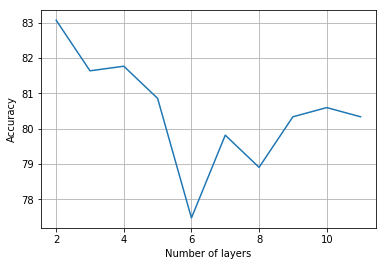

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(2,12),performances)
plt.grid()
plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.show()

As we can see, introducing more hidden layers doesn't improve the model, so the best model so far has two hidden layers with $170$ neurons each. 

We can try changing the number of epochs or the batch size. Since the batch size equal to $10$ seems to be fine, we will work only the number of epochs. Let **num_epochs** be the number of epochs. We will see what happens when we consider **num_epochs** $= 150 \ldots 199$. Note that making more epochs means the program will take more gradient steps, which should in fact decrease the loss function and, therefore, increase the accuracy.

In [18]:
num_neurons = 170
performances = numpy.zeros(50)
i = 0
for num_epochs in range(150,200):
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(num_neurons, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(X, Y, epochs=num_epochs, batch_size=10)

    # evaluate the model
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    performances[i] = scores[1]*100
    i += 1

Epoch 1/150
768/768 [==============================] - 8s 11ms/step - loss: 0.6840 - acc: 0.6211
Epoch 2/150
768/768 [==============================] - 1s 688us/step - loss: 0.6342 - acc: 0.6471
Epoch 3/150
768/768 [==============================] - 1s 704us/step - loss: 0.6129 - acc: 0.6589
Epoch 4/150
768/768 [==============================] - 1s 725us/step - loss: 0.6011 - acc: 0.6823
Epoch 5/150
768/768 [==============================] - 1s 973us/step - loss: 0.6155 - acc: 0.6875
Epoch 6/150
768/768 [==============================] - 1s 730us/step - loss: 0.5938 - acc: 0.6953
Epoch 7/150
768/768 [==============================] - 1s 672us/step - loss: 0.5868 - acc: 0.7070
Epoch 8/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5925 - acc: 0.7174
Epoch 9/150
768/768 [==============================] - 1s 1ms/step - loss: 0.5803 - acc: 0.6966
Epoch 10/150
768/768 [==============================] - 1s 791us/step - loss: 0.5841 - acc: 0.7096
Epoch 11/150
768/768 [==

768/768 [==============================] - 1s 884us/step - loss: 0.4207 - acc: 0.7852
Epoch 84/150
768/768 [==============================] - 1s 851us/step - loss: 0.4362 - acc: 0.8008
Epoch 85/150
768/768 [==============================] - 1s 658us/step - loss: 0.4621 - acc: 0.7812
Epoch 86/150
768/768 [==============================] - 1s 658us/step - loss: 0.4281 - acc: 0.8047
Epoch 87/150
768/768 [==============================] - 0s 647us/step - loss: 0.4269 - acc: 0.8151
Epoch 88/150
768/768 [==============================] - 1s 665us/step - loss: 0.4292 - acc: 0.8008
Epoch 89/150
768/768 [==============================] - 1s 653us/step - loss: 0.4260 - acc: 0.8060
Epoch 90/150
768/768 [==============================] - 0s 651us/step - loss: 0.4425 - acc: 0.7865
Epoch 91/150
768/768 [==============================] - 1s 670us/step - loss: 0.4132 - acc: 0.8073
Epoch 92/150
768/768 [==============================] - 1s 659us/step - loss: 0.4100 - acc: 0.8177
Epoch 93/150
768/768 [=

768/768 [==============================] - 1s 1ms/step - loss: 0.5626 - acc: 0.7240
Epoch 16/151
768/768 [==============================] - 1s 934us/step - loss: 0.5465 - acc: 0.7318
Epoch 17/151
768/768 [==============================] - 1s 827us/step - loss: 0.5620 - acc: 0.7253
Epoch 18/151
768/768 [==============================] - 1s 810us/step - loss: 0.5545 - acc: 0.7318
Epoch 19/151
768/768 [==============================] - 1s 789us/step - loss: 0.5547 - acc: 0.7201
Epoch 20/151
768/768 [==============================] - 1s 819us/step - loss: 0.5422 - acc: 0.7357
Epoch 21/151
768/768 [==============================] - 1s 780us/step - loss: 0.5381 - acc: 0.7344
Epoch 22/151
768/768 [==============================] - 1s 821us/step - loss: 0.5538 - acc: 0.7279
Epoch 23/151
768/768 [==============================] - 1s 829us/step - loss: 0.5333 - acc: 0.7227
Epoch 24/151
768/768 [==============================] - 1s 788us/step - loss: 0.5321 - acc: 0.7409
Epoch 25/151
768/768 [===

768/768 [==============================] - 1s 792us/step - loss: 0.4215 - acc: 0.8021
Epoch 98/151
768/768 [==============================] - 1s 780us/step - loss: 0.4250 - acc: 0.7891
Epoch 99/151
768/768 [==============================] - 1s 779us/step - loss: 0.4297 - acc: 0.7917
Epoch 100/151
768/768 [==============================] - 1s 778us/step - loss: 0.4166 - acc: 0.8138
Epoch 101/151
768/768 [==============================] - 1s 792us/step - loss: 0.4335 - acc: 0.7982
Epoch 102/151
768/768 [==============================] - 1s 778us/step - loss: 0.4142 - acc: 0.8177
Epoch 103/151
768/768 [==============================] - 1s 781us/step - loss: 0.4193 - acc: 0.8021
Epoch 104/151
768/768 [==============================] - 1s 773us/step - loss: 0.4097 - acc: 0.8138
Epoch 105/151
768/768 [==============================] - 1s 795us/step - loss: 0.4082 - acc: 0.8060
Epoch 106/151
768/768 [==============================] - 1s 772us/step - loss: 0.4131 - acc: 0.8099
Epoch 107/151
76

768/768 [==============================] - 1s 804us/step - loss: 0.5328 - acc: 0.7565
Epoch 28/152
768/768 [==============================] - 1s 838us/step - loss: 0.5314 - acc: 0.7461
Epoch 29/152
768/768 [==============================] - 1s 816us/step - loss: 0.5420 - acc: 0.7214
Epoch 30/152
768/768 [==============================] - 1s 839us/step - loss: 0.5191 - acc: 0.7305
Epoch 31/152
768/768 [==============================] - 1s 836us/step - loss: 0.5276 - acc: 0.7435
Epoch 32/152
768/768 [==============================] - 1s 822us/step - loss: 0.5250 - acc: 0.7383
Epoch 33/152
768/768 [==============================] - 1s 822us/step - loss: 0.5216 - acc: 0.7409
Epoch 34/152
768/768 [==============================] - 1s 808us/step - loss: 0.5170 - acc: 0.7552
Epoch 35/152
768/768 [==============================] - 1s 829us/step - loss: 0.5365 - acc: 0.7370
Epoch 36/152
768/768 [==============================] - 1s 823us/step - loss: 0.5112 - acc: 0.7435
Epoch 37/152
768/768 [=

768/768 [==============================] - 1s 803us/step - loss: 0.3919 - acc: 0.8125
Epoch 110/152
768/768 [==============================] - 1s 795us/step - loss: 0.3869 - acc: 0.8138
Epoch 111/152
768/768 [==============================] - 1s 825us/step - loss: 0.3870 - acc: 0.8125
Epoch 112/152
768/768 [==============================] - 1s 815us/step - loss: 0.3818 - acc: 0.8242
Epoch 113/152
768/768 [==============================] - 1s 814us/step - loss: 0.3788 - acc: 0.8099
Epoch 114/152
768/768 [==============================] - 1s 791us/step - loss: 0.3791 - acc: 0.8138
Epoch 115/152
768/768 [==============================] - 1s 800us/step - loss: 0.3866 - acc: 0.8164
Epoch 116/152
768/768 [==============================] - 1s 808us/step - loss: 0.3757 - acc: 0.8346
Epoch 117/152
768/768 [==============================] - 1s 801us/step - loss: 0.3638 - acc: 0.8281
Epoch 118/152
768/768 [==============================] - 1s 831us/step - loss: 0.3720 - acc: 0.8190
Epoch 119/152


768/768 [==============================] - 1s 782us/step - loss: 0.5102 - acc: 0.7604
Epoch 39/153
768/768 [==============================] - 1s 791us/step - loss: 0.5095 - acc: 0.7526
Epoch 40/153
768/768 [==============================] - 1s 785us/step - loss: 0.5053 - acc: 0.7474
Epoch 41/153
768/768 [==============================] - 1s 793us/step - loss: 0.5103 - acc: 0.7396
Epoch 42/153
768/768 [==============================] - 1s 807us/step - loss: 0.5046 - acc: 0.7409
Epoch 43/153
768/768 [==============================] - 1s 790us/step - loss: 0.5080 - acc: 0.7383
Epoch 44/153
768/768 [==============================] - 1s 800us/step - loss: 0.4985 - acc: 0.7591
Epoch 45/153
768/768 [==============================] - 1s 788us/step - loss: 0.5010 - acc: 0.7604
Epoch 46/153
768/768 [==============================] - 1s 791us/step - loss: 0.5012 - acc: 0.7513
Epoch 47/153
768/768 [==============================] - 1s 822us/step - loss: 0.4941 - acc: 0.7630
Epoch 48/153
768/768 [=

768/768 [==============================] - 1s 820us/step - loss: 0.4004 - acc: 0.8047
Epoch 121/153
768/768 [==============================] - 1s 813us/step - loss: 0.4026 - acc: 0.8190
Epoch 122/153
768/768 [==============================] - 1s 799us/step - loss: 0.4007 - acc: 0.8021
Epoch 123/153
768/768 [==============================] - 1s 822us/step - loss: 0.3872 - acc: 0.8177
Epoch 124/153
768/768 [==============================] - 1s 784us/step - loss: 0.3971 - acc: 0.8073
Epoch 125/153
768/768 [==============================] - 1s 859us/step - loss: 0.3907 - acc: 0.8086
Epoch 126/153
768/768 [==============================] - 1s 841us/step - loss: 0.3837 - acc: 0.8073
Epoch 127/153
768/768 [==============================] - 1s 832us/step - loss: 0.3745 - acc: 0.8190
Epoch 128/153
768/768 [==============================] - 1s 822us/step - loss: 0.3724 - acc: 0.8216
Epoch 129/153
768/768 [==============================] - 1s 786us/step - loss: 0.3561 - acc: 0.8385
Epoch 130/153


Epoch 49/154
768/768 [==============================] - 1s 885us/step - loss: 0.4875 - acc: 0.7422
Epoch 50/154
768/768 [==============================] - 1s 878us/step - loss: 0.5095 - acc: 0.7539
Epoch 51/154
768/768 [==============================] - 1s 859us/step - loss: 0.4775 - acc: 0.7630
Epoch 52/154
768/768 [==============================] - 1s 844us/step - loss: 0.4830 - acc: 0.7591
Epoch 53/154
768/768 [==============================] - 1s 833us/step - loss: 0.4812 - acc: 0.7630
Epoch 54/154
768/768 [==============================] - 1s 845us/step - loss: 0.4802 - acc: 0.7786
Epoch 55/154
768/768 [==============================] - 1s 842us/step - loss: 0.4749 - acc: 0.7708
Epoch 56/154
768/768 [==============================] - 1s 877us/step - loss: 0.4809 - acc: 0.7799
Epoch 57/154
768/768 [==============================] - 1s 848us/step - loss: 0.4661 - acc: 0.7799
Epoch 58/154
768/768 [==============================] - 1s 824us/step - loss: 0.4662 - acc: 0.7630
Epoch 59/1

768/768 [==============================] - 1s 812us/step - loss: 0.3660 - acc: 0.8307
Epoch 132/154
768/768 [==============================] - 1s 866us/step - loss: 0.3512 - acc: 0.8346
Epoch 133/154
768/768 [==============================] - 1s 824us/step - loss: 0.3511 - acc: 0.8346
Epoch 134/154
768/768 [==============================] - 1s 845us/step - loss: 0.3353 - acc: 0.8372
Epoch 135/154
768/768 [==============================] - 1s 842us/step - loss: 0.3584 - acc: 0.8281
Epoch 136/154
768/768 [==============================] - 1s 870us/step - loss: 0.3332 - acc: 0.8346
Epoch 137/154
768/768 [==============================] - 1s 864us/step - loss: 0.3335 - acc: 0.8411
Epoch 138/154
768/768 [==============================] - 1s 826us/step - loss: 0.3386 - acc: 0.8424
Epoch 139/154
768/768 [==============================] - 1s 846us/step - loss: 0.3426 - acc: 0.8359
Epoch 140/154
768/768 [==============================] - 1s 867us/step - loss: 0.3402 - acc: 0.8451
Epoch 141/154


768/768 [==============================] - 1s 828us/step - loss: 0.4876 - acc: 0.7643
Epoch 60/155
768/768 [==============================] - 1s 790us/step - loss: 0.4677 - acc: 0.7669
Epoch 61/155
768/768 [==============================] - 1s 843us/step - loss: 0.4674 - acc: 0.7617
Epoch 62/155
768/768 [==============================] - 1s 848us/step - loss: 0.4461 - acc: 0.7799
Epoch 63/155
768/768 [==============================] - 1s 855us/step - loss: 0.4657 - acc: 0.7578
Epoch 64/155
768/768 [==============================] - 1s 833us/step - loss: 0.4553 - acc: 0.7721
Epoch 65/155
768/768 [==============================] - 1s 827us/step - loss: 0.4538 - acc: 0.7773
Epoch 66/155
768/768 [==============================] - 1s 811us/step - loss: 0.4588 - acc: 0.7734
Epoch 67/155
768/768 [==============================] - 1s 822us/step - loss: 0.4527 - acc: 0.7852
Epoch 68/155
768/768 [==============================] - 1s 801us/step - loss: 0.4496 - acc: 0.7852
Epoch 69/155
768/768 [=

768/768 [==============================] - 1s 822us/step - loss: 0.3710 - acc: 0.8307
Epoch 142/155
768/768 [==============================] - 1s 830us/step - loss: 0.3549 - acc: 0.8411
Epoch 143/155
768/768 [==============================] - 1s 836us/step - loss: 0.3435 - acc: 0.8346
Epoch 144/155
768/768 [==============================] - 1s 850us/step - loss: 0.3533 - acc: 0.8333
Epoch 145/155
768/768 [==============================] - 1s 853us/step - loss: 0.3601 - acc: 0.8307
Epoch 146/155
768/768 [==============================] - 1s 846us/step - loss: 0.3626 - acc: 0.8333
Epoch 147/155
768/768 [==============================] - 1s 848us/step - loss: 0.3688 - acc: 0.8255
Epoch 148/155
768/768 [==============================] - 1s 845us/step - loss: 0.3406 - acc: 0.8503
Epoch 149/155
768/768 [==============================] - 1s 837us/step - loss: 0.3365 - acc: 0.8464
Epoch 150/155
768/768 [==============================] - 1s 832us/step - loss: 0.3412 - acc: 0.8490
Epoch 151/155


768/768 [==============================] - 1s 853us/step - loss: 0.4362 - acc: 0.7839
Epoch 69/156
768/768 [==============================] - 1s 788us/step - loss: 0.4399 - acc: 0.7891
Epoch 70/156
768/768 [==============================] - 1s 850us/step - loss: 0.4380 - acc: 0.7799
Epoch 71/156
768/768 [==============================] - 1s 802us/step - loss: 0.4416 - acc: 0.7891
Epoch 72/156
768/768 [==============================] - 1s 823us/step - loss: 0.4263 - acc: 0.8073
Epoch 73/156
768/768 [==============================] - 1s 829us/step - loss: 0.4349 - acc: 0.7839
Epoch 74/156
768/768 [==============================] - 1s 821us/step - loss: 0.4308 - acc: 0.7982
Epoch 75/156
768/768 [==============================] - 1s 823us/step - loss: 0.4293 - acc: 0.7839
Epoch 76/156
768/768 [==============================] - 1s 808us/step - loss: 0.4213 - acc: 0.7982
Epoch 77/156
768/768 [==============================] - 1s 852us/step - loss: 0.4346 - acc: 0.7904
Epoch 78/156
768/768 [=

768/768 [==============================] - 1s 890us/step - loss: 0.3322 - acc: 0.8477
Epoch 151/156
768/768 [==============================] - 1s 797us/step - loss: 0.3285 - acc: 0.8490
Epoch 152/156
768/768 [==============================] - 1s 826us/step - loss: 0.3509 - acc: 0.8411
Epoch 153/156
768/768 [==============================] - 1s 829us/step - loss: 0.3410 - acc: 0.8464
Epoch 154/156
768/768 [==============================] - 1s 836us/step - loss: 0.3276 - acc: 0.8620
Epoch 155/156
768/768 [==============================] - 1s 820us/step - loss: 0.3552 - acc: 0.8411
Epoch 156/156
768/768 [==============================] - 4s 5ms/step

acc: 85.16%
Epoch 1/157
768/768 [==============================] - 8s 11ms/step - loss: 0.6661 - acc: 0.6354
Epoch 2/157
768/768 [==============================] - 1s 824us/step - loss: 0.6428 - acc: 0.6497
Epoch 3/157
768/768 [==============================] - 1s 823us/step - loss: 0.6078 - acc: 0.6758
Epoch 4/157
768/768 [==================

768/768 [==============================] - 1s 814us/step - loss: 0.4407 - acc: 0.7904
Epoch 77/157
768/768 [==============================] - 1s 828us/step - loss: 0.4600 - acc: 0.7721
Epoch 78/157
768/768 [==============================] - 1s 837us/step - loss: 0.4454 - acc: 0.7826
Epoch 79/157
768/768 [==============================] - 1s 822us/step - loss: 0.4468 - acc: 0.7878
Epoch 80/157
768/768 [==============================] - 1s 828us/step - loss: 0.4374 - acc: 0.7917
Epoch 81/157
768/768 [==============================] - 1s 842us/step - loss: 0.4696 - acc: 0.7708
Epoch 82/157
768/768 [==============================] - 1s 839us/step - loss: 0.4450 - acc: 0.7826
Epoch 83/157
768/768 [==============================] - 1s 841us/step - loss: 0.4423 - acc: 0.7917
Epoch 84/157
768/768 [==============================] - 1s 849us/step - loss: 0.4387 - acc: 0.7826
Epoch 85/157
768/768 [==============================] - 1s 799us/step - loss: 0.4472 - acc: 0.7760
Epoch 86/157
768/768 [=

768/768 [==============================] - 4s 5ms/step

acc: 84.77%
Epoch 1/158
768/768 [==============================] - 8s 11ms/step - loss: 0.6761 - acc: 0.6328
Epoch 2/158
768/768 [==============================] - 1s 860us/step - loss: 0.6285 - acc: 0.6615
Epoch 3/158
768/768 [==============================] - 1s 841us/step - loss: 0.6166 - acc: 0.6693
Epoch 4/158
768/768 [==============================] - 1s 873us/step - loss: 0.6141 - acc: 0.6771
Epoch 5/158
768/768 [==============================] - 1s 870us/step - loss: 0.5942 - acc: 0.6849
Epoch 6/158
768/768 [==============================] - 1s 877us/step - loss: 0.5944 - acc: 0.6940
Epoch 7/158
768/768 [==============================] - 1s 868us/step - loss: 0.6007 - acc: 0.7083
Epoch 8/158
768/768 [==============================] - 1s 865us/step - loss: 0.5967 - acc: 0.7005
Epoch 9/158
768/768 [==============================] - 1s 867us/step - loss: 0.6017 - acc: 0.6940
Epoch 10/158
768/768 [=============================

768/768 [==============================] - 1s 881us/step - loss: 0.4248 - acc: 0.8086
Epoch 84/158
768/768 [==============================] - 1s 881us/step - loss: 0.4242 - acc: 0.8034
Epoch 85/158
768/768 [==============================] - 1s 840us/step - loss: 0.4258 - acc: 0.7982
Epoch 86/158
768/768 [==============================] - 1s 843us/step - loss: 0.4121 - acc: 0.8203
Epoch 87/158
768/768 [==============================] - 1s 840us/step - loss: 0.4194 - acc: 0.7930
Epoch 88/158
768/768 [==============================] - 1s 864us/step - loss: 0.4176 - acc: 0.7865
Epoch 89/158
768/768 [==============================] - 1s 833us/step - loss: 0.4099 - acc: 0.8086
Epoch 90/158
768/768 [==============================] - 1s 857us/step - loss: 0.4244 - acc: 0.8008
Epoch 91/158
768/768 [==============================] - 1s 838us/step - loss: 0.4084 - acc: 0.8047
Epoch 92/158
768/768 [==============================] - 1s 863us/step - loss: 0.4157 - acc: 0.7995
Epoch 93/158
768/768 [=

768/768 [==============================] - 1s 858us/step - loss: 0.5970 - acc: 0.7005
Epoch 7/159
768/768 [==============================] - 1s 842us/step - loss: 0.5857 - acc: 0.7122
Epoch 8/159
768/768 [==============================] - 1s 849us/step - loss: 0.5873 - acc: 0.7070
Epoch 9/159
768/768 [==============================] - 1s 893us/step - loss: 0.5796 - acc: 0.7161
Epoch 10/159
768/768 [==============================] - 1s 859us/step - loss: 0.5822 - acc: 0.6979
Epoch 11/159
768/768 [==============================] - 1s 882us/step - loss: 0.5753 - acc: 0.7148
Epoch 12/159
768/768 [==============================] - 1s 871us/step - loss: 0.5740 - acc: 0.6979
Epoch 13/159
768/768 [==============================] - 1s 847us/step - loss: 0.5696 - acc: 0.7070
Epoch 14/159
768/768 [==============================] - 1s 878us/step - loss: 0.5599 - acc: 0.7305
Epoch 15/159
768/768 [==============================] - 1s 887us/step - loss: 0.5557 - acc: 0.7331
Epoch 16/159
768/768 [====

768/768 [==============================] - 1s 884us/step - loss: 0.4166 - acc: 0.7995
Epoch 89/159
768/768 [==============================] - 1s 879us/step - loss: 0.3977 - acc: 0.8151
Epoch 90/159
768/768 [==============================] - 1s 895us/step - loss: 0.4340 - acc: 0.7943
Epoch 91/159
768/768 [==============================] - 1s 881us/step - loss: 0.4099 - acc: 0.8021
Epoch 92/159
768/768 [==============================] - 1s 871us/step - loss: 0.4205 - acc: 0.7995
Epoch 93/159
768/768 [==============================] - 1s 868us/step - loss: 0.3981 - acc: 0.8125
Epoch 94/159
768/768 [==============================] - 1s 856us/step - loss: 0.3987 - acc: 0.8333
Epoch 95/159
768/768 [==============================] - 1s 852us/step - loss: 0.4055 - acc: 0.8099
Epoch 96/159
768/768 [==============================] - 1s 871us/step - loss: 0.4124 - acc: 0.7982
Epoch 97/159
768/768 [==============================] - 1s 890us/step - loss: 0.3899 - acc: 0.8203
Epoch 98/159
768/768 [=

768/768 [==============================] - 1s 875us/step - loss: 0.5698 - acc: 0.7266
Epoch 11/160
768/768 [==============================] - 1s 881us/step - loss: 0.5712 - acc: 0.7044
Epoch 12/160
768/768 [==============================] - 1s 858us/step - loss: 0.5760 - acc: 0.7161
Epoch 13/160
768/768 [==============================] - 1s 871us/step - loss: 0.5682 - acc: 0.7201
Epoch 14/160
768/768 [==============================] - 1s 857us/step - loss: 0.5659 - acc: 0.7187
Epoch 15/160
768/768 [==============================] - 1s 876us/step - loss: 0.5524 - acc: 0.7161
Epoch 16/160
768/768 [==============================] - 1s 847us/step - loss: 0.5518 - acc: 0.7253
Epoch 17/160
768/768 [==============================] - 1s 849us/step - loss: 0.5575 - acc: 0.7161
Epoch 18/160
768/768 [==============================] - 1s 858us/step - loss: 0.5597 - acc: 0.7188
Epoch 19/160
768/768 [==============================] - 1s 877us/step - loss: 0.5540 - acc: 0.7292
Epoch 20/160
768/768 [=

768/768 [==============================] - 1s 888us/step - loss: 0.4126 - acc: 0.7995
Epoch 93/160
768/768 [==============================] - 1s 891us/step - loss: 0.4212 - acc: 0.7969
Epoch 94/160
768/768 [==============================] - 1s 887us/step - loss: 0.4065 - acc: 0.8216
Epoch 95/160
768/768 [==============================] - 1s 908us/step - loss: 0.4208 - acc: 0.8021
Epoch 96/160
768/768 [==============================] - 1s 899us/step - loss: 0.4076 - acc: 0.8112
Epoch 97/160
768/768 [==============================] - 1s 887us/step - loss: 0.4203 - acc: 0.8034
Epoch 98/160
768/768 [==============================] - 1s 902us/step - loss: 0.4359 - acc: 0.7995
Epoch 99/160
768/768 [==============================] - 1s 872us/step - loss: 0.3974 - acc: 0.8047
Epoch 100/160
768/768 [==============================] - 1s 908us/step - loss: 0.4096 - acc: 0.8151
Epoch 101/160
768/768 [==============================] - 1s 904us/step - loss: 0.4219 - acc: 0.7982
Epoch 102/160
768/768

768/768 [==============================] - 1s 880us/step - loss: 0.5806 - acc: 0.7031
Epoch 14/161
768/768 [==============================] - 1s 892us/step - loss: 0.5531 - acc: 0.7240
Epoch 15/161
768/768 [==============================] - 1s 874us/step - loss: 0.5651 - acc: 0.7318
Epoch 16/161
768/768 [==============================] - 1s 880us/step - loss: 0.5664 - acc: 0.7031
Epoch 17/161
768/768 [==============================] - 1s 836us/step - loss: 0.5618 - acc: 0.7148
Epoch 18/161
768/768 [==============================] - 1s 845us/step - loss: 0.5596 - acc: 0.7305
Epoch 19/161
768/768 [==============================] - 1s 881us/step - loss: 0.5399 - acc: 0.7279
Epoch 20/161
768/768 [==============================] - 1s 858us/step - loss: 0.5460 - acc: 0.7318
Epoch 21/161
768/768 [==============================] - 1s 862us/step - loss: 0.5404 - acc: 0.7305
Epoch 22/161
768/768 [==============================] - 1s 839us/step - loss: 0.5403 - acc: 0.7279
Epoch 23/161
768/768 [=

768/768 [==============================] - 1s 864us/step - loss: 0.4320 - acc: 0.7865
Epoch 96/161
768/768 [==============================] - 1s 888us/step - loss: 0.4314 - acc: 0.7917
Epoch 97/161
768/768 [==============================] - 1s 895us/step - loss: 0.4324 - acc: 0.7956
Epoch 98/161
768/768 [==============================] - 1s 876us/step - loss: 0.4369 - acc: 0.7878
Epoch 99/161
768/768 [==============================] - 1s 883us/step - loss: 0.4321 - acc: 0.7995
Epoch 100/161
768/768 [==============================] - 1s 875us/step - loss: 0.4143 - acc: 0.8099
Epoch 101/161
768/768 [==============================] - 1s 882us/step - loss: 0.4320 - acc: 0.7812
Epoch 102/161
768/768 [==============================] - 1s 895us/step - loss: 0.4406 - acc: 0.7943
Epoch 103/161
768/768 [==============================] - 1s 886us/step - loss: 0.4187 - acc: 0.8008
Epoch 104/161
768/768 [==============================] - 1s 893us/step - loss: 0.4269 - acc: 0.7904
Epoch 105/161
768/

768/768 [==============================] - 1s 841us/step - loss: 0.5599 - acc: 0.7266
Epoch 16/162
768/768 [==============================] - 1s 836us/step - loss: 0.5519 - acc: 0.7227
Epoch 17/162
768/768 [==============================] - 1s 828us/step - loss: 0.5568 - acc: 0.7188
Epoch 18/162
768/768 [==============================] - 1s 870us/step - loss: 0.5407 - acc: 0.7435
Epoch 19/162
768/768 [==============================] - 1s 852us/step - loss: 0.5534 - acc: 0.7174
Epoch 20/162
768/768 [==============================] - 1s 832us/step - loss: 0.5416 - acc: 0.7409
Epoch 21/162
768/768 [==============================] - 1s 839us/step - loss: 0.5513 - acc: 0.7305
Epoch 22/162
768/768 [==============================] - 1s 872us/step - loss: 0.5391 - acc: 0.7305
Epoch 23/162
768/768 [==============================] - 1s 875us/step - loss: 0.5415 - acc: 0.7292
Epoch 24/162
768/768 [==============================] - 1s 858us/step - loss: 0.5340 - acc: 0.7396
Epoch 25/162
768/768 [=

768/768 [==============================] - 1s 876us/step - loss: 0.4054 - acc: 0.8073
Epoch 98/162
768/768 [==============================] - 1s 839us/step - loss: 0.4122 - acc: 0.8047
Epoch 99/162
768/768 [==============================] - 1s 837us/step - loss: 0.4144 - acc: 0.8047
Epoch 100/162
768/768 [==============================] - 1s 840us/step - loss: 0.4075 - acc: 0.8073
Epoch 101/162
768/768 [==============================] - 1s 842us/step - loss: 0.4087 - acc: 0.8099
Epoch 102/162
768/768 [==============================] - 1s 851us/step - loss: 0.4161 - acc: 0.7995
Epoch 103/162
768/768 [==============================] - 1s 850us/step - loss: 0.3888 - acc: 0.8164
Epoch 104/162
768/768 [==============================] - 1s 870us/step - loss: 0.4112 - acc: 0.8099
Epoch 105/162
768/768 [==============================] - 1s 832us/step - loss: 0.4100 - acc: 0.8164
Epoch 106/162
768/768 [==============================] - 1s 875us/step - loss: 0.3949 - acc: 0.8216
Epoch 107/162
76

768/768 [==============================] - 1s 845us/step - loss: 0.5546 - acc: 0.7240
Epoch 17/163
768/768 [==============================] - 1s 836us/step - loss: 0.5494 - acc: 0.7227
Epoch 18/163
768/768 [==============================] - 1s 842us/step - loss: 0.5509 - acc: 0.7188
Epoch 19/163
768/768 [==============================] - 1s 856us/step - loss: 0.5593 - acc: 0.7122
Epoch 20/163
768/768 [==============================] - 1s 856us/step - loss: 0.5371 - acc: 0.7318
Epoch 21/163
768/768 [==============================] - 1s 841us/step - loss: 0.5429 - acc: 0.7422
Epoch 22/163
768/768 [==============================] - 1s 839us/step - loss: 0.5616 - acc: 0.7109
Epoch 23/163
768/768 [==============================] - 1s 852us/step - loss: 0.5477 - acc: 0.7227
Epoch 24/163
768/768 [==============================] - 1s 854us/step - loss: 0.5418 - acc: 0.7396
Epoch 25/163
768/768 [==============================] - 1s 855us/step - loss: 0.5332 - acc: 0.7409
Epoch 26/163
768/768 [=

768/768 [==============================] - 1s 851us/step - loss: 0.4093 - acc: 0.8229
Epoch 99/163
768/768 [==============================] - 1s 841us/step - loss: 0.4056 - acc: 0.8112
Epoch 100/163
768/768 [==============================] - 1s 840us/step - loss: 0.4049 - acc: 0.8008
Epoch 101/163
768/768 [==============================] - 1s 857us/step - loss: 0.4045 - acc: 0.8138
Epoch 102/163
768/768 [==============================] - 1s 837us/step - loss: 0.3815 - acc: 0.8203
Epoch 103/163
768/768 [==============================] - 1s 837us/step - loss: 0.3986 - acc: 0.8060
Epoch 104/163
768/768 [==============================] - 1s 865us/step - loss: 0.3898 - acc: 0.8229
Epoch 105/163
768/768 [==============================] - 1s 842us/step - loss: 0.3989 - acc: 0.8073
Epoch 106/163
768/768 [==============================] - 1s 840us/step - loss: 0.4003 - acc: 0.8229
Epoch 107/163
768/768 [==============================] - 1s 871us/step - loss: 0.3919 - acc: 0.8125
Epoch 108/163
7

768/768 [==============================] - 1s 845us/step - loss: 0.5572 - acc: 0.7174
Epoch 17/164
768/768 [==============================] - 1s 876us/step - loss: 0.5613 - acc: 0.7096
Epoch 18/164
768/768 [==============================] - 1s 849us/step - loss: 0.5572 - acc: 0.7305
Epoch 19/164
768/768 [==============================] - 1s 850us/step - loss: 0.5437 - acc: 0.7292
Epoch 20/164
768/768 [==============================] - 1s 853us/step - loss: 0.5581 - acc: 0.7188
Epoch 21/164
768/768 [==============================] - 1s 837us/step - loss: 0.5416 - acc: 0.7370
Epoch 22/164
768/768 [==============================] - 1s 843us/step - loss: 0.5364 - acc: 0.7331
Epoch 23/164
768/768 [==============================] - 1s 887us/step - loss: 0.5310 - acc: 0.7318
Epoch 24/164
768/768 [==============================] - 1s 885us/step - loss: 0.5320 - acc: 0.7448
Epoch 25/164
768/768 [==============================] - 1s 834us/step - loss: 0.5318 - acc: 0.7474
Epoch 26/164
768/768 [=

768/768 [==============================] - 1s 840us/step - loss: 0.3922 - acc: 0.8008
Epoch 99/164
768/768 [==============================] - 1s 801us/step - loss: 0.3861 - acc: 0.8307
Epoch 100/164
768/768 [==============================] - 1s 838us/step - loss: 0.3894 - acc: 0.8242
Epoch 101/164
768/768 [==============================] - 1s 832us/step - loss: 0.4122 - acc: 0.8099
Epoch 102/164
768/768 [==============================] - 1s 833us/step - loss: 0.4172 - acc: 0.7982
Epoch 103/164
768/768 [==============================] - 1s 798us/step - loss: 0.3986 - acc: 0.8190
Epoch 104/164
768/768 [==============================] - 1s 823us/step - loss: 0.3784 - acc: 0.8281
Epoch 105/164
768/768 [==============================] - 1s 824us/step - loss: 0.3937 - acc: 0.8151
Epoch 106/164
768/768 [==============================] - 1s 860us/step - loss: 0.3848 - acc: 0.8203
Epoch 107/164
768/768 [==============================] - 1s 830us/step - loss: 0.3830 - acc: 0.8216
Epoch 108/164
7

768/768 [==============================] - 1s 807us/step - loss: 0.5540 - acc: 0.7227
Epoch 16/165
768/768 [==============================] - 1s 810us/step - loss: 0.5495 - acc: 0.7422
Epoch 17/165
768/768 [==============================] - 1s 833us/step - loss: 0.5561 - acc: 0.7188
Epoch 18/165
768/768 [==============================] - 1s 826us/step - loss: 0.5601 - acc: 0.7174
Epoch 19/165
768/768 [==============================] - 1s 819us/step - loss: 0.5490 - acc: 0.7344
Epoch 20/165
768/768 [==============================] - 1s 824us/step - loss: 0.5446 - acc: 0.7357
Epoch 21/165
768/768 [==============================] - 1s 842us/step - loss: 0.5538 - acc: 0.7409
Epoch 22/165
768/768 [==============================] - 1s 839us/step - loss: 0.5519 - acc: 0.7240
Epoch 23/165
768/768 [==============================] - 1s 841us/step - loss: 0.5517 - acc: 0.7266
Epoch 24/165
768/768 [==============================] - 1s 837us/step - loss: 0.5510 - acc: 0.7331
Epoch 25/165
768/768 [=

768/768 [==============================] - 1s 872us/step - loss: 0.3986 - acc: 0.8099
Epoch 98/165
768/768 [==============================] - 1s 834us/step - loss: 0.4147 - acc: 0.7852
Epoch 99/165
768/768 [==============================] - 1s 855us/step - loss: 0.4190 - acc: 0.8034
Epoch 100/165
768/768 [==============================] - 1s 844us/step - loss: 0.4099 - acc: 0.8073
Epoch 101/165
768/768 [==============================] - 1s 843us/step - loss: 0.4247 - acc: 0.7956
Epoch 102/165
768/768 [==============================] - 1s 879us/step - loss: 0.4221 - acc: 0.7904
Epoch 103/165
768/768 [==============================] - 1s 848us/step - loss: 0.4013 - acc: 0.7982
Epoch 104/165
768/768 [==============================] - 1s 861us/step - loss: 0.4153 - acc: 0.8047
Epoch 105/165
768/768 [==============================] - 1s 863us/step - loss: 0.4034 - acc: 0.7956
Epoch 106/165
768/768 [==============================] - 1s 860us/step - loss: 0.4159 - acc: 0.7904
Epoch 107/165
76

768/768 [==============================] - 1s 879us/step - loss: 0.5623 - acc: 0.7187
Epoch 14/166
768/768 [==============================] - 1s 837us/step - loss: 0.5593 - acc: 0.7044
Epoch 15/166
768/768 [==============================] - 1s 860us/step - loss: 0.5529 - acc: 0.7292
Epoch 16/166
768/768 [==============================] - 1s 852us/step - loss: 0.5558 - acc: 0.7188
Epoch 17/166
768/768 [==============================] - 1s 868us/step - loss: 0.5666 - acc: 0.7122
Epoch 18/166
768/768 [==============================] - 1s 877us/step - loss: 0.5599 - acc: 0.7214
Epoch 19/166
768/768 [==============================] - 1s 833us/step - loss: 0.5483 - acc: 0.7253
Epoch 20/166
768/768 [==============================] - 1s 846us/step - loss: 0.5470 - acc: 0.7266
Epoch 21/166
768/768 [==============================] - 1s 869us/step - loss: 0.5475 - acc: 0.7292
Epoch 22/166
768/768 [==============================] - 1s 853us/step - loss: 0.5337 - acc: 0.7357
Epoch 23/166
768/768 [=

768/768 [==============================] - 1s 880us/step - loss: 0.4200 - acc: 0.8047
Epoch 96/166
768/768 [==============================] - 1s 836us/step - loss: 0.4007 - acc: 0.8138
Epoch 97/166
768/768 [==============================] - 1s 845us/step - loss: 0.3980 - acc: 0.8086
Epoch 98/166
768/768 [==============================] - 1s 865us/step - loss: 0.3960 - acc: 0.8164
Epoch 99/166
768/768 [==============================] - 1s 834us/step - loss: 0.4091 - acc: 0.8021
Epoch 100/166
768/768 [==============================] - 1s 893us/step - loss: 0.4010 - acc: 0.8073
Epoch 101/166
768/768 [==============================] - 1s 845us/step - loss: 0.4014 - acc: 0.8060
Epoch 102/166
768/768 [==============================] - 1s 860us/step - loss: 0.3949 - acc: 0.8047
Epoch 103/166
768/768 [==============================] - 1s 835us/step - loss: 0.4046 - acc: 0.8125
Epoch 104/166
768/768 [==============================] - 1s 873us/step - loss: 0.3880 - acc: 0.8229
Epoch 105/166
768/

768/768 [==============================] - 1s 905us/step - loss: 0.5818 - acc: 0.6979
Epoch 11/167
768/768 [==============================] - 1s 897us/step - loss: 0.5612 - acc: 0.7135
Epoch 12/167
768/768 [==============================] - 1s 901us/step - loss: 0.5756 - acc: 0.7187
Epoch 13/167
768/768 [==============================] - 1s 907us/step - loss: 0.5730 - acc: 0.6966
Epoch 14/167
768/768 [==============================] - 1s 900us/step - loss: 0.5591 - acc: 0.7435
Epoch 15/167
768/768 [==============================] - 1s 923us/step - loss: 0.5593 - acc: 0.7096
Epoch 16/167
768/768 [==============================] - 1s 883us/step - loss: 0.5647 - acc: 0.7174
Epoch 17/167
768/768 [==============================] - 1s 888us/step - loss: 0.5550 - acc: 0.7201
Epoch 18/167
768/768 [==============================] - 1s 897us/step - loss: 0.5459 - acc: 0.7318
Epoch 19/167
768/768 [==============================] - 1s 882us/step - loss: 0.5467 - acc: 0.7305
Epoch 20/167
768/768 [=

Epoch 93/167
768/768 [==============================] - 1s 893us/step - loss: 0.4146 - acc: 0.8060
Epoch 94/167
768/768 [==============================] - 1s 888us/step - loss: 0.4083 - acc: 0.7891
Epoch 95/167
768/768 [==============================] - 1s 911us/step - loss: 0.4254 - acc: 0.8008
Epoch 96/167
768/768 [==============================] - 1s 894us/step - loss: 0.4216 - acc: 0.7982
Epoch 97/167
768/768 [==============================] - 1s 896us/step - loss: 0.4090 - acc: 0.8021
Epoch 98/167
768/768 [==============================] - 1s 903us/step - loss: 0.4115 - acc: 0.7904
Epoch 99/167
768/768 [==============================] - 1s 887us/step - loss: 0.4042 - acc: 0.8112
Epoch 100/167
768/768 [==============================] - 1s 917us/step - loss: 0.4095 - acc: 0.7904
Epoch 101/167
768/768 [==============================] - 1s 896us/step - loss: 0.4046 - acc: 0.7930
Epoch 102/167
768/768 [==============================] - 1s 911us/step - loss: 0.4024 - acc: 0.8060
Epoch 1

768/768 [==============================] - 1s 911us/step - loss: 0.5934 - acc: 0.6979
Epoch 8/168
768/768 [==============================] - 1s 875us/step - loss: 0.5842 - acc: 0.6940
Epoch 9/168
768/768 [==============================] - 1s 915us/step - loss: 0.5850 - acc: 0.7031
Epoch 10/168
768/768 [==============================] - 1s 901us/step - loss: 0.5706 - acc: 0.7174
Epoch 11/168
768/768 [==============================] - 1s 907us/step - loss: 0.5806 - acc: 0.7201
Epoch 12/168
768/768 [==============================] - 1s 928us/step - loss: 0.5751 - acc: 0.7201
Epoch 13/168
768/768 [==============================] - 1s 923us/step - loss: 0.5740 - acc: 0.6979
Epoch 14/168
768/768 [==============================] - 1s 907us/step - loss: 0.5782 - acc: 0.7135
Epoch 15/168
768/768 [==============================] - 1s 917us/step - loss: 0.5603 - acc: 0.7201
Epoch 16/168
768/768 [==============================] - 1s 892us/step - loss: 0.5593 - acc: 0.7201
Epoch 17/168
768/768 [===

768/768 [==============================] - 1s 907us/step - loss: 0.4191 - acc: 0.8060
Epoch 90/168
768/768 [==============================] - 1s 911us/step - loss: 0.4312 - acc: 0.7773
Epoch 91/168
768/768 [==============================] - 1s 906us/step - loss: 0.4112 - acc: 0.8008
Epoch 92/168
768/768 [==============================] - 1s 907us/step - loss: 0.4133 - acc: 0.7995
Epoch 93/168
768/768 [==============================] - 1s 910us/step - loss: 0.4195 - acc: 0.8008
Epoch 94/168
768/768 [==============================] - 1s 928us/step - loss: 0.4225 - acc: 0.7956
Epoch 95/168
768/768 [==============================] - 1s 915us/step - loss: 0.4070 - acc: 0.7982
Epoch 96/168
768/768 [==============================] - 1s 913us/step - loss: 0.4054 - acc: 0.8086
Epoch 97/168
768/768 [==============================] - 1s 908us/step - loss: 0.4295 - acc: 0.7760
Epoch 98/168
768/768 [==============================] - 1s 909us/step - loss: 0.4088 - acc: 0.8021
Epoch 99/168
768/768 [=

768/768 [==============================] - 1s 861us/step - loss: 0.6218 - acc: 0.6693
Epoch 3/169
768/768 [==============================] - 1s 874us/step - loss: 0.6249 - acc: 0.6549
Epoch 4/169
768/768 [==============================] - 1s 896us/step - loss: 0.6089 - acc: 0.6732
Epoch 5/169
768/768 [==============================] - 1s 899us/step - loss: 0.6093 - acc: 0.6615
Epoch 6/169
768/768 [==============================] - 1s 899us/step - loss: 0.5933 - acc: 0.6901
Epoch 7/169
768/768 [==============================] - 1s 876us/step - loss: 0.6068 - acc: 0.6888
Epoch 8/169
768/768 [==============================] - 1s 890us/step - loss: 0.5940 - acc: 0.6823
Epoch 9/169
768/768 [==============================] - 1s 861us/step - loss: 0.5752 - acc: 0.7266
Epoch 10/169
768/768 [==============================] - 1s 902us/step - loss: 0.5738 - acc: 0.7148
Epoch 11/169
768/768 [==============================] - 1s 884us/step - loss: 0.5701 - acc: 0.7148
Epoch 12/169
768/768 [========

Epoch 85/169
768/768 [==============================] - 1s 887us/step - loss: 0.4484 - acc: 0.7904
Epoch 86/169
768/768 [==============================] - 1s 883us/step - loss: 0.4413 - acc: 0.7839
Epoch 87/169
768/768 [==============================] - 1s 897us/step - loss: 0.4178 - acc: 0.7982
Epoch 88/169
768/768 [==============================] - 1s 864us/step - loss: 0.4311 - acc: 0.8060
Epoch 89/169
768/768 [==============================] - 1s 873us/step - loss: 0.4221 - acc: 0.8047
Epoch 90/169
768/768 [==============================] - 1s 906us/step - loss: 0.4316 - acc: 0.7969
Epoch 91/169
768/768 [==============================] - 1s 886us/step - loss: 0.4394 - acc: 0.7917
Epoch 92/169
768/768 [==============================] - 1s 883us/step - loss: 0.4196 - acc: 0.8060
Epoch 93/169
768/768 [==============================] - 1s 903us/step - loss: 0.4155 - acc: 0.8099
Epoch 94/169
768/768 [==============================] - 1s 909us/step - loss: 0.4233 - acc: 0.7969
Epoch 95/1

768/768 [==============================] - 1s 889us/step - loss: 0.3933 - acc: 0.8125
Epoch 168/169
768/768 [==============================] - 1s 858us/step - loss: 0.3752 - acc: 0.8203
Epoch 169/169
768/768 [==============================] - 4s 5ms/step

acc: 78.91%
Epoch 1/170
768/768 [==============================] - 9s 12ms/step - loss: 0.6704 - acc: 0.6289
Epoch 2/170
768/768 [==============================] - 1s 895us/step - loss: 0.6408 - acc: 0.6563
Epoch 3/170
768/768 [==============================] - 1s 886us/step - loss: 0.6207 - acc: 0.6615
Epoch 4/170
768/768 [==============================] - 1s 911us/step - loss: 0.6052 - acc: 0.6875
Epoch 5/170
768/768 [==============================] - 1s 906us/step - loss: 0.5943 - acc: 0.6745
Epoch 6/170
768/768 [==============================] - 1s 914us/step - loss: 0.5879 - acc: 0.7018
Epoch 7/170
768/768 [==============================] - 1s 896us/step - loss: 0.5978 - acc: 0.6810
Epoch 8/170
768/768 [==========================

768/768 [==============================] - 1s 882us/step - loss: 0.4356 - acc: 0.7839
Epoch 81/170
768/768 [==============================] - 1s 893us/step - loss: 0.4361 - acc: 0.7930
Epoch 82/170
768/768 [==============================] - 1s 855us/step - loss: 0.4366 - acc: 0.7995
Epoch 83/170
768/768 [==============================] - 1s 887us/step - loss: 0.4331 - acc: 0.7982
Epoch 84/170
768/768 [==============================] - 1s 885us/step - loss: 0.4276 - acc: 0.7995
Epoch 85/170
768/768 [==============================] - 1s 874us/step - loss: 0.4426 - acc: 0.7865
Epoch 86/170
768/768 [==============================] - 1s 882us/step - loss: 0.4277 - acc: 0.7930
Epoch 87/170
768/768 [==============================] - 1s 850us/step - loss: 0.4340 - acc: 0.7930
Epoch 88/170
768/768 [==============================] - 1s 877us/step - loss: 0.4270 - acc: 0.7904
Epoch 89/170
768/768 [==============================] - 1s 871us/step - loss: 0.4289 - acc: 0.7865
Epoch 90/170
768/768 [=

768/768 [==============================] - 1s 902us/step - loss: 0.3218 - acc: 0.8646
Epoch 163/170
768/768 [==============================] - 1s 910us/step - loss: 0.3225 - acc: 0.8633
Epoch 164/170
768/768 [==============================] - 1s 914us/step - loss: 0.3122 - acc: 0.8529
Epoch 165/170
768/768 [==============================] - 1s 880us/step - loss: 0.3303 - acc: 0.8398
Epoch 166/170
768/768 [==============================] - 1s 902us/step - loss: 0.3400 - acc: 0.8451
Epoch 167/170
768/768 [==============================] - 1s 922us/step - loss: 0.3245 - acc: 0.8633
Epoch 168/170
768/768 [==============================] - 1s 910us/step - loss: 0.3146 - acc: 0.8503
Epoch 169/170
768/768 [==============================] - 1s 888us/step - loss: 0.3199 - acc: 0.8633
Epoch 170/170
768/768 [==============================] - 4s 5ms/step

acc: 86.59%
Epoch 1/171
768/768 [==============================] - 9s 12ms/step - loss: 0.6717 - acc: 0.6315
Epoch 2/171
768/768 [==============

768/768 [==============================] - 1s 860us/step - loss: 0.4379 - acc: 0.7773
Epoch 75/171
768/768 [==============================] - 1s 817us/step - loss: 0.4442 - acc: 0.7917
Epoch 76/171
768/768 [==============================] - 1s 833us/step - loss: 0.4451 - acc: 0.7852
Epoch 77/171
768/768 [==============================] - 1s 853us/step - loss: 0.4241 - acc: 0.8073
Epoch 78/171
768/768 [==============================] - 1s 877us/step - loss: 0.4544 - acc: 0.7852
Epoch 79/171
768/768 [==============================] - 1s 828us/step - loss: 0.4451 - acc: 0.7617
Epoch 80/171
768/768 [==============================] - 1s 832us/step - loss: 0.4389 - acc: 0.7930
Epoch 81/171
768/768 [==============================] - 1s 846us/step - loss: 0.4408 - acc: 0.7943
Epoch 82/171
768/768 [==============================] - 1s 834us/step - loss: 0.4220 - acc: 0.7878
Epoch 83/171
768/768 [==============================] - 1s 853us/step - loss: 0.4195 - acc: 0.8008
Epoch 84/171
768/768 [=

768/768 [==============================] - 1s 874us/step - loss: 0.3264 - acc: 0.8581
Epoch 157/171
768/768 [==============================] - 1s 875us/step - loss: 0.3045 - acc: 0.8659
Epoch 158/171
768/768 [==============================] - 1s 832us/step - loss: 0.3266 - acc: 0.8529
Epoch 159/171
768/768 [==============================] - 1s 831us/step - loss: 0.3177 - acc: 0.8555
Epoch 160/171
768/768 [==============================] - 1s 866us/step - loss: 0.3112 - acc: 0.8633
Epoch 161/171
768/768 [==============================] - 1s 858us/step - loss: 0.3160 - acc: 0.8490
Epoch 162/171
768/768 [==============================] - 1s 855us/step - loss: 0.3024 - acc: 0.8659
Epoch 163/171
768/768 [==============================] - 1s 841us/step - loss: 0.3147 - acc: 0.8503
Epoch 164/171
768/768 [==============================] - 1s 859us/step - loss: 0.3129 - acc: 0.8555
Epoch 165/171
768/768 [==============================] - 1s 844us/step - loss: 0.3174 - acc: 0.8516
Epoch 166/171


768/768 [==============================] - 1s 872us/step - loss: 0.4612 - acc: 0.7760
Epoch 68/172
768/768 [==============================] - 1s 867us/step - loss: 0.4657 - acc: 0.7786
Epoch 69/172
768/768 [==============================] - 1s 870us/step - loss: 0.4663 - acc: 0.7721
Epoch 70/172
768/768 [==============================] - 1s 894us/step - loss: 0.4613 - acc: 0.7669
Epoch 71/172
768/768 [==============================] - 1s 886us/step - loss: 0.4534 - acc: 0.7826
Epoch 72/172
768/768 [==============================] - 1s 869us/step - loss: 0.4517 - acc: 0.7917
Epoch 73/172
768/768 [==============================] - 1s 880us/step - loss: 0.4557 - acc: 0.7578
Epoch 74/172
768/768 [==============================] - 1s 850us/step - loss: 0.4720 - acc: 0.7695
Epoch 75/172
768/768 [==============================] - 1s 890us/step - loss: 0.4464 - acc: 0.7760
Epoch 76/172
768/768 [==============================] - 1s 862us/step - loss: 0.4500 - acc: 0.7669
Epoch 77/172
768/768 [=

768/768 [==============================] - 1s 881us/step - loss: 0.3192 - acc: 0.8529
Epoch 150/172
768/768 [==============================] - 1s 860us/step - loss: 0.3293 - acc: 0.8529
Epoch 151/172
768/768 [==============================] - 1s 872us/step - loss: 0.3302 - acc: 0.8437
Epoch 152/172
768/768 [==============================] - 1s 886us/step - loss: 0.3301 - acc: 0.8477
Epoch 153/172
768/768 [==============================] - 1s 856us/step - loss: 0.3338 - acc: 0.8424
Epoch 154/172
768/768 [==============================] - 1s 869us/step - loss: 0.3925 - acc: 0.8177
Epoch 155/172
768/768 [==============================] - 1s 868us/step - loss: 0.3612 - acc: 0.8216
Epoch 156/172
768/768 [==============================] - 1s 859us/step - loss: 0.3667 - acc: 0.8151
Epoch 157/172
768/768 [==============================] - 1s 857us/step - loss: 0.3276 - acc: 0.8529
Epoch 158/172
768/768 [==============================] - 1s 855us/step - loss: 0.3256 - acc: 0.8555
Epoch 159/172


768/768 [==============================] - 1s 900us/step - loss: 0.4623 - acc: 0.7695
Epoch 60/173
768/768 [==============================] - 1s 890us/step - loss: 0.4655 - acc: 0.7747
Epoch 61/173
768/768 [==============================] - 1s 888us/step - loss: 0.4559 - acc: 0.7760
Epoch 62/173
768/768 [==============================] - 1s 885us/step - loss: 0.4717 - acc: 0.7812
Epoch 63/173
768/768 [==============================] - 1s 904us/step - loss: 0.4601 - acc: 0.7734
Epoch 64/173
768/768 [==============================] - 1s 880us/step - loss: 0.4645 - acc: 0.7721
Epoch 65/173
768/768 [==============================] - 1s 868us/step - loss: 0.4552 - acc: 0.7721
Epoch 66/173
768/768 [==============================] - 1s 874us/step - loss: 0.4477 - acc: 0.7865
Epoch 67/173
768/768 [==============================] - 1s 867us/step - loss: 0.4569 - acc: 0.7930
Epoch 68/173
768/768 [==============================] - 1s 874us/step - loss: 0.4607 - acc: 0.7643
Epoch 69/173
768/768 [=

768/768 [==============================] - 1s 906us/step - loss: 0.3737 - acc: 0.8255
Epoch 142/173
768/768 [==============================] - 1s 899us/step - loss: 0.3734 - acc: 0.8203
Epoch 143/173
768/768 [==============================] - 1s 884us/step - loss: 0.3580 - acc: 0.8411
Epoch 144/173
768/768 [==============================] - 1s 892us/step - loss: 0.3551 - acc: 0.8281
Epoch 145/173
768/768 [==============================] - 1s 889us/step - loss: 0.3598 - acc: 0.8203
Epoch 146/173
768/768 [==============================] - 1s 899us/step - loss: 0.3476 - acc: 0.8346
Epoch 147/173
768/768 [==============================] - 1s 889us/step - loss: 0.3768 - acc: 0.8294
Epoch 148/173
768/768 [==============================] - 1s 918us/step - loss: 0.3454 - acc: 0.8385
Epoch 149/173
768/768 [==============================] - 1s 881us/step - loss: 0.3581 - acc: 0.8268
Epoch 150/173
768/768 [==============================] - 1s 894us/step - loss: 0.3671 - acc: 0.8320
Epoch 151/173


Epoch 50/174
768/768 [==============================] - 1s 874us/step - loss: 0.4854 - acc: 0.7565
Epoch 51/174
768/768 [==============================] - 1s 846us/step - loss: 0.4819 - acc: 0.7682
Epoch 52/174
768/768 [==============================] - 1s 864us/step - loss: 0.4865 - acc: 0.7565
Epoch 53/174
768/768 [==============================] - 1s 834us/step - loss: 0.4826 - acc: 0.7604
Epoch 54/174
768/768 [==============================] - 1s 848us/step - loss: 0.4746 - acc: 0.7734
Epoch 55/174
768/768 [==============================] - 1s 876us/step - loss: 0.4697 - acc: 0.7682
Epoch 56/174
768/768 [==============================] - 1s 882us/step - loss: 0.4699 - acc: 0.7669
Epoch 57/174
768/768 [==============================] - 1s 888us/step - loss: 0.4766 - acc: 0.7604
Epoch 58/174
768/768 [==============================] - 1s 884us/step - loss: 0.4647 - acc: 0.7630
Epoch 59/174
768/768 [==============================] - 1s 966us/step - loss: 0.4553 - acc: 0.7786
Epoch 60/1

768/768 [==============================] - 1s 864us/step - loss: 0.3618 - acc: 0.8359
Epoch 133/174
768/768 [==============================] - 1s 850us/step - loss: 0.3348 - acc: 0.8542
Epoch 134/174
768/768 [==============================] - 1s 851us/step - loss: 0.3393 - acc: 0.8464
Epoch 135/174
768/768 [==============================] - 1s 864us/step - loss: 0.3337 - acc: 0.8568
Epoch 136/174
768/768 [==============================] - 1s 873us/step - loss: 0.3559 - acc: 0.8437
Epoch 137/174
768/768 [==============================] - 1s 869us/step - loss: 0.3514 - acc: 0.8398
Epoch 138/174
768/768 [==============================] - 1s 863us/step - loss: 0.3352 - acc: 0.8437
Epoch 139/174
768/768 [==============================] - 1s 867us/step - loss: 0.3344 - acc: 0.8346
Epoch 140/174
768/768 [==============================] - 1s 860us/step - loss: 0.3461 - acc: 0.8437
Epoch 141/174
768/768 [==============================] - 1s 861us/step - loss: 0.3301 - acc: 0.8503
Epoch 142/174


768/768 [==============================] - 1s 915us/step - loss: 0.5207 - acc: 0.7461
Epoch 40/175
768/768 [==============================] - 1s 902us/step - loss: 0.5112 - acc: 0.7448
Epoch 41/175
768/768 [==============================] - 1s 916us/step - loss: 0.5165 - acc: 0.7500
Epoch 42/175
768/768 [==============================] - 1s 955us/step - loss: 0.5122 - acc: 0.7448
Epoch 43/175
768/768 [==============================] - 1s 917us/step - loss: 0.5018 - acc: 0.7552
Epoch 44/175
768/768 [==============================] - 1s 909us/step - loss: 0.4962 - acc: 0.7617
Epoch 45/175
768/768 [==============================] - 1s 908us/step - loss: 0.4993 - acc: 0.7565
Epoch 46/175
768/768 [==============================] - 1s 912us/step - loss: 0.5176 - acc: 0.7396
Epoch 47/175
768/768 [==============================] - 1s 925us/step - loss: 0.4989 - acc: 0.7656
Epoch 48/175
768/768 [==============================] - 1s 923us/step - loss: 0.4956 - acc: 0.7565
Epoch 49/175
768/768 [=

768/768 [==============================] - 1s 931us/step - loss: 0.3983 - acc: 0.7917
Epoch 122/175
768/768 [==============================] - 1s 912us/step - loss: 0.3726 - acc: 0.8229
Epoch 123/175
768/768 [==============================] - 1s 913us/step - loss: 0.4124 - acc: 0.8034
Epoch 124/175
768/768 [==============================] - 1s 923us/step - loss: 0.3801 - acc: 0.8190
Epoch 125/175
768/768 [==============================] - 1s 918us/step - loss: 0.3892 - acc: 0.8229
Epoch 126/175
768/768 [==============================] - 1s 923us/step - loss: 0.3710 - acc: 0.8190
Epoch 127/175
768/768 [==============================] - 1s 929us/step - loss: 0.3866 - acc: 0.8203
Epoch 128/175
768/768 [==============================] - 1s 917us/step - loss: 0.3706 - acc: 0.8359
Epoch 129/175
768/768 [==============================] - 1s 905us/step - loss: 0.3724 - acc: 0.8229
Epoch 130/175
768/768 [==============================] - 1s 906us/step - loss: 0.3849 - acc: 0.8086
Epoch 131/175


768/768 [==============================] - 1s 890us/step - loss: 0.5399 - acc: 0.7370
Epoch 28/176
768/768 [==============================] - 1s 885us/step - loss: 0.5257 - acc: 0.7435
Epoch 29/176
768/768 [==============================] - 1s 890us/step - loss: 0.5293 - acc: 0.7591
Epoch 30/176
768/768 [==============================] - 1s 887us/step - loss: 0.5308 - acc: 0.7383
Epoch 31/176
768/768 [==============================] - 1s 904us/step - loss: 0.5194 - acc: 0.7435
Epoch 32/176
768/768 [==============================] - 1s 874us/step - loss: 0.5438 - acc: 0.7344
Epoch 33/176
768/768 [==============================] - 1s 885us/step - loss: 0.5282 - acc: 0.7305
Epoch 34/176
768/768 [==============================] - 1s 884us/step - loss: 0.5340 - acc: 0.7227
Epoch 35/176
768/768 [==============================] - 1s 899us/step - loss: 0.5414 - acc: 0.7448
Epoch 36/176
768/768 [==============================] - 1s 891us/step - loss: 0.5214 - acc: 0.7370
Epoch 37/176
768/768 [=

768/768 [==============================] - 1s 878us/step - loss: 0.3888 - acc: 0.7930
Epoch 110/176
768/768 [==============================] - 1s 874us/step - loss: 0.3754 - acc: 0.8268
Epoch 111/176
768/768 [==============================] - 1s 844us/step - loss: 0.3801 - acc: 0.8203
Epoch 112/176
768/768 [==============================] - 1s 891us/step - loss: 0.3769 - acc: 0.8164
Epoch 113/176
768/768 [==============================] - 1s 876us/step - loss: 0.3939 - acc: 0.8229
Epoch 114/176
768/768 [==============================] - 1s 863us/step - loss: 0.3709 - acc: 0.8151
Epoch 115/176
768/768 [==============================] - 1s 842us/step - loss: 0.3856 - acc: 0.8073
Epoch 116/176
768/768 [==============================] - 1s 875us/step - loss: 0.3714 - acc: 0.8294
Epoch 117/176
768/768 [==============================] - 1s 874us/step - loss: 0.3630 - acc: 0.8281
Epoch 118/176
768/768 [==============================] - 1s 862us/step - loss: 0.3775 - acc: 0.8151
Epoch 119/176


768/768 [==============================] - 1s 906us/step - loss: 0.5688 - acc: 0.7005
Epoch 15/177
768/768 [==============================] - 1s 901us/step - loss: 0.5628 - acc: 0.7135
Epoch 16/177
768/768 [==============================] - 1s 904us/step - loss: 0.5677 - acc: 0.7109
Epoch 17/177
768/768 [==============================] - 1s 888us/step - loss: 0.5596 - acc: 0.7135
Epoch 18/177
768/768 [==============================] - 1s 899us/step - loss: 0.5514 - acc: 0.7344
Epoch 19/177
768/768 [==============================] - 1s 914us/step - loss: 0.5538 - acc: 0.7240
Epoch 20/177
768/768 [==============================] - 1s 904us/step - loss: 0.5575 - acc: 0.7227
Epoch 21/177
768/768 [==============================] - 1s 918us/step - loss: 0.5457 - acc: 0.7240
Epoch 22/177
768/768 [==============================] - 1s 910us/step - loss: 0.5399 - acc: 0.7174
Epoch 23/177
768/768 [==============================] - 1s 911us/step - loss: 0.5457 - acc: 0.7214
Epoch 24/177
768/768 [=

768/768 [==============================] - 1s 896us/step - loss: 0.4094 - acc: 0.8151
Epoch 97/177
768/768 [==============================] - 1s 915us/step - loss: 0.3938 - acc: 0.8164
Epoch 98/177
768/768 [==============================] - 1s 890us/step - loss: 0.3926 - acc: 0.8060
Epoch 99/177
768/768 [==============================] - 1s 909us/step - loss: 0.3973 - acc: 0.8216
Epoch 100/177
768/768 [==============================] - 1s 890us/step - loss: 0.4058 - acc: 0.7982
Epoch 101/177
768/768 [==============================] - 1s 913us/step - loss: 0.3818 - acc: 0.8177
Epoch 102/177
768/768 [==============================] - 1s 908us/step - loss: 0.3993 - acc: 0.7891
Epoch 103/177
768/768 [==============================] - 1s 919us/step - loss: 0.3926 - acc: 0.8190
Epoch 104/177
768/768 [==============================] - 1s 887us/step - loss: 0.4072 - acc: 0.8099
Epoch 105/177
768/768 [==============================] - 1s 920us/step - loss: 0.4030 - acc: 0.8047
Epoch 106/177
768

768/768 [==============================] - 4s 5ms/step

acc: 86.85%
Epoch 1/178
768/768 [==============================] - 9s 12ms/step - loss: 0.6800 - acc: 0.6263
Epoch 2/178
768/768 [==============================] - 1s 888us/step - loss: 0.6433 - acc: 0.6536
Epoch 3/178
768/768 [==============================] - 1s 902us/step - loss: 0.6092 - acc: 0.6849
Epoch 4/178
768/768 [==============================] - 1s 902us/step - loss: 0.6073 - acc: 0.6940
Epoch 5/178
768/768 [==============================] - 1s 909us/step - loss: 0.6074 - acc: 0.6875
Epoch 6/178
768/768 [==============================] - 1s 896us/step - loss: 0.5887 - acc: 0.6953
Epoch 7/178
768/768 [==============================] - 1s 923us/step - loss: 0.5794 - acc: 0.7148
Epoch 8/178
768/768 [==============================] - 1s 901us/step - loss: 0.5786 - acc: 0.6875
Epoch 9/178
768/768 [==============================] - 1s 911us/step - loss: 0.5739 - acc: 0.7070
Epoch 10/178
768/768 [=============================

768/768 [==============================] - 1s 907us/step - loss: 0.4253 - acc: 0.8060
Epoch 84/178
768/768 [==============================] - 1s 891us/step - loss: 0.4298 - acc: 0.7956
Epoch 85/178
768/768 [==============================] - 1s 896us/step - loss: 0.4155 - acc: 0.8034
Epoch 86/178
768/768 [==============================] - 1s 905us/step - loss: 0.4245 - acc: 0.7917
Epoch 87/178
768/768 [==============================] - 1s 907us/step - loss: 0.4099 - acc: 0.7982
Epoch 88/178
768/768 [==============================] - 1s 903us/step - loss: 0.4093 - acc: 0.8112
Epoch 89/178
768/768 [==============================] - 1s 894us/step - loss: 0.4223 - acc: 0.7891
Epoch 90/178
768/768 [==============================] - 1s 905us/step - loss: 0.4130 - acc: 0.8073
Epoch 91/178
768/768 [==============================] - 1s 895us/step - loss: 0.4082 - acc: 0.8073
Epoch 92/178
768/768 [==============================] - 1s 905us/step - loss: 0.4024 - acc: 0.7982
Epoch 93/178
768/768 [=

768/768 [==============================] - 1s 899us/step - loss: 0.3351 - acc: 0.8451
Epoch 166/178
768/768 [==============================] - 1s 901us/step - loss: 0.3443 - acc: 0.8346
Epoch 167/178
768/768 [==============================] - 1s 895us/step - loss: 0.3104 - acc: 0.8633
Epoch 168/178
768/768 [==============================] - 1s 925us/step - loss: 0.3093 - acc: 0.8711
Epoch 169/178
768/768 [==============================] - 1s 914us/step - loss: 0.2905 - acc: 0.8620
Epoch 170/178
768/768 [==============================] - 1s 898us/step - loss: 0.2904 - acc: 0.8711
Epoch 171/178
768/768 [==============================] - 1s 914us/step - loss: 0.3150 - acc: 0.8581
Epoch 172/178
768/768 [==============================] - 1s 892us/step - loss: 0.3056 - acc: 0.8620
Epoch 173/178
768/768 [==============================] - 1s 907us/step - loss: 0.3110 - acc: 0.8568
Epoch 174/178
768/768 [==============================] - 1s 910us/step - loss: 0.3143 - acc: 0.8568
Epoch 175/178


768/768 [==============================] - 1s 873us/step - loss: 0.4490 - acc: 0.7773
Epoch 70/179
768/768 [==============================] - 1s 880us/step - loss: 0.4590 - acc: 0.7839
Epoch 71/179
768/768 [==============================] - 1s 867us/step - loss: 0.4452 - acc: 0.7721
Epoch 72/179
768/768 [==============================] - 1s 866us/step - loss: 0.4420 - acc: 0.7878
Epoch 73/179
768/768 [==============================] - 1s 886us/step - loss: 0.4408 - acc: 0.7812
Epoch 74/179
768/768 [==============================] - 1s 890us/step - loss: 0.4469 - acc: 0.7943
Epoch 75/179
768/768 [==============================] - 1s 880us/step - loss: 0.4497 - acc: 0.7839
Epoch 76/179
768/768 [==============================] - 1s 882us/step - loss: 0.4496 - acc: 0.7826
Epoch 77/179
768/768 [==============================] - 1s 885us/step - loss: 0.4385 - acc: 0.7852
Epoch 78/179
768/768 [==============================] - 1s 873us/step - loss: 0.4322 - acc: 0.7826
Epoch 79/179
768/768 [=

768/768 [==============================] - 1s 876us/step - loss: 0.3478 - acc: 0.8516
Epoch 152/179
768/768 [==============================] - 1s 888us/step - loss: 0.3328 - acc: 0.8477
Epoch 153/179
768/768 [==============================] - 1s 874us/step - loss: 0.3578 - acc: 0.8281
Epoch 154/179
768/768 [==============================] - 1s 870us/step - loss: 0.3308 - acc: 0.8568
Epoch 155/179
768/768 [==============================] - 1s 862us/step - loss: 0.3471 - acc: 0.8477
Epoch 156/179
768/768 [==============================] - 1s 868us/step - loss: 0.3380 - acc: 0.8542
Epoch 157/179
768/768 [==============================] - 1s 889us/step - loss: 0.3402 - acc: 0.8503
Epoch 158/179
768/768 [==============================] - 1s 870us/step - loss: 0.3504 - acc: 0.8398
Epoch 159/179
768/768 [==============================] - 1s 890us/step - loss: 0.3509 - acc: 0.8411
Epoch 160/179
768/768 [==============================] - 1s 903us/step - loss: 0.3490 - acc: 0.8359
Epoch 161/179


768/768 [==============================] - 1s 907us/step - loss: 0.4769 - acc: 0.7669
Epoch 55/180
768/768 [==============================] - 1s 902us/step - loss: 0.4816 - acc: 0.7617
Epoch 56/180
768/768 [==============================] - 1s 905us/step - loss: 0.4965 - acc: 0.7604
Epoch 57/180
768/768 [==============================] - 1s 908us/step - loss: 0.4833 - acc: 0.7630
Epoch 58/180
768/768 [==============================] - 1s 906us/step - loss: 0.4763 - acc: 0.7643
Epoch 59/180
768/768 [==============================] - 1s 919us/step - loss: 0.4647 - acc: 0.7852
Epoch 60/180
768/768 [==============================] - 1s 929us/step - loss: 0.4854 - acc: 0.7747
Epoch 61/180
768/768 [==============================] - 1s 903us/step - loss: 0.4768 - acc: 0.7708
Epoch 62/180
768/768 [==============================] - 1s 911us/step - loss: 0.4539 - acc: 0.7786
Epoch 63/180
768/768 [==============================] - 1s 921us/step - loss: 0.4547 - acc: 0.7826
Epoch 64/180
768/768 [=

768/768 [==============================] - 1s 922us/step - loss: 0.3543 - acc: 0.8333
Epoch 137/180
768/768 [==============================] - 1s 940us/step - loss: 0.3651 - acc: 0.8372
Epoch 138/180
768/768 [==============================] - 1s 895us/step - loss: 0.3482 - acc: 0.8411
Epoch 139/180
768/768 [==============================] - 1s 915us/step - loss: 0.3606 - acc: 0.8333
Epoch 140/180
768/768 [==============================] - 1s 902us/step - loss: 0.3751 - acc: 0.8242
Epoch 141/180
768/768 [==============================] - 1s 934us/step - loss: 0.3419 - acc: 0.8555
Epoch 142/180
768/768 [==============================] - 1s 915us/step - loss: 0.3470 - acc: 0.8359
Epoch 143/180
768/768 [==============================] - 1s 902us/step - loss: 0.3367 - acc: 0.8542
Epoch 144/180
768/768 [==============================] - 1s 917us/step - loss: 0.3427 - acc: 0.8503
Epoch 145/180
768/768 [==============================] - 1s 906us/step - loss: 0.3318 - acc: 0.8503
Epoch 146/180


768/768 [==============================] - 1s 986us/step - loss: 0.5179 - acc: 0.7383
Epoch 38/181
768/768 [==============================] - 1s 919us/step - loss: 0.5110 - acc: 0.7448
Epoch 39/181
768/768 [==============================] - 1s 930us/step - loss: 0.5100 - acc: 0.7383
Epoch 40/181
768/768 [==============================] - 1s 921us/step - loss: 0.5099 - acc: 0.7448
Epoch 41/181
768/768 [==============================] - 1s 909us/step - loss: 0.5059 - acc: 0.7565
Epoch 42/181
768/768 [==============================] - 1s 921us/step - loss: 0.4978 - acc: 0.7474
Epoch 43/181
768/768 [==============================] - 1s 905us/step - loss: 0.5011 - acc: 0.7591
Epoch 44/181
768/768 [==============================] - 1s 925us/step - loss: 0.5037 - acc: 0.7552
Epoch 45/181
768/768 [==============================] - 1s 932us/step - loss: 0.4863 - acc: 0.7656
Epoch 46/181
768/768 [==============================] - 1s 927us/step - loss: 0.5051 - acc: 0.7617
Epoch 47/181
768/768 [=

768/768 [==============================] - 1s 927us/step - loss: 0.3647 - acc: 0.8359
Epoch 120/181
768/768 [==============================] - 1s 923us/step - loss: 0.3999 - acc: 0.7995
Epoch 121/181
768/768 [==============================] - 1s 929us/step - loss: 0.3730 - acc: 0.8268
Epoch 122/181
768/768 [==============================] - 1s 950us/step - loss: 0.3764 - acc: 0.8203
Epoch 123/181
768/768 [==============================] - 1s 894us/step - loss: 0.3704 - acc: 0.8281
Epoch 124/181
768/768 [==============================] - 1s 909us/step - loss: 0.3494 - acc: 0.8398
Epoch 125/181
768/768 [==============================] - 1s 916us/step - loss: 0.3628 - acc: 0.8424
Epoch 126/181
768/768 [==============================] - 1s 908us/step - loss: 0.3501 - acc: 0.8516
Epoch 127/181
768/768 [==============================] - 1s 915us/step - loss: 0.3556 - acc: 0.8255
Epoch 128/181
768/768 [==============================] - 1s 935us/step - loss: 0.3579 - acc: 0.8294
Epoch 129/181


768/768 [==============================] - 1s 915us/step - loss: 0.5665 - acc: 0.7044
Epoch 20/182
768/768 [==============================] - 1s 902us/step - loss: 0.5451 - acc: 0.7461
Epoch 21/182
768/768 [==============================] - 1s 901us/step - loss: 0.5422 - acc: 0.7227
Epoch 22/182
768/768 [==============================] - 1s 904us/step - loss: 0.5380 - acc: 0.7461
Epoch 23/182
768/768 [==============================] - 1s 895us/step - loss: 0.5369 - acc: 0.7474
Epoch 24/182
768/768 [==============================] - 1s 911us/step - loss: 0.5368 - acc: 0.7344
Epoch 25/182
768/768 [==============================] - 1s 908us/step - loss: 0.5233 - acc: 0.7500
Epoch 26/182
768/768 [==============================] - 1s 895us/step - loss: 0.5307 - acc: 0.7461
Epoch 27/182
768/768 [==============================] - 1s 903us/step - loss: 0.5427 - acc: 0.7357
Epoch 28/182
768/768 [==============================] - 1s 896us/step - loss: 0.5344 - acc: 0.7435
Epoch 29/182
768/768 [=

768/768 [==============================] - 1s 906us/step - loss: 0.4200 - acc: 0.8060
Epoch 102/182
768/768 [==============================] - 1s 932us/step - loss: 0.4083 - acc: 0.7982
Epoch 103/182
768/768 [==============================] - 1s 931us/step - loss: 0.4183 - acc: 0.7956
Epoch 104/182
768/768 [==============================] - 1s 921us/step - loss: 0.4048 - acc: 0.8099
Epoch 105/182
768/768 [==============================] - 1s 921us/step - loss: 0.3824 - acc: 0.8320
Epoch 106/182
768/768 [==============================] - 1s 924us/step - loss: 0.4137 - acc: 0.7930
Epoch 107/182
768/768 [==============================] - 1s 924us/step - loss: 0.4044 - acc: 0.8073
Epoch 108/182
768/768 [==============================] - 1s 915us/step - loss: 0.4185 - acc: 0.8177
Epoch 109/182
768/768 [==============================] - 1s 904us/step - loss: 0.3935 - acc: 0.8255
Epoch 110/182
768/768 [==============================] - 1s 922us/step - loss: 0.3954 - acc: 0.8125
Epoch 111/182


768/768 [==============================] - 4s 5ms/step

acc: 85.03%
Epoch 1/183
768/768 [==============================] - 9s 12ms/step - loss: 0.6670 - acc: 0.6237
Epoch 2/183
768/768 [==============================] - 1s 952us/step - loss: 0.6150 - acc: 0.6693
Epoch 3/183
768/768 [==============================] - 1s 982us/step - loss: 0.6221 - acc: 0.6602
Epoch 4/183
768/768 [==============================] - 1s 912us/step - loss: 0.6041 - acc: 0.6888
Epoch 5/183
768/768 [==============================] - 1s 912us/step - loss: 0.6057 - acc: 0.6940
Epoch 6/183
768/768 [==============================] - 1s 909us/step - loss: 0.5822 - acc: 0.6927
Epoch 7/183
768/768 [==============================] - 1s 906us/step - loss: 0.5892 - acc: 0.6953
Epoch 8/183
768/768 [==============================] - 1s 905us/step - loss: 0.5873 - acc: 0.6992
Epoch 9/183
768/768 [==============================] - 1s 912us/step - loss: 0.5807 - acc: 0.6979
Epoch 10/183
768/768 [=============================

768/768 [==============================] - 1s 979us/step - loss: 0.4289 - acc: 0.7917
Epoch 84/183
768/768 [==============================] - 1s 998us/step - loss: 0.4336 - acc: 0.7969
Epoch 85/183
768/768 [==============================] - 1s 966us/step - loss: 0.4194 - acc: 0.7956
Epoch 86/183
768/768 [==============================] - 1s 925us/step - loss: 0.4253 - acc: 0.8008
Epoch 87/183
768/768 [==============================] - 1s 930us/step - loss: 0.4411 - acc: 0.7799
Epoch 88/183
768/768 [==============================] - 1s 912us/step - loss: 0.4231 - acc: 0.8086
Epoch 89/183
768/768 [==============================] - 1s 896us/step - loss: 0.4260 - acc: 0.7956
Epoch 90/183
768/768 [==============================] - 1s 1ms/step - loss: 0.4399 - acc: 0.7852
Epoch 91/183
768/768 [==============================] - 1s 1ms/step - loss: 0.4203 - acc: 0.7995
Epoch 92/183
768/768 [==============================] - 1s 1ms/step - loss: 0.4214 - acc: 0.8047
Epoch 93/183
768/768 [=======

768/768 [==============================] - 1s 885us/step - loss: 0.3540 - acc: 0.8451
Epoch 166/183
768/768 [==============================] - 1s 895us/step - loss: 0.3465 - acc: 0.8411
Epoch 167/183
768/768 [==============================] - 1s 898us/step - loss: 0.3606 - acc: 0.8385
Epoch 168/183
768/768 [==============================] - 1s 972us/step - loss: 0.3406 - acc: 0.8464
Epoch 169/183
768/768 [==============================] - 1s 904us/step - loss: 0.3410 - acc: 0.8385
Epoch 170/183
768/768 [==============================] - 1s 916us/step - loss: 0.3508 - acc: 0.8411
Epoch 171/183
768/768 [==============================] - 1s 920us/step - loss: 0.3416 - acc: 0.8333
Epoch 172/183
768/768 [==============================] - 1s 910us/step - loss: 0.3380 - acc: 0.8529
Epoch 173/183
768/768 [==============================] - 1s 910us/step - loss: 0.3311 - acc: 0.8451
Epoch 174/183
768/768 [==============================] - 1s 914us/step - loss: 0.3440 - acc: 0.8555
Epoch 175/183


768/768 [==============================] - 1s 927us/step - loss: 0.4790 - acc: 0.7565
Epoch 65/184
768/768 [==============================] - 1s 924us/step - loss: 0.4661 - acc: 0.7591
Epoch 66/184
768/768 [==============================] - 1s 951us/step - loss: 0.4691 - acc: 0.7812
Epoch 67/184
768/768 [==============================] - 1s 898us/step - loss: 0.4676 - acc: 0.7747
Epoch 68/184
768/768 [==============================] - 1s 928us/step - loss: 0.4592 - acc: 0.7721
Epoch 69/184
768/768 [==============================] - 1s 918us/step - loss: 0.4743 - acc: 0.7656
Epoch 70/184
768/768 [==============================] - 1s 935us/step - loss: 0.4538 - acc: 0.7604
Epoch 71/184
768/768 [==============================] - 1s 911us/step - loss: 0.4571 - acc: 0.7760
Epoch 72/184
768/768 [==============================] - 1s 919us/step - loss: 0.4469 - acc: 0.7839
Epoch 73/184
768/768 [==============================] - 1s 935us/step - loss: 0.4511 - acc: 0.7760
Epoch 74/184
768/768 [=

768/768 [==============================] - 1s 909us/step - loss: 0.3531 - acc: 0.8333
Epoch 147/184
768/768 [==============================] - 1s 927us/step - loss: 0.3518 - acc: 0.8437
Epoch 148/184
768/768 [==============================] - 1s 927us/step - loss: 0.3446 - acc: 0.8359
Epoch 149/184
768/768 [==============================] - 1s 897us/step - loss: 0.3571 - acc: 0.8346
Epoch 150/184
768/768 [==============================] - 1s 969us/step - loss: 0.3459 - acc: 0.8424
Epoch 151/184
768/768 [==============================] - 1s 940us/step - loss: 0.3779 - acc: 0.8281
Epoch 152/184
768/768 [==============================] - 1s 906us/step - loss: 0.3688 - acc: 0.8346
Epoch 153/184
768/768 [==============================] - 1s 922us/step - loss: 0.3650 - acc: 0.8346
Epoch 154/184
768/768 [==============================] - 1s 913us/step - loss: 0.3600 - acc: 0.8281
Epoch 155/184
768/768 [==============================] - 1s 932us/step - loss: 0.3532 - acc: 0.8398
Epoch 156/184


768/768 [==============================] - 1s 918us/step - loss: 0.4964 - acc: 0.7578
Epoch 44/185
768/768 [==============================] - 1s 920us/step - loss: 0.4999 - acc: 0.7578
Epoch 45/185
768/768 [==============================] - 1s 913us/step - loss: 0.4901 - acc: 0.7630
Epoch 46/185
768/768 [==============================] - 1s 914us/step - loss: 0.4995 - acc: 0.7487
Epoch 47/185
768/768 [==============================] - 1s 924us/step - loss: 0.4884 - acc: 0.7630
Epoch 48/185
768/768 [==============================] - 1s 921us/step - loss: 0.4862 - acc: 0.7565
Epoch 49/185
768/768 [==============================] - 1s 927us/step - loss: 0.4962 - acc: 0.7539
Epoch 50/185
768/768 [==============================] - 1s 936us/step - loss: 0.4999 - acc: 0.7539
Epoch 51/185
768/768 [==============================] - 1s 914us/step - loss: 0.4906 - acc: 0.7565
Epoch 52/185
768/768 [==============================] - 1s 930us/step - loss: 0.4799 - acc: 0.7630
Epoch 53/185
768/768 [=

768/768 [==============================] - 1s 999us/step - loss: 0.3813 - acc: 0.8255
Epoch 126/185
768/768 [==============================] - 1s 996us/step - loss: 0.3834 - acc: 0.8164
Epoch 127/185
768/768 [==============================] - 1s 1ms/step - loss: 0.3605 - acc: 0.8346
Epoch 128/185
768/768 [==============================] - 1s 1ms/step - loss: 0.3594 - acc: 0.8307
Epoch 129/185
768/768 [==============================] - 1s 1ms/step - loss: 0.3707 - acc: 0.8177
Epoch 130/185
768/768 [==============================] - 1s 924us/step - loss: 0.3713 - acc: 0.8242
Epoch 131/185
768/768 [==============================] - 1s 929us/step - loss: 0.3706 - acc: 0.8268
Epoch 132/185
768/768 [==============================] - 1s 908us/step - loss: 0.3613 - acc: 0.8242
Epoch 133/185
768/768 [==============================] - 1s 914us/step - loss: 0.3557 - acc: 0.8411
Epoch 134/185
768/768 [==============================] - 1s 903us/step - loss: 0.3719 - acc: 0.8411
Epoch 135/185
768/76

768/768 [==============================] - 1s 921us/step - loss: 0.5377 - acc: 0.7318
Epoch 22/186
768/768 [==============================] - 1s 896us/step - loss: 0.5450 - acc: 0.7240
Epoch 23/186
768/768 [==============================] - 1s 907us/step - loss: 0.5289 - acc: 0.7422
Epoch 24/186
768/768 [==============================] - 1s 894us/step - loss: 0.5337 - acc: 0.7461
Epoch 25/186
768/768 [==============================] - 1s 941us/step - loss: 0.5476 - acc: 0.7292
Epoch 26/186
768/768 [==============================] - 1s 909us/step - loss: 0.5431 - acc: 0.7305
Epoch 27/186
768/768 [==============================] - 1s 918us/step - loss: 0.5325 - acc: 0.7396
Epoch 28/186
768/768 [==============================] - 1s 908us/step - loss: 0.5328 - acc: 0.7240
Epoch 29/186
768/768 [==============================] - 1s 912us/step - loss: 0.5345 - acc: 0.7370
Epoch 30/186
768/768 [==============================] - 1s 907us/step - loss: 0.5199 - acc: 0.7370
Epoch 31/186
768/768 [=

768/768 [==============================] - 1s 908us/step - loss: 0.4149 - acc: 0.8034
Epoch 104/186
768/768 [==============================] - 1s 902us/step - loss: 0.4204 - acc: 0.7982
Epoch 105/186
768/768 [==============================] - 1s 902us/step - loss: 0.4061 - acc: 0.7956
Epoch 106/186
768/768 [==============================] - 1s 906us/step - loss: 0.4171 - acc: 0.7969
Epoch 107/186
768/768 [==============================] - 1s 908us/step - loss: 0.4041 - acc: 0.7930
Epoch 108/186
768/768 [==============================] - 1s 905us/step - loss: 0.4097 - acc: 0.8034
Epoch 109/186
768/768 [==============================] - 1s 914us/step - loss: 0.3972 - acc: 0.8164
Epoch 110/186
768/768 [==============================] - 1s 909us/step - loss: 0.4098 - acc: 0.7969
Epoch 111/186
768/768 [==============================] - 1s 905us/step - loss: 0.3965 - acc: 0.8112
Epoch 112/186
768/768 [==============================] - 1s 943us/step - loss: 0.4093 - acc: 0.8125
Epoch 113/186


768/768 [==============================] - 1s 916us/step - loss: 0.3187 - acc: 0.8620
Epoch 186/186
768/768 [==============================] - 4s 6ms/step

acc: 85.94%
Epoch 1/187
768/768 [==============================] - 9s 12ms/step - loss: 0.6616 - acc: 0.6497
Epoch 2/187
768/768 [==============================] - 1s 918us/step - loss: 0.6312 - acc: 0.6471
Epoch 3/187
768/768 [==============================] - 1s 928us/step - loss: 0.6151 - acc: 0.6823
Epoch 4/187
768/768 [==============================] - 1s 916us/step - loss: 0.6044 - acc: 0.6784
Epoch 5/187
768/768 [==============================] - 1s 932us/step - loss: 0.5953 - acc: 0.6992
Epoch 6/187
768/768 [==============================] - 1s 907us/step - loss: 0.5970 - acc: 0.6875
Epoch 7/187
768/768 [==============================] - 1s 907us/step - loss: 0.5927 - acc: 0.6862
Epoch 8/187
768/768 [==============================] - 1s 916us/step - loss: 0.5817 - acc: 0.6901
Epoch 9/187
768/768 [============================

768/768 [==============================] - 1s 934us/step - loss: 0.4436 - acc: 0.7760
Epoch 82/187
768/768 [==============================] - 1s 916us/step - loss: 0.4351 - acc: 0.7982
Epoch 83/187
768/768 [==============================] - 1s 931us/step - loss: 0.4426 - acc: 0.7852
Epoch 84/187
768/768 [==============================] - 1s 949us/step - loss: 0.4445 - acc: 0.7891
Epoch 85/187
768/768 [==============================] - 1s 918us/step - loss: 0.4445 - acc: 0.7943
Epoch 86/187
768/768 [==============================] - 1s 916us/step - loss: 0.4321 - acc: 0.7904
Epoch 87/187
768/768 [==============================] - 1s 927us/step - loss: 0.4397 - acc: 0.7812
Epoch 88/187
768/768 [==============================] - 1s 931us/step - loss: 0.4416 - acc: 0.7865
Epoch 89/187
768/768 [==============================] - 1s 907us/step - loss: 0.4379 - acc: 0.7943
Epoch 90/187
768/768 [==============================] - 1s 921us/step - loss: 0.4374 - acc: 0.7917
Epoch 91/187
768/768 [=

768/768 [==============================] - 1s 938us/step - loss: 0.3411 - acc: 0.8451
Epoch 164/187
768/768 [==============================] - 1s 937us/step - loss: 0.3446 - acc: 0.8398
Epoch 165/187
768/768 [==============================] - 1s 922us/step - loss: 0.3374 - acc: 0.8529
Epoch 166/187
768/768 [==============================] - 1s 932us/step - loss: 0.3468 - acc: 0.8424
Epoch 167/187
768/768 [==============================] - 1s 934us/step - loss: 0.3735 - acc: 0.8229
Epoch 168/187
768/768 [==============================] - 1s 930us/step - loss: 0.3455 - acc: 0.8464
Epoch 169/187
768/768 [==============================] - 1s 920us/step - loss: 0.3338 - acc: 0.8424
Epoch 170/187
768/768 [==============================] - 1s 968us/step - loss: 0.3415 - acc: 0.8385
Epoch 171/187
768/768 [==============================] - 1s 917us/step - loss: 0.3626 - acc: 0.8255
Epoch 172/187
768/768 [==============================] - 1s 926us/step - loss: 0.3266 - acc: 0.8503
Epoch 173/187


768/768 [==============================] - 1s 913us/step - loss: 0.4623 - acc: 0.7826
Epoch 59/188
768/768 [==============================] - 1s 910us/step - loss: 0.4827 - acc: 0.7656
Epoch 60/188
768/768 [==============================] - 1s 919us/step - loss: 0.4748 - acc: 0.7578
Epoch 61/188
768/768 [==============================] - 1s 925us/step - loss: 0.4664 - acc: 0.7643
Epoch 62/188
768/768 [==============================] - 1s 932us/step - loss: 0.4748 - acc: 0.7630
Epoch 63/188
768/768 [==============================] - 1s 920us/step - loss: 0.4625 - acc: 0.7721
Epoch 64/188
768/768 [==============================] - 1s 922us/step - loss: 0.4736 - acc: 0.7813
Epoch 65/188
768/768 [==============================] - 1s 912us/step - loss: 0.4644 - acc: 0.7734
Epoch 66/188
768/768 [==============================] - 1s 919us/step - loss: 0.4522 - acc: 0.7773
Epoch 67/188
768/768 [==============================] - 1s 903us/step - loss: 0.4736 - acc: 0.7630
Epoch 68/188
768/768 [=

768/768 [==============================] - 1s 904us/step - loss: 0.3160 - acc: 0.8633
Epoch 141/188
768/768 [==============================] - 1s 906us/step - loss: 0.3127 - acc: 0.8529
Epoch 142/188
768/768 [==============================] - 1s 914us/step - loss: 0.3377 - acc: 0.8464
Epoch 143/188
768/768 [==============================] - 1s 911us/step - loss: 0.3033 - acc: 0.8672
Epoch 144/188
768/768 [==============================] - 1s 913us/step - loss: 0.3124 - acc: 0.8633
Epoch 145/188
768/768 [==============================] - 1s 911us/step - loss: 0.3387 - acc: 0.8398
Epoch 146/188
768/768 [==============================] - 1s 911us/step - loss: 0.3265 - acc: 0.8516
Epoch 147/188
768/768 [==============================] - 1s 908us/step - loss: 0.3066 - acc: 0.8646
Epoch 148/188
768/768 [==============================] - 1s 905us/step - loss: 0.3397 - acc: 0.8503
Epoch 149/188
768/768 [==============================] - 1s 916us/step - loss: 0.3167 - acc: 0.8594
Epoch 150/188


768/768 [==============================] - 1s 947us/step - loss: 0.5254 - acc: 0.7344
Epoch 34/189
768/768 [==============================] - 1s 927us/step - loss: 0.5146 - acc: 0.7630
Epoch 35/189
768/768 [==============================] - 1s 911us/step - loss: 0.5160 - acc: 0.7318
Epoch 36/189
768/768 [==============================] - 1s 926us/step - loss: 0.5094 - acc: 0.7526
Epoch 37/189
768/768 [==============================] - 1s 957us/step - loss: 0.5142 - acc: 0.7318
Epoch 38/189
768/768 [==============================] - 1s 910us/step - loss: 0.5211 - acc: 0.7383
Epoch 39/189
768/768 [==============================] - 1s 947us/step - loss: 0.5097 - acc: 0.7513
Epoch 40/189
768/768 [==============================] - 1s 918us/step - loss: 0.5052 - acc: 0.7435
Epoch 41/189
768/768 [==============================] - 1s 935us/step - loss: 0.5174 - acc: 0.7526
Epoch 42/189
768/768 [==============================] - 1s 931us/step - loss: 0.4992 - acc: 0.7591
Epoch 43/189
768/768 [=

768/768 [==============================] - 1s 937us/step - loss: 0.3722 - acc: 0.8372
Epoch 116/189
768/768 [==============================] - 1s 935us/step - loss: 0.3756 - acc: 0.8255
Epoch 117/189
768/768 [==============================] - 1s 944us/step - loss: 0.3691 - acc: 0.8372
Epoch 118/189
768/768 [==============================] - 1s 955us/step - loss: 0.3776 - acc: 0.8255
Epoch 119/189
768/768 [==============================] - 1s 923us/step - loss: 0.3683 - acc: 0.8242
Epoch 120/189
768/768 [==============================] - 1s 936us/step - loss: 0.3677 - acc: 0.8242
Epoch 121/189
768/768 [==============================] - 1s 961us/step - loss: 0.3507 - acc: 0.8333
Epoch 122/189
768/768 [==============================] - 1s 952us/step - loss: 0.3623 - acc: 0.8372
Epoch 123/189
768/768 [==============================] - 1s 936us/step - loss: 0.3608 - acc: 0.8281
Epoch 124/189
768/768 [==============================] - 1s 946us/step - loss: 0.3562 - acc: 0.8398
Epoch 125/189


768/768 [==============================] - 1s 972us/step - loss: 0.5990 - acc: 0.6940
Epoch 8/190
768/768 [==============================] - 1s 931us/step - loss: 0.5777 - acc: 0.7083
Epoch 9/190
768/768 [==============================] - 1s 935us/step - loss: 0.5937 - acc: 0.7096
Epoch 10/190
768/768 [==============================] - 1s 920us/step - loss: 0.5946 - acc: 0.6966
Epoch 11/190
768/768 [==============================] - 1s 936us/step - loss: 0.5705 - acc: 0.7148
Epoch 12/190
768/768 [==============================] - 1s 912us/step - loss: 0.5619 - acc: 0.7174
Epoch 13/190
768/768 [==============================] - 1s 963us/step - loss: 0.5870 - acc: 0.7201
Epoch 14/190
768/768 [==============================] - 1s 928us/step - loss: 0.5591 - acc: 0.7214
Epoch 15/190
768/768 [==============================] - 1s 932us/step - loss: 0.5480 - acc: 0.7201
Epoch 16/190
768/768 [==============================] - 1s 928us/step - loss: 0.5698 - acc: 0.7018
Epoch 17/190
768/768 [===

Epoch 90/190
768/768 [==============================] - 1s 933us/step - loss: 0.4278 - acc: 0.7930
Epoch 91/190
768/768 [==============================] - 1s 919us/step - loss: 0.4458 - acc: 0.7760
Epoch 92/190
768/768 [==============================] - 1s 930us/step - loss: 0.4298 - acc: 0.7839
Epoch 93/190
768/768 [==============================] - 1s 916us/step - loss: 0.4107 - acc: 0.8060
Epoch 94/190
768/768 [==============================] - 1s 901us/step - loss: 0.4198 - acc: 0.7930
Epoch 95/190
768/768 [==============================] - 1s 927us/step - loss: 0.4213 - acc: 0.8060
Epoch 96/190
768/768 [==============================] - 1s 911us/step - loss: 0.4231 - acc: 0.7943
Epoch 97/190
768/768 [==============================] - 1s 921us/step - loss: 0.4223 - acc: 0.8060
Epoch 98/190
768/768 [==============================] - 1s 930us/step - loss: 0.4089 - acc: 0.7969
Epoch 99/190
768/768 [==============================] - 1s 920us/step - loss: 0.4154 - acc: 0.7995
Epoch 100/

768/768 [==============================] - 1s 926us/step - loss: 0.3186 - acc: 0.8542
Epoch 173/190
768/768 [==============================] - 1s 941us/step - loss: 0.3237 - acc: 0.8477
Epoch 174/190
768/768 [==============================] - 1s 930us/step - loss: 0.3001 - acc: 0.8724
Epoch 175/190
768/768 [==============================] - 1s 960us/step - loss: 0.3176 - acc: 0.8542
Epoch 176/190
768/768 [==============================] - 1s 949us/step - loss: 0.3163 - acc: 0.8594
Epoch 177/190
768/768 [==============================] - 1s 948us/step - loss: 0.3109 - acc: 0.8594
Epoch 178/190
768/768 [==============================] - 1s 929us/step - loss: 0.2898 - acc: 0.8724
Epoch 179/190
768/768 [==============================] - 1s 936us/step - loss: 0.3198 - acc: 0.8568
Epoch 180/190
768/768 [==============================] - 1s 923us/step - loss: 0.3074 - acc: 0.8594
Epoch 181/190
768/768 [==============================] - 1s 942us/step - loss: 0.3123 - acc: 0.8607
Epoch 182/190


768/768 [==============================] - 1s 937us/step - loss: 0.4660 - acc: 0.7617
Epoch 65/191
768/768 [==============================] - 1s 946us/step - loss: 0.4684 - acc: 0.7695
Epoch 66/191
768/768 [==============================] - 1s 935us/step - loss: 0.4524 - acc: 0.7865
Epoch 67/191
768/768 [==============================] - 1s 935us/step - loss: 0.4542 - acc: 0.7799
Epoch 68/191
768/768 [==============================] - 1s 957us/step - loss: 0.4678 - acc: 0.7656
Epoch 69/191
768/768 [==============================] - 1s 941us/step - loss: 0.4532 - acc: 0.7852
Epoch 70/191
768/768 [==============================] - 1s 1ms/step - loss: 0.4515 - acc: 0.7878
Epoch 71/191
768/768 [==============================] - 1s 966us/step - loss: 0.4575 - acc: 0.7747
Epoch 72/191
768/768 [==============================] - 1s 960us/step - loss: 0.4266 - acc: 0.7812
Epoch 73/191
768/768 [==============================] - 1s 971us/step - loss: 0.4643 - acc: 0.7799
Epoch 74/191
768/768 [===

768/768 [==============================] - 1s 960us/step - loss: 0.3301 - acc: 0.8490
Epoch 147/191
768/768 [==============================] - 1s 928us/step - loss: 0.3367 - acc: 0.8385
Epoch 148/191
768/768 [==============================] - 1s 958us/step - loss: 0.3154 - acc: 0.8620
Epoch 149/191
768/768 [==============================] - 1s 942us/step - loss: 0.3620 - acc: 0.8398
Epoch 150/191
768/768 [==============================] - 1s 971us/step - loss: 0.3534 - acc: 0.8190
Epoch 151/191
768/768 [==============================] - 1s 949us/step - loss: 0.3290 - acc: 0.8672
Epoch 152/191
768/768 [==============================] - 1s 945us/step - loss: 0.3373 - acc: 0.8346
Epoch 153/191
768/768 [==============================] - 1s 968us/step - loss: 0.3238 - acc: 0.8451
Epoch 154/191
768/768 [==============================] - 1s 950us/step - loss: 0.3315 - acc: 0.8477
Epoch 155/191
768/768 [==============================] - 1s 979us/step - loss: 0.3320 - acc: 0.8516
Epoch 156/191


768/768 [==============================] - 1s 968us/step - loss: 0.5169 - acc: 0.7409
Epoch 38/192
768/768 [==============================] - 1s 1ms/step - loss: 0.5016 - acc: 0.7604
Epoch 39/192
768/768 [==============================] - 1s 1ms/step - loss: 0.5136 - acc: 0.7526
Epoch 40/192
768/768 [==============================] - 1s 1ms/step - loss: 0.5215 - acc: 0.7344
Epoch 41/192
768/768 [==============================] - 1s 999us/step - loss: 0.4903 - acc: 0.7578
Epoch 42/192
768/768 [==============================] - 1s 993us/step - loss: 0.4988 - acc: 0.7604
Epoch 43/192
768/768 [==============================] - 1s 985us/step - loss: 0.4963 - acc: 0.7604
Epoch 44/192
768/768 [==============================] - 1s 1ms/step - loss: 0.4965 - acc: 0.7643
Epoch 45/192
768/768 [==============================] - 1s 959us/step - loss: 0.4965 - acc: 0.7617
Epoch 46/192
768/768 [==============================] - 1s 985us/step - loss: 0.5011 - acc: 0.7487
Epoch 47/192
768/768 [=========

768/768 [==============================] - 1s 982us/step - loss: 0.3742 - acc: 0.8190
Epoch 121/192
768/768 [==============================] - 1s 976us/step - loss: 0.3832 - acc: 0.8164
Epoch 122/192
768/768 [==============================] - 1s 983us/step - loss: 0.3831 - acc: 0.8242
Epoch 123/192
768/768 [==============================] - 1s 988us/step - loss: 0.3935 - acc: 0.8112
Epoch 124/192
768/768 [==============================] - 1s 980us/step - loss: 0.3810 - acc: 0.8281
Epoch 125/192
768/768 [==============================] - 1s 999us/step - loss: 0.3727 - acc: 0.8164
Epoch 126/192
768/768 [==============================] - 1s 995us/step - loss: 0.3761 - acc: 0.8242
Epoch 127/192
768/768 [==============================] - 1s 985us/step - loss: 0.3678 - acc: 0.8177
Epoch 128/192
768/768 [==============================] - 1s 991us/step - loss: 0.3683 - acc: 0.8255
Epoch 129/192
768/768 [==============================] - 1s 992us/step - loss: 0.3800 - acc: 0.8216
Epoch 130/192


768/768 [==============================] - 1s 981us/step - loss: 0.5795 - acc: 0.7070
Epoch 11/193
768/768 [==============================] - 1s 1ms/step - loss: 0.5727 - acc: 0.7044
Epoch 12/193
768/768 [==============================] - 1s 1ms/step - loss: 0.5713 - acc: 0.7122
Epoch 13/193
768/768 [==============================] - 1s 952us/step - loss: 0.5694 - acc: 0.7109
Epoch 14/193
768/768 [==============================] - 1s 946us/step - loss: 0.5625 - acc: 0.7174
Epoch 15/193
768/768 [==============================] - 1s 935us/step - loss: 0.5661 - acc: 0.7122
Epoch 16/193
768/768 [==============================] - 1s 951us/step - loss: 0.5549 - acc: 0.7318
Epoch 17/193
768/768 [==============================] - 1s 1ms/step - loss: 0.5539 - acc: 0.7174
Epoch 18/193
768/768 [==============================] - 1s 933us/step - loss: 0.5579 - acc: 0.7161
Epoch 19/193
768/768 [==============================] - 1s 929us/step - loss: 0.5460 - acc: 0.7227
Epoch 20/193
768/768 [=======

768/768 [==============================] - 1s 951us/step - loss: 0.4310 - acc: 0.7956
Epoch 94/193
768/768 [==============================] - 1s 953us/step - loss: 0.4215 - acc: 0.7969
Epoch 95/193
768/768 [==============================] - 1s 945us/step - loss: 0.4031 - acc: 0.8229
Epoch 96/193
768/768 [==============================] - 1s 961us/step - loss: 0.4180 - acc: 0.8099
Epoch 97/193
768/768 [==============================] - 1s 934us/step - loss: 0.4219 - acc: 0.7917
Epoch 98/193
768/768 [==============================] - 1s 957us/step - loss: 0.4130 - acc: 0.8125
Epoch 99/193
768/768 [==============================] - 1s 980us/step - loss: 0.4288 - acc: 0.7891
Epoch 100/193
768/768 [==============================] - 1s 960us/step - loss: 0.3997 - acc: 0.8164
Epoch 101/193
768/768 [==============================] - 1s 960us/step - loss: 0.3985 - acc: 0.8125
Epoch 102/193
768/768 [==============================] - 1s 993us/step - loss: 0.4083 - acc: 0.8112
Epoch 103/193
768/76

768/768 [==============================] - 1s 977us/step - loss: 0.2898 - acc: 0.8711
Epoch 176/193
768/768 [==============================] - 1s 941us/step - loss: 0.2898 - acc: 0.8620
Epoch 177/193
768/768 [==============================] - 1s 933us/step - loss: 0.2693 - acc: 0.8867
Epoch 178/193
768/768 [==============================] - 1s 980us/step - loss: 0.3008 - acc: 0.8568
Epoch 179/193
768/768 [==============================] - 1s 955us/step - loss: 0.3245 - acc: 0.8464
Epoch 180/193
768/768 [==============================] - 1s 948us/step - loss: 0.3143 - acc: 0.8568
Epoch 181/193
768/768 [==============================] - 1s 943us/step - loss: 0.2910 - acc: 0.8750
Epoch 182/193
768/768 [==============================] - 1s 941us/step - loss: 0.2690 - acc: 0.8789
Epoch 183/193
768/768 [==============================] - 1s 938us/step - loss: 0.2737 - acc: 0.8906
Epoch 184/193
768/768 [==============================] - 1s 946us/step - loss: 0.2846 - acc: 0.8867
Epoch 185/193


768/768 [==============================] - 1s 932us/step - loss: 0.4631 - acc: 0.7669
Epoch 65/194
768/768 [==============================] - 1s 947us/step - loss: 0.4513 - acc: 0.7826
Epoch 66/194
768/768 [==============================] - 1s 954us/step - loss: 0.4463 - acc: 0.7812
Epoch 67/194
768/768 [==============================] - 1s 947us/step - loss: 0.4427 - acc: 0.7826
Epoch 68/194
768/768 [==============================] - 1s 966us/step - loss: 0.4378 - acc: 0.7930
Epoch 69/194
768/768 [==============================] - 1s 971us/step - loss: 0.4433 - acc: 0.7852
Epoch 70/194
768/768 [==============================] - 1s 967us/step - loss: 0.4298 - acc: 0.7956
Epoch 71/194
768/768 [==============================] - 1s 937us/step - loss: 0.4587 - acc: 0.7747
Epoch 72/194
768/768 [==============================] - 1s 934us/step - loss: 0.4294 - acc: 0.7826
Epoch 73/194
768/768 [==============================] - 1s 942us/step - loss: 0.4441 - acc: 0.7917
Epoch 74/194
768/768 [=

768/768 [==============================] - 1s 940us/step - loss: 0.3534 - acc: 0.8424
Epoch 147/194
768/768 [==============================] - 1s 950us/step - loss: 0.3736 - acc: 0.8372
Epoch 148/194
768/768 [==============================] - 1s 957us/step - loss: 0.3413 - acc: 0.8385
Epoch 149/194
768/768 [==============================] - 1s 990us/step - loss: 0.3336 - acc: 0.8424
Epoch 150/194
768/768 [==============================] - 1s 961us/step - loss: 0.3601 - acc: 0.8307
Epoch 151/194
768/768 [==============================] - 1s 928us/step - loss: 0.3576 - acc: 0.8359
Epoch 152/194
768/768 [==============================] - 1s 945us/step - loss: 0.3445 - acc: 0.8451
Epoch 153/194
768/768 [==============================] - 1s 944us/step - loss: 0.3608 - acc: 0.8294
Epoch 154/194
768/768 [==============================] - 1s 964us/step - loss: 0.3318 - acc: 0.8464
Epoch 155/194
768/768 [==============================] - 1s 931us/step - loss: 0.3396 - acc: 0.8516
Epoch 156/194


768/768 [==============================] - 1s 979us/step - loss: 0.5171 - acc: 0.7539
Epoch 34/195
768/768 [==============================] - 1s 979us/step - loss: 0.5286 - acc: 0.7422
Epoch 35/195
768/768 [==============================] - 1s 979us/step - loss: 0.5119 - acc: 0.7500
Epoch 36/195
768/768 [==============================] - 1s 960us/step - loss: 0.5009 - acc: 0.7513
Epoch 37/195
768/768 [==============================] - 1s 950us/step - loss: 0.5233 - acc: 0.7487
Epoch 38/195
768/768 [==============================] - 1s 960us/step - loss: 0.5148 - acc: 0.7461
Epoch 39/195
768/768 [==============================] - 1s 954us/step - loss: 0.5048 - acc: 0.7526
Epoch 40/195
768/768 [==============================] - 1s 982us/step - loss: 0.5061 - acc: 0.7565
Epoch 41/195
768/768 [==============================] - 1s 974us/step - loss: 0.5076 - acc: 0.7292
Epoch 42/195
768/768 [==============================] - 1s 967us/step - loss: 0.4911 - acc: 0.7617
Epoch 43/195
768/768 [=

768/768 [==============================] - 1s 961us/step - loss: 0.3675 - acc: 0.8385
Epoch 116/195
768/768 [==============================] - 1s 938us/step - loss: 0.3757 - acc: 0.8307
Epoch 117/195
768/768 [==============================] - 1s 966us/step - loss: 0.3970 - acc: 0.8151
Epoch 118/195
768/768 [==============================] - 1s 930us/step - loss: 0.3706 - acc: 0.8255
Epoch 119/195
768/768 [==============================] - 1s 951us/step - loss: 0.3892 - acc: 0.8047
Epoch 120/195
768/768 [==============================] - 1s 953us/step - loss: 0.3796 - acc: 0.8190
Epoch 121/195
768/768 [==============================] - 1s 958us/step - loss: 0.3599 - acc: 0.8490
Epoch 122/195
768/768 [==============================] - 1s 937us/step - loss: 0.3743 - acc: 0.8333
Epoch 123/195
768/768 [==============================] - 1s 944us/step - loss: 0.3684 - acc: 0.8320
Epoch 124/195
768/768 [==============================] - 1s 971us/step - loss: 0.3731 - acc: 0.8372
Epoch 125/195


768/768 [==============================] - 10s 13ms/step - loss: 0.6851 - acc: 0.6250
Epoch 2/196
768/768 [==============================] - 1s 989us/step - loss: 0.6206 - acc: 0.6745
Epoch 3/196
768/768 [==============================] - 1s 955us/step - loss: 0.6062 - acc: 0.6732
Epoch 4/196
768/768 [==============================] - 1s 979us/step - loss: 0.6191 - acc: 0.6654
Epoch 5/196
768/768 [==============================] - 1s 981us/step - loss: 0.6034 - acc: 0.6836
Epoch 6/196
768/768 [==============================] - 1s 982us/step - loss: 0.6065 - acc: 0.6680
Epoch 7/196
768/768 [==============================] - 1s 986us/step - loss: 0.5802 - acc: 0.7057
Epoch 8/196
768/768 [==============================] - 1s 983us/step - loss: 0.5756 - acc: 0.7122
Epoch 9/196
768/768 [==============================] - 1s 980us/step - loss: 0.5770 - acc: 0.7135
Epoch 10/196
768/768 [==============================] - 1s 977us/step - loss: 0.5630 - acc: 0.7201
Epoch 11/196
768/768 [=========

768/768 [==============================] - 1s 965us/step - loss: 0.4345 - acc: 0.7982
Epoch 85/196
768/768 [==============================] - 1s 995us/step - loss: 0.4365 - acc: 0.7969
Epoch 86/196
768/768 [==============================] - 1s 900us/step - loss: 0.4181 - acc: 0.8138
Epoch 87/196
768/768 [==============================] - 1s 1ms/step - loss: 0.4410 - acc: 0.7878
Epoch 88/196
768/768 [==============================] - 1s 951us/step - loss: 0.4454 - acc: 0.7865
Epoch 89/196
768/768 [==============================] - 1s 1ms/step - loss: 0.4244 - acc: 0.8034
Epoch 90/196
768/768 [==============================] - 1s 980us/step - loss: 0.4319 - acc: 0.7904
Epoch 91/196
768/768 [==============================] - 1s 948us/step - loss: 0.4259 - acc: 0.8099
Epoch 92/196
768/768 [==============================] - 1s 951us/step - loss: 0.4310 - acc: 0.8060
Epoch 93/196
768/768 [==============================] - 1s 984us/step - loss: 0.4415 - acc: 0.7852
Epoch 94/196
768/768 [=====

768/768 [==============================] - 1s 984us/step - loss: 0.3865 - acc: 0.8229
Epoch 167/196
768/768 [==============================] - 1s 964us/step - loss: 0.3875 - acc: 0.8190
Epoch 168/196
768/768 [==============================] - 1s 974us/step - loss: 0.3941 - acc: 0.8073
Epoch 169/196
768/768 [==============================] - 1s 941us/step - loss: 0.3840 - acc: 0.8203
Epoch 170/196
768/768 [==============================] - 1s 969us/step - loss: 0.3805 - acc: 0.8268
Epoch 171/196
768/768 [==============================] - 1s 996us/step - loss: 0.3780 - acc: 0.8294
Epoch 172/196
768/768 [==============================] - 1s 947us/step - loss: 0.4102 - acc: 0.8099
Epoch 173/196
768/768 [==============================] - 1s 974us/step - loss: 0.3724 - acc: 0.8190
Epoch 174/196
768/768 [==============================] - 1s 955us/step - loss: 0.3603 - acc: 0.8268
Epoch 175/196
768/768 [==============================] - 1s 940us/step - loss: 0.3749 - acc: 0.8190
Epoch 176/196


768/768 [==============================] - 1s 960us/step - loss: 0.4846 - acc: 0.7565
Epoch 53/197
768/768 [==============================] - 1s 949us/step - loss: 0.4763 - acc: 0.7643
Epoch 54/197
768/768 [==============================] - 1s 967us/step - loss: 0.4863 - acc: 0.7591
Epoch 55/197
768/768 [==============================] - 1s 937us/step - loss: 0.4694 - acc: 0.7695
Epoch 56/197
768/768 [==============================] - 1s 976us/step - loss: 0.4922 - acc: 0.7656
Epoch 57/197
768/768 [==============================] - 1s 937us/step - loss: 0.4792 - acc: 0.7656
Epoch 58/197
768/768 [==============================] - 1s 950us/step - loss: 0.4742 - acc: 0.7682
Epoch 59/197
768/768 [==============================] - 1s 944us/step - loss: 0.4856 - acc: 0.7591
Epoch 60/197
768/768 [==============================] - 1s 977us/step - loss: 0.4861 - acc: 0.7669
Epoch 61/197
768/768 [==============================] - 1s 973us/step - loss: 0.4736 - acc: 0.7669
Epoch 62/197
768/768 [=

768/768 [==============================] - 1s 1ms/step - loss: 0.3751 - acc: 0.8268
Epoch 135/197
768/768 [==============================] - 1s 939us/step - loss: 0.3615 - acc: 0.8320
Epoch 136/197
768/768 [==============================] - 1s 1ms/step - loss: 0.3766 - acc: 0.8333
Epoch 137/197
768/768 [==============================] - 1s 1ms/step - loss: 0.3769 - acc: 0.8242
Epoch 138/197
768/768 [==============================] - 1s 957us/step - loss: 0.3674 - acc: 0.8307
Epoch 139/197
768/768 [==============================] - 1s 938us/step - loss: 0.3625 - acc: 0.8477
Epoch 140/197
768/768 [==============================] - 1s 924us/step - loss: 0.3701 - acc: 0.8164
Epoch 141/197
768/768 [==============================] - 1s 931us/step - loss: 0.3681 - acc: 0.8203
Epoch 142/197
768/768 [==============================] - 1s 943us/step - loss: 0.3672 - acc: 0.8346
Epoch 143/197
768/768 [==============================] - 1s 945us/step - loss: 0.3669 - acc: 0.8242
Epoch 144/197
768/76

768/768 [==============================] - 1s 934us/step - loss: 0.5685 - acc: 0.7279
Epoch 19/198
768/768 [==============================] - 1s 927us/step - loss: 0.5466 - acc: 0.7357
Epoch 20/198
768/768 [==============================] - 1s 928us/step - loss: 0.5515 - acc: 0.7253
Epoch 21/198
768/768 [==============================] - 1s 933us/step - loss: 0.5445 - acc: 0.7292
Epoch 22/198
768/768 [==============================] - 1s 910us/step - loss: 0.5486 - acc: 0.7240
Epoch 23/198
768/768 [==============================] - 1s 923us/step - loss: 0.5429 - acc: 0.7357
Epoch 24/198
768/768 [==============================] - 1s 942us/step - loss: 0.5442 - acc: 0.7292
Epoch 25/198
768/768 [==============================] - 1s 930us/step - loss: 0.5303 - acc: 0.7448
Epoch 26/198
768/768 [==============================] - 1s 912us/step - loss: 0.5416 - acc: 0.7383
Epoch 27/198
768/768 [==============================] - 1s 918us/step - loss: 0.5431 - acc: 0.7422
Epoch 28/198
768/768 [=

768/768 [==============================] - 1s 930us/step - loss: 0.4006 - acc: 0.8138
Epoch 101/198
768/768 [==============================] - 1s 927us/step - loss: 0.4008 - acc: 0.8138
Epoch 102/198
768/768 [==============================] - 1s 931us/step - loss: 0.3974 - acc: 0.8073
Epoch 103/198
768/768 [==============================] - 1s 943us/step - loss: 0.3956 - acc: 0.8125
Epoch 104/198
768/768 [==============================] - 1s 921us/step - loss: 0.3988 - acc: 0.8099
Epoch 105/198
768/768 [==============================] - 1s 943us/step - loss: 0.4129 - acc: 0.7943
Epoch 106/198
768/768 [==============================] - 1s 905us/step - loss: 0.3988 - acc: 0.8125
Epoch 107/198
768/768 [==============================] - 1s 923us/step - loss: 0.3971 - acc: 0.8190
Epoch 108/198
768/768 [==============================] - 1s 930us/step - loss: 0.3928 - acc: 0.8164
Epoch 109/198
768/768 [==============================] - 1s 926us/step - loss: 0.3940 - acc: 0.8099
Epoch 110/198


768/768 [==============================] - 1s 927us/step - loss: 0.2924 - acc: 0.8633
Epoch 183/198
768/768 [==============================] - 1s 935us/step - loss: 0.3080 - acc: 0.8659
Epoch 184/198
768/768 [==============================] - 1s 921us/step - loss: 0.2841 - acc: 0.8776
Epoch 185/198
768/768 [==============================] - 1s 921us/step - loss: 0.3400 - acc: 0.8424
Epoch 186/198
768/768 [==============================] - 1s 941us/step - loss: 0.3326 - acc: 0.8437
Epoch 187/198
768/768 [==============================] - 1s 923us/step - loss: 0.2987 - acc: 0.8659
Epoch 188/198
768/768 [==============================] - 1s 920us/step - loss: 0.2928 - acc: 0.8711
Epoch 189/198
768/768 [==============================] - 1s 920us/step - loss: 0.2994 - acc: 0.8685
Epoch 190/198
768/768 [==============================] - 1s 941us/step - loss: 0.2840 - acc: 0.8763
Epoch 191/198
768/768 [==============================] - 1s 929us/step - loss: 0.2799 - acc: 0.8711
Epoch 192/198


768/768 [==============================] - 1s 937us/step - loss: 0.4482 - acc: 0.7747
Epoch 67/199
768/768 [==============================] - 1s 932us/step - loss: 0.4535 - acc: 0.7969
Epoch 68/199
768/768 [==============================] - 1s 931us/step - loss: 0.4637 - acc: 0.7760
Epoch 69/199
768/768 [==============================] - 1s 950us/step - loss: 0.4438 - acc: 0.7865
Epoch 70/199
768/768 [==============================] - 1s 929us/step - loss: 0.4393 - acc: 0.7930
Epoch 71/199
768/768 [==============================] - 1s 944us/step - loss: 0.4405 - acc: 0.7826
Epoch 72/199
768/768 [==============================] - 1s 936us/step - loss: 0.4577 - acc: 0.7930
Epoch 73/199
768/768 [==============================] - 1s 929us/step - loss: 0.4450 - acc: 0.7799
Epoch 74/199
768/768 [==============================] - 1s 931us/step - loss: 0.4476 - acc: 0.7773
Epoch 75/199
768/768 [==============================] - 1s 926us/step - loss: 0.4237 - acc: 0.7943
Epoch 76/199
768/768 [=

768/768 [==============================] - 1s 947us/step - loss: 0.3191 - acc: 0.8424
Epoch 149/199
768/768 [==============================] - 1s 950us/step - loss: 0.3316 - acc: 0.8385
Epoch 150/199
768/768 [==============================] - 1s 938us/step - loss: 0.3237 - acc: 0.8568
Epoch 151/199
768/768 [==============================] - 1s 942us/step - loss: 0.3223 - acc: 0.8555
Epoch 152/199
768/768 [==============================] - 1s 966us/step - loss: 0.3524 - acc: 0.8242
Epoch 153/199
768/768 [==============================] - 1s 949us/step - loss: 0.3395 - acc: 0.8411
Epoch 154/199
768/768 [==============================] - 1s 946us/step - loss: 0.3374 - acc: 0.8490
Epoch 155/199
768/768 [==============================] - 1s 945us/step - loss: 0.3298 - acc: 0.8477
Epoch 156/199
768/768 [==============================] - 1s 969us/step - loss: 0.3254 - acc: 0.8464
Epoch 157/199
768/768 [==============================] - 1s 946us/step - loss: 0.3308 - acc: 0.8503
Epoch 158/199


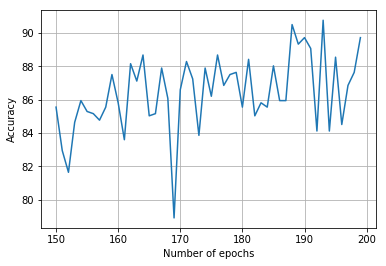

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(150,200),performances)
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.show()

In [20]:
#We can find the index where we had the better model. The index 49 correpond to 199 epochs.
print(numpy.nonzero(performances > 90.7))
print(performances[48],performances[49])

(array([43]),)
87.63020833333334 89.71354166666666


The two last models have the same performances, so we will use the last one since it is already computed. In conclusion, the best model have two hidden layers with $170$ each and to obtain this model we have to use $199$ epochs. Below we show the weights of each layer of the best model.

We use the command **model.get_weights()** to get a list of the weights of the best model. A Dense layer performs the following operation: $h = Wx + b$. The first output is the weight matrix $W$ and the second output is the bias vector $b$. Therefore each two entries of **model.get_weights()** correspond to the weights of a layer (including the bias weights).

In [21]:
p = len(model.get_weights())
for i in range(0,p):
    print(model.get_weights()[i].shape)

(8, 170)
(170,)
(170, 170)
(170,)
(170, 1)
(1,)


In [22]:
#First layer weights
W1 = model.get_weights()[0]
b1 = model.get_weights()[1]

#Second layer weights
W2 = model.get_weights()[2]
b2 = model.get_weights()[3]

#Third layer weights
W3 = model.get_weights()[4]
b3 = model.get_weights()[5]